# Check upper limit routine

## Author(s): Sven Buder (SB, WG4)

### History:
181022 SB Created

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import pandas
from astropy.table import Table, hstack, vstack

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [124]:
karin = Table.read('10k_subsets/GALAH_10k_all_lbol.fits')
for each_mode in ['Li6708','C6588','O','Na','Mg5711','Al','Si','K7699','Ca','Sc','Cr','Mn','V4832','Ba']:
    limits = Table.read('10k_subsets/GALAH_10k_all_lbol_'+each_mode+'_final.fits')
    karin[each_mode+'_fe'] = limits['ABUND']
    karin['e_'+each_mode+'_fe'] = limits['ABUND']
    karin['e_'+each_mode+'_fe'] = limits['E_ABUND']
    karin['flag_'+each_mode+'_fe'] = limits['AFLAG']

In [125]:
galah_dr3 = Table.read('GALAH_iDR3_combined_10k.fits')

In [135]:
kl_fin = karin[(karin['FIELD'] == '10k_0_lbol ')]

'10k_0_lbol '

In [136]:
kl_fin['Li6708_fe']

<Column name='Li6708_fe' dtype='float32' length=10000>
        nan
        nan
        nan
 0.90689397
  0.6185341
        nan
        nan
  1.4008887
        nan
        nan
  1.5666695
  1.0259261
        ...
 -1.3142176
-0.46546936
 -1.2110173
        nan
 -1.3030553
 -1.3275566
        nan
        nan
        nan
        nan
 -1.2980998
        nan

In [139]:
def compare_subset(subset = 49, mode = 'Li6708'):

    subset = str(subset)
    print(subset,mode)

    sb_raw = Table.read('10k_subsets/GALAH_10k_'+subset+'_lbol.fits')
    sb_int = Table.read('10k_subsets/GALAH_10k_'+subset+'_lbol_final.fits')
    sb_fin = Table.read('GALAH_iDR3_combined_10k.fits')

    kl_raw = Table.read('10k_subsets/GALAH_10k_'+subset+'_lbol_NLTE.fits')

    sb_fin = sb_fin[(sb_fin['wg4_field'] == '10k_'+subset+'_lbol')]
    if subset == '0':
        kl_fin = karin[(karin['FIELD'] == '10k_'+subset+'_lbol ')]
    else:
        kl_fin = karin[(karin['FIELD'] == '10k_'+subset+'_lbol')]

    # 10k_subsets/GALAH_10k_48_lbol.fits and 10k_subsets/GALAH_10k_48_lbol_NLTE.fits agree

    f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

    selection = dict()
    selection['Li6708'] = [ 2, 1, 2,'Li6708_fe','Li6708_fe']
    selection['C6588']  = [ 4, 2, 4,'C6588_fe','C6588_fe']
    selection['O']      = [ 5, 3, 5,'O_fe','O_fe']
    selection['Na']     = [ 6, 4, 6,'Na_fe','Na_fe']
    selection['Mg5711'] = [ 7, 5, 7,'Mg5711_fe','Mg5711_fe']
    selection['Al']     = [ 8, 6, 8,'Al_fe','Al_fe']
    selection['Si']     = [ 9, 7, 9,'Si_fe','Si_fe']
    selection['K7699']  = [10, 8,10,'K7699_fe','K7699_fe']
    selection['Ca']     = [11, 9,11,'Ca_fe','Ca_fe']
    selection['Sc']     = [12,12,12,'Sc_fe','Sc_fe']
    selection['V4832']  = [34,13,34,'V4832_fe','V4832_fe']
    selection['Cr']     = [35,14,35,'Cr_fe','Cr_fe']
    selection['Mn']     = [36,10,36,'Mn_fe','Mn_fe']
    selection['Ba']     = [70,11,70,'Ba_fe','Ba_fe']

    #sb_raw['MODE'][0,[2,4,5,6,7,8,9,10,11,12,34,35,36,70]]
    #sb_int['MODE'][0,[2,4,5,6,7,8,9,10,11,12,34,35,36,70]]
    #kl_raw['MODE'][0,[1,2,3,4,5,6,7,8,9,12,13,14,10,11]
    
    kwargs = dict(s=1,alpha=0.5)
    
    ax1.scatter(
        sb_raw['ABUND'][:,selection[mode][0]],
        kl_raw['ABUND'][:,selection[mode][1]]-sb_raw['ABUND'][:,selection[mode][0]],
        **kwargs
        )
    #ax1.set_xlabel(r'*_lbol.fits')
    #ax1.set_ylabel(r'delta *_lbol_NLTE.fits')
    ax1.set_title('RAW '+mode)

    ax2.scatter(
        sb_int['ABUND'][:,selection[mode][2]],
        kl_fin[selection[mode][3]]-sb_int['ABUND'][:,selection[mode][2]],
        **kwargs
        )
    #ax2.set_xlabel(r'*_lbol_final.fits')
    #ax2.set_ylabel(r'delta all_*_lbol.fits')
    ax2.set_title('INT '+mode)

    flagged = (sb_fin['flag_sp']==0) & (sb_fin['flag_'+mode]==0)
    
    ax3.scatter(
        sb_fin[selection[mode][4]],
        kl_fin[selection[mode][3]]-sb_fin[selection[mode][4]]
        )
    ax3.scatter(
        sb_fin[selection[mode][4]][flagged],
        kl_fin[selection[mode][3]][flagged]-sb_fin[selection[mode][4]][flagged],
        **kwargs
        )
    #ax3.set_xlabel(r'GALAH_iDR3_*.fits')
    #ax3.set_ylabel(r'delta all_*_lbol.fits')
    ax3.set_title('FIN '+mode)

    plt.tight_layout()

0 Li6708
0 C6588
0 O
0 Na
0 Mg5711
0 Al
0 Si
0 K7699
0 Ca
0 Sc
0 V4832
0 Cr
0 Mn
0 Ba
10 Li6708
10 C6588
10 O
10 Na
10 Mg5711
10 Al
10 Si


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


10 K7699
10 Ca


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


10 Sc
10 V4832


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


10 Cr
10 Mn
10 Ba
20 Li6708
20 C6588
20 O


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


20 Na
20 Mg5711
20 Al


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


20 Si
20 K7699
20 Ca
20 Sc
20 V4832
20 Cr
20 Mn
20 Ba


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


30 Li6708
30 C6588
30 O


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


30 Na
30 Mg5711
30 Al
30 Si
30 K7699


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


30 Ca


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


30 Sc
30 V4832
30 Cr
30 Mn
30 Ba
40 Li6708
40 C6588
40 O
40 Na
40 Mg5711
40 Al
40 Si
40 K7699
40 Ca
40 Sc
40 V4832
40 Cr
40 Mn
40 Ba
50 Li6708
50 C6588
50 O
50 Na
50 Mg5711
50 Al
50 Si
50 K7699
50 Ca
50 Sc
50 V4832
50 Cr
50 Mn
50 Ba
60 Li6708
60 C6588
60 O
60 Na
60 Mg5711
60 Al
60 Si
60 K7699
60 Ca
60 Sc
60 V4832
60 Cr
60 Mn
60 Ba


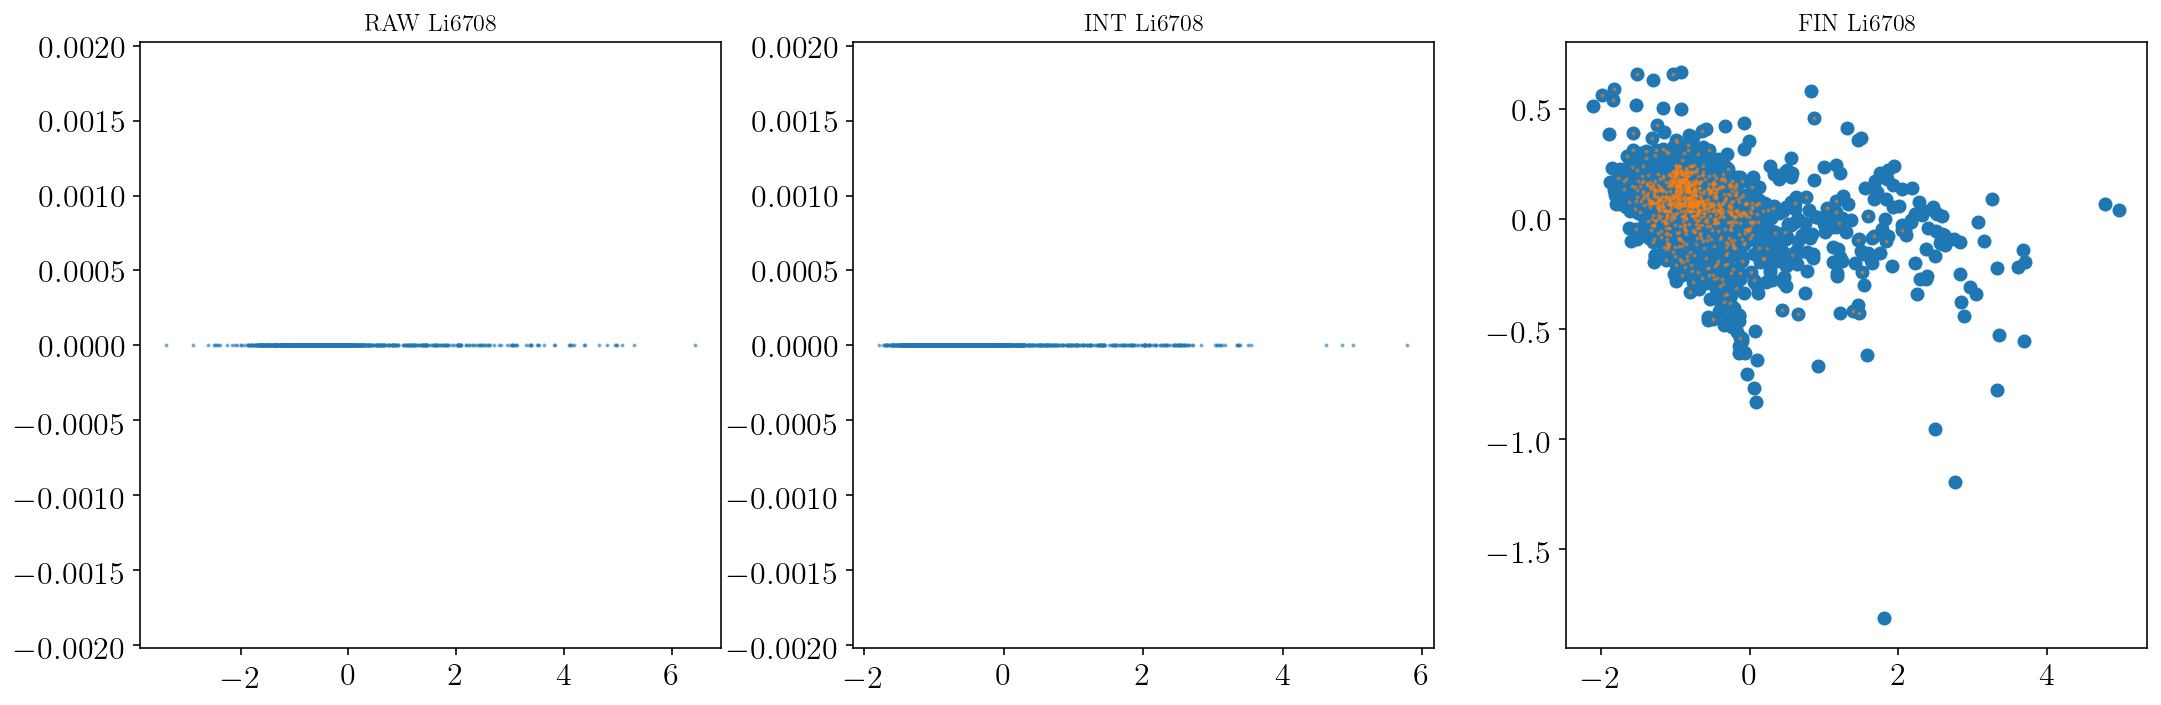

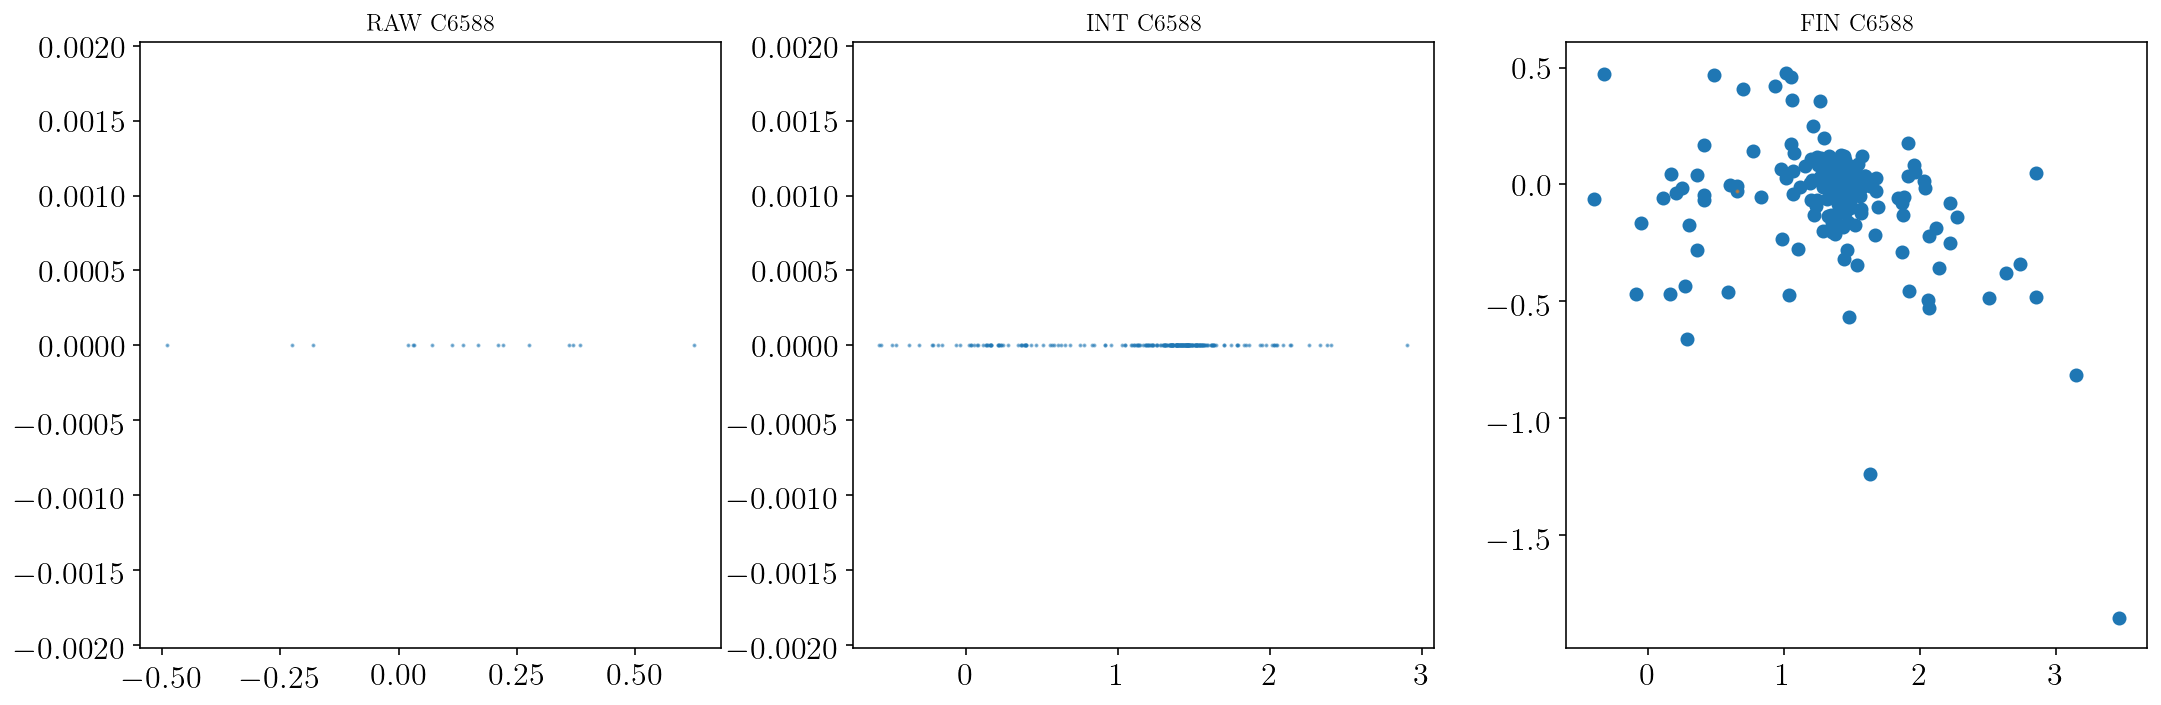

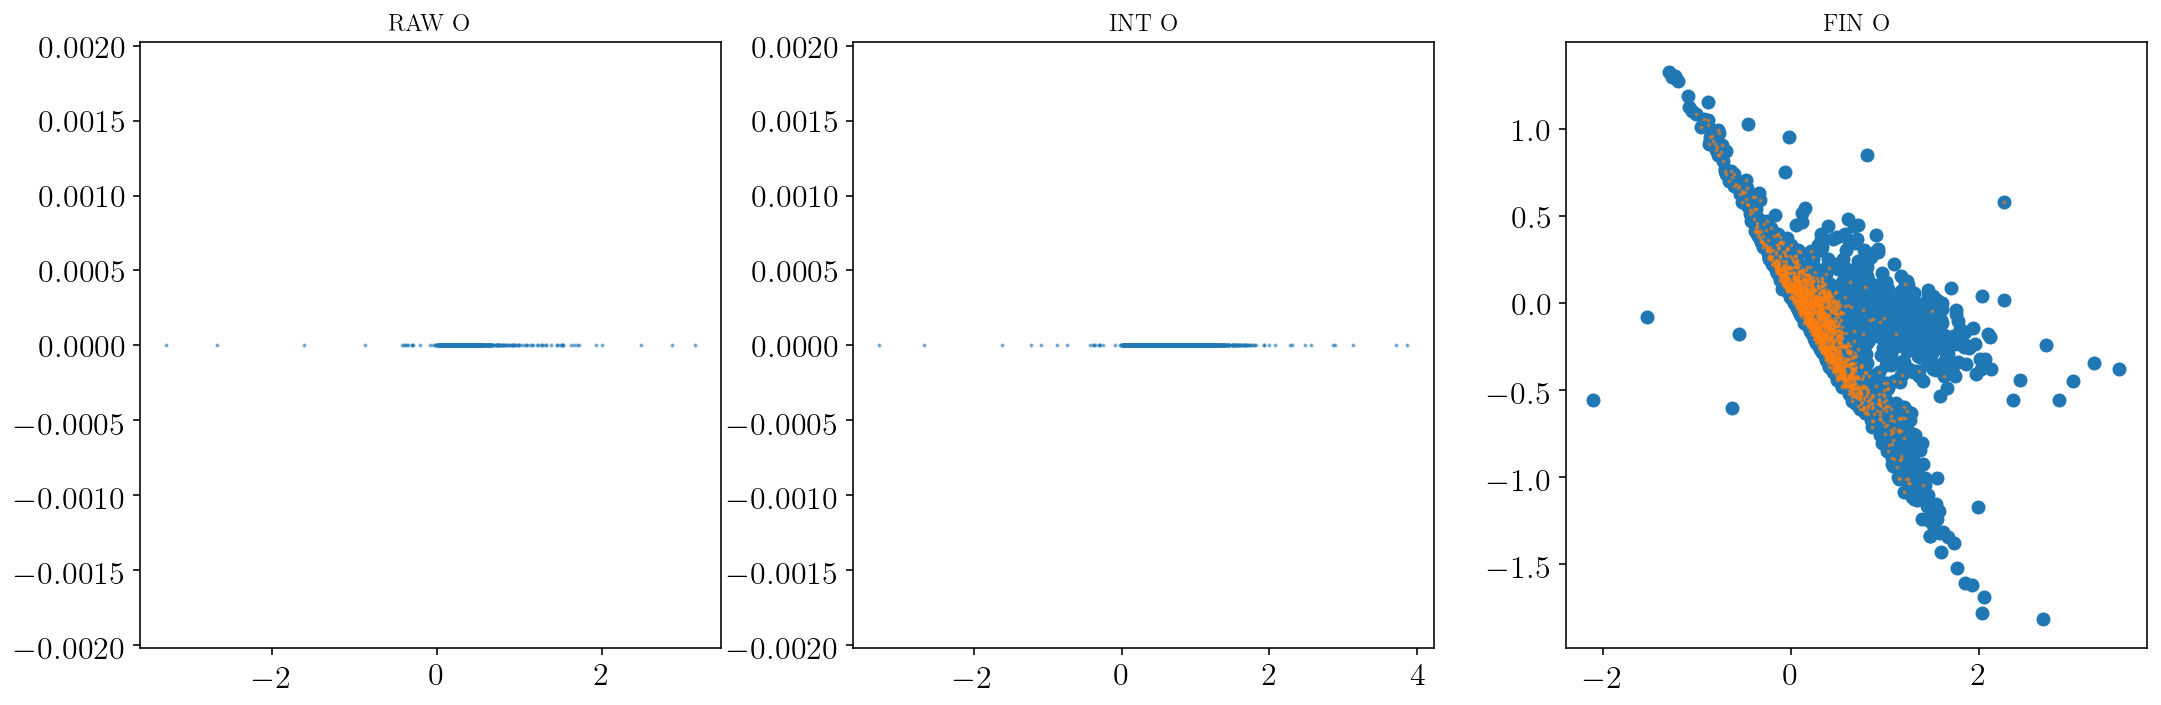

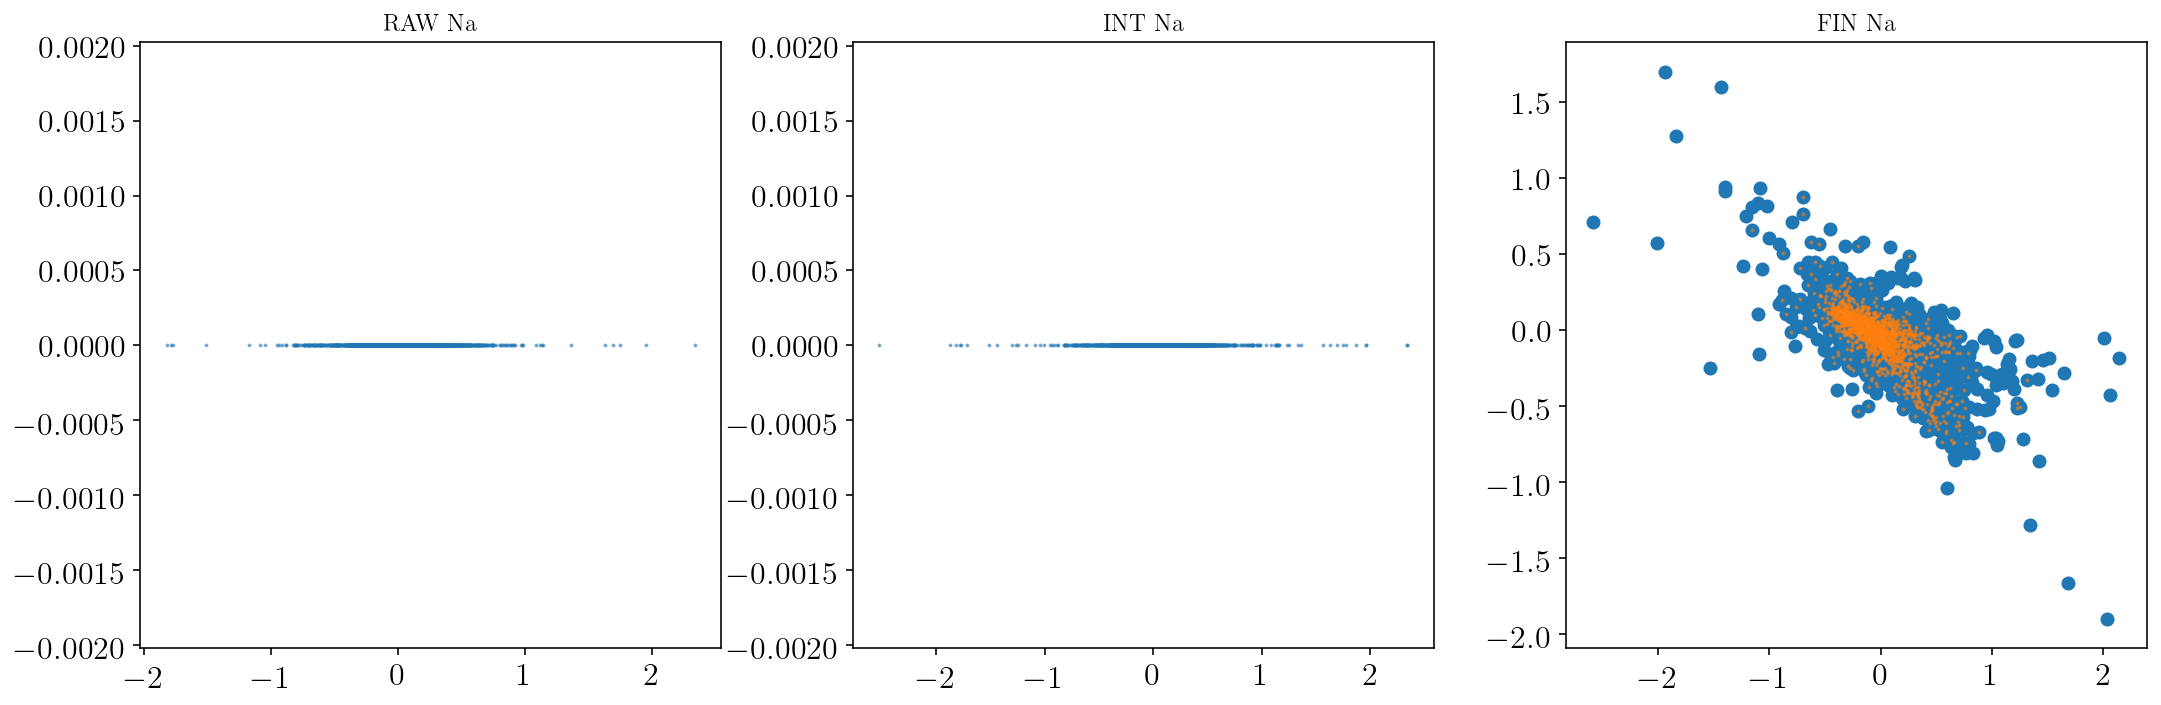

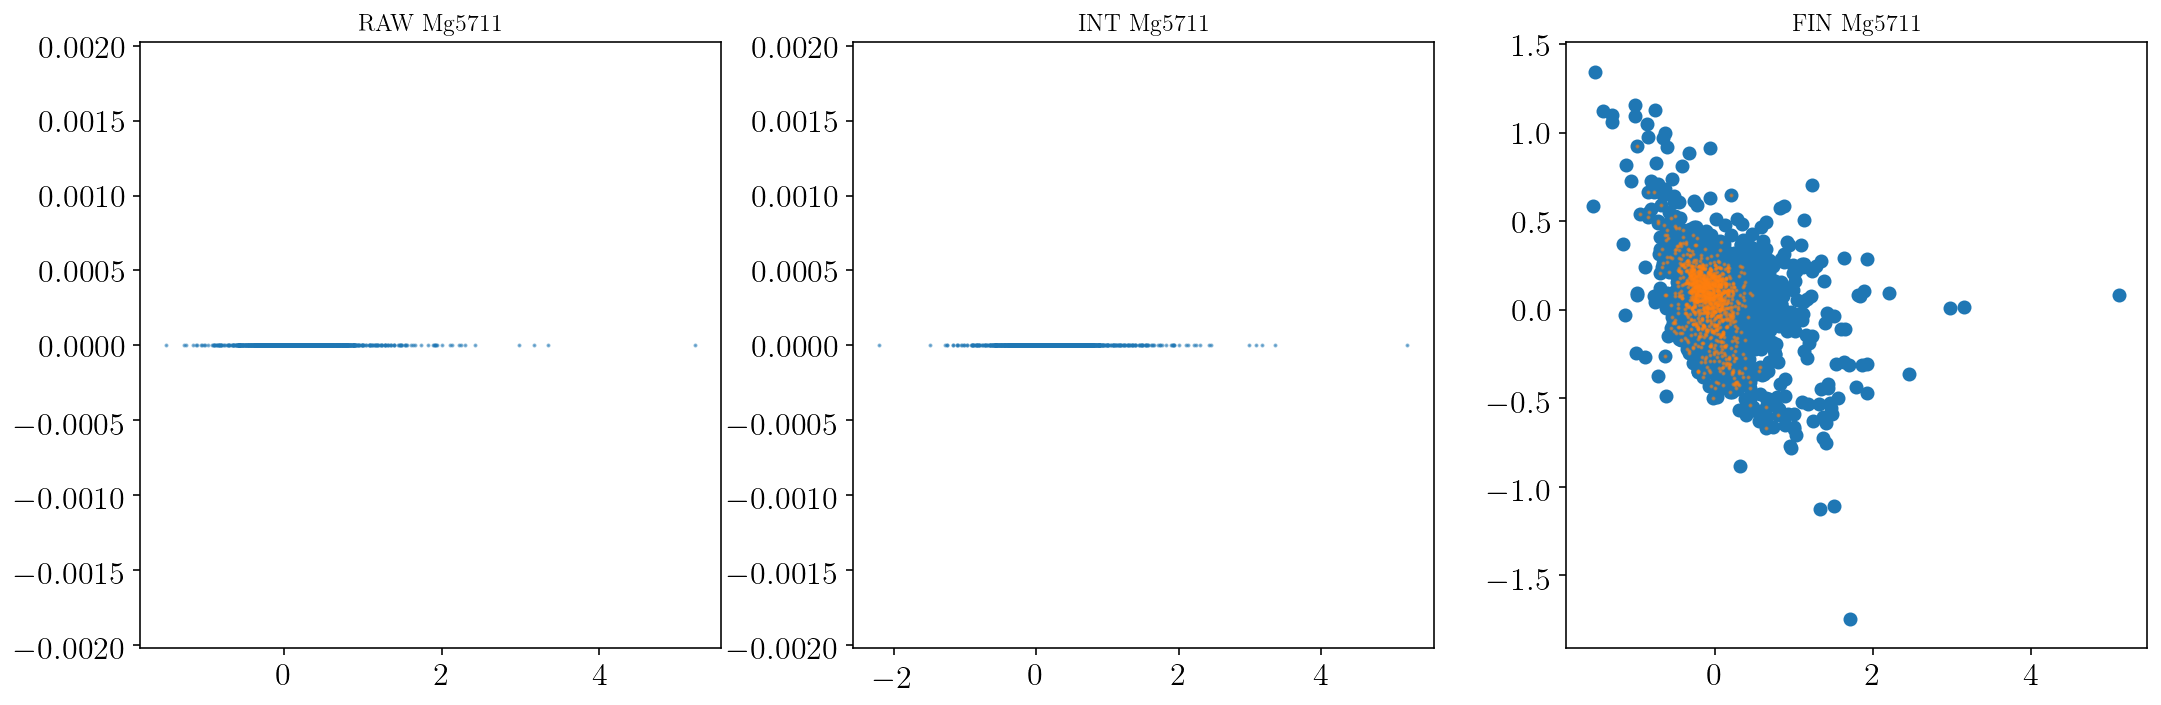

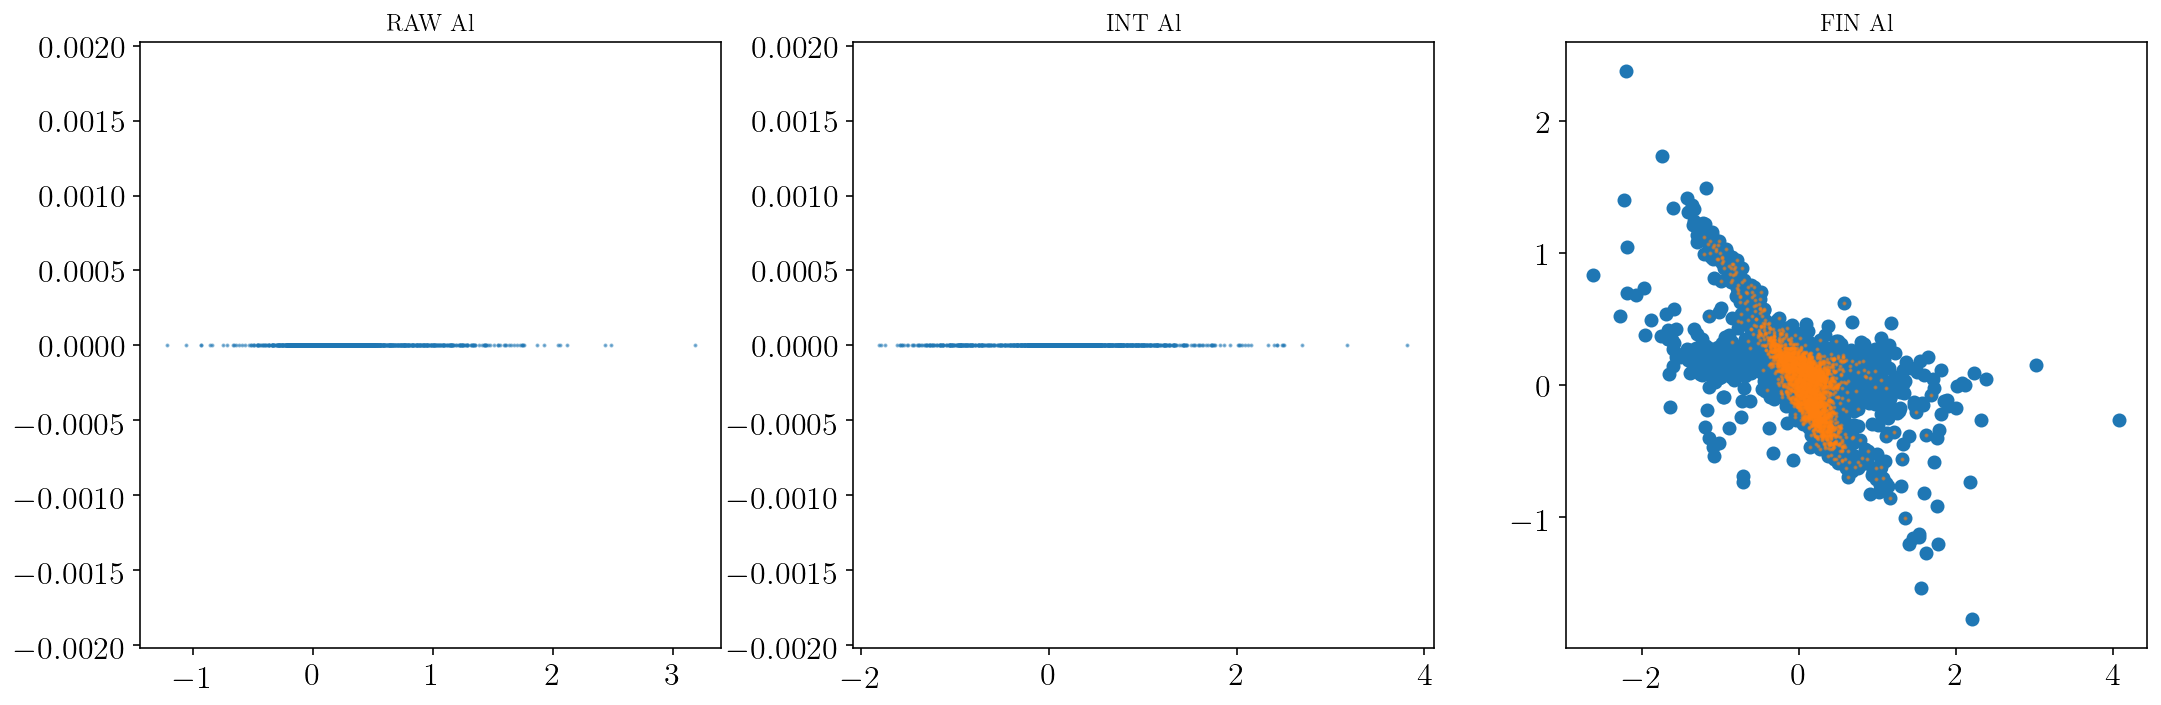

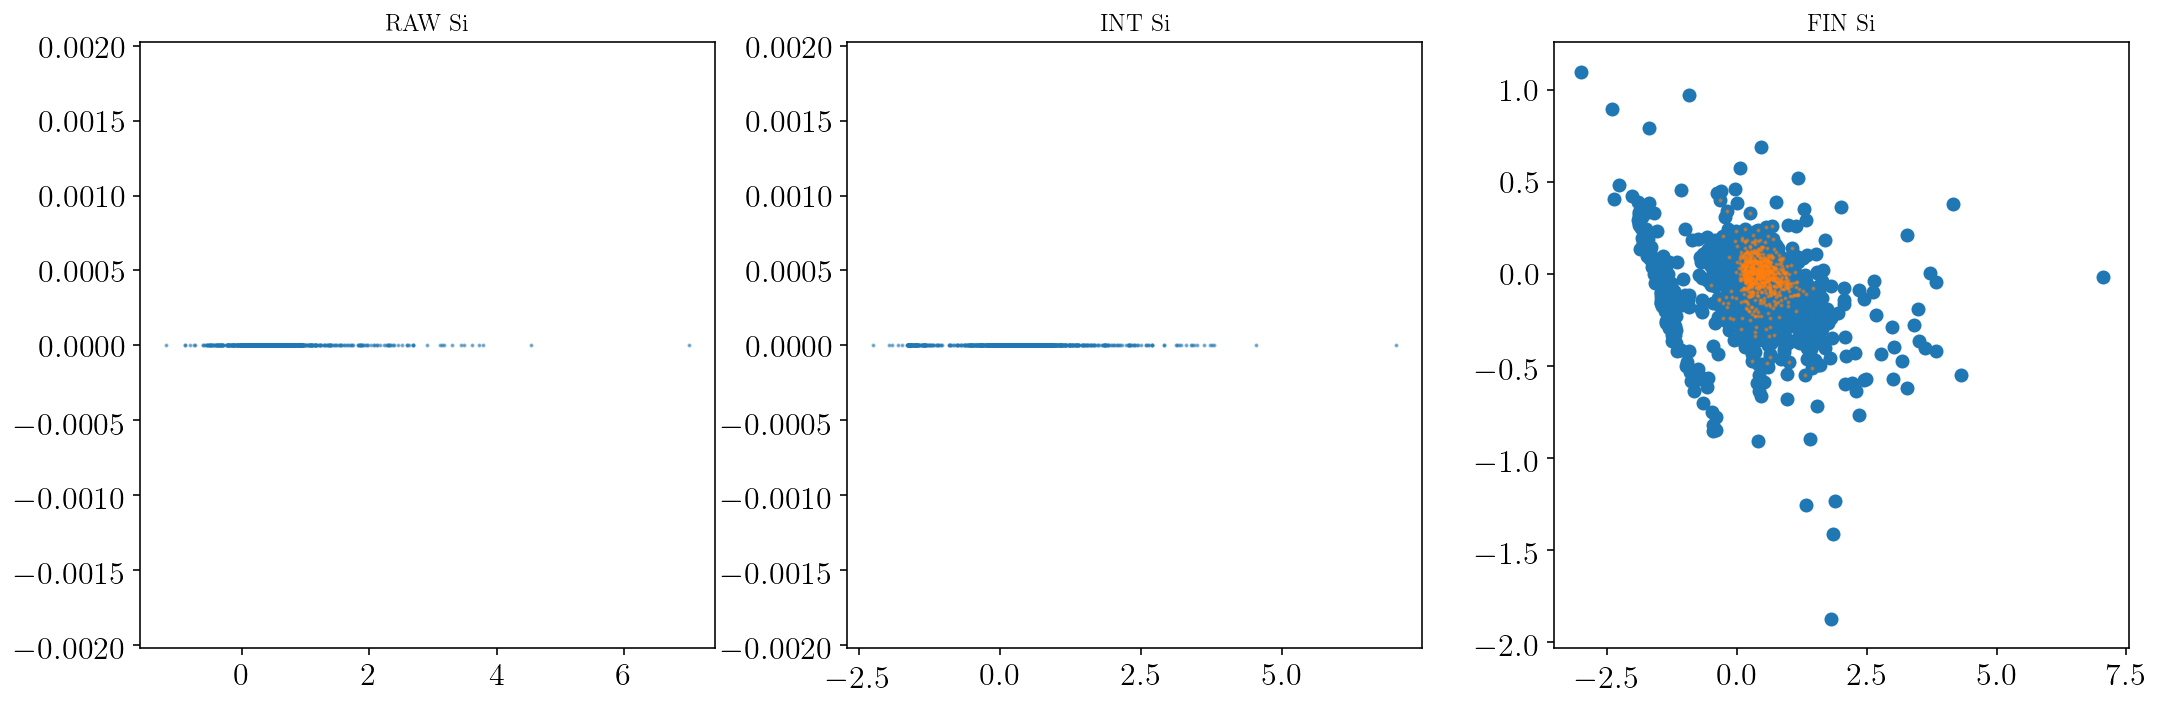

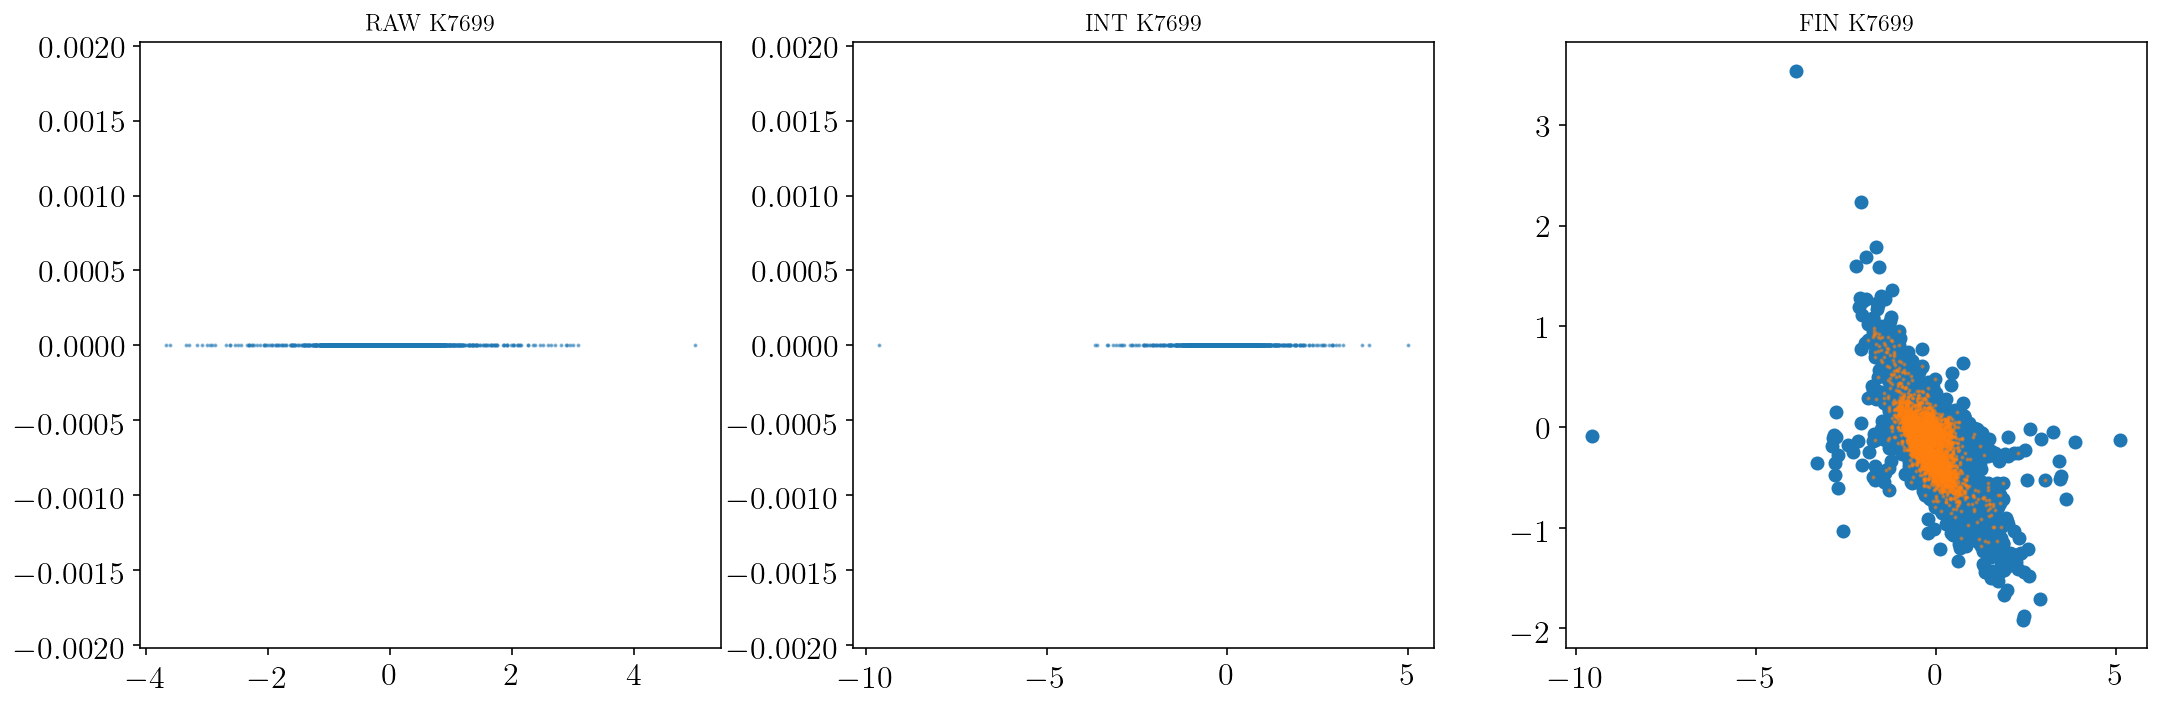

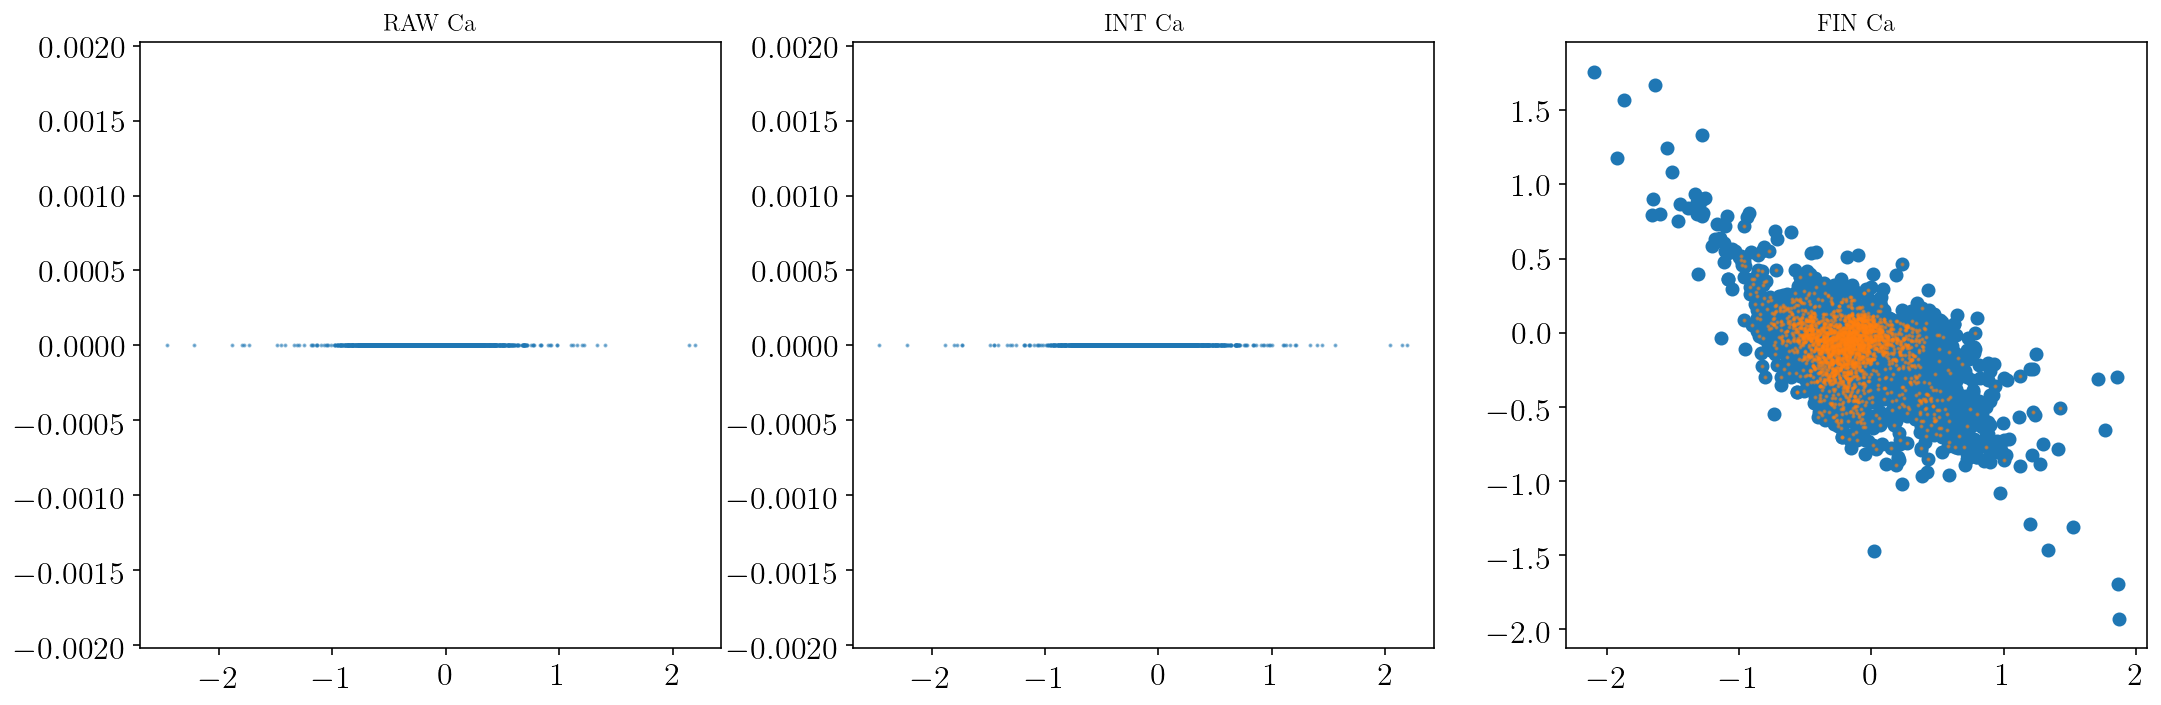

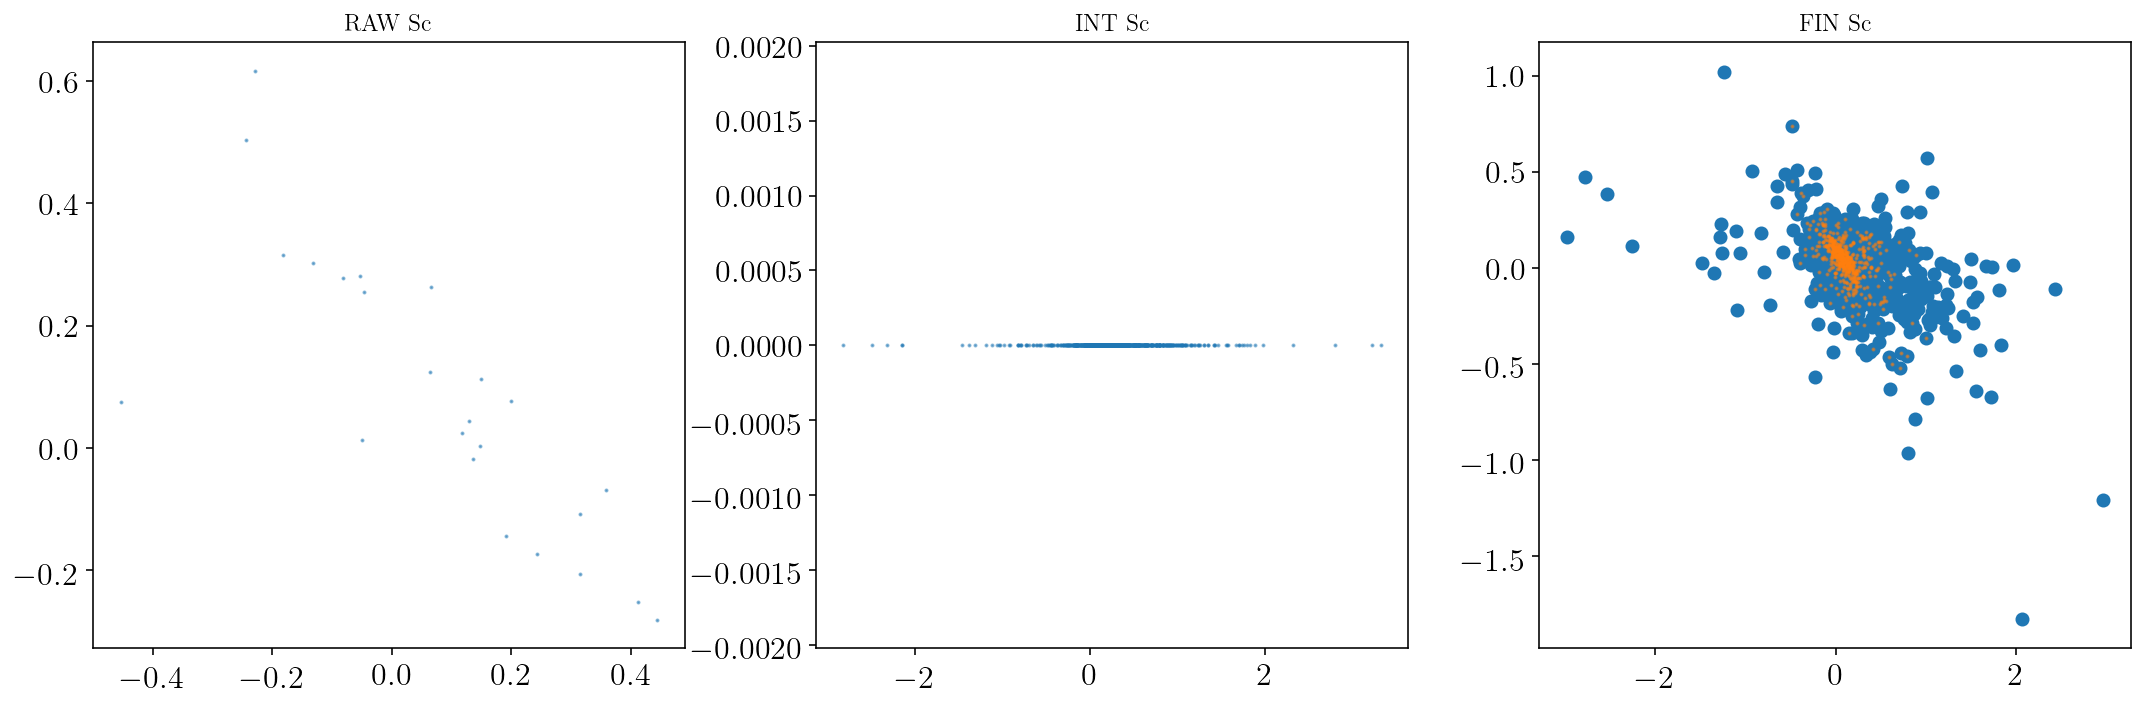

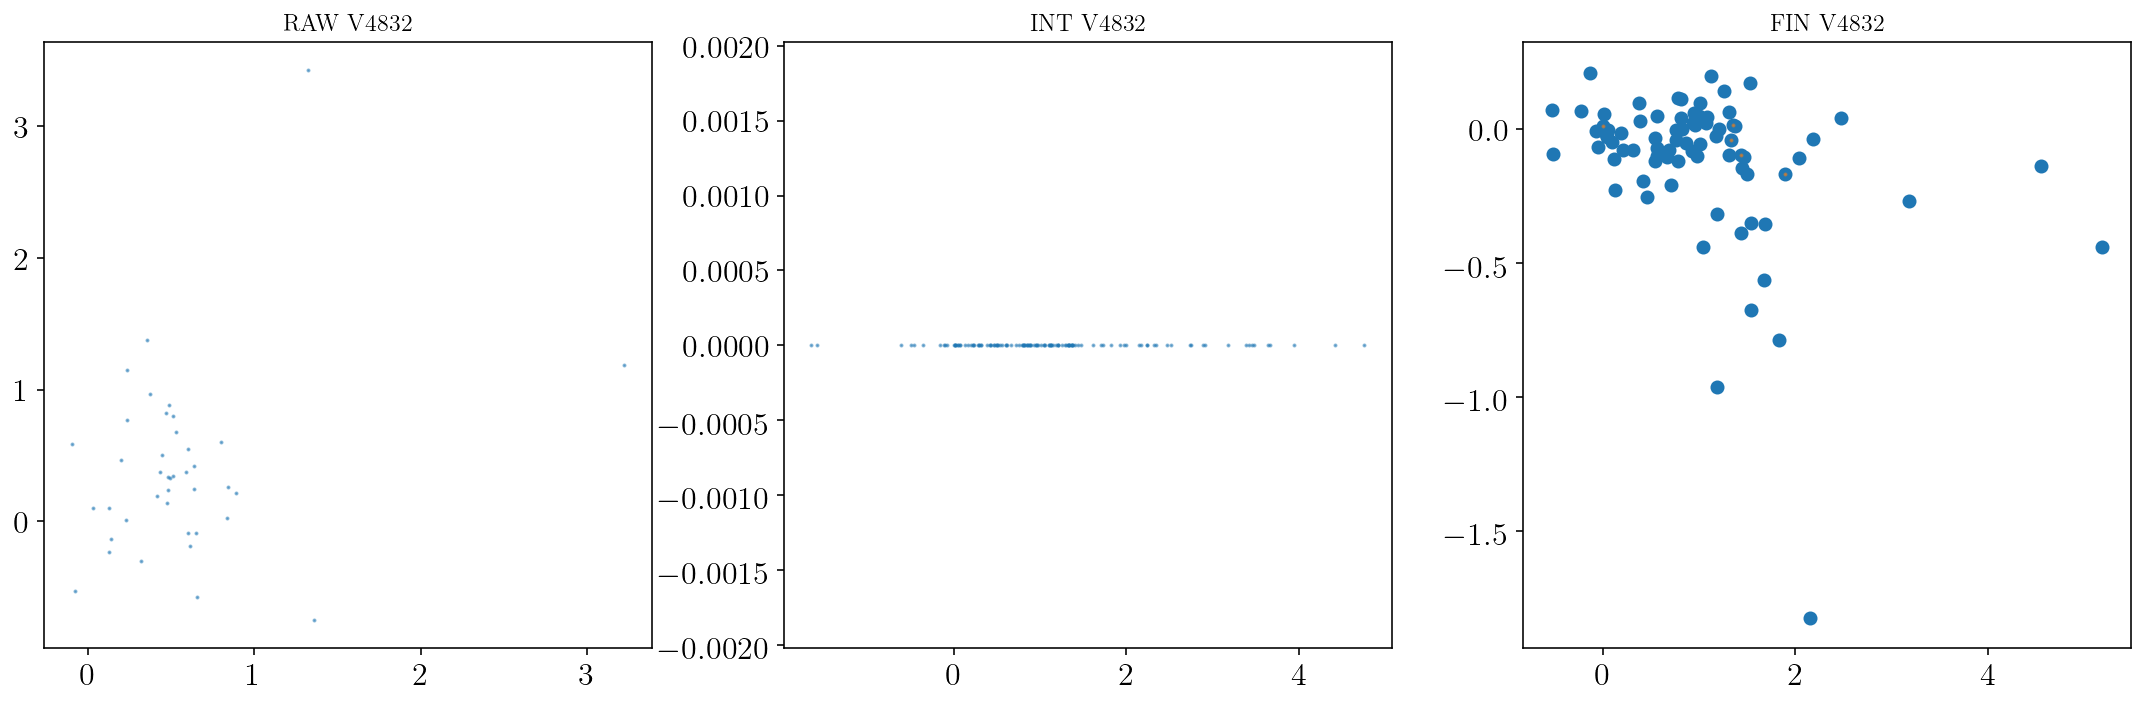

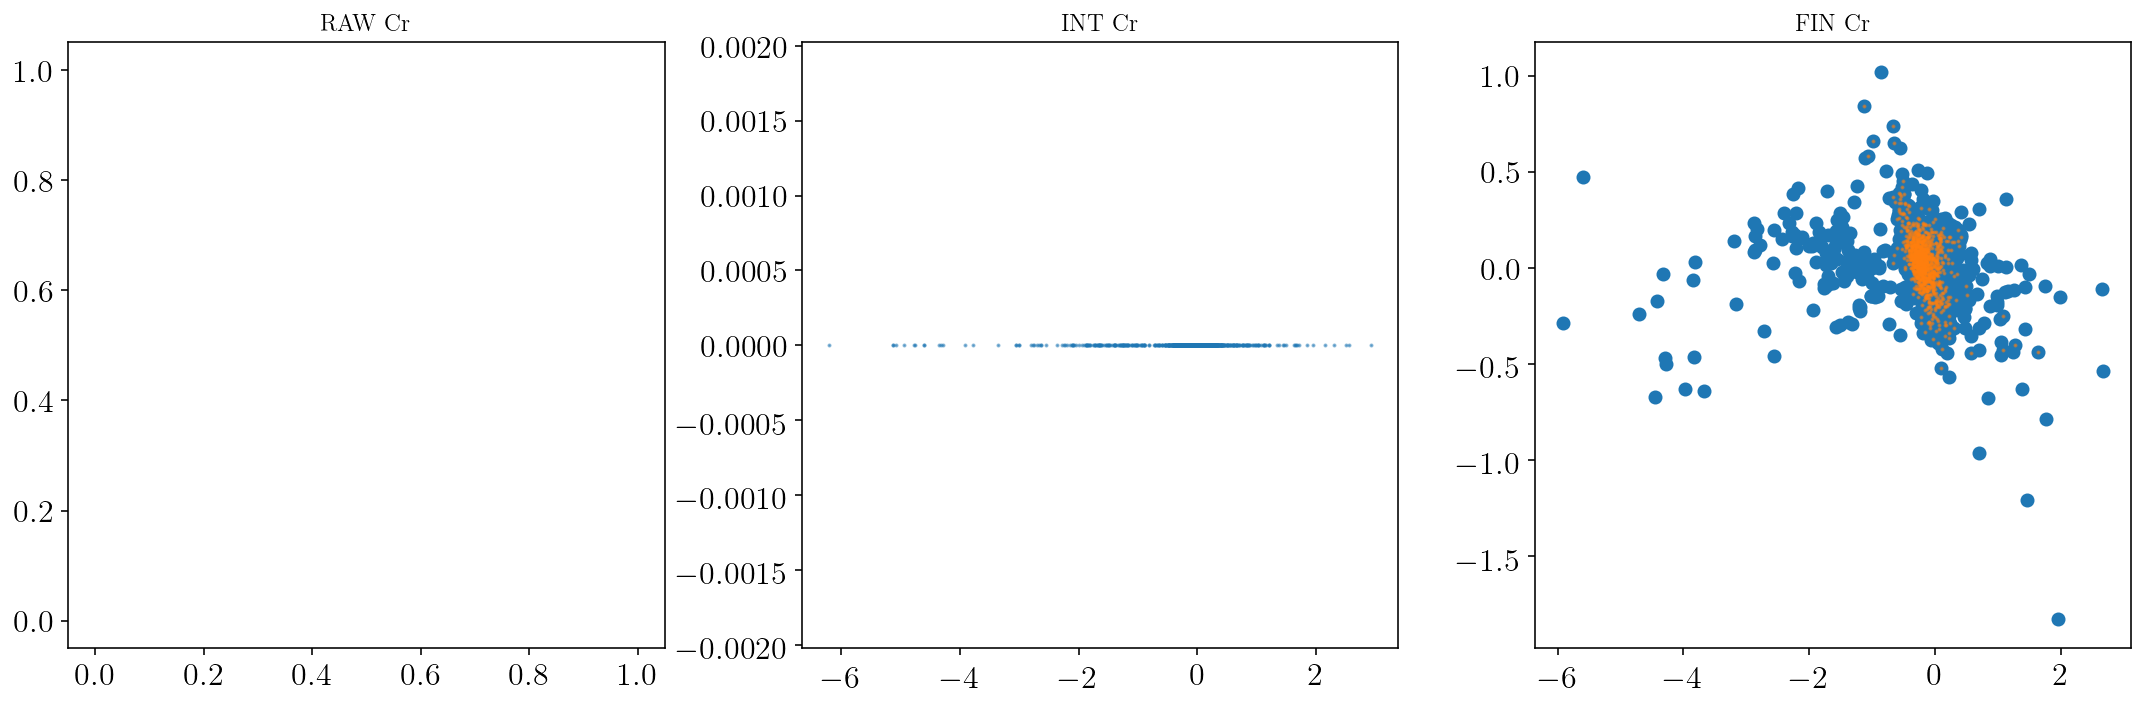

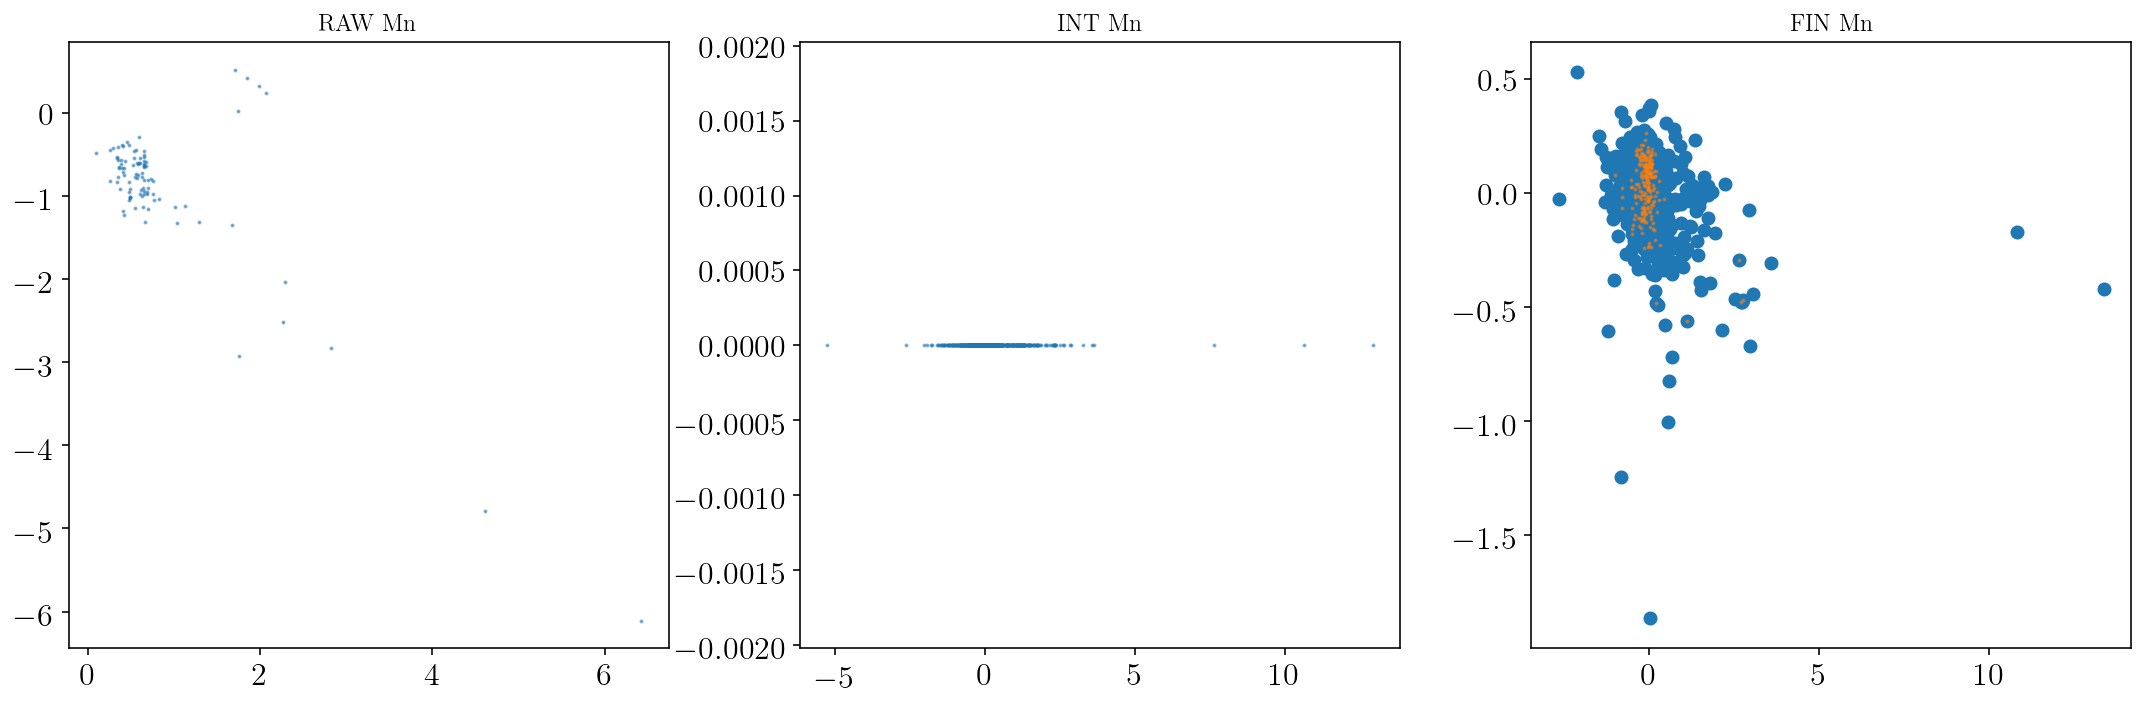

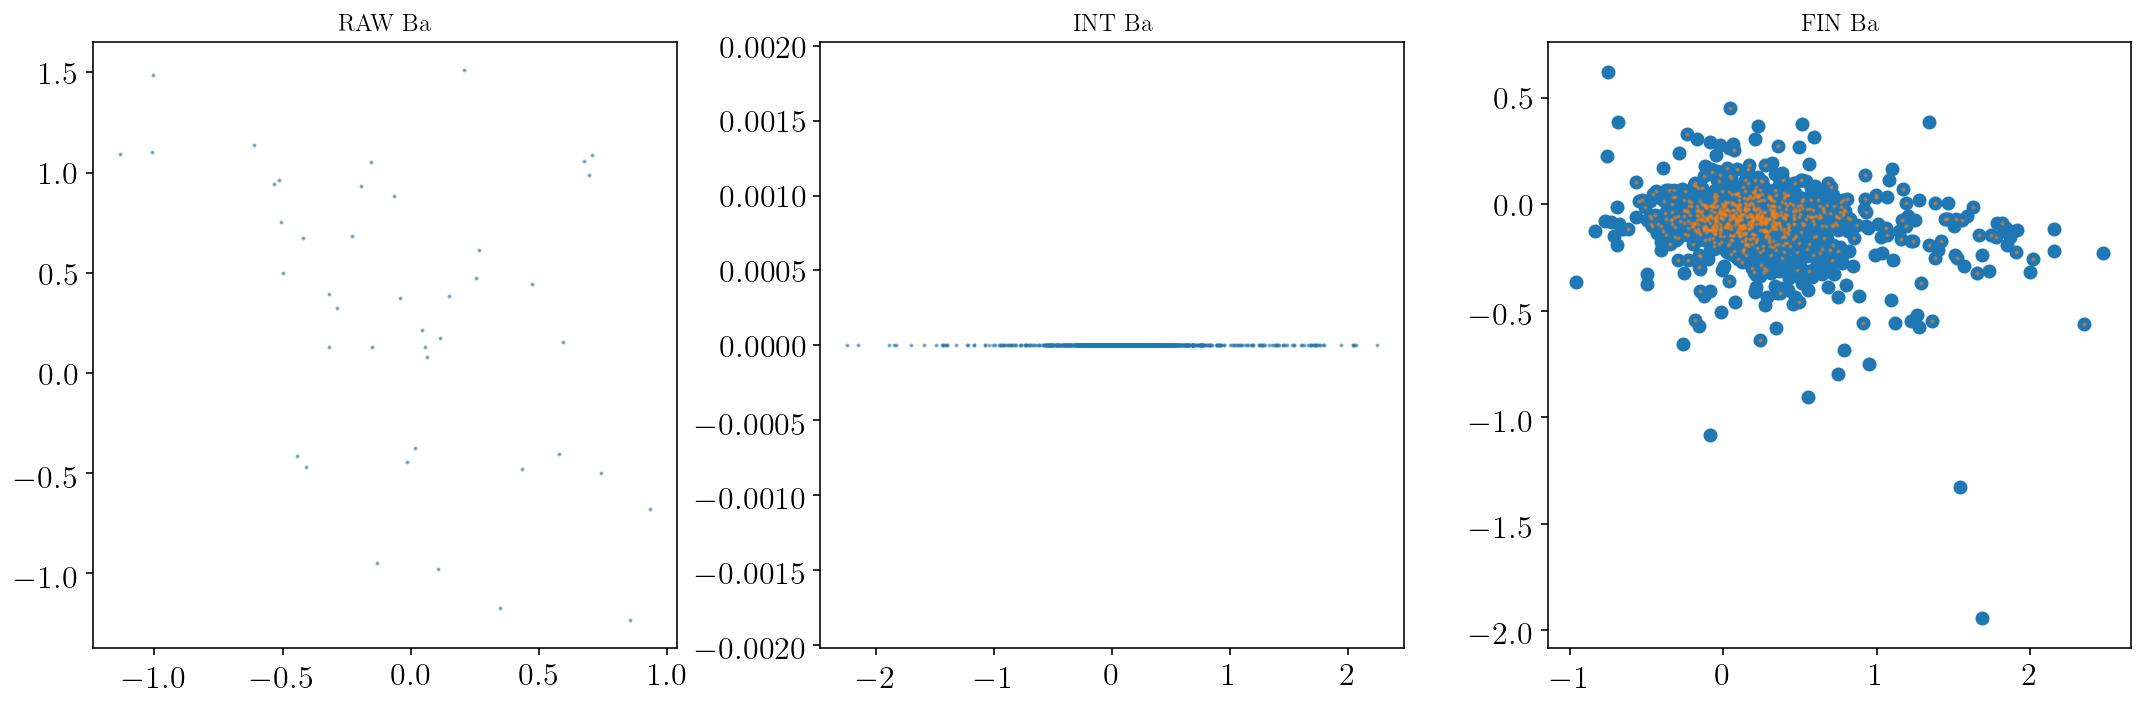

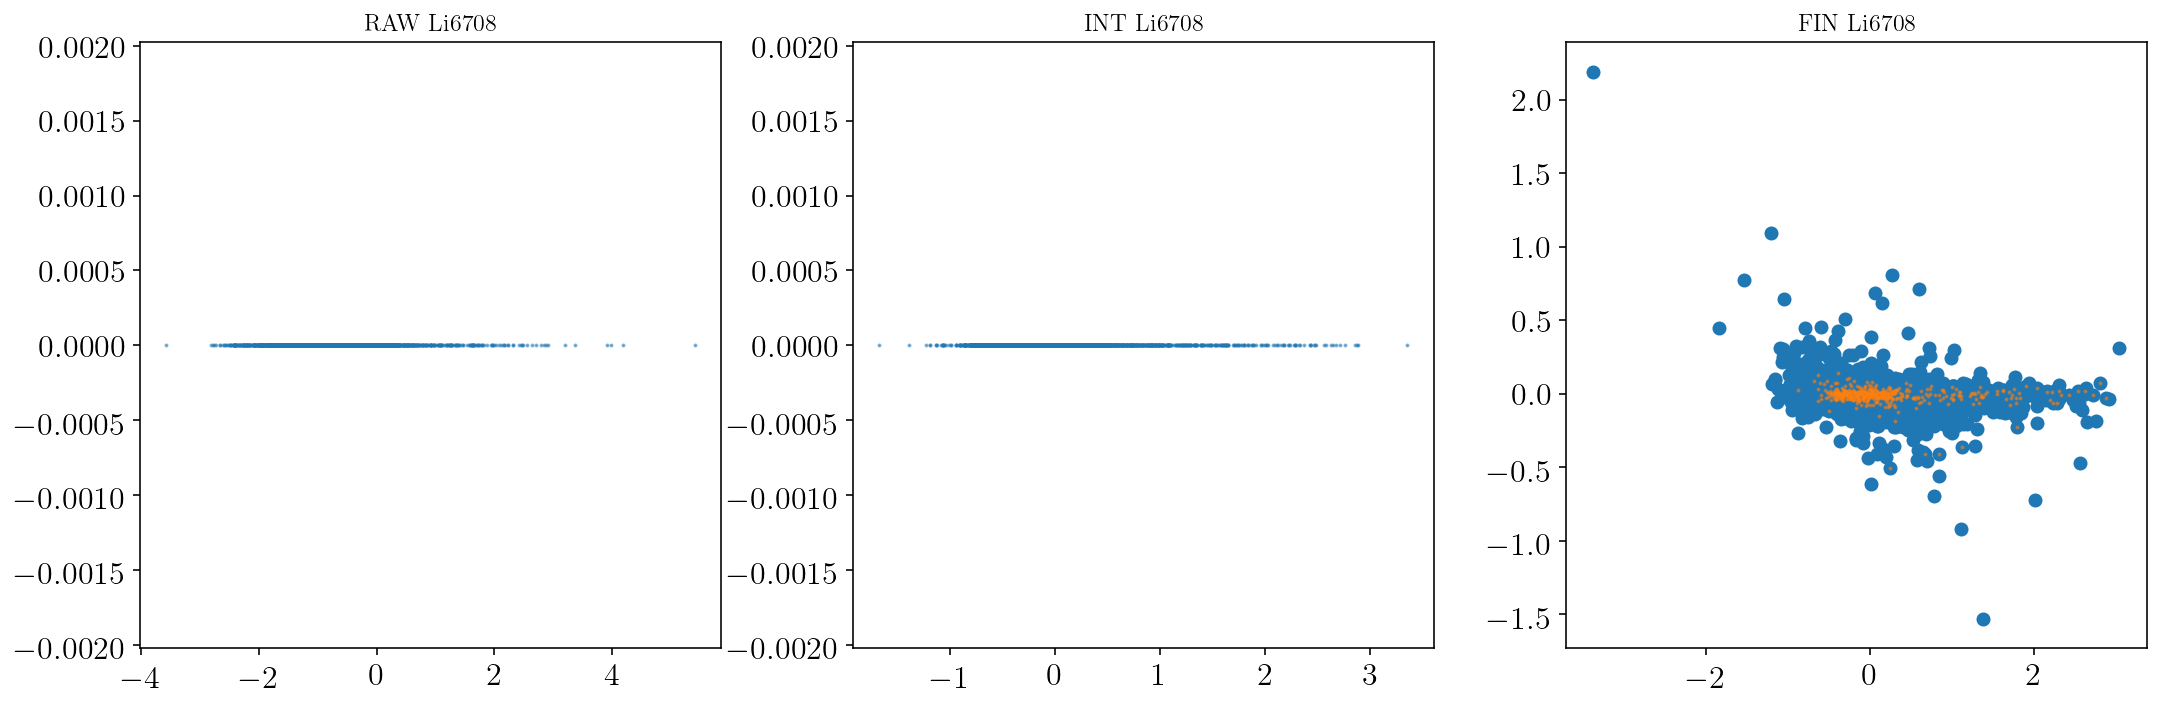

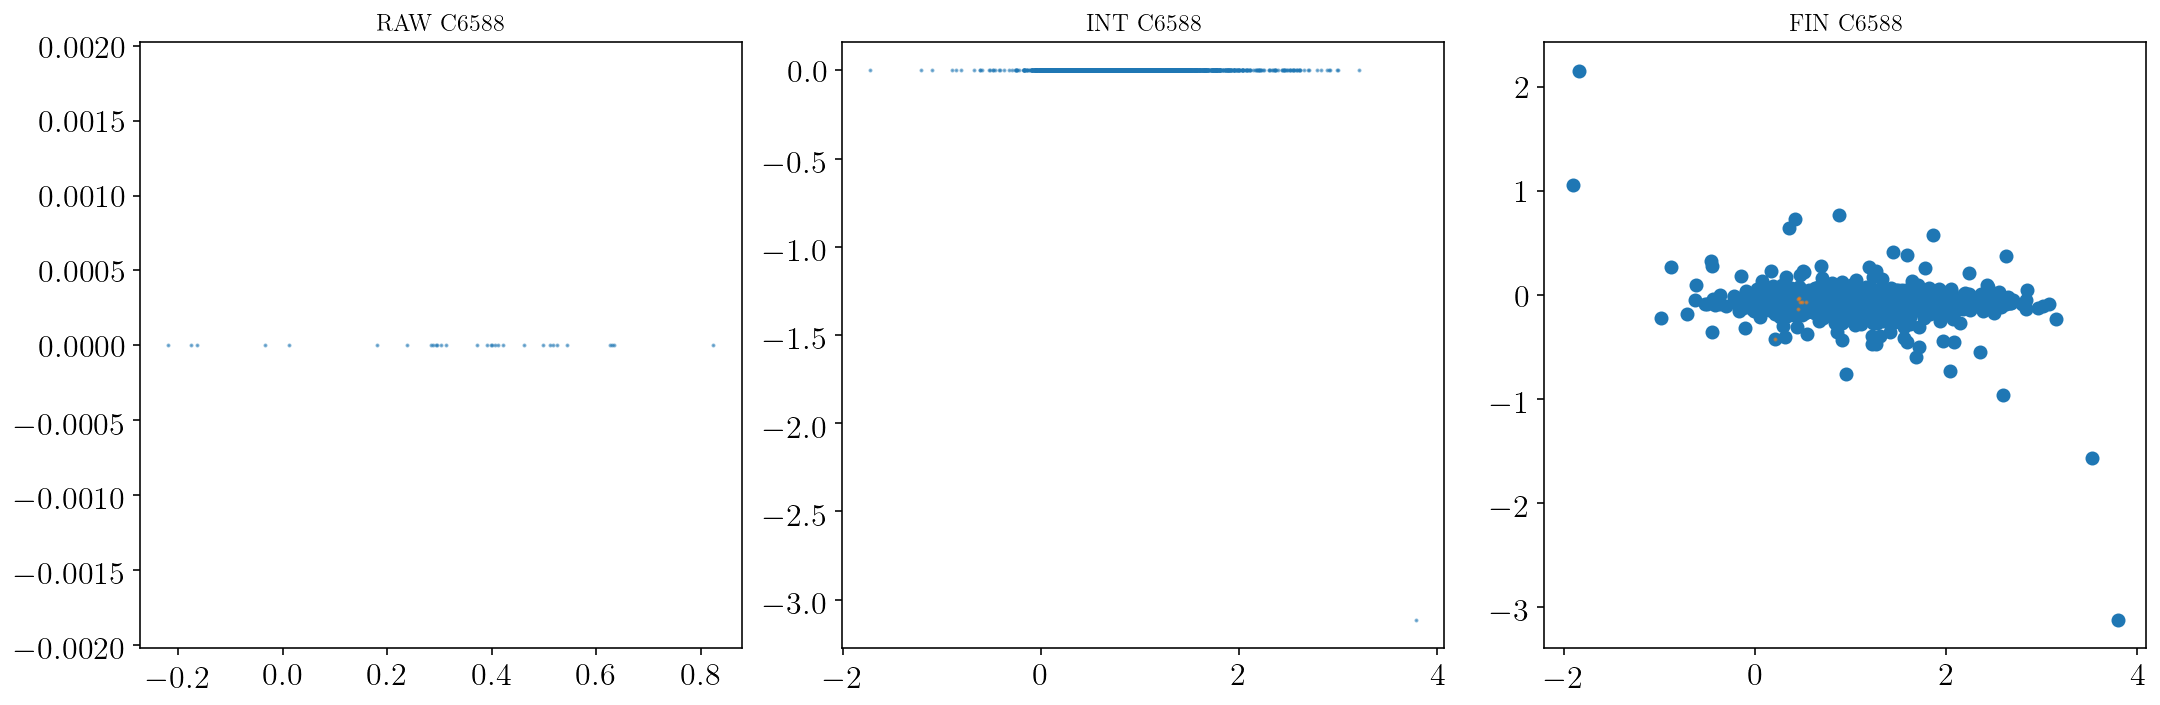

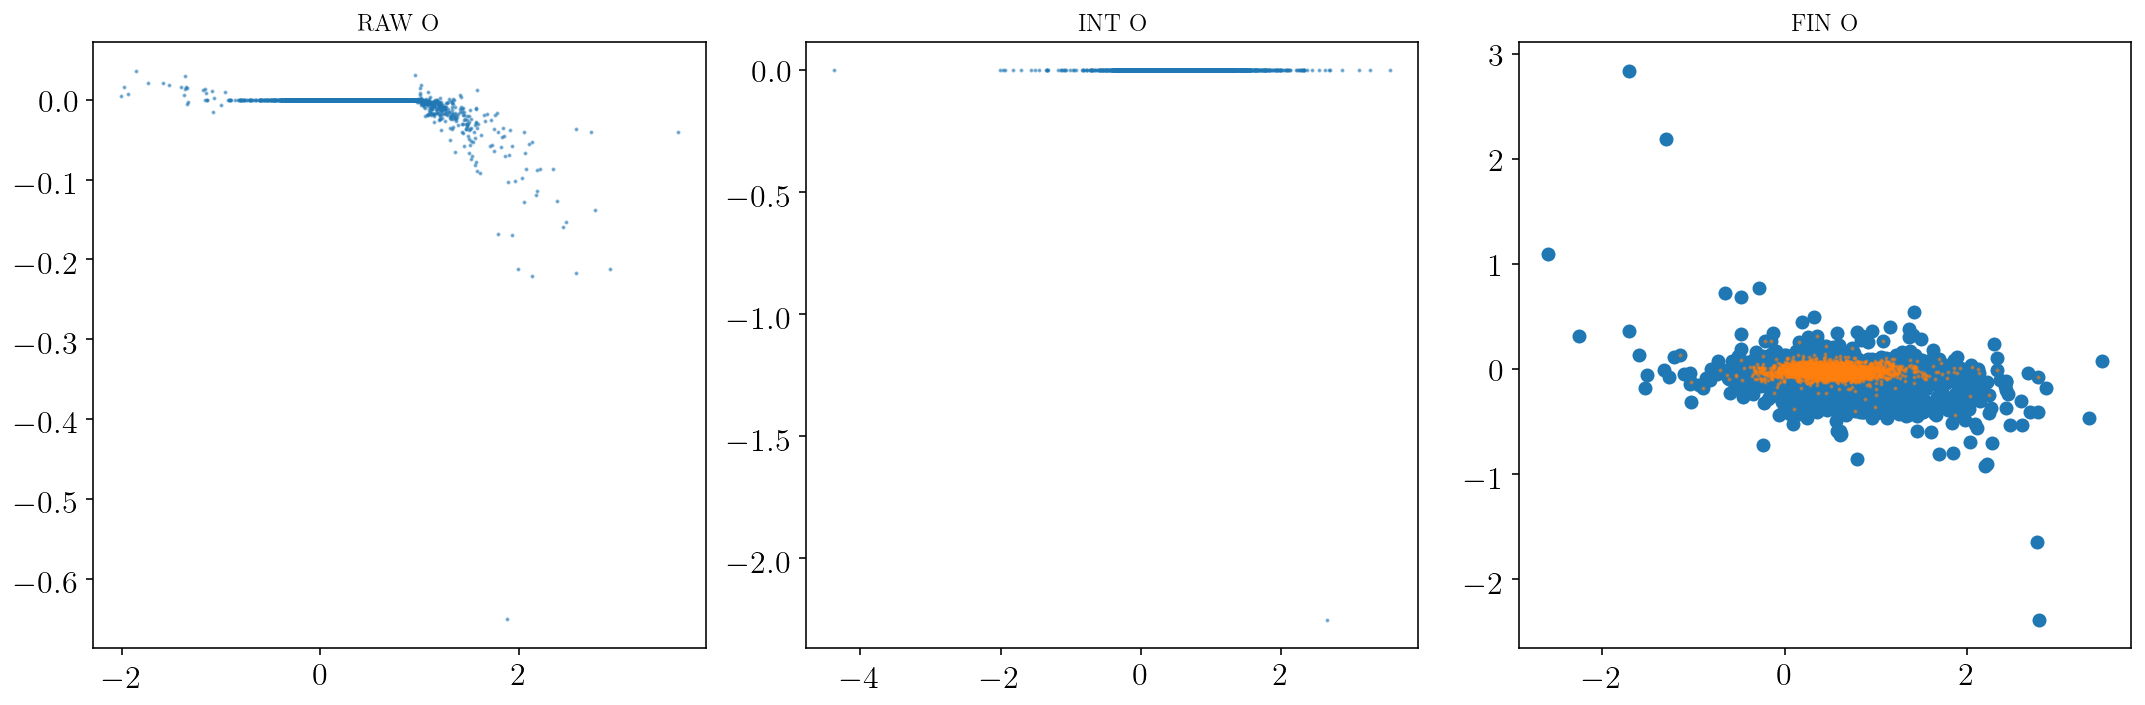

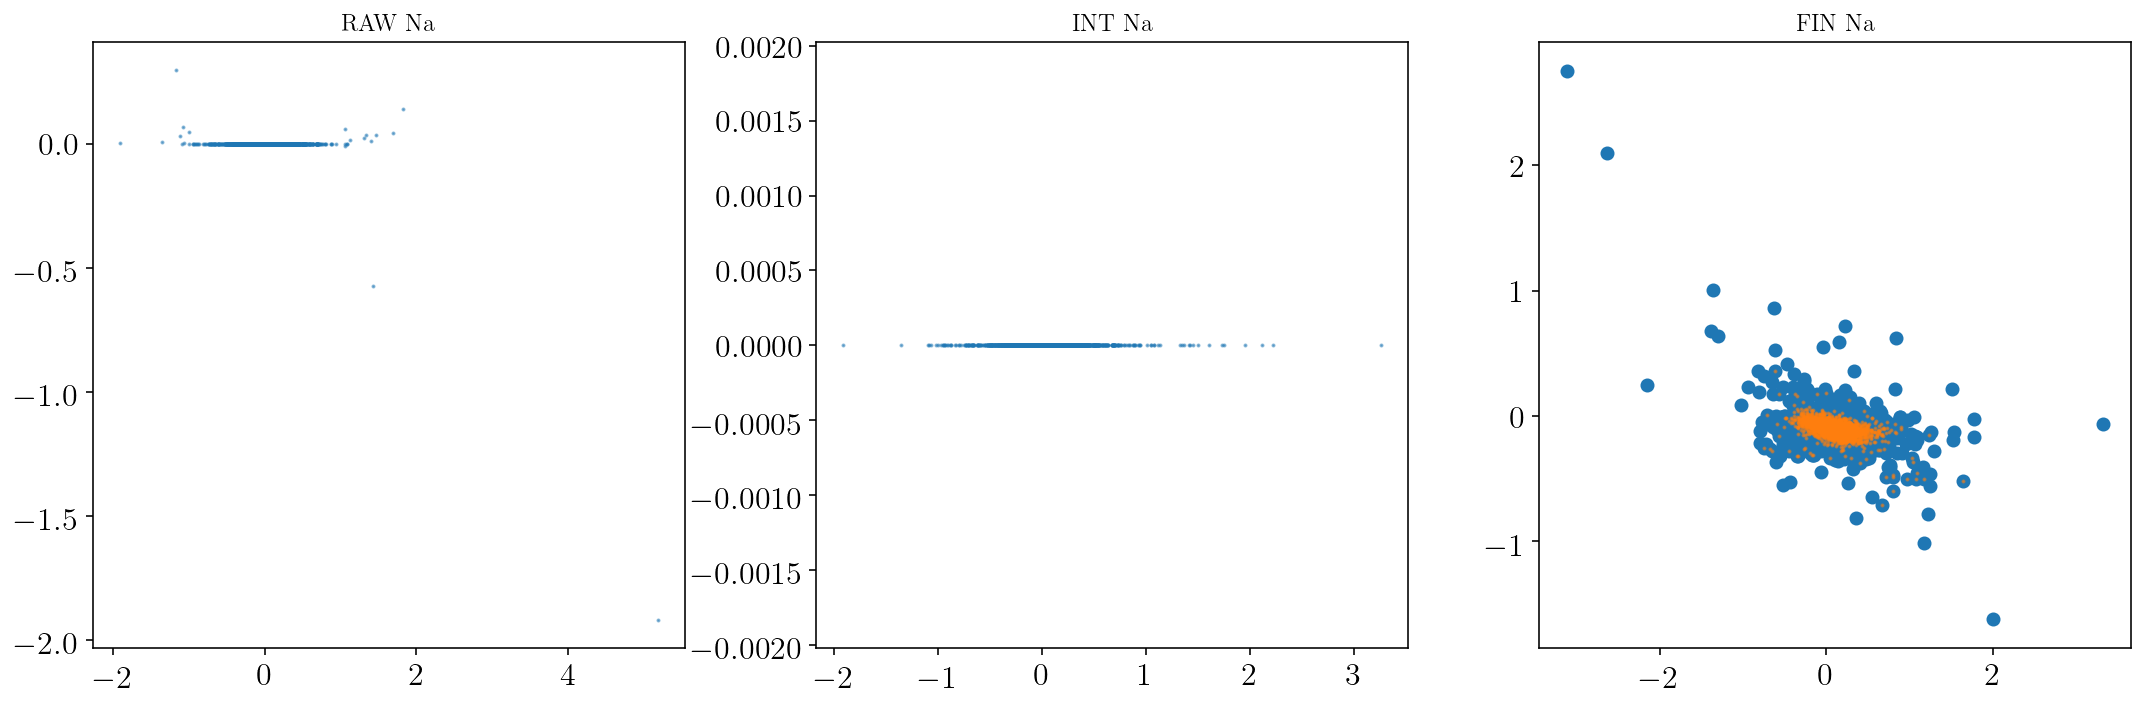

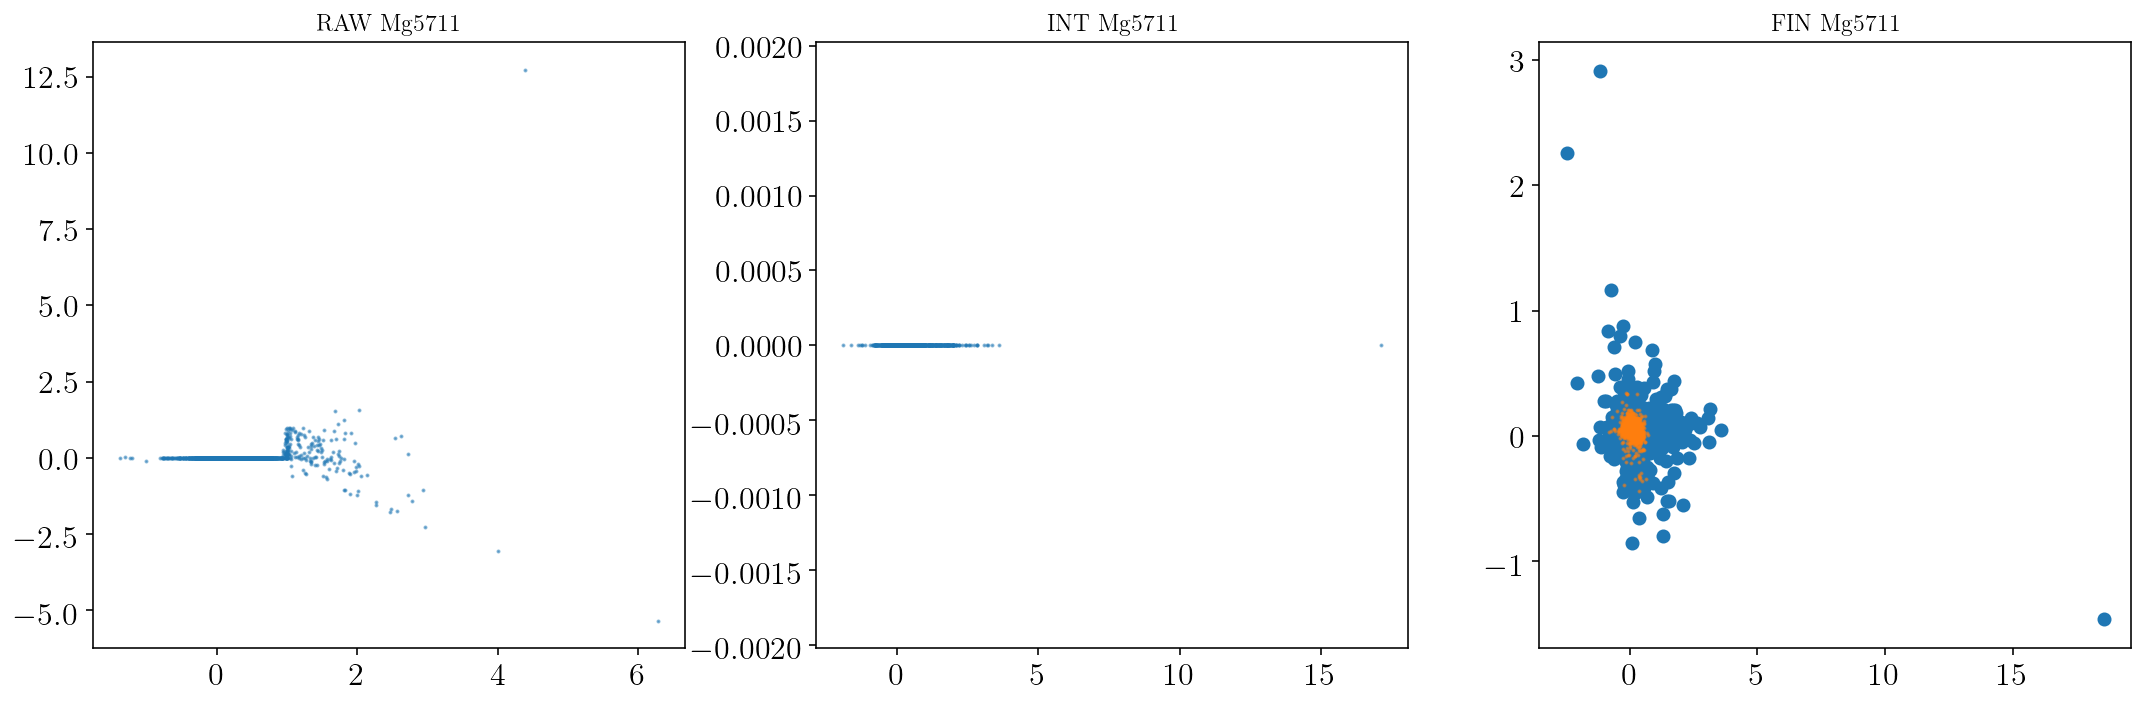

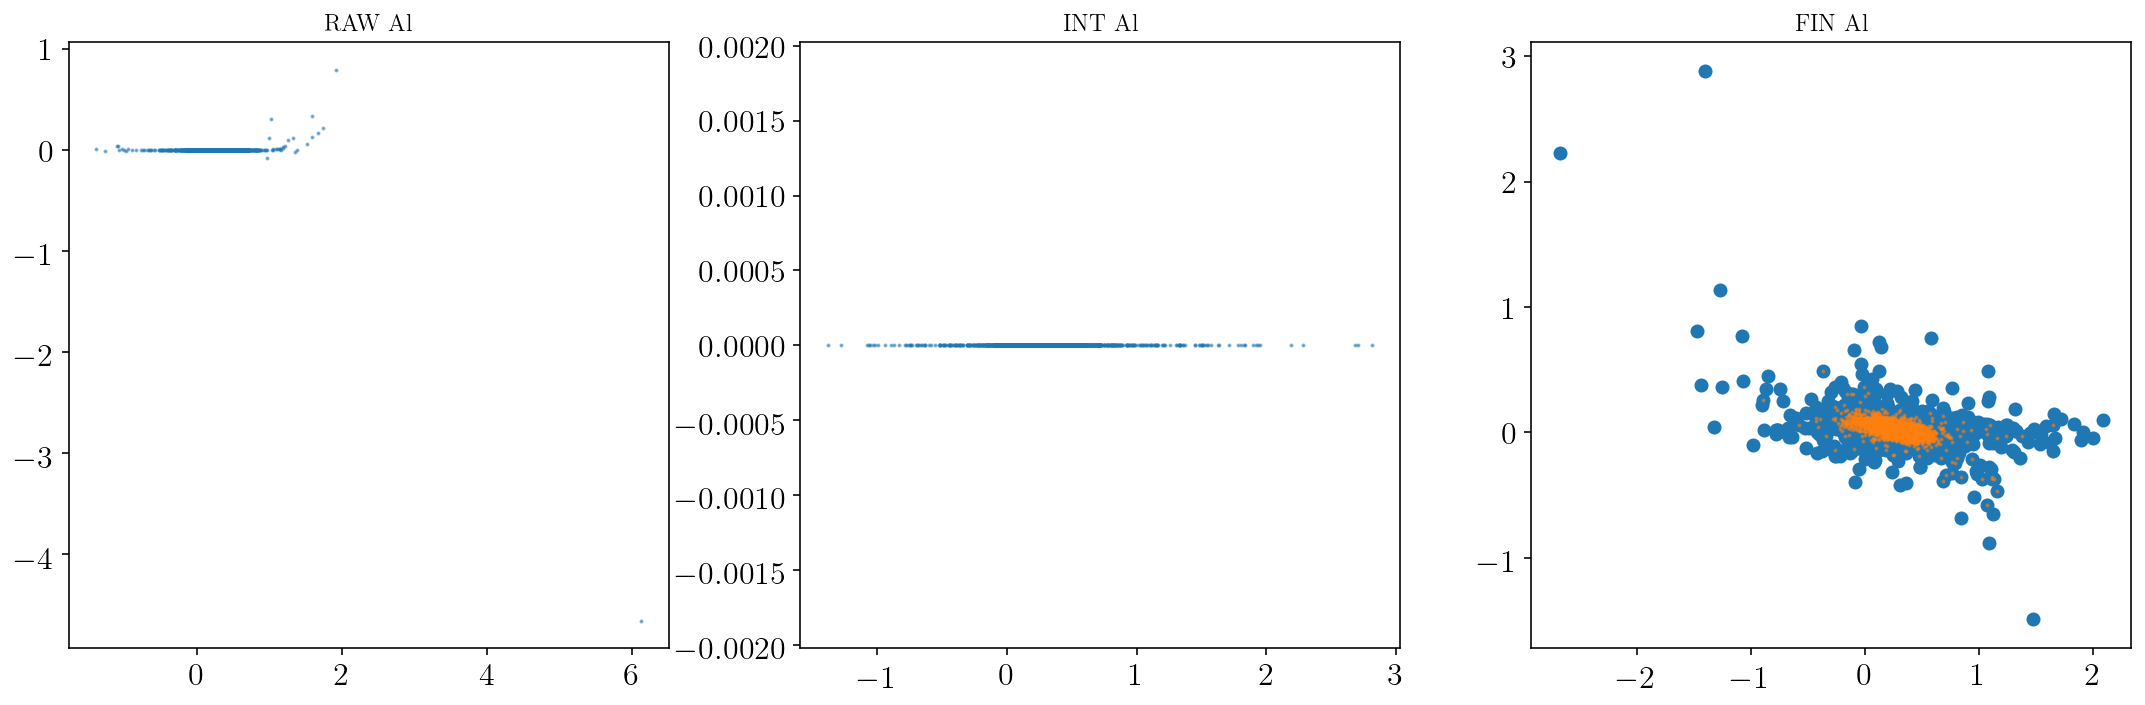

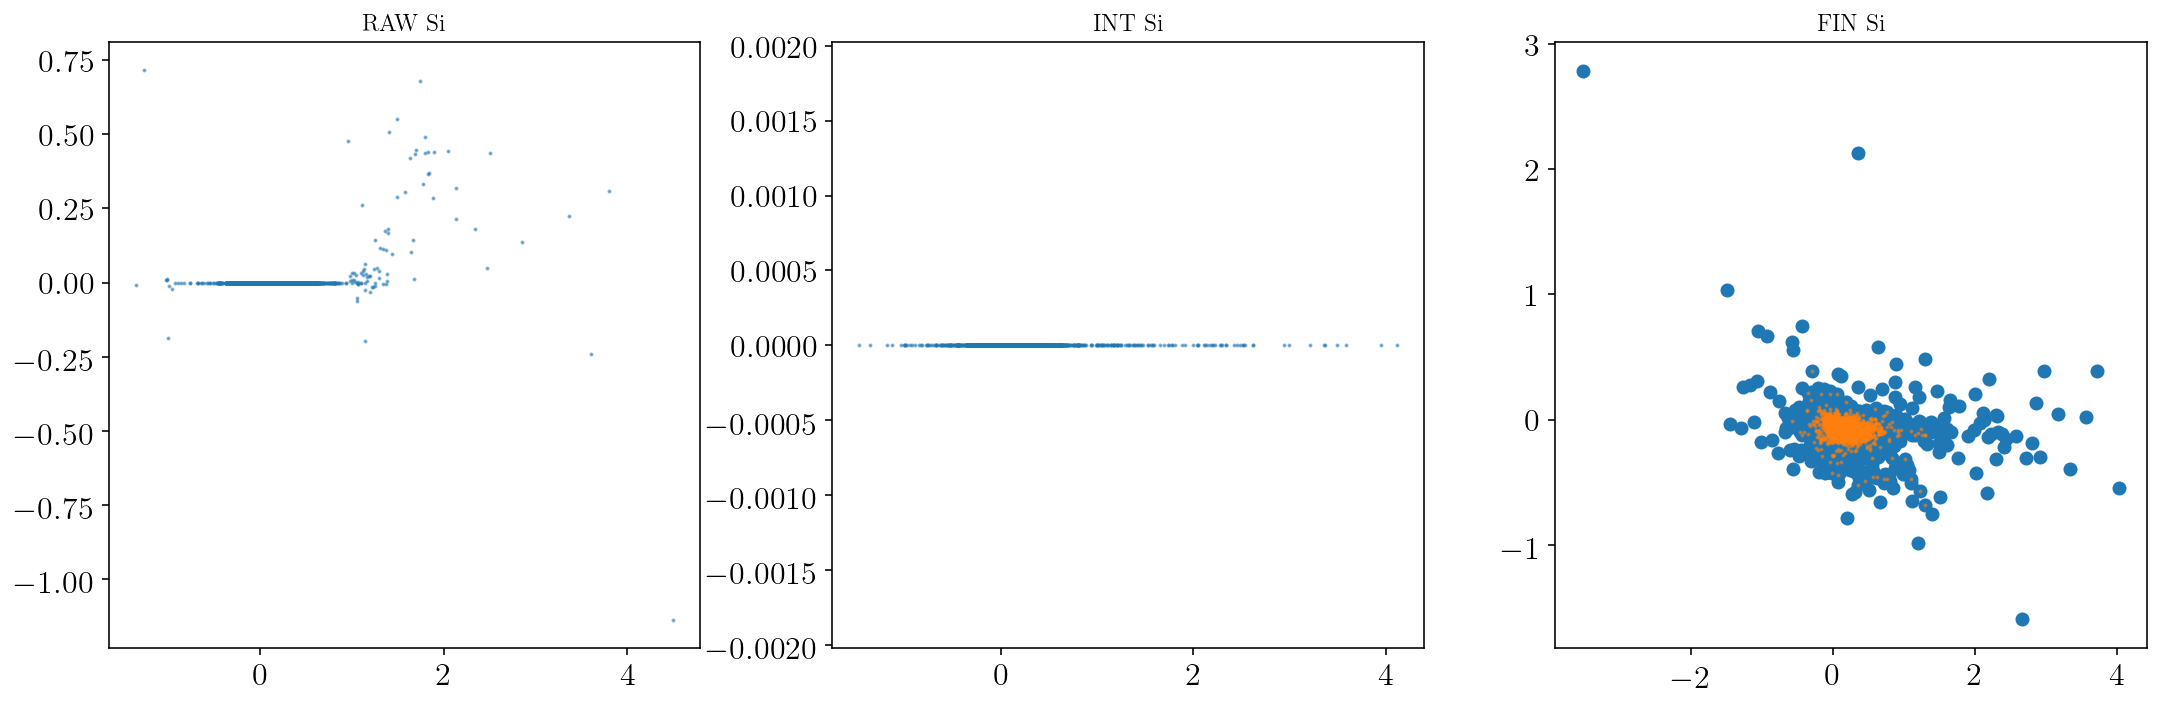

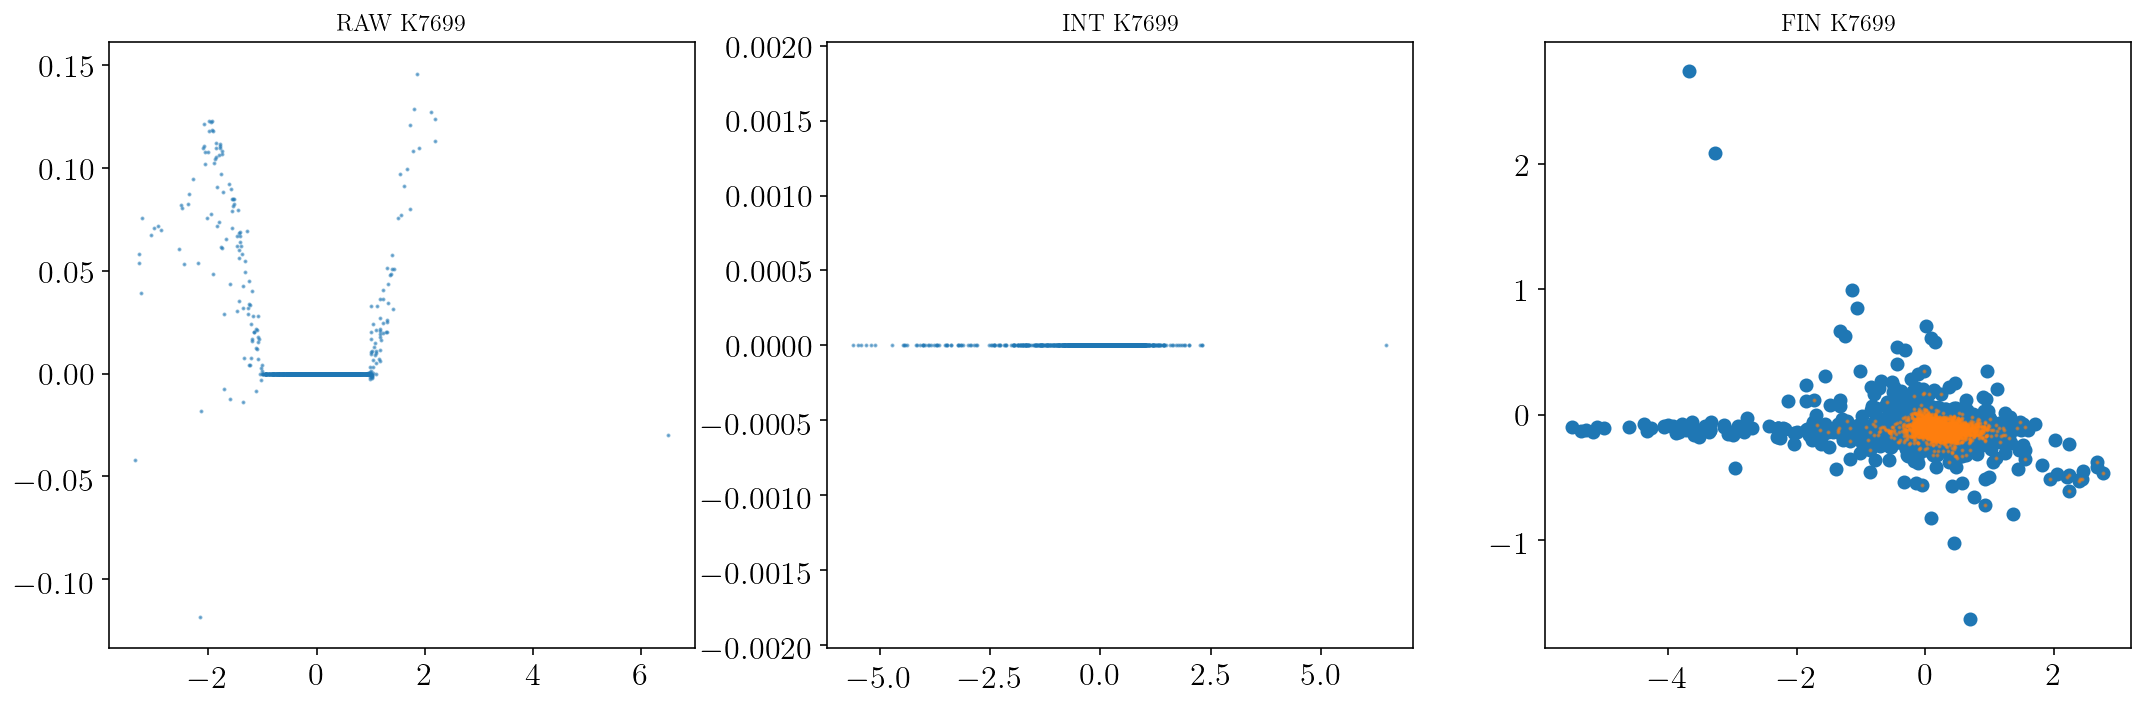

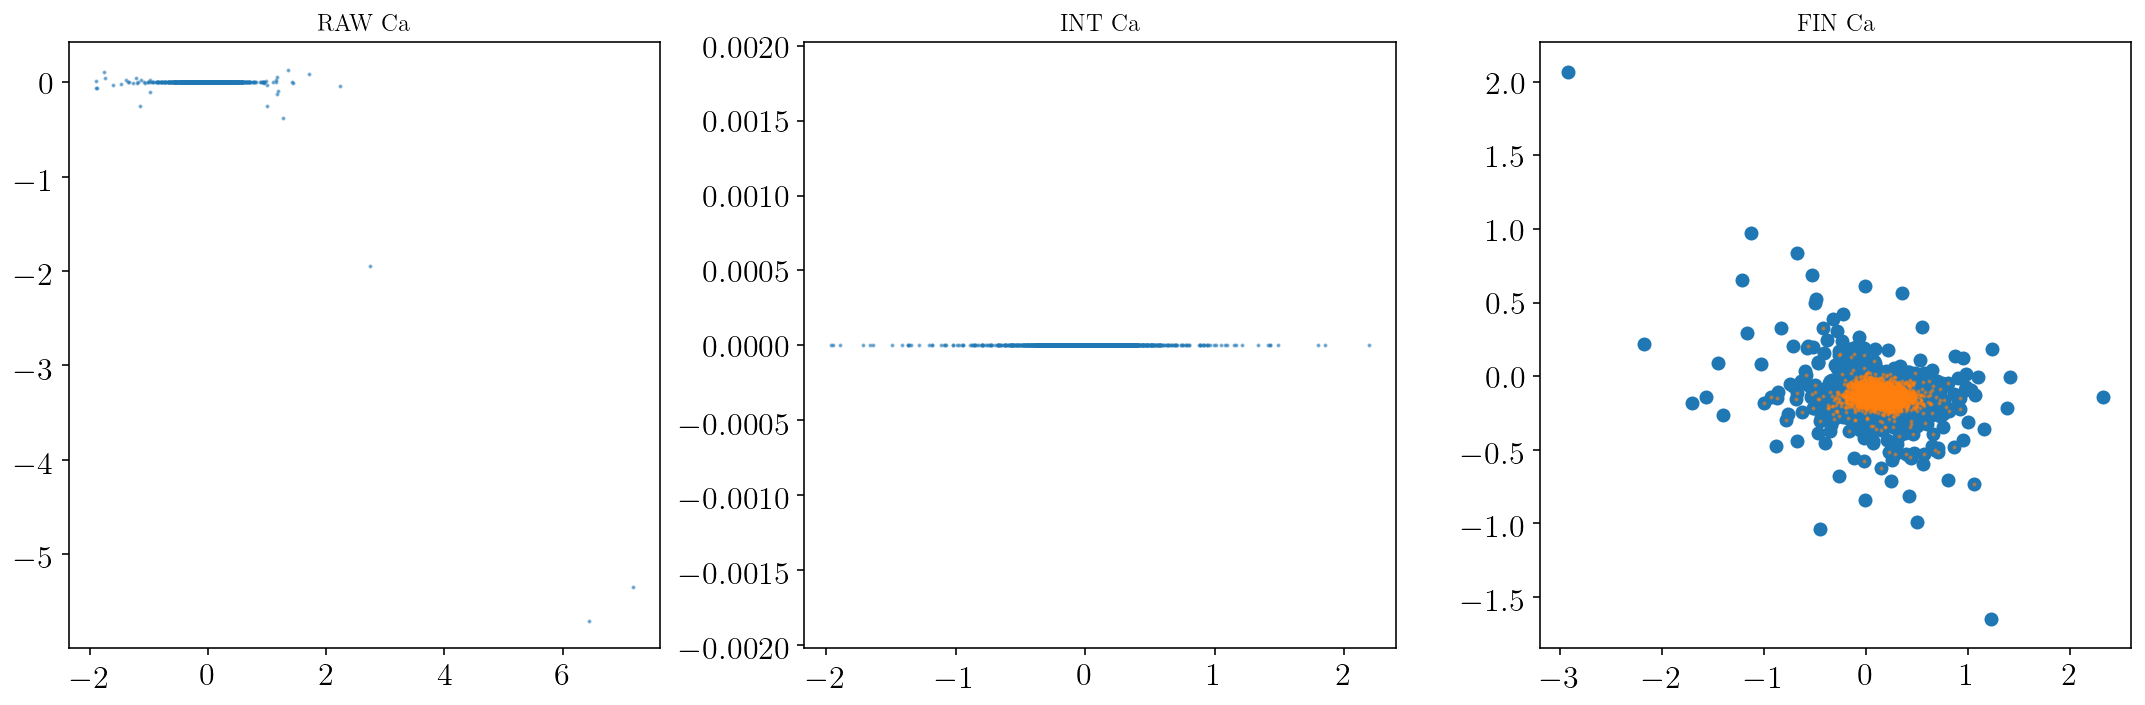

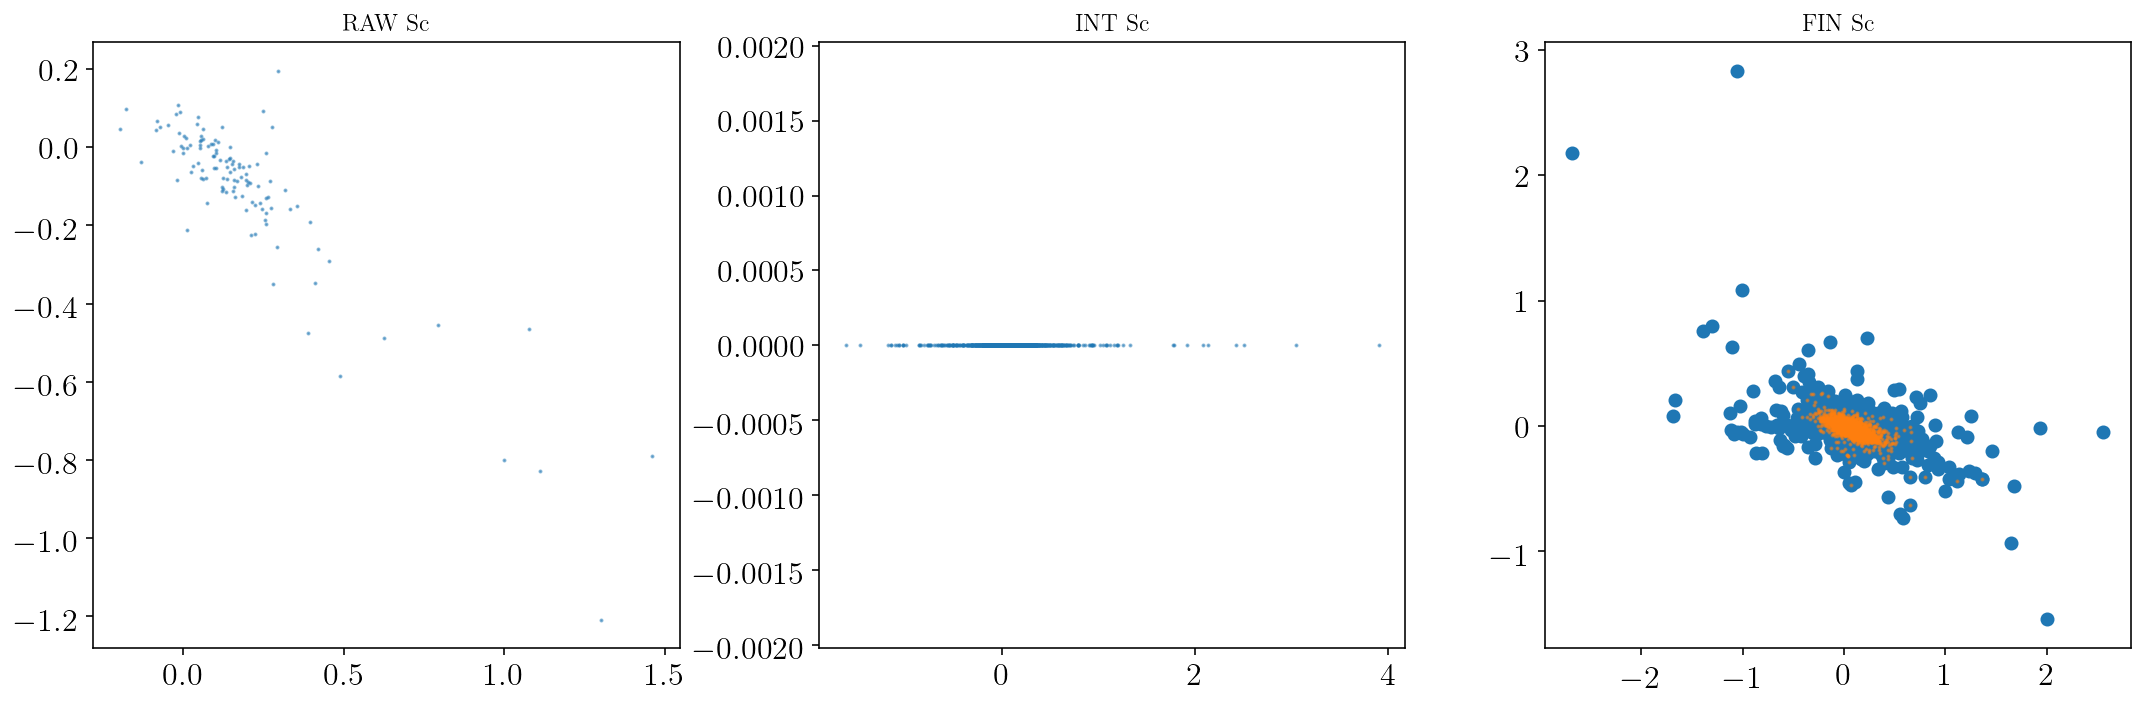

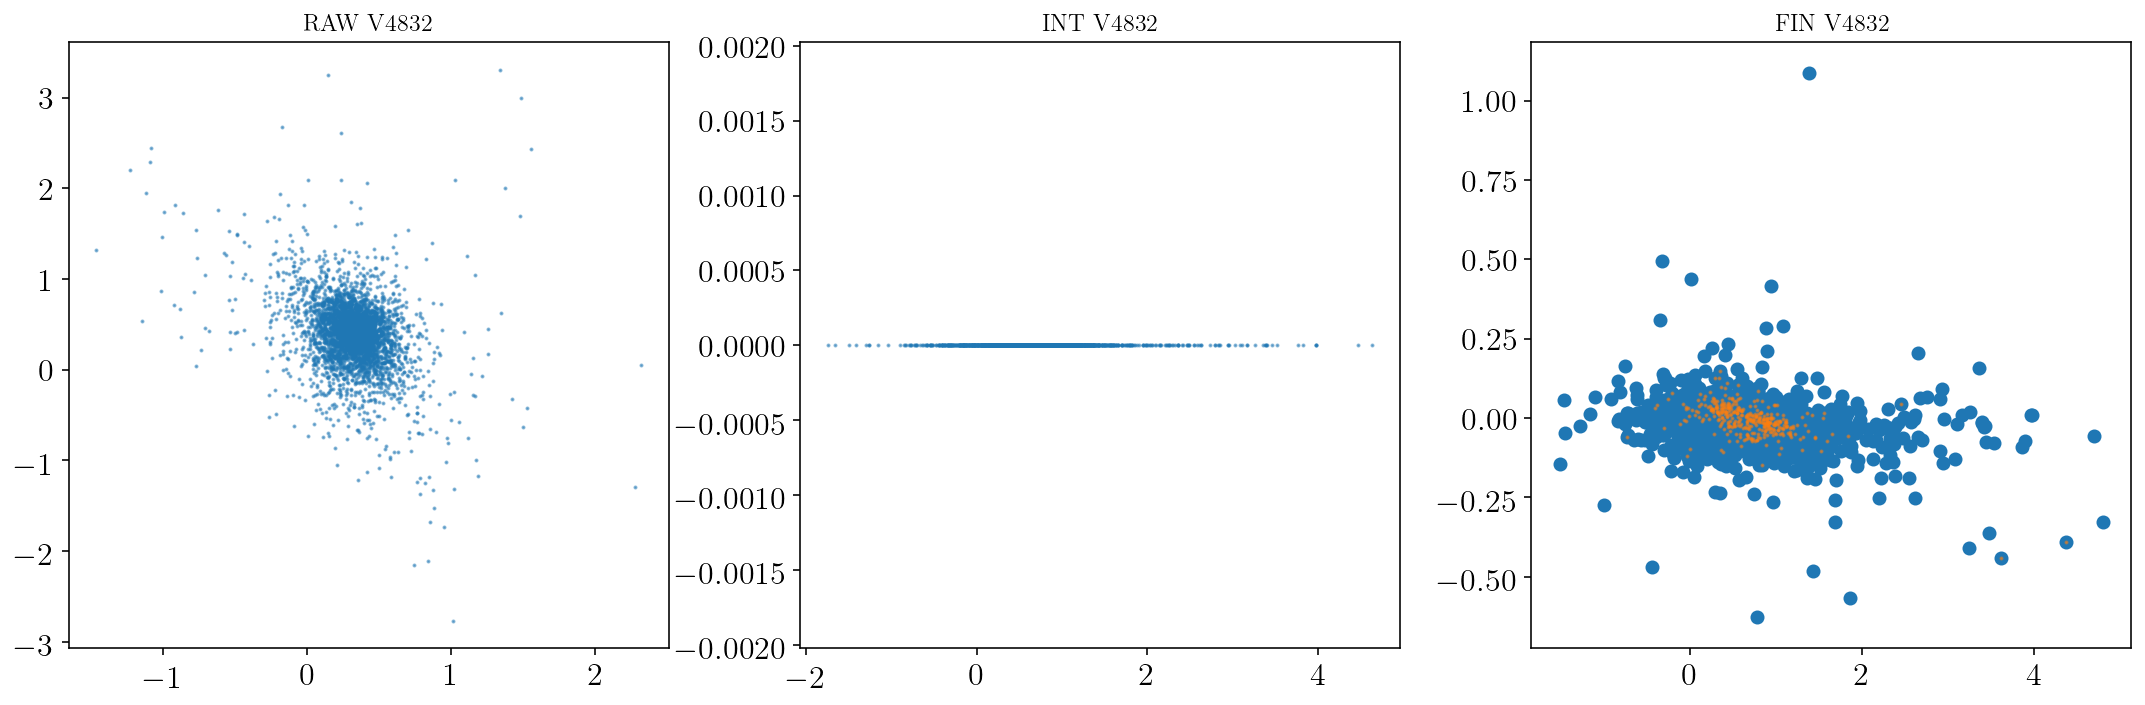

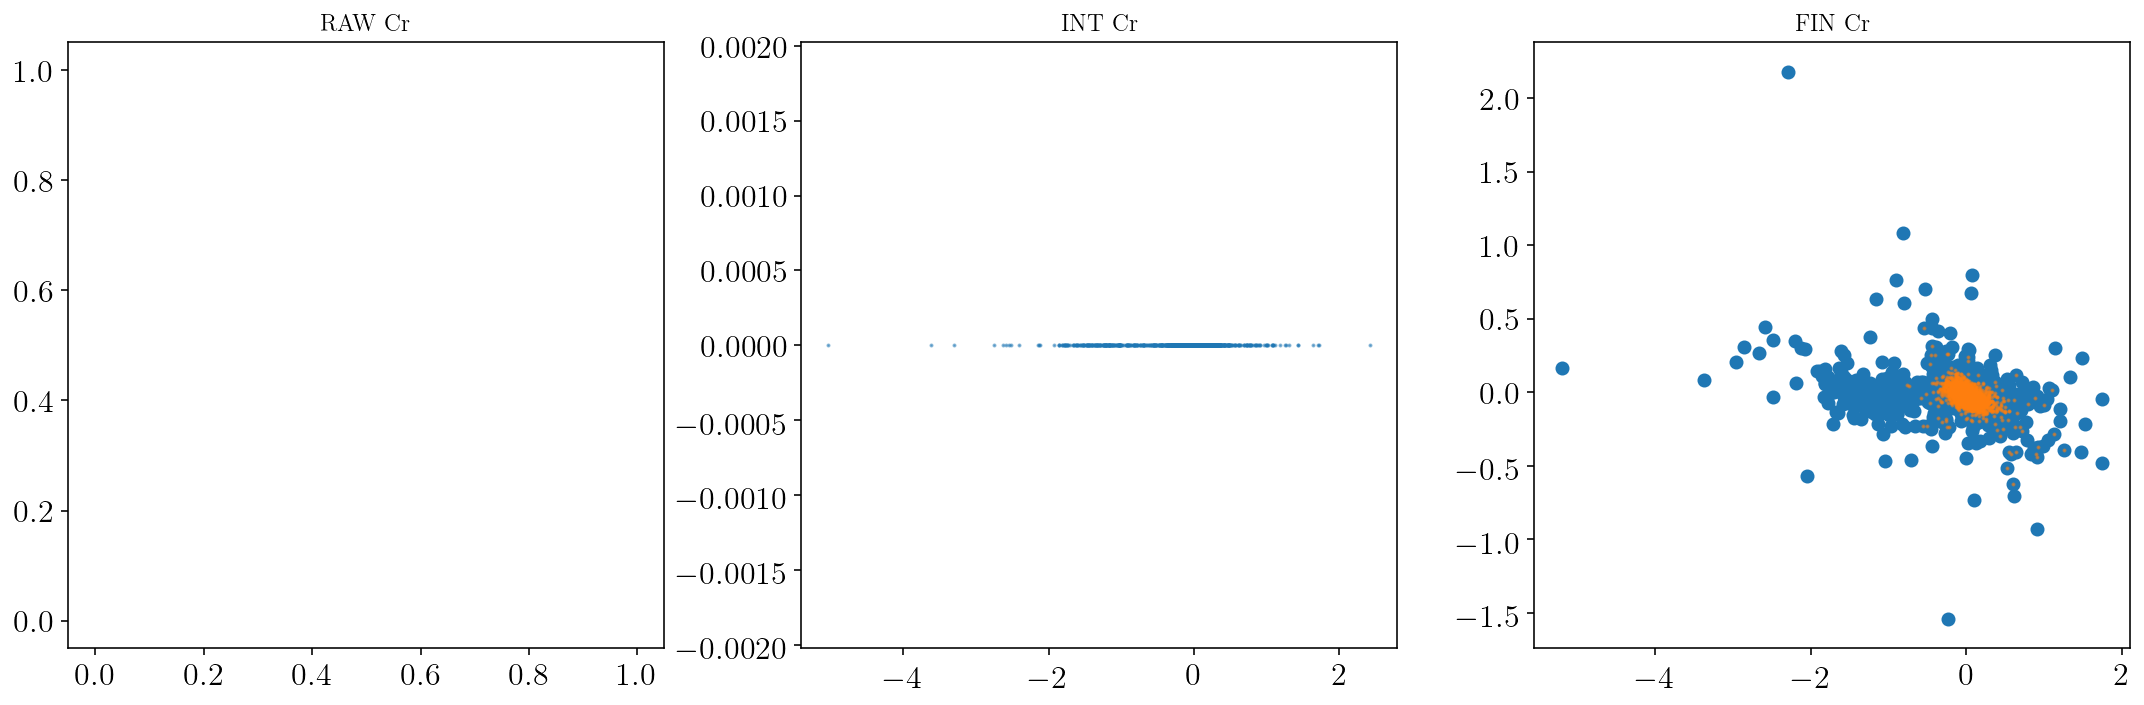

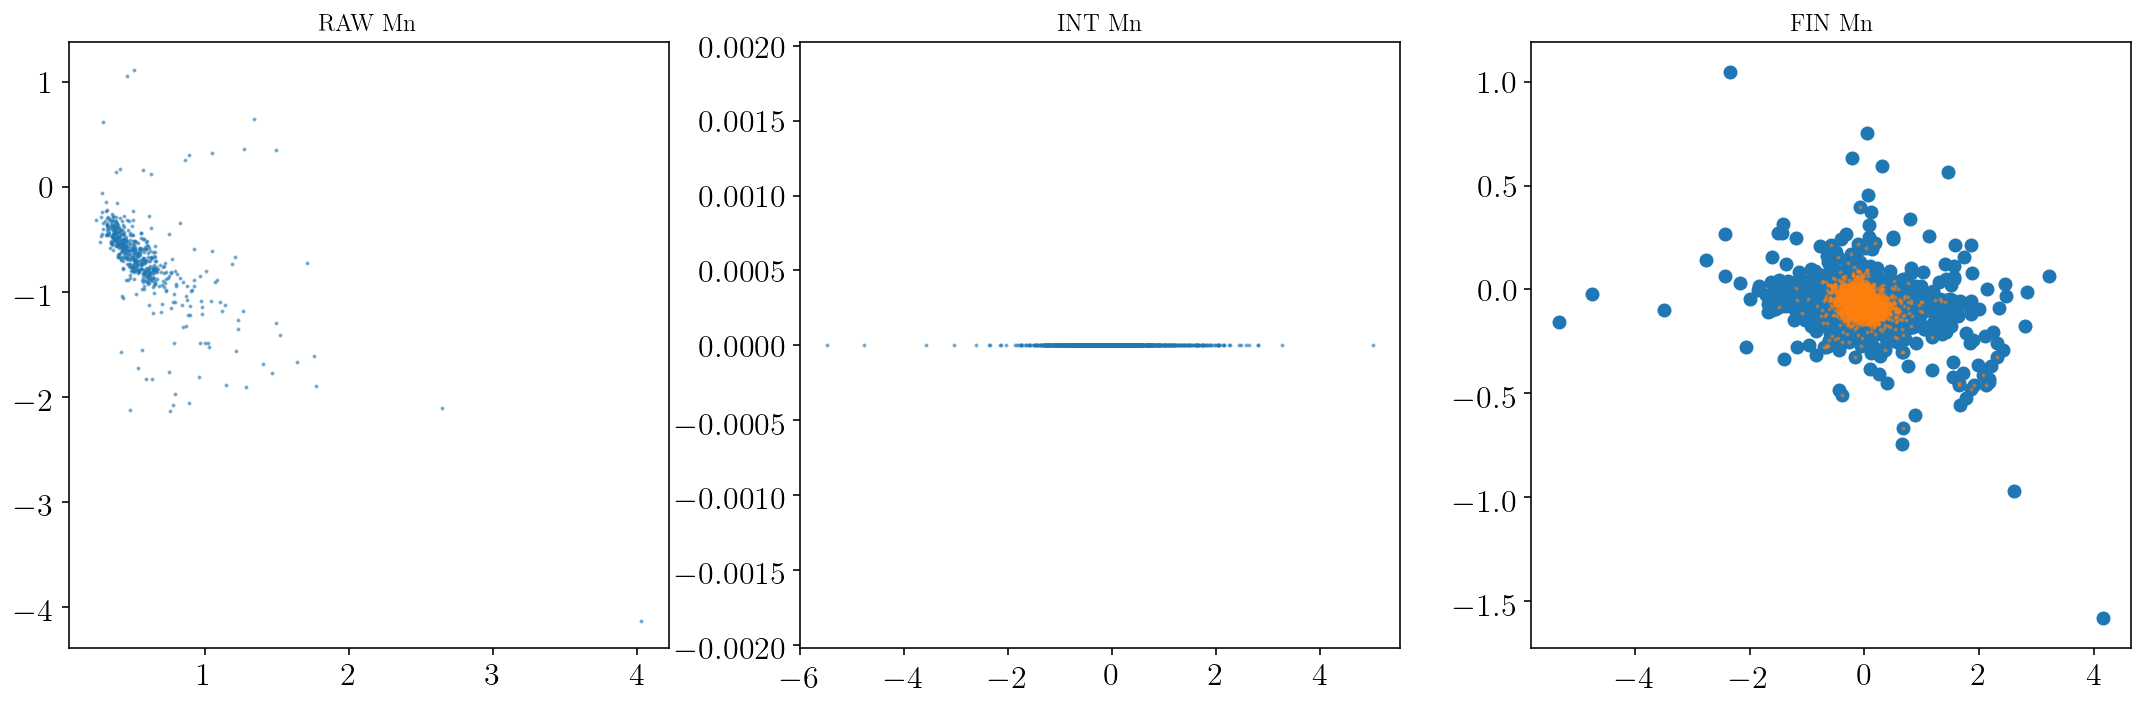

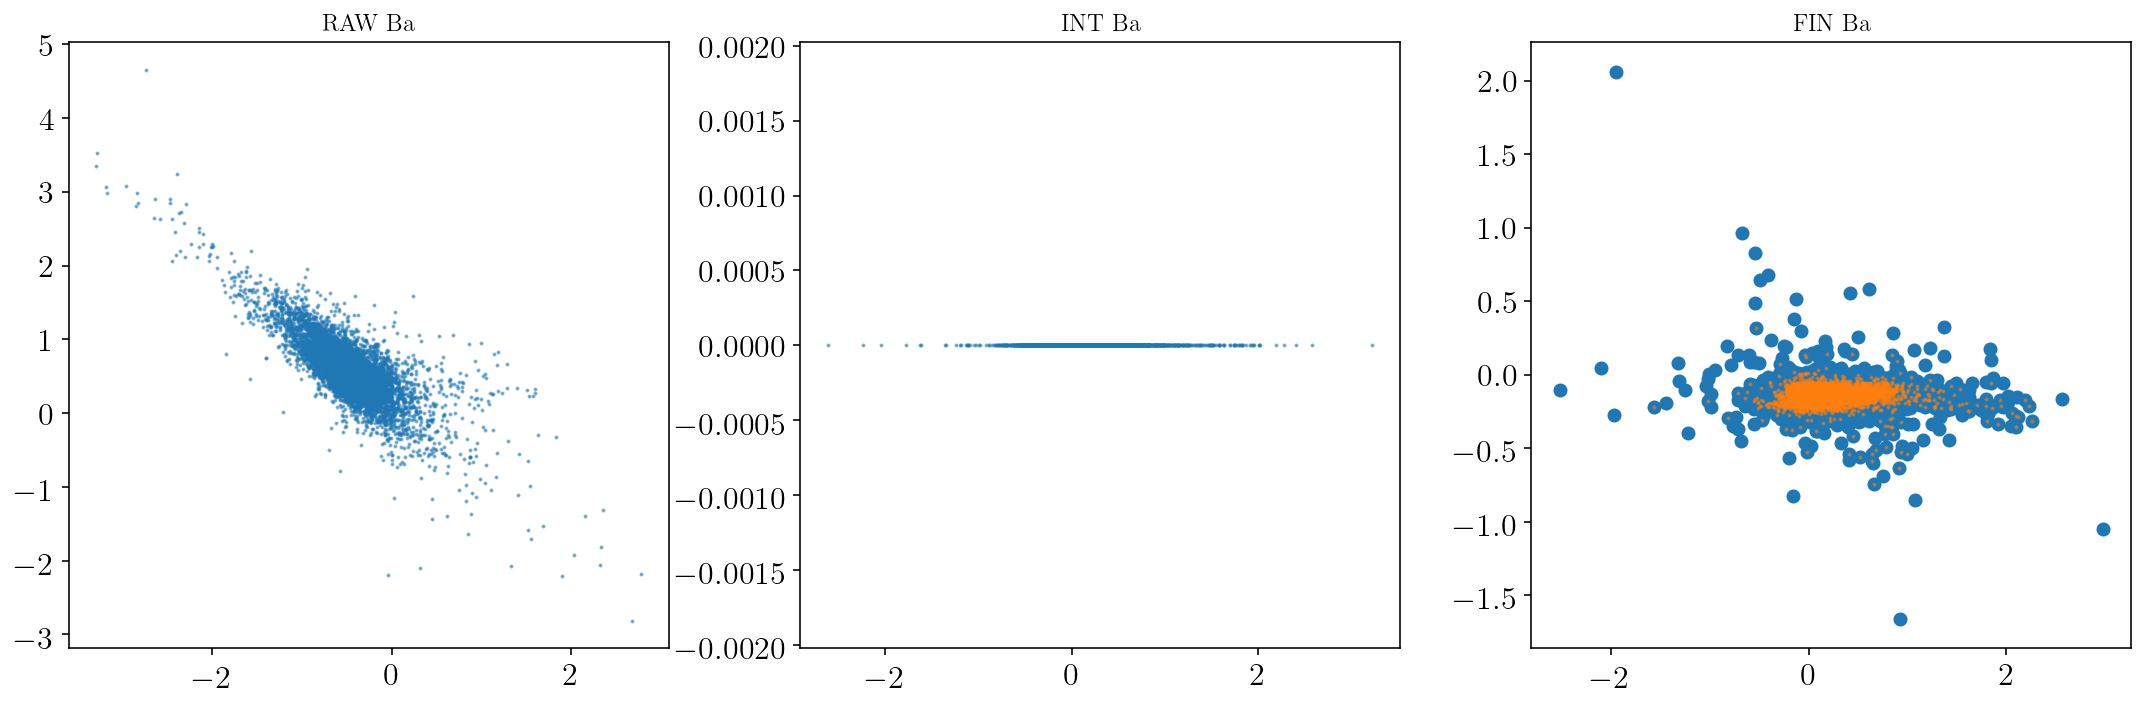

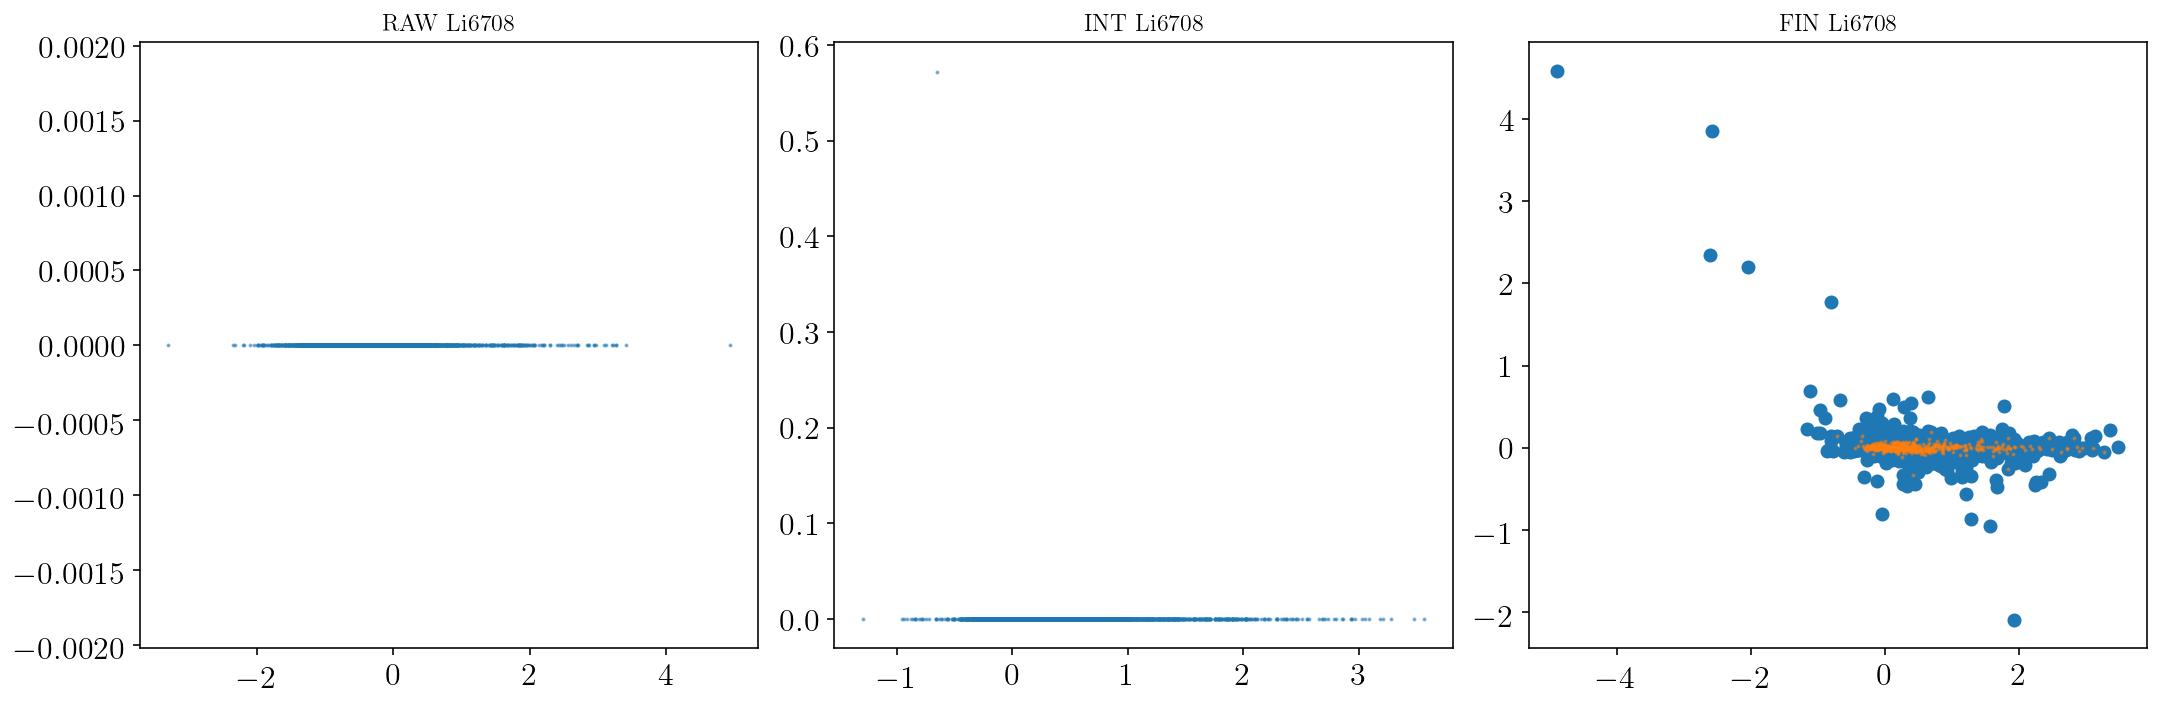

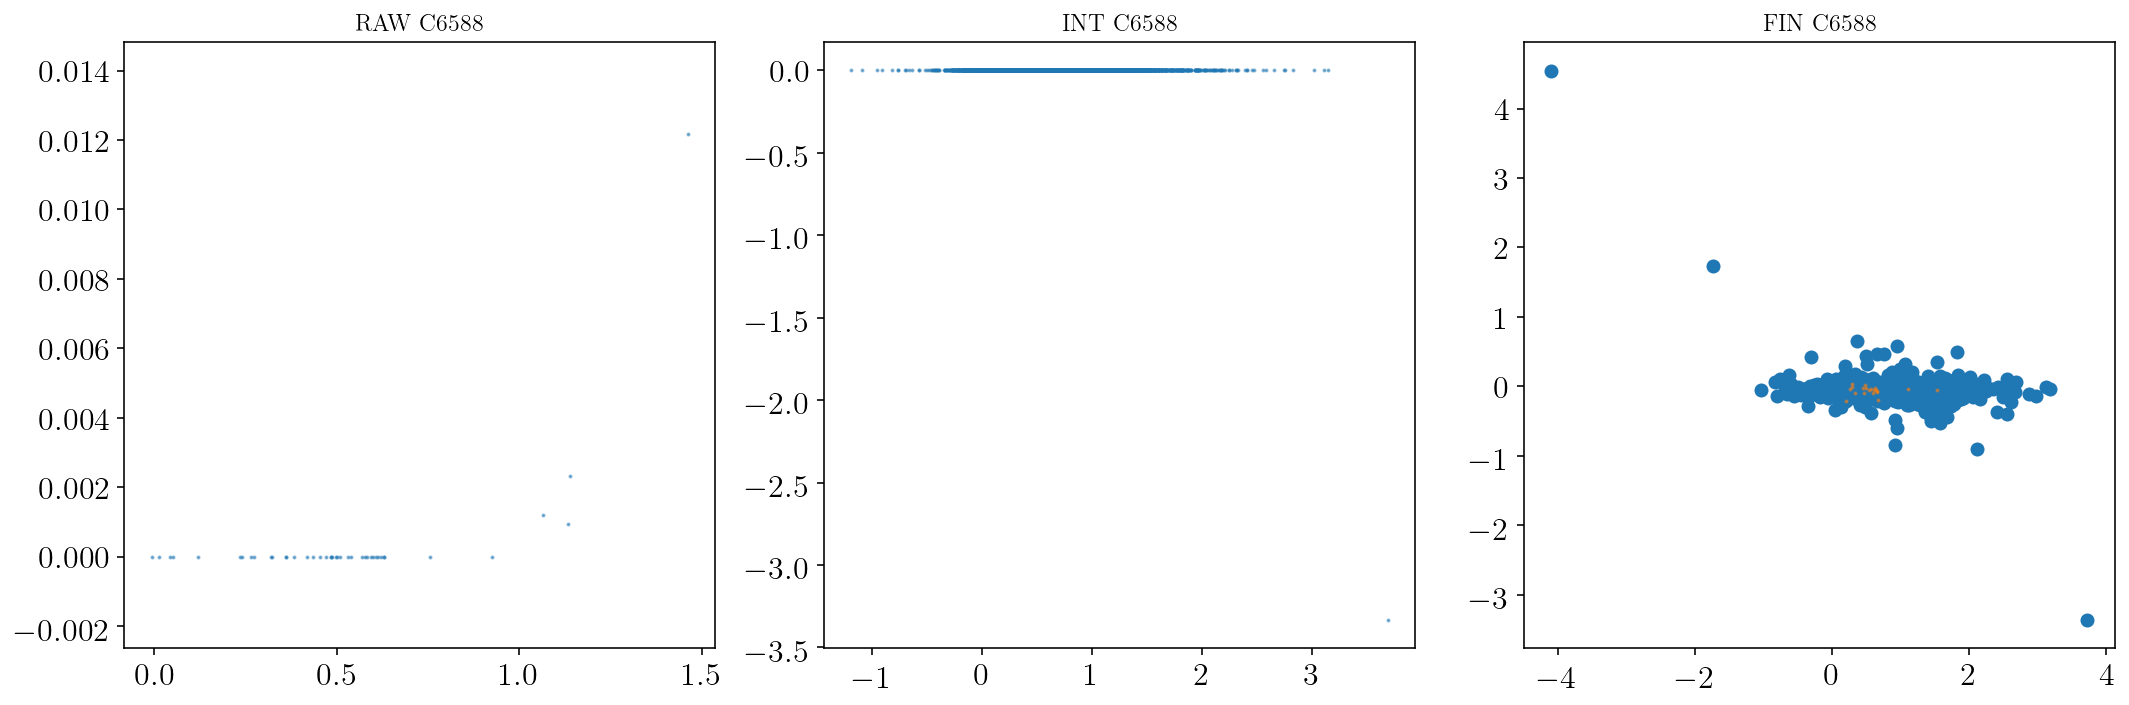

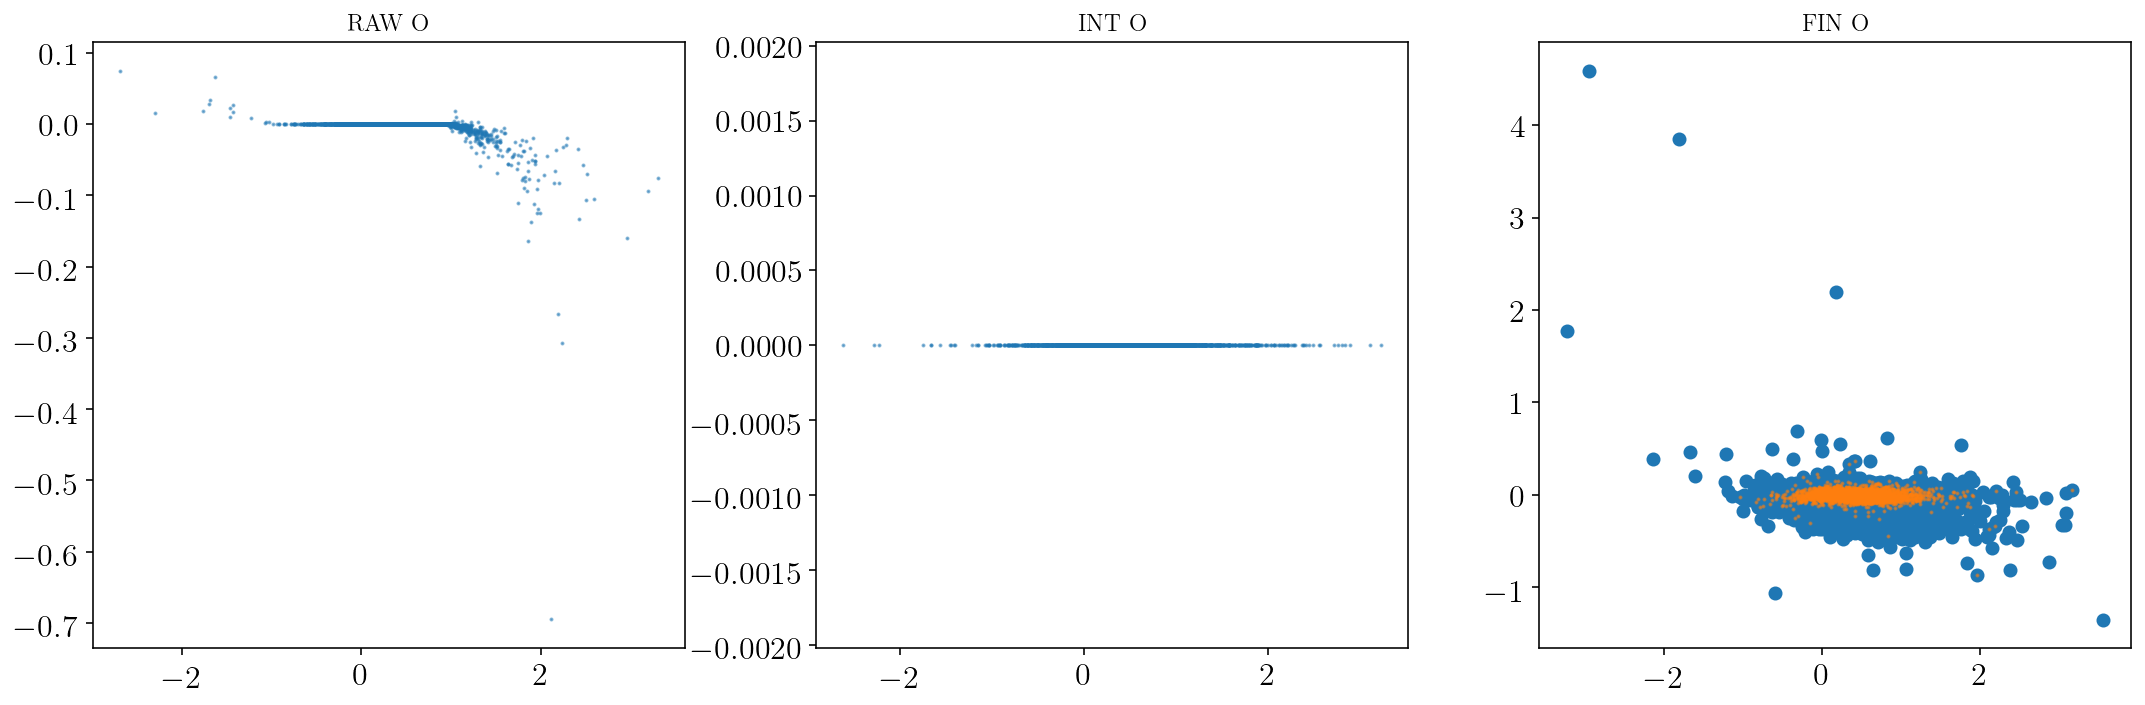

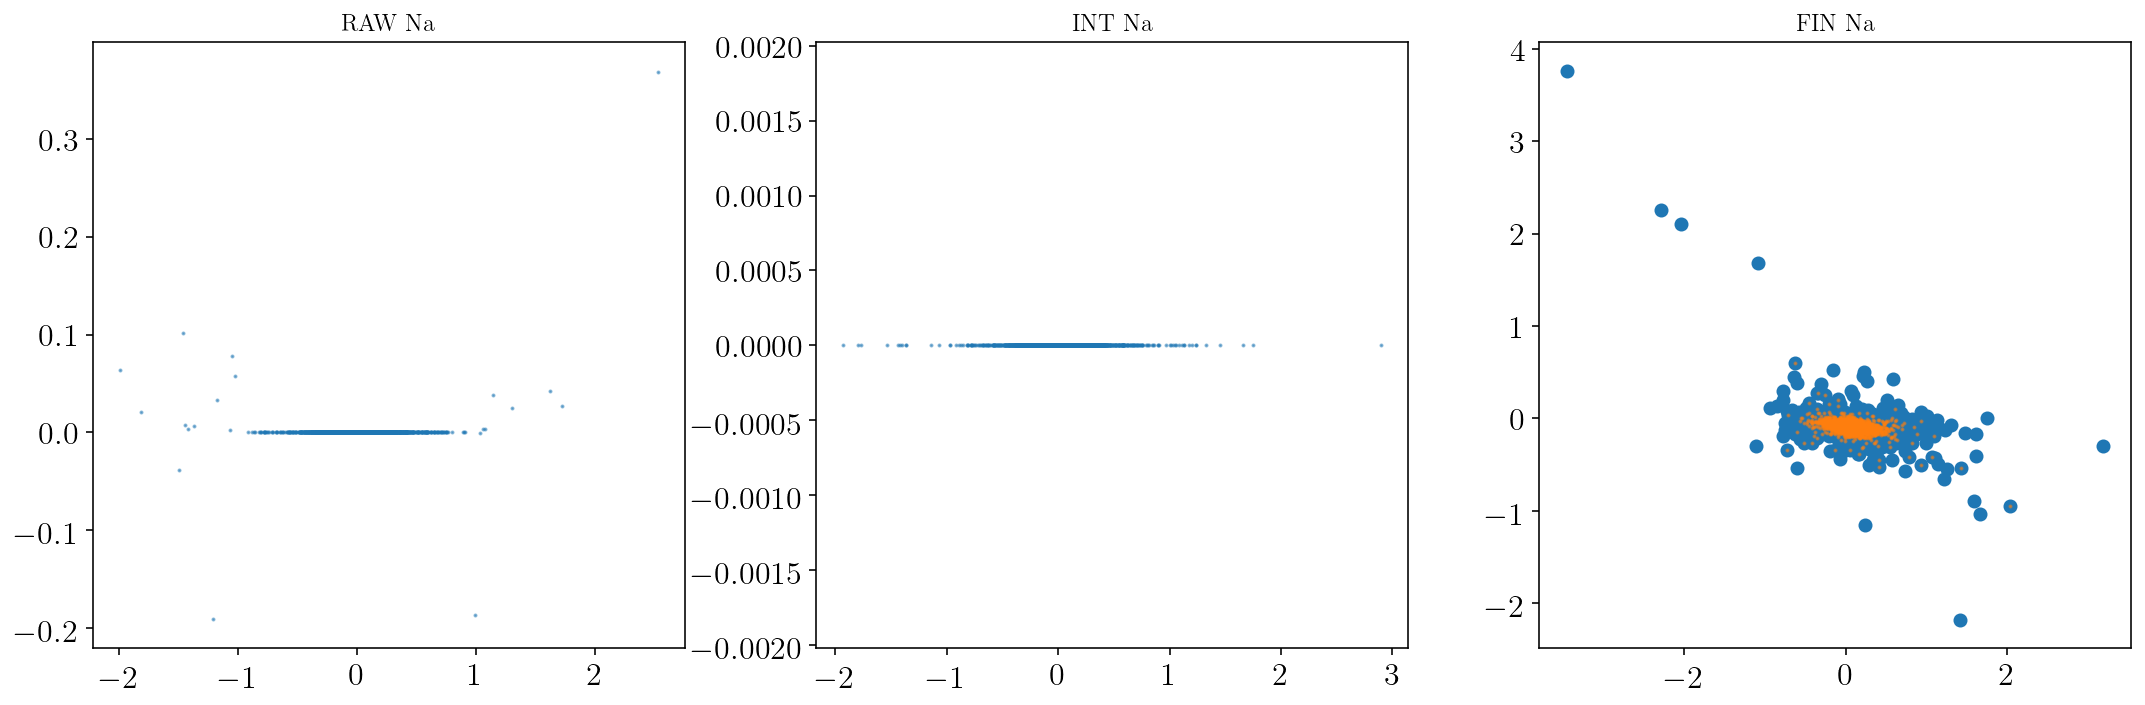

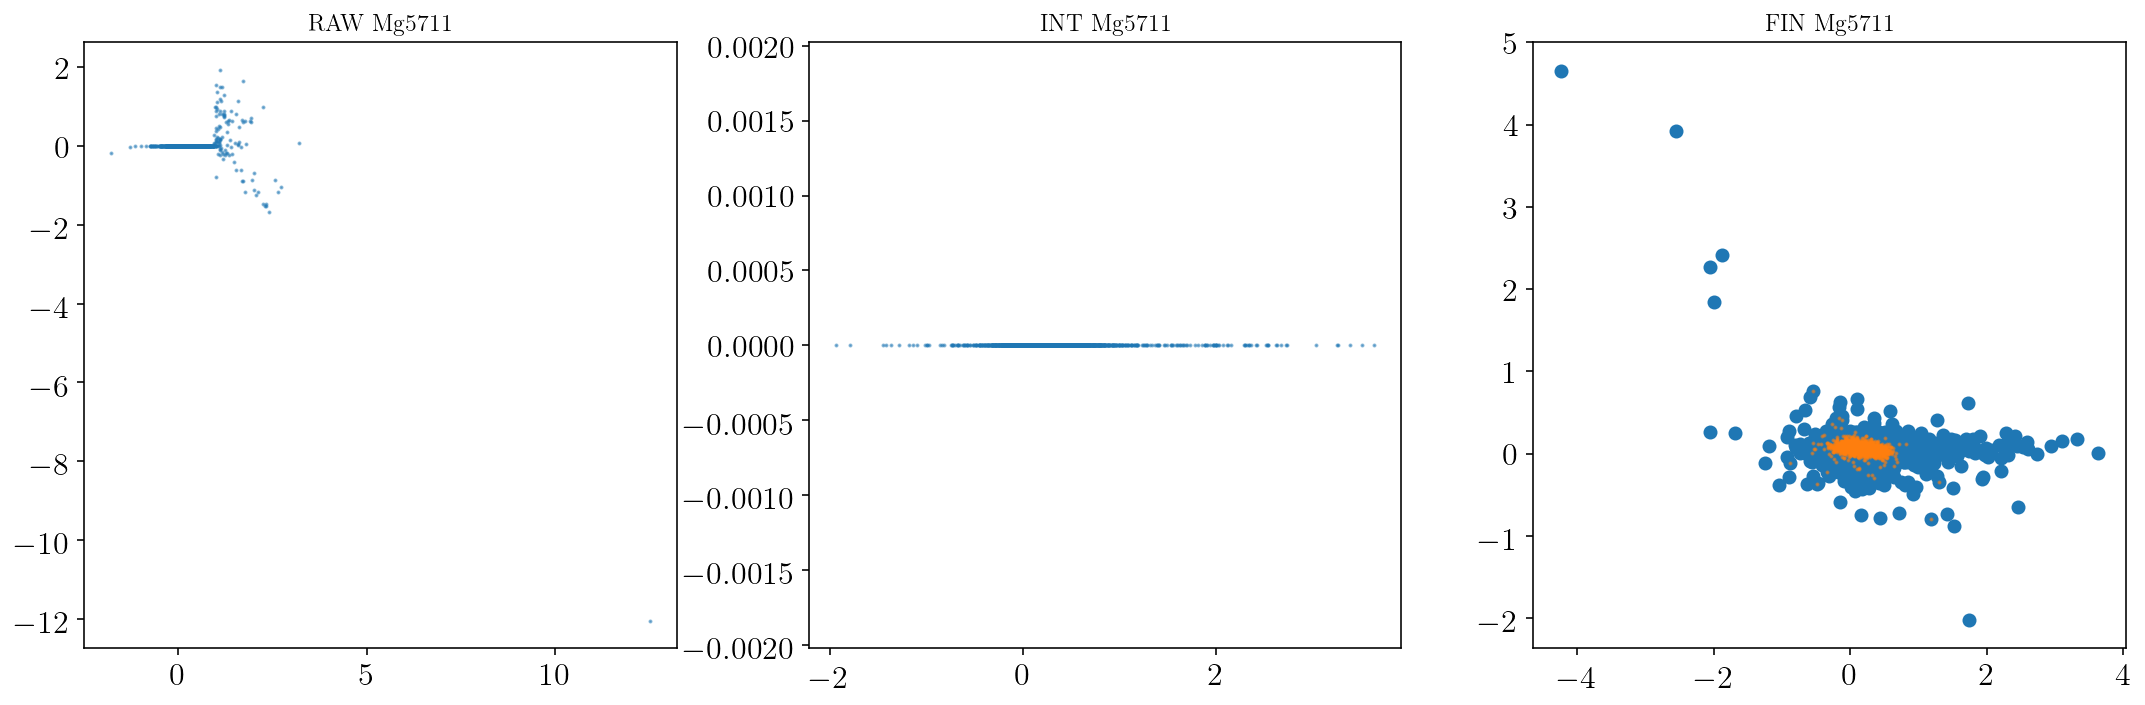

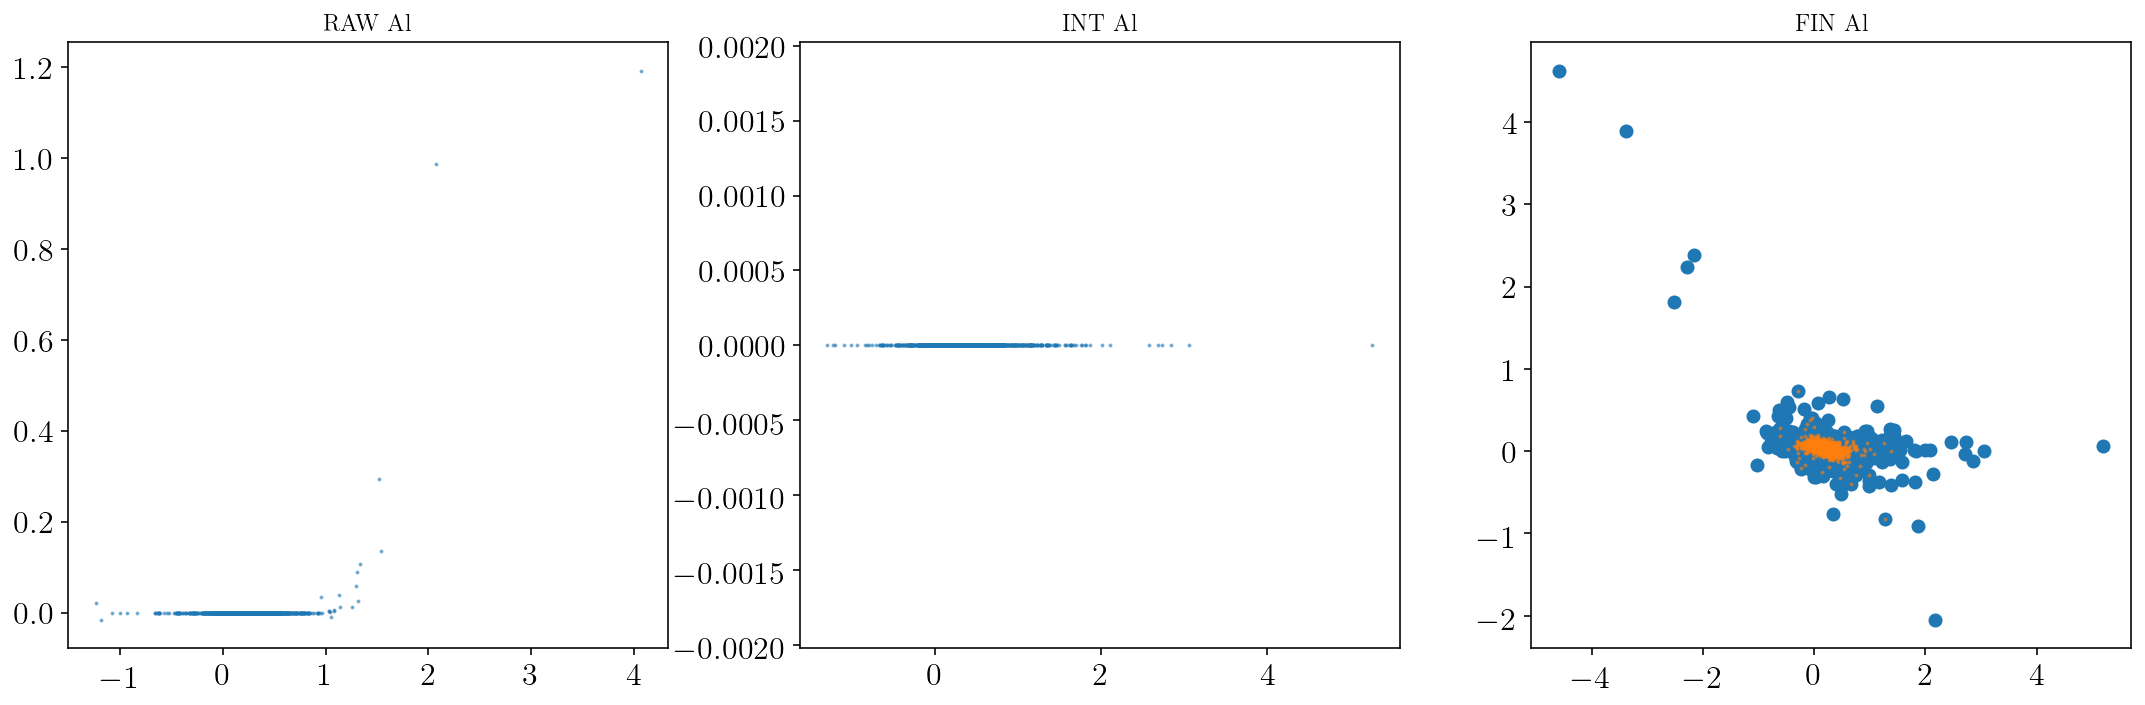

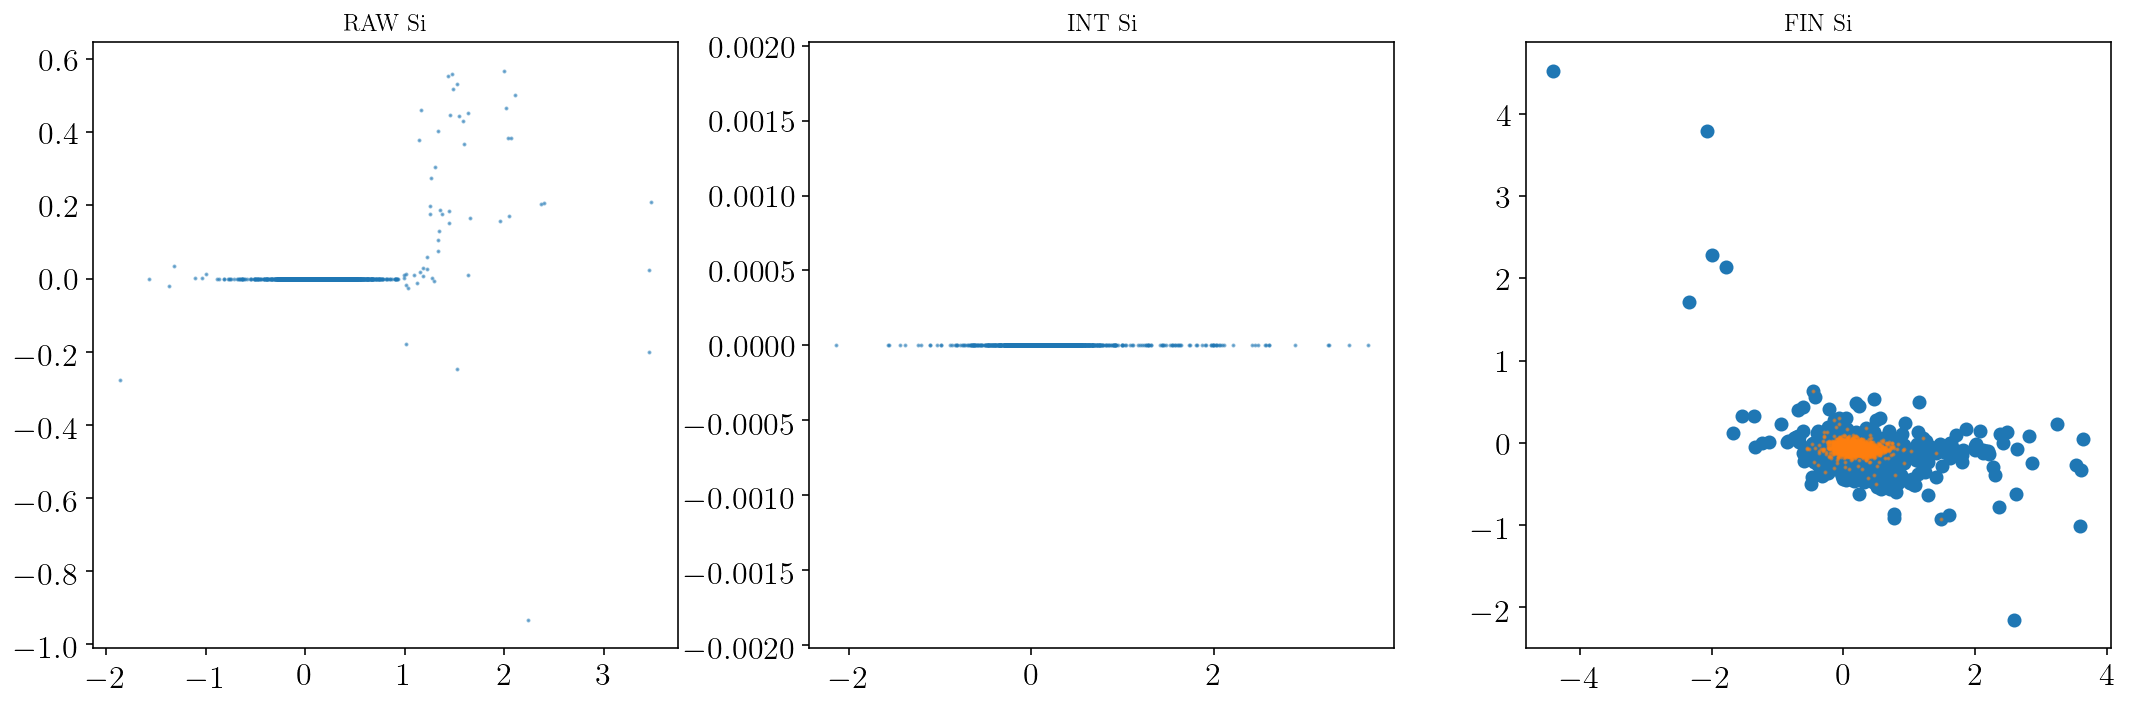

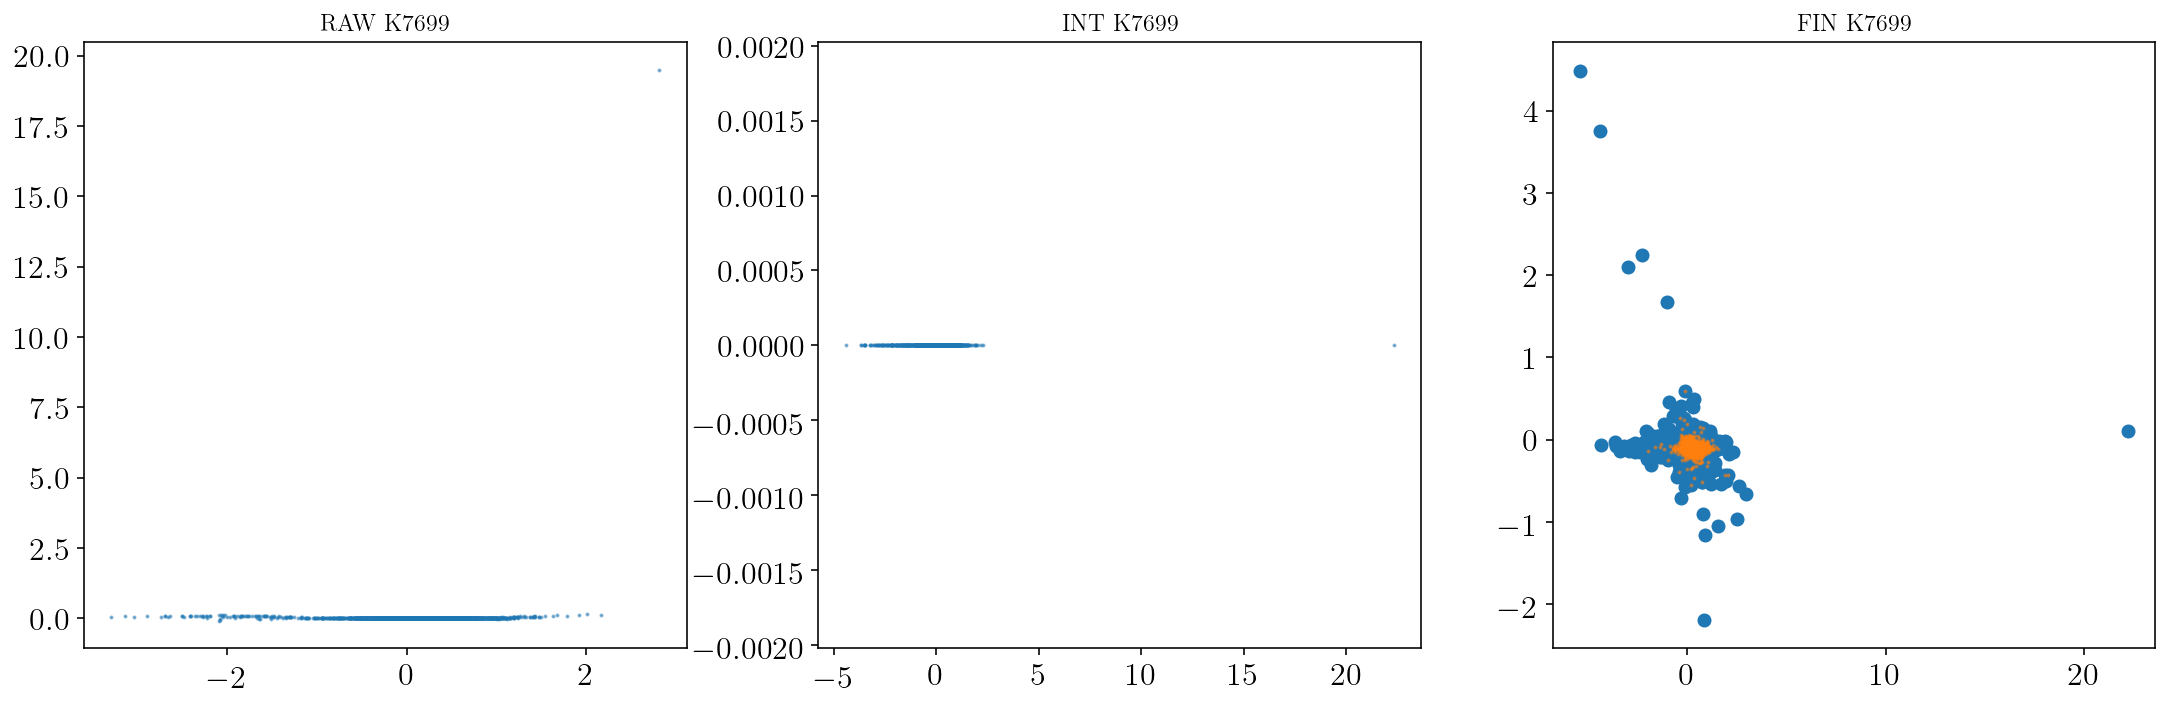

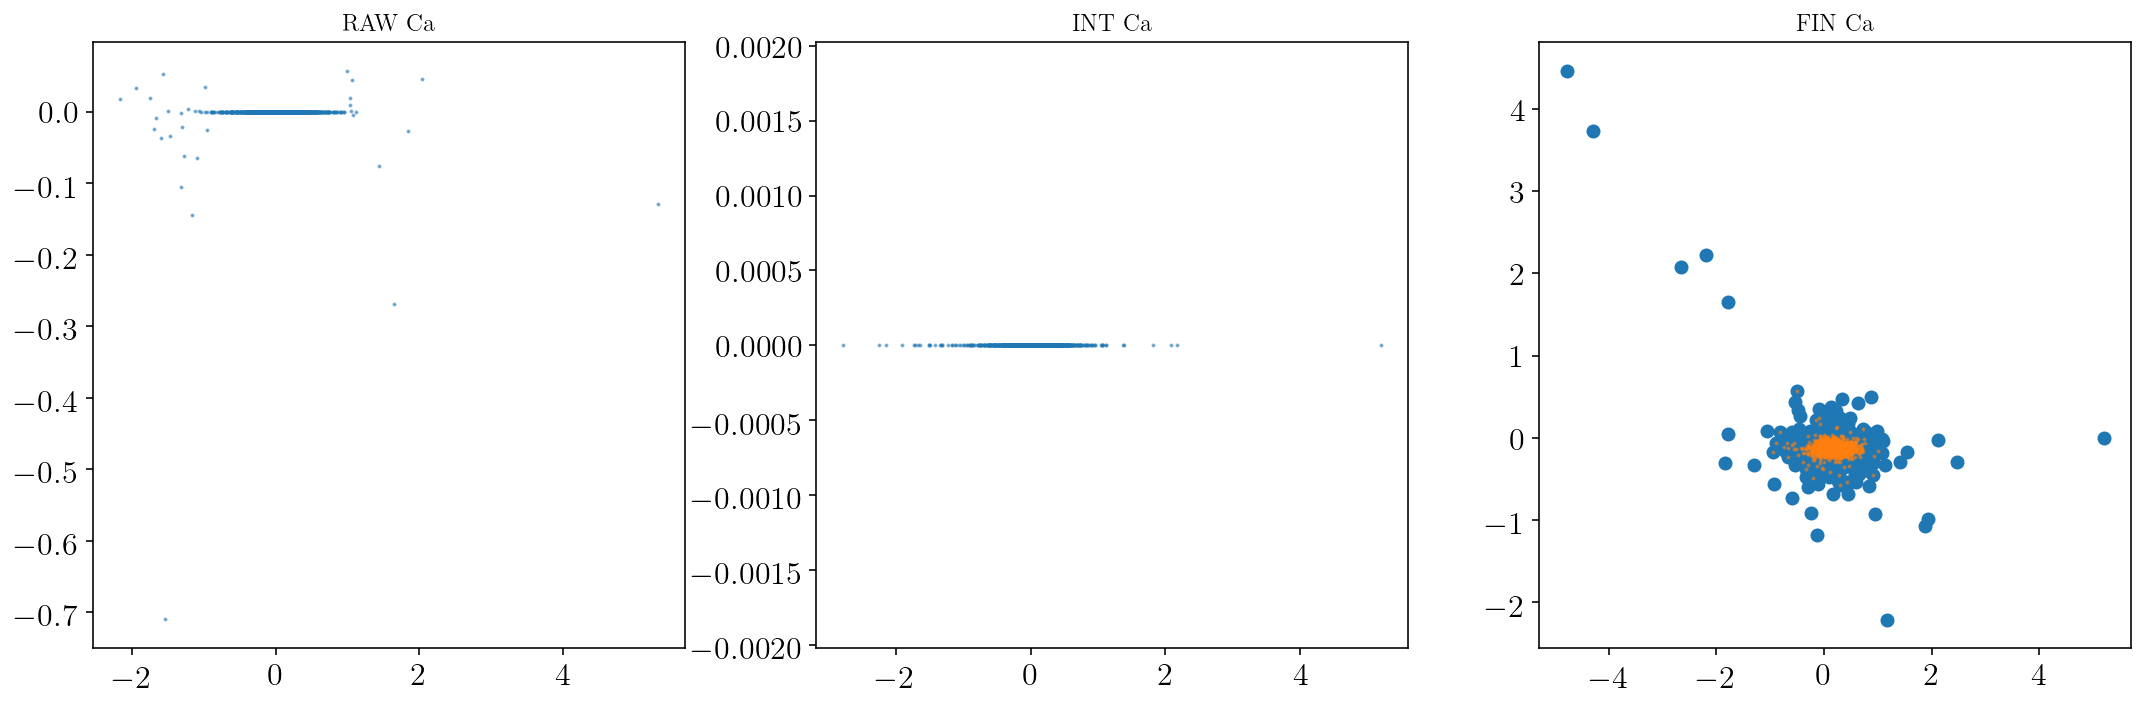

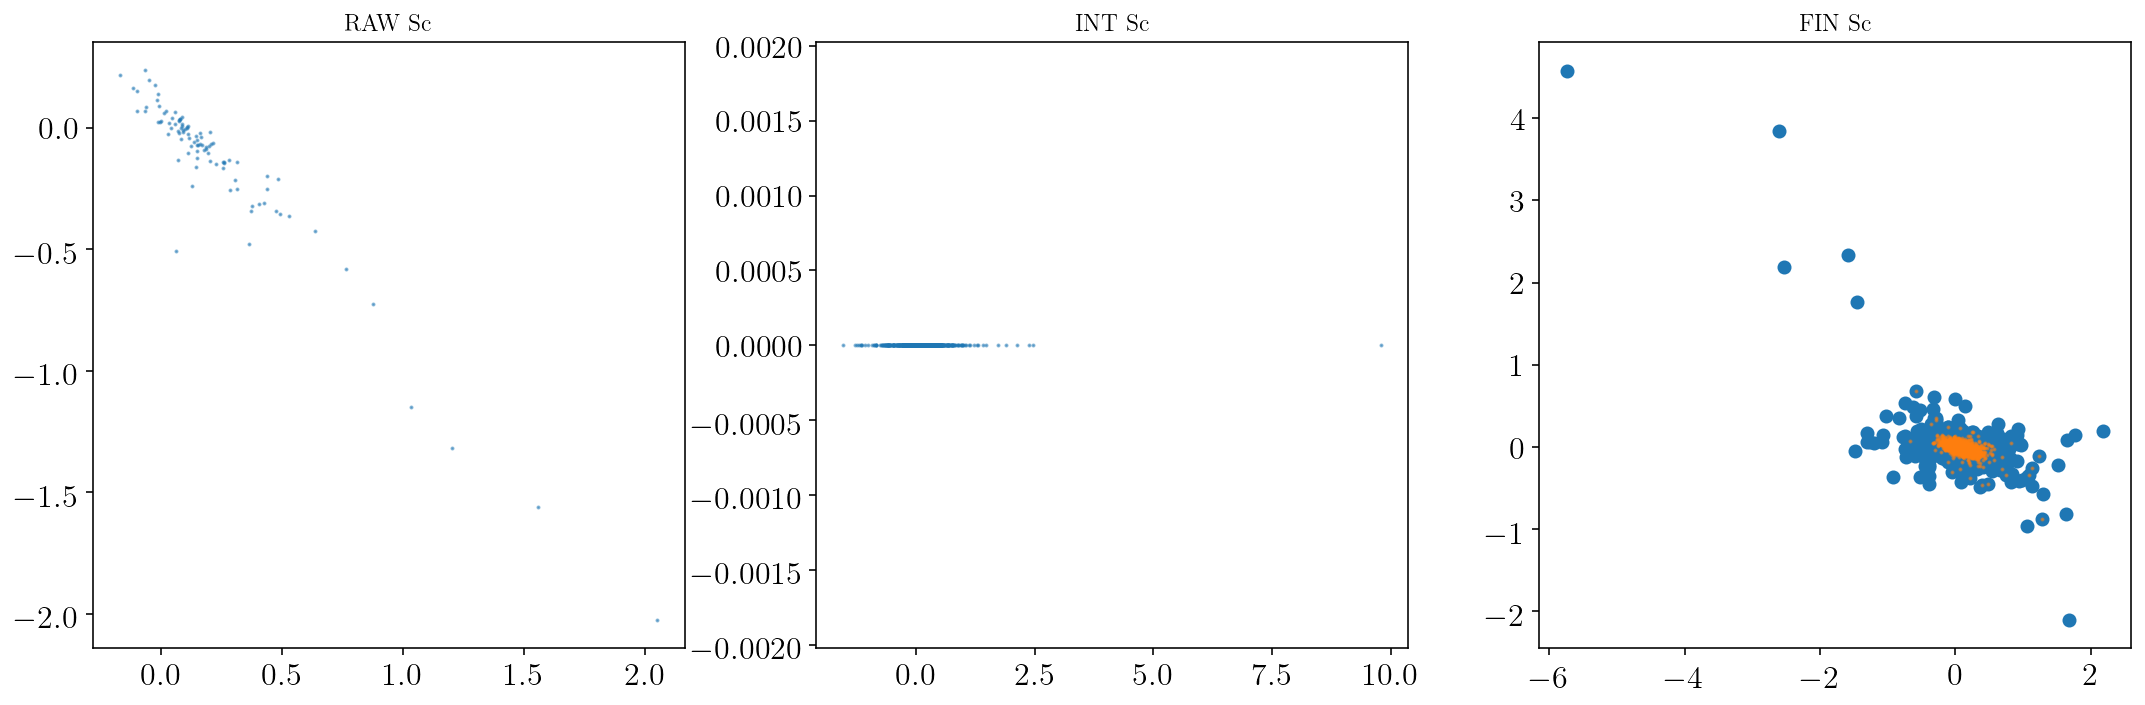

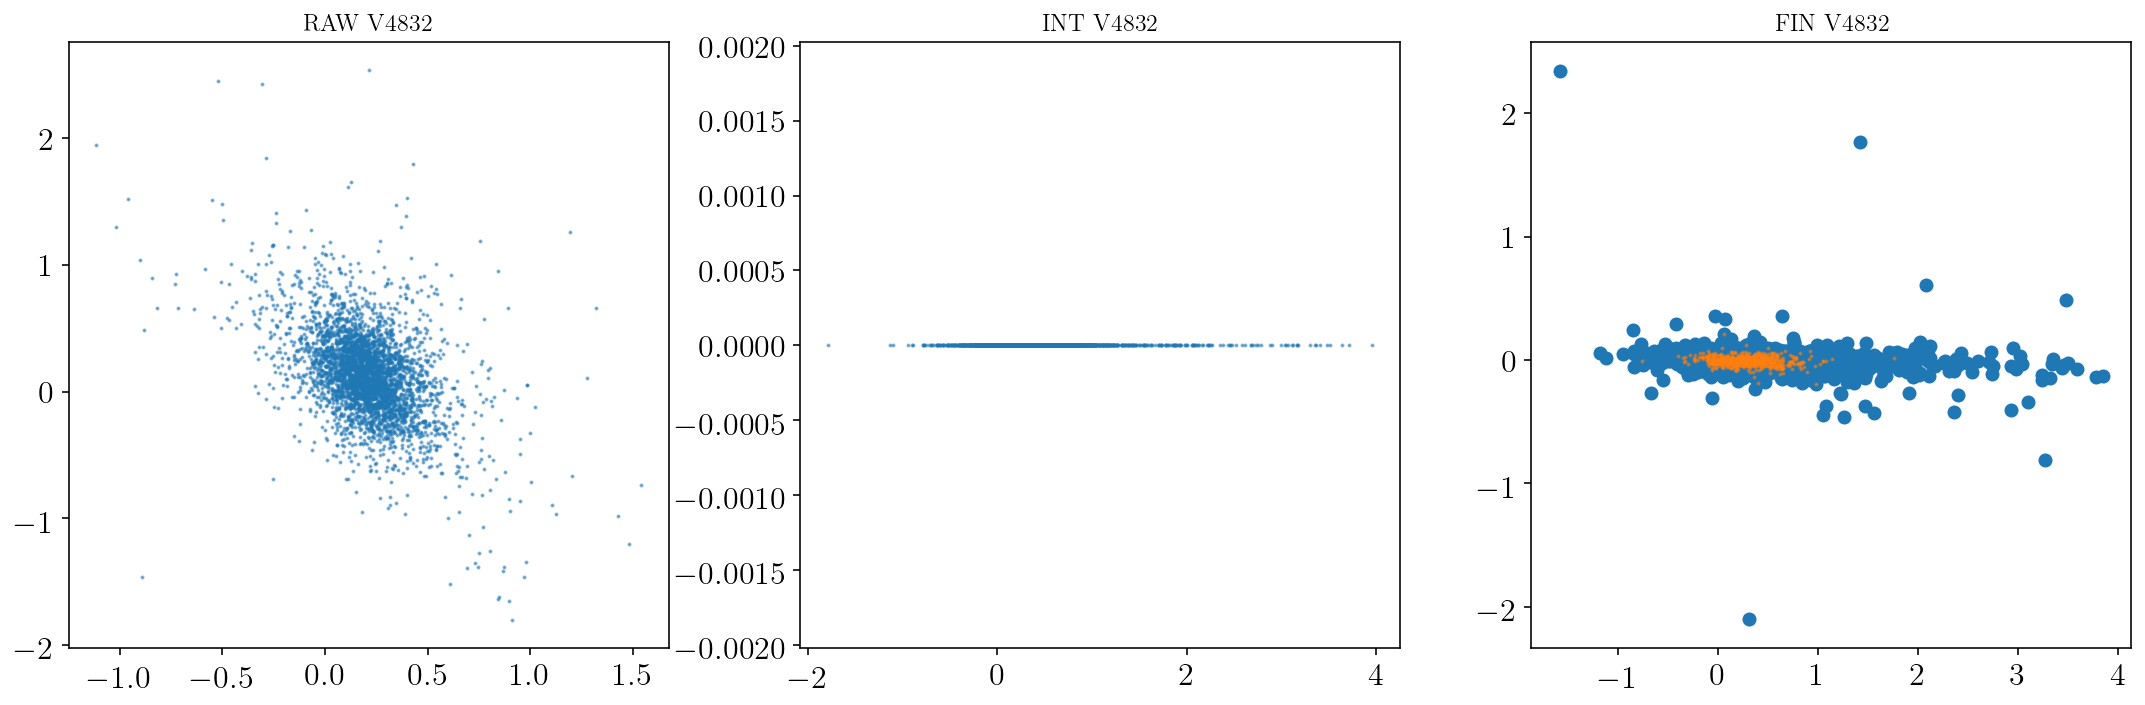

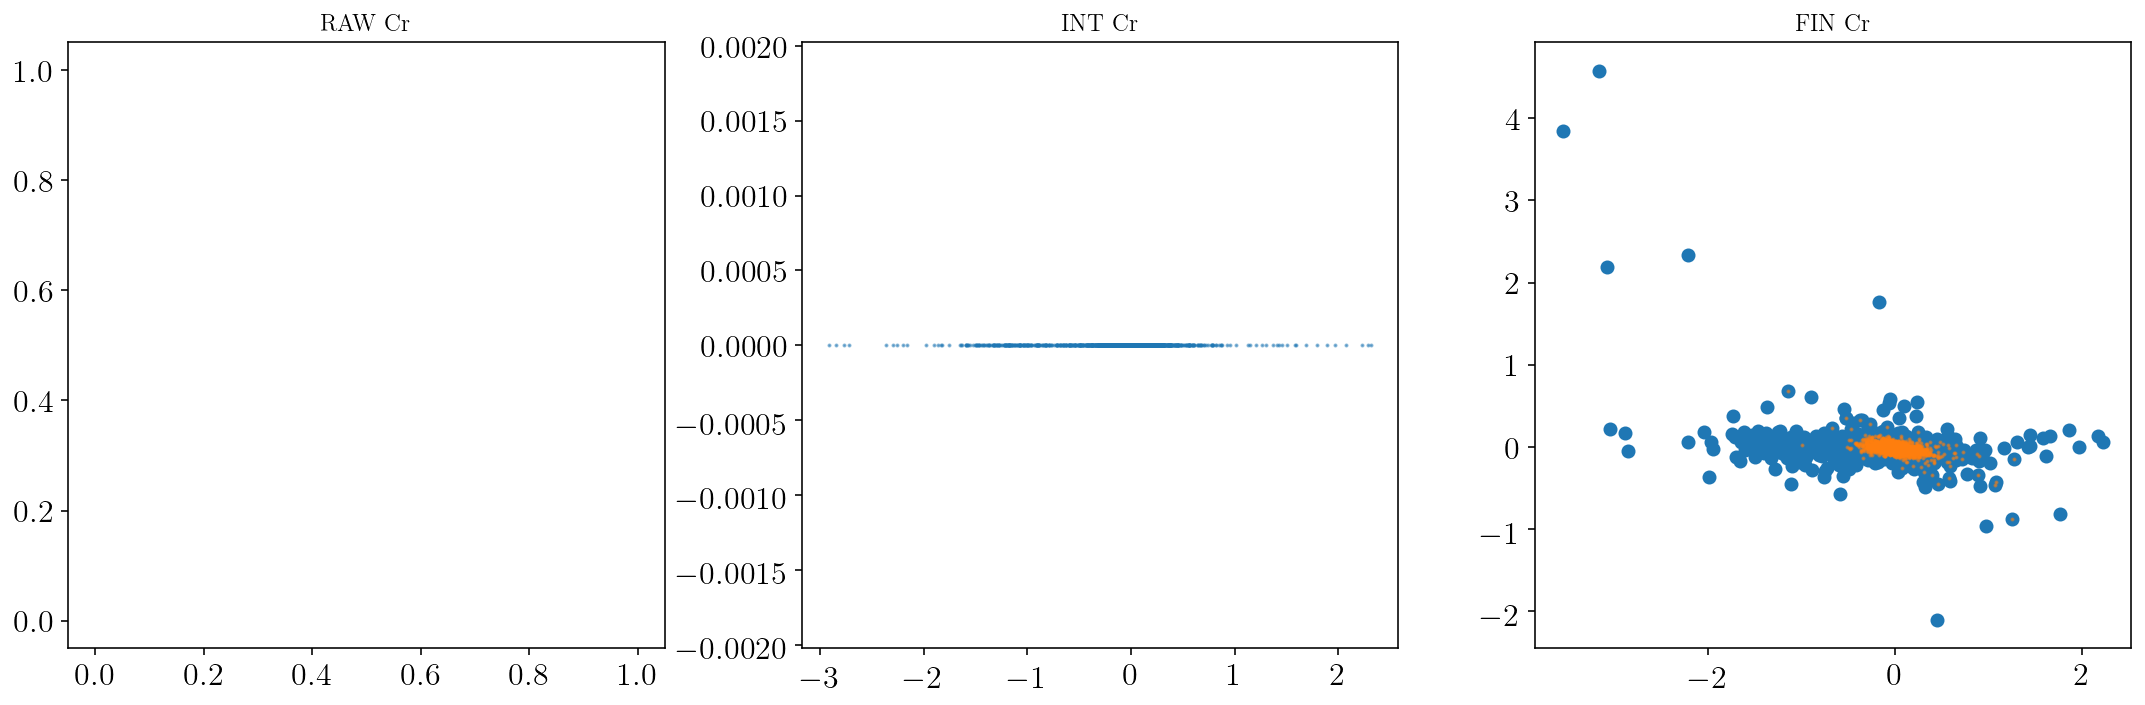

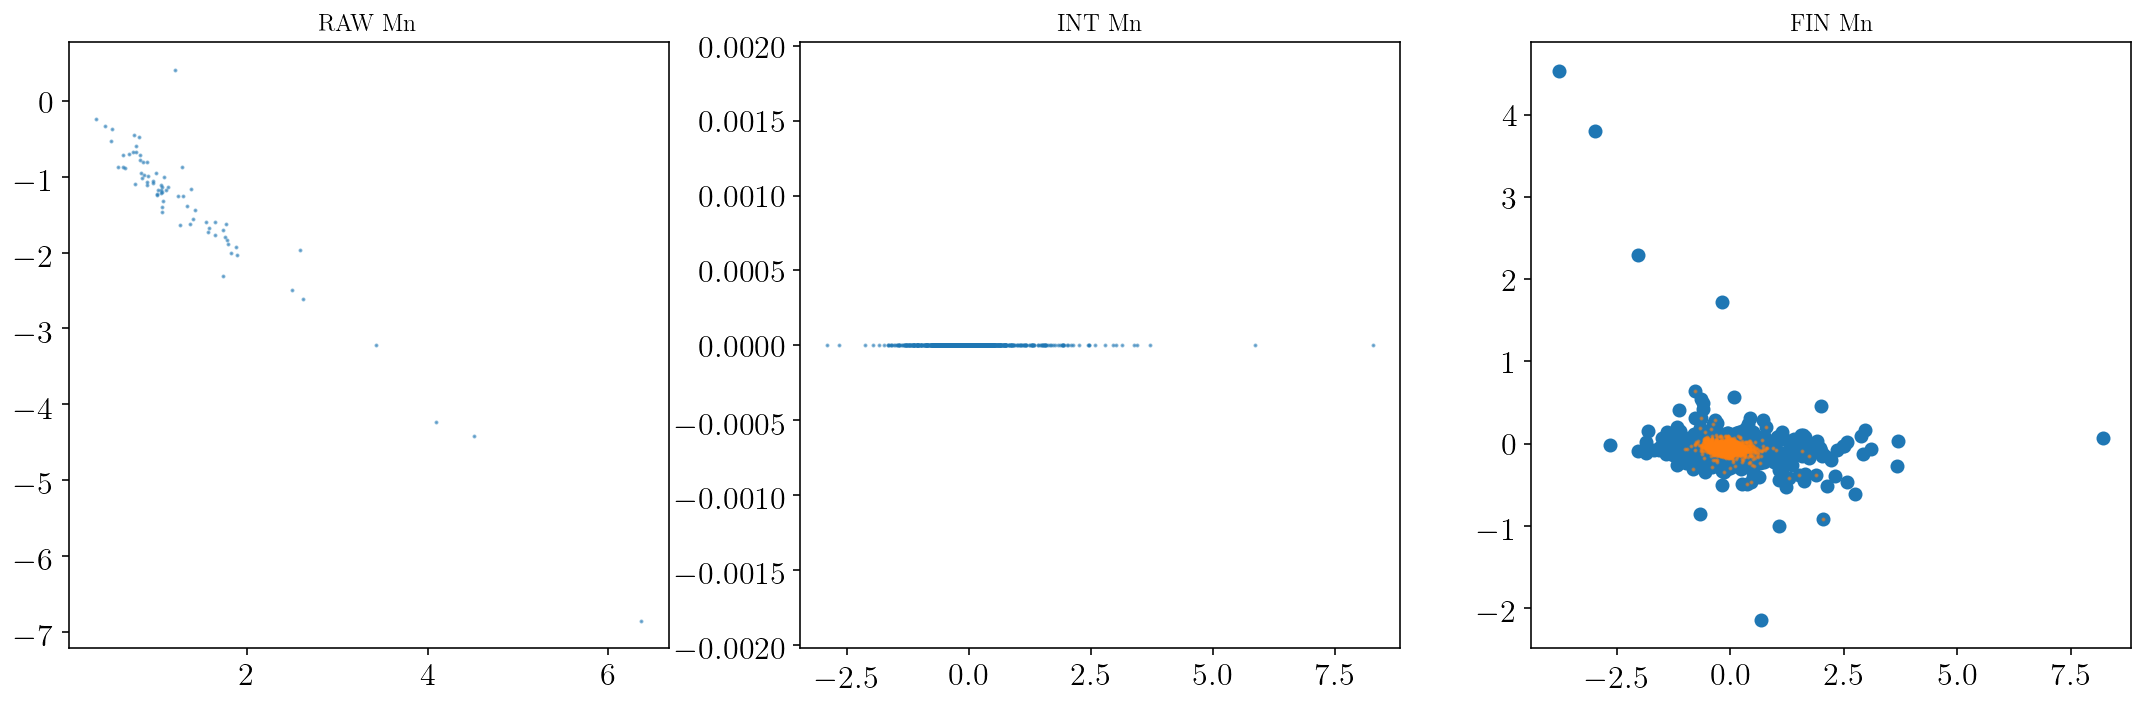

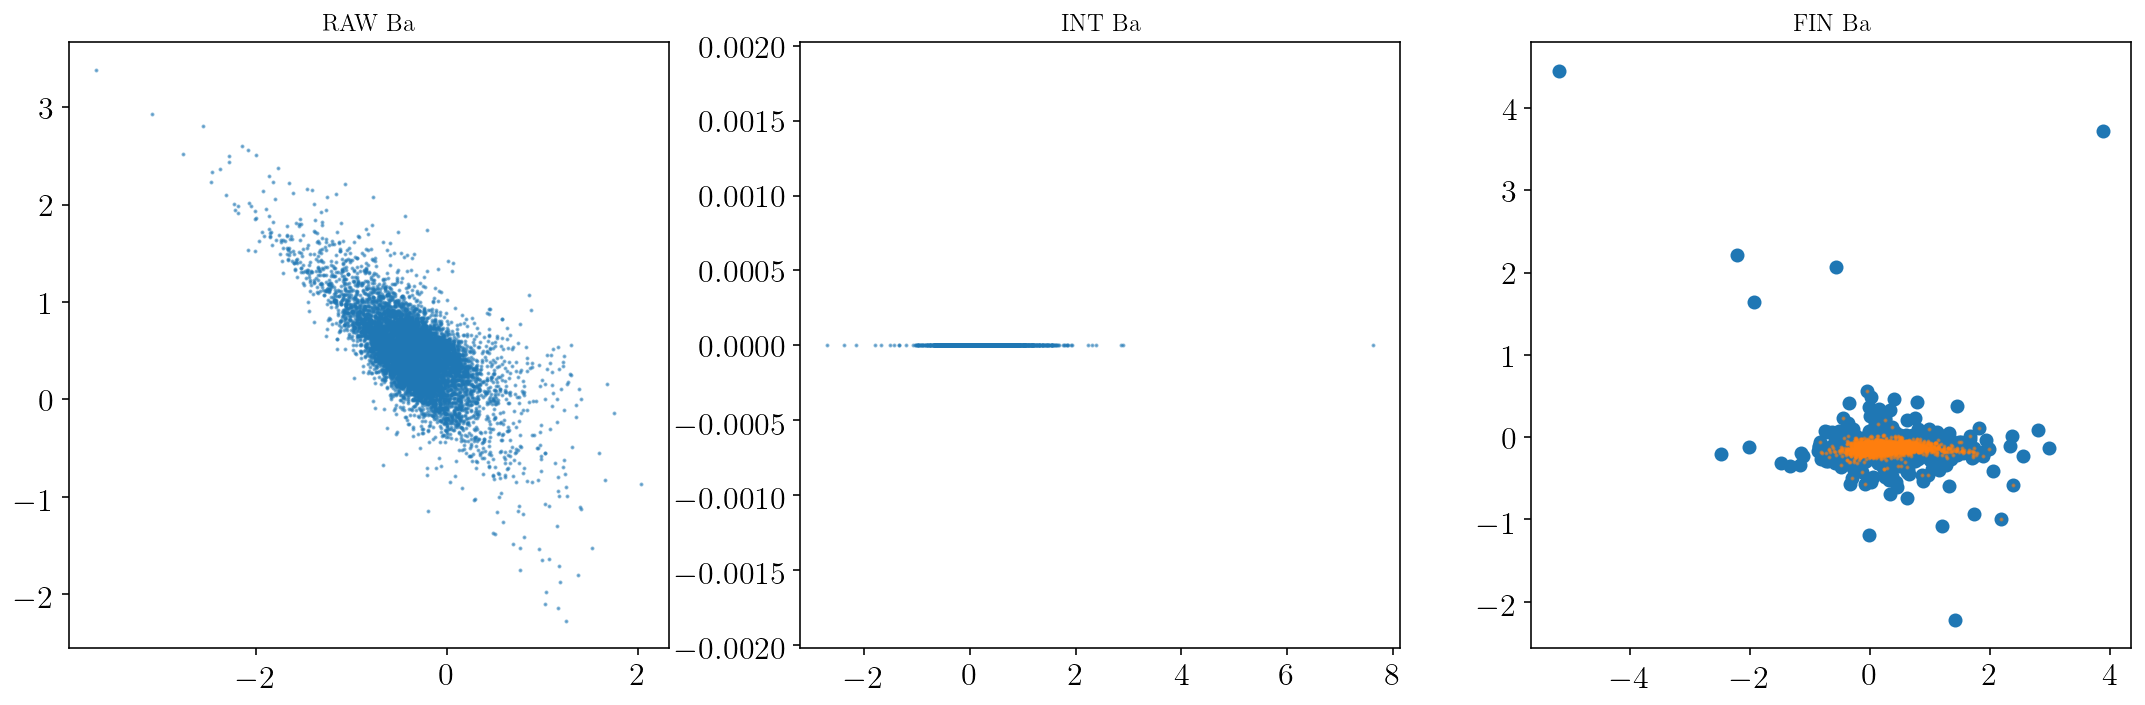

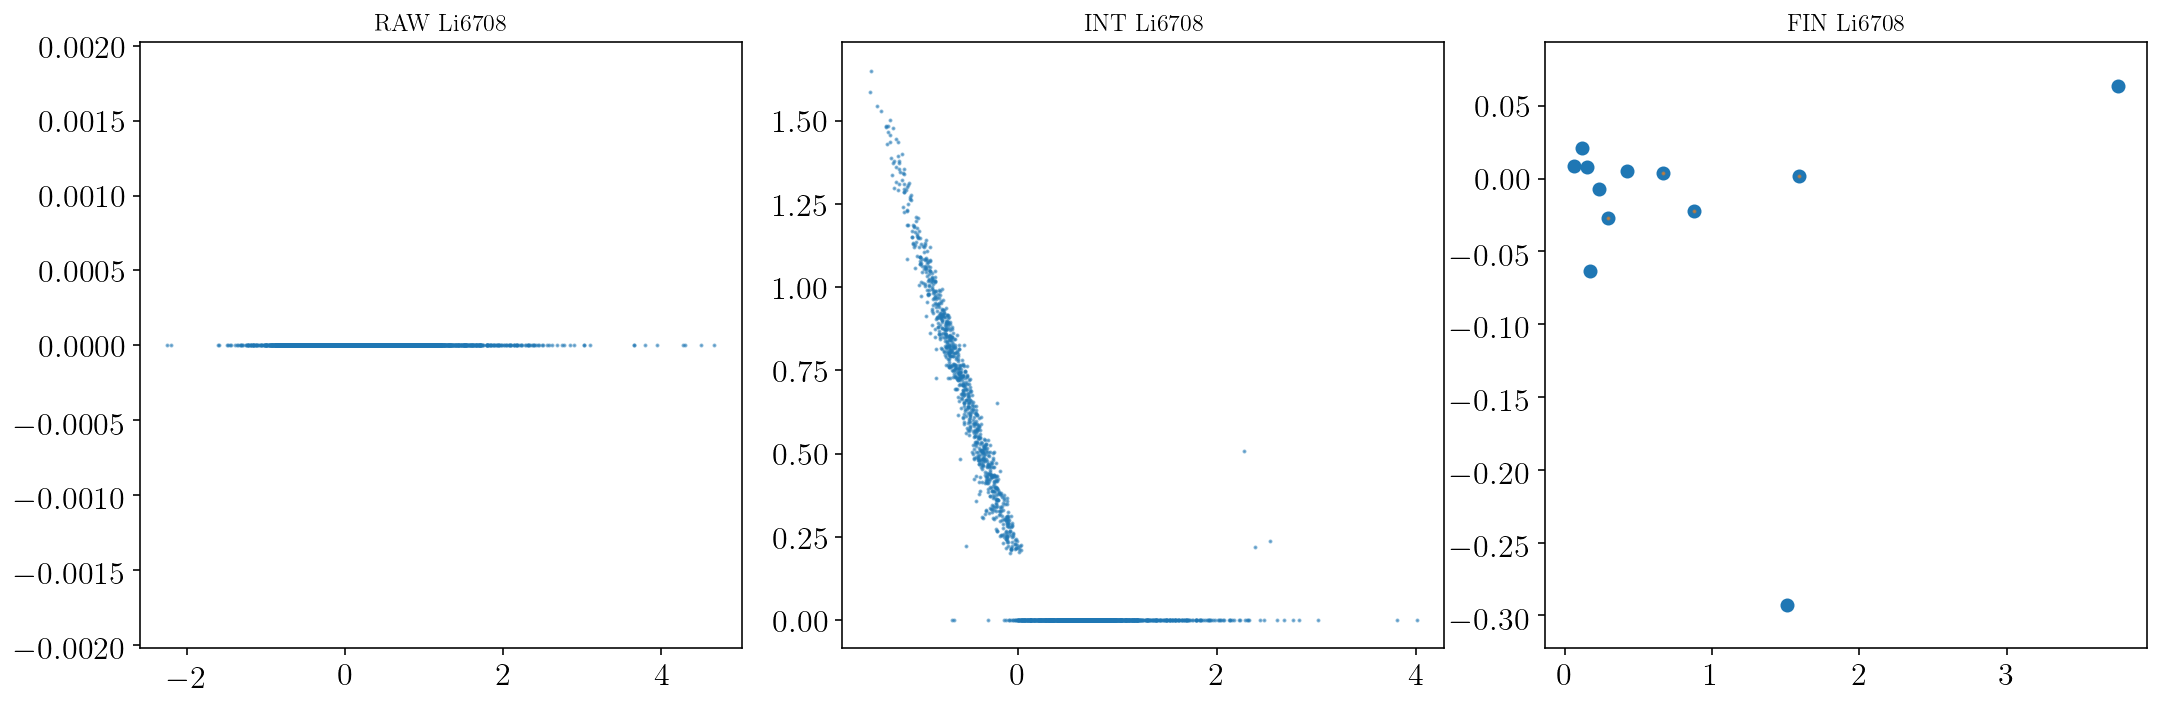

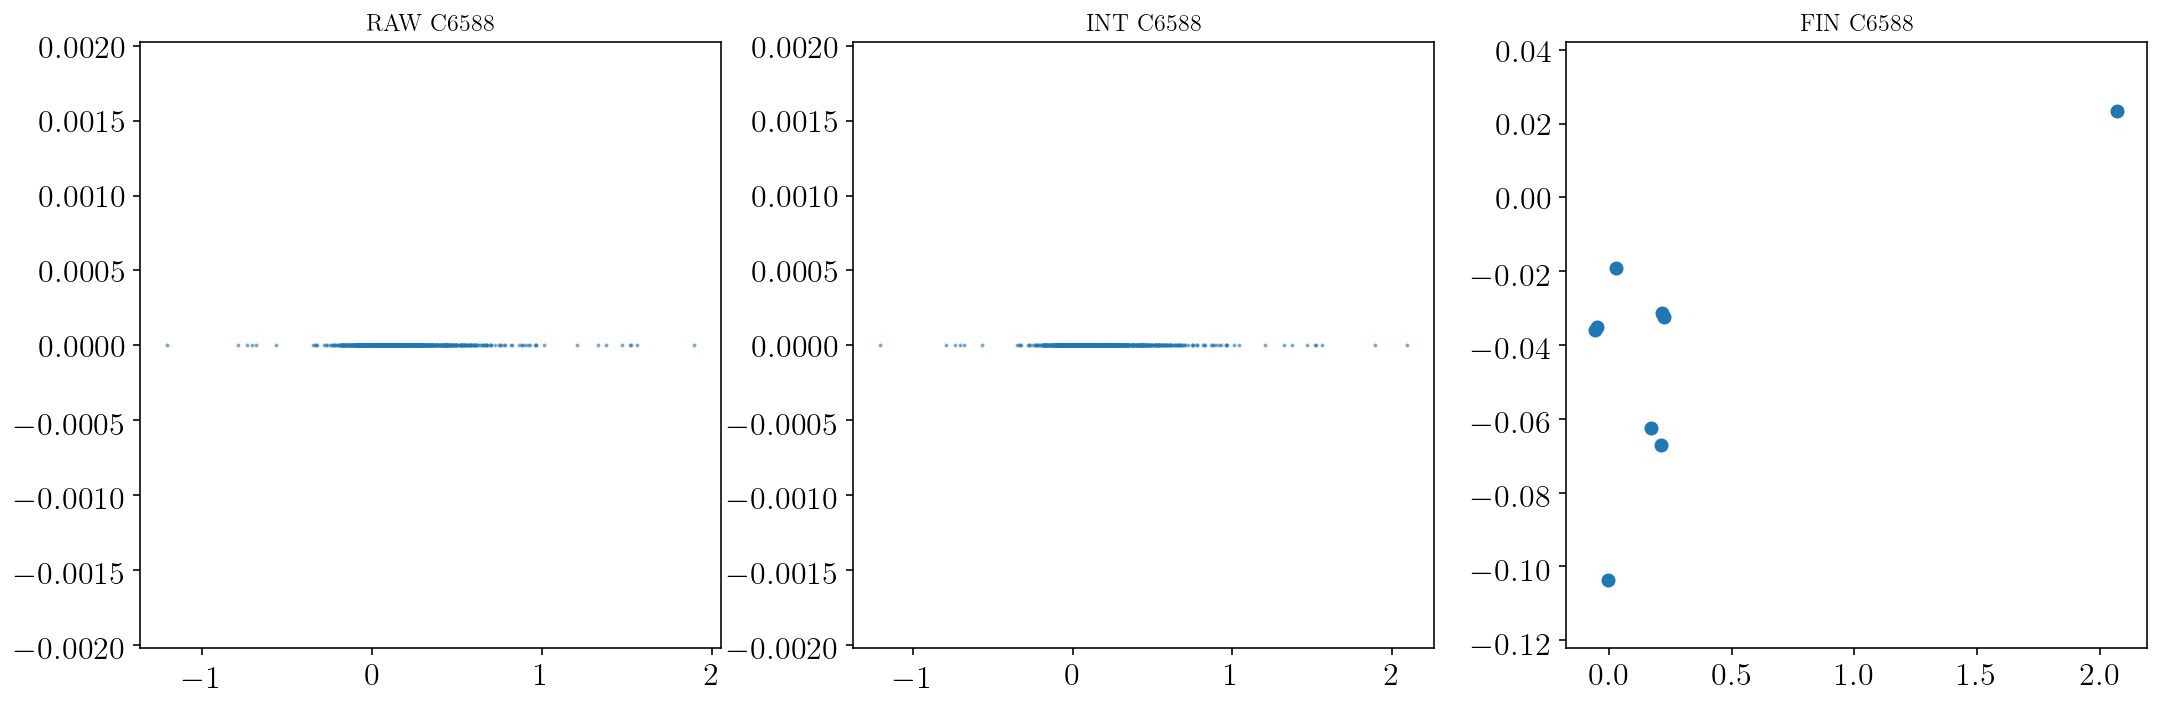

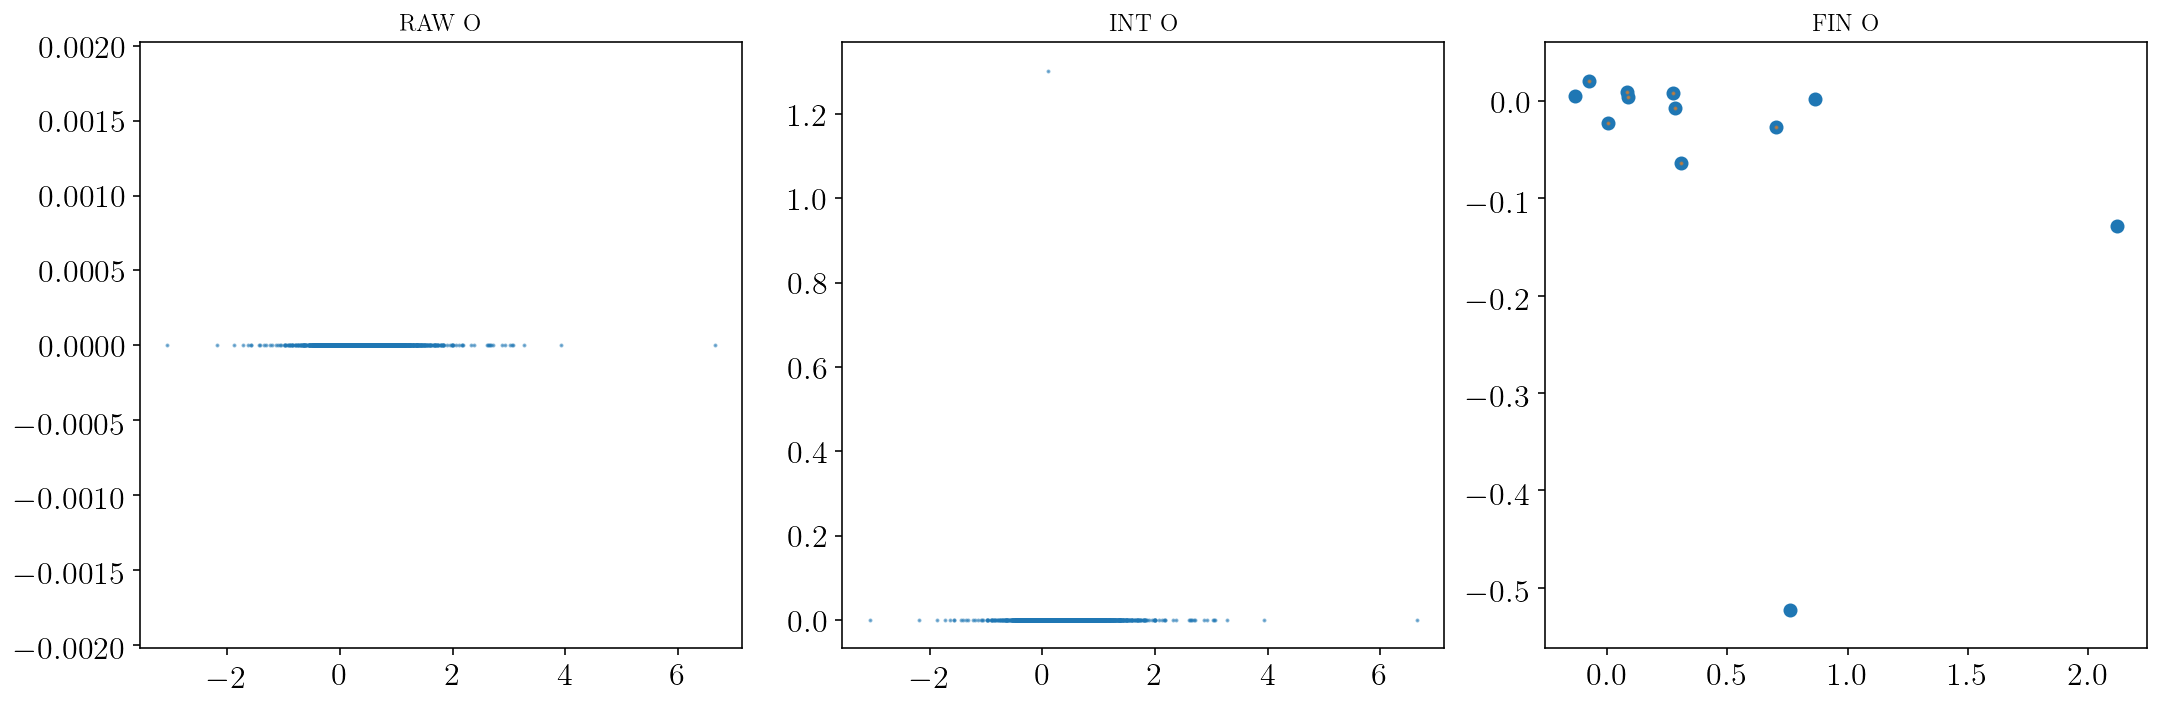

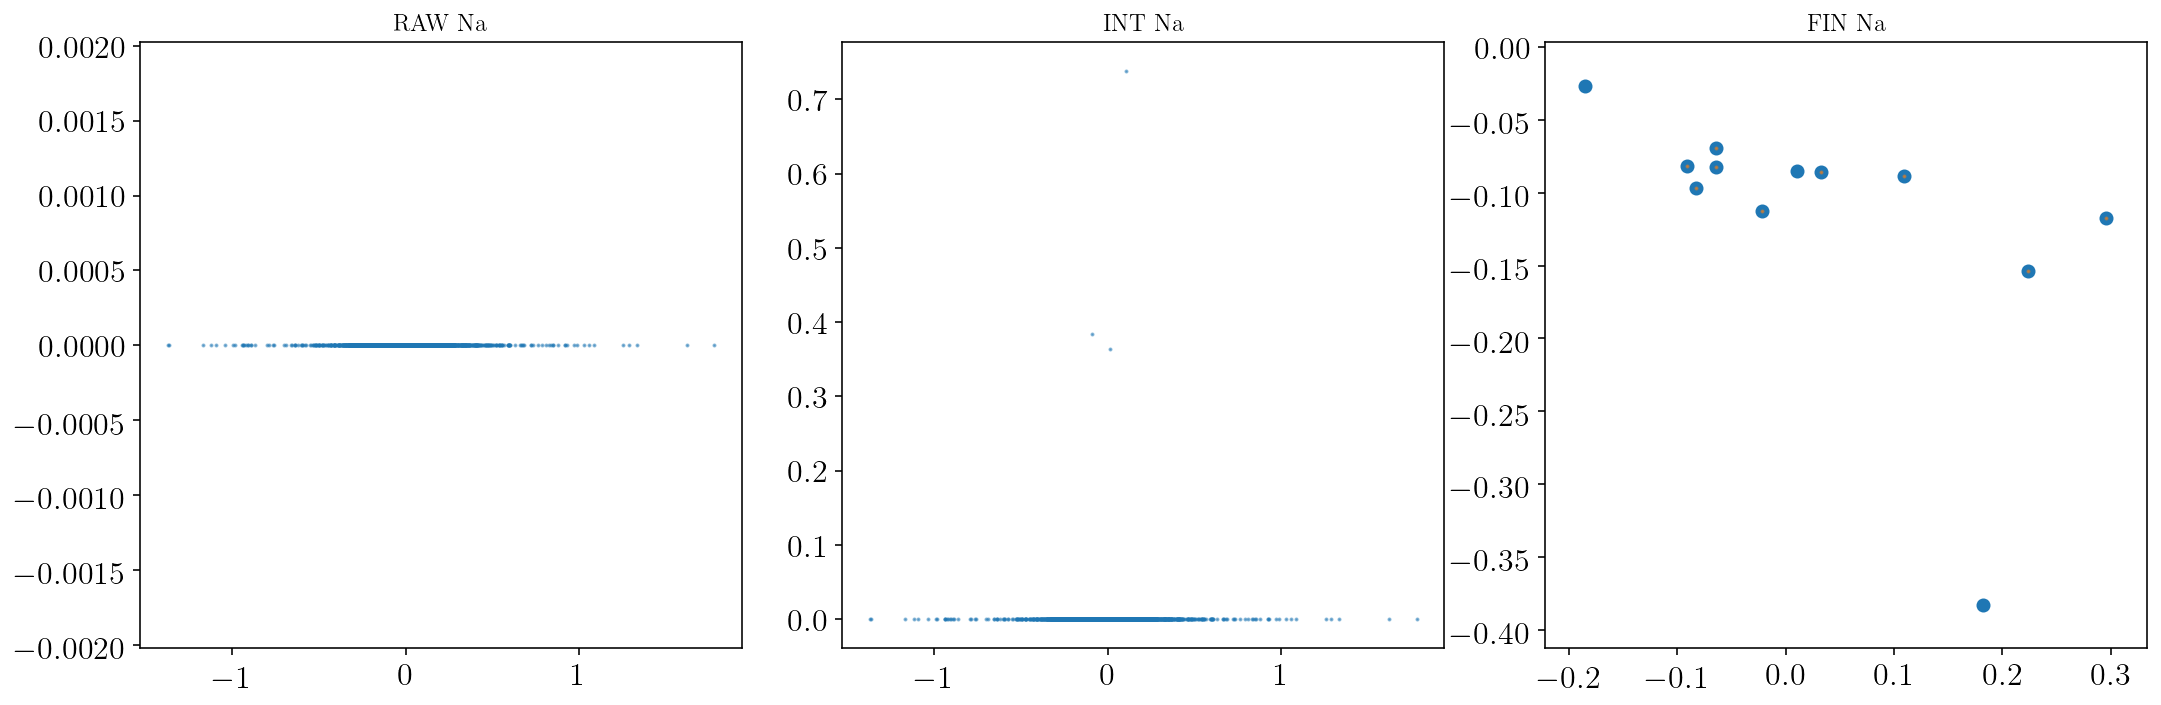

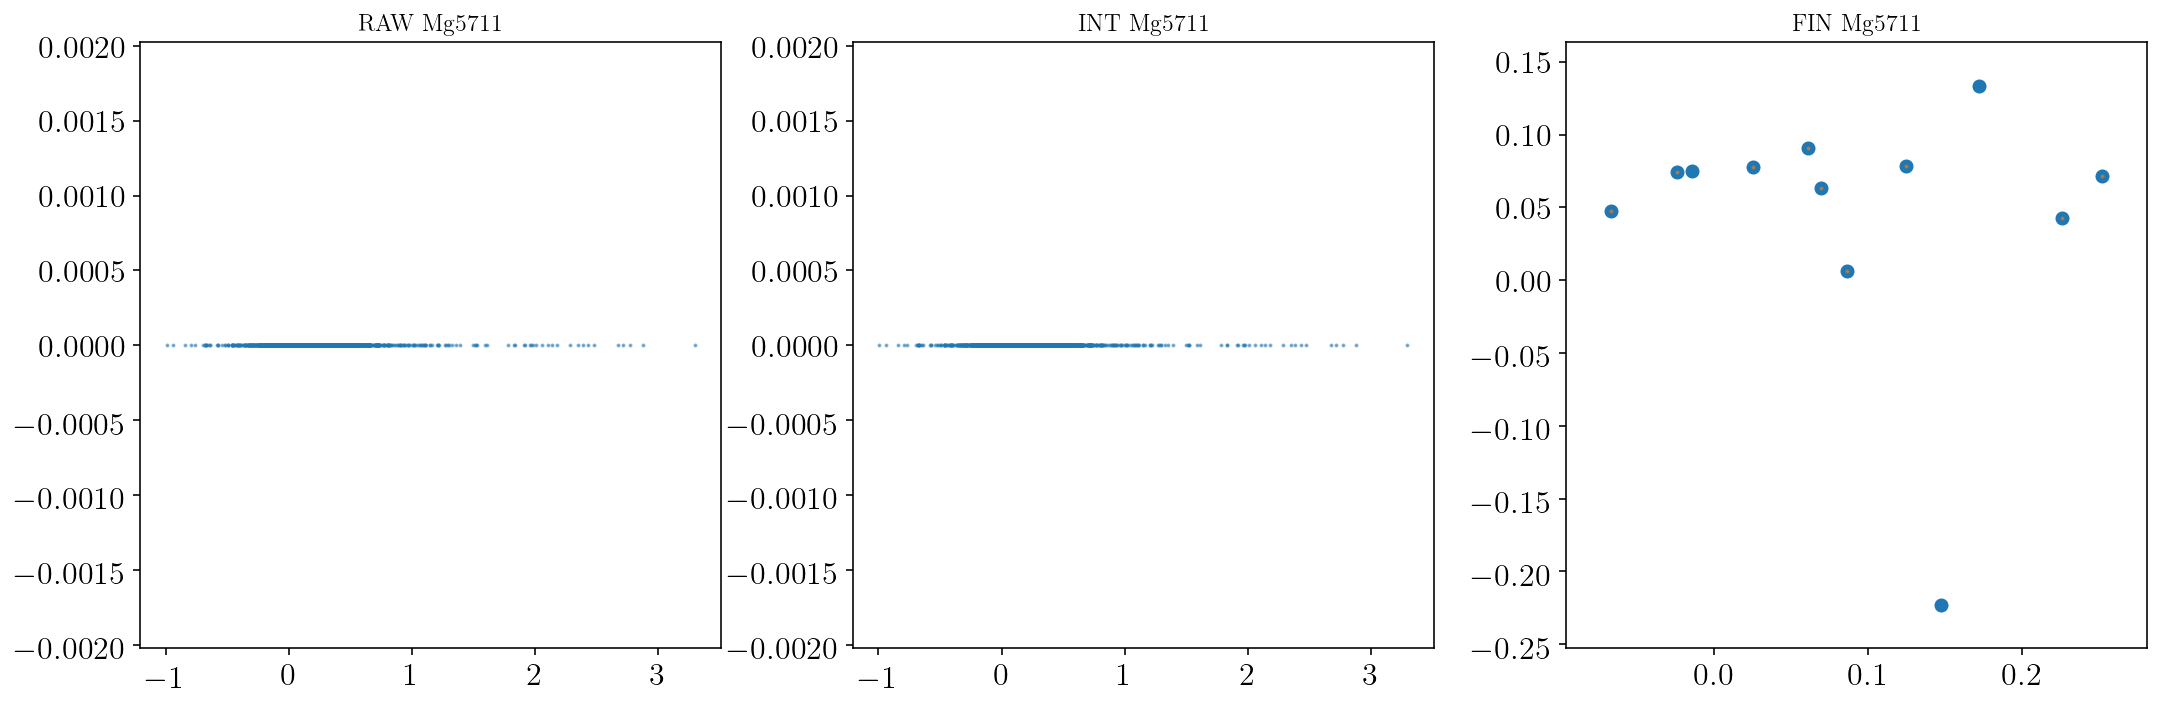

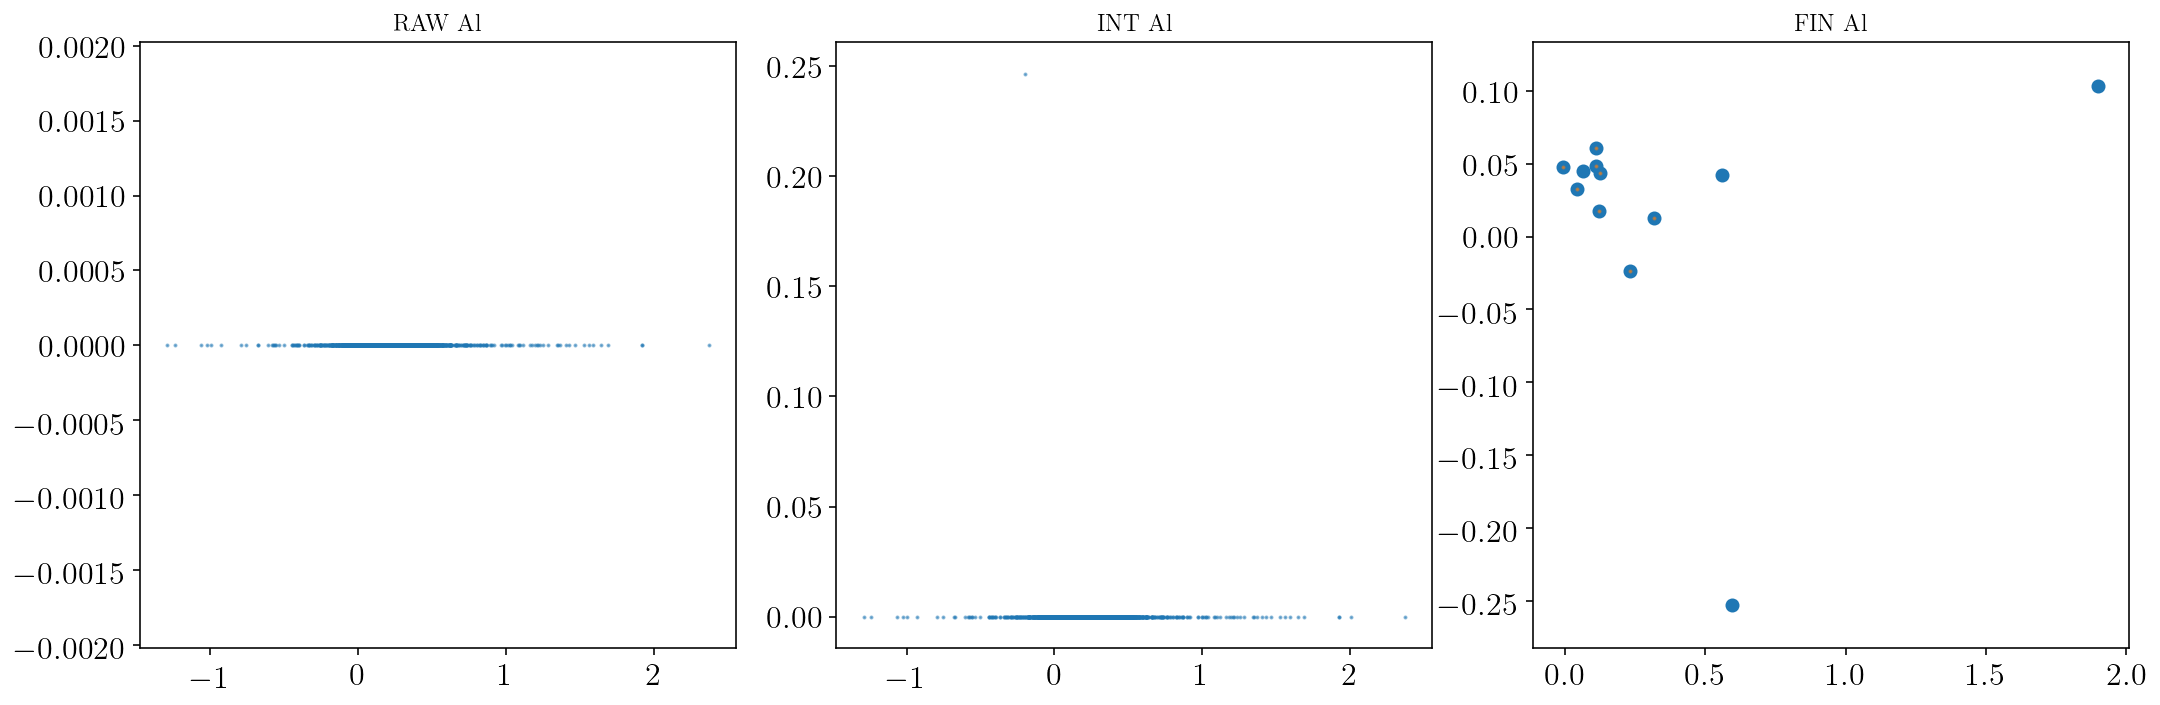

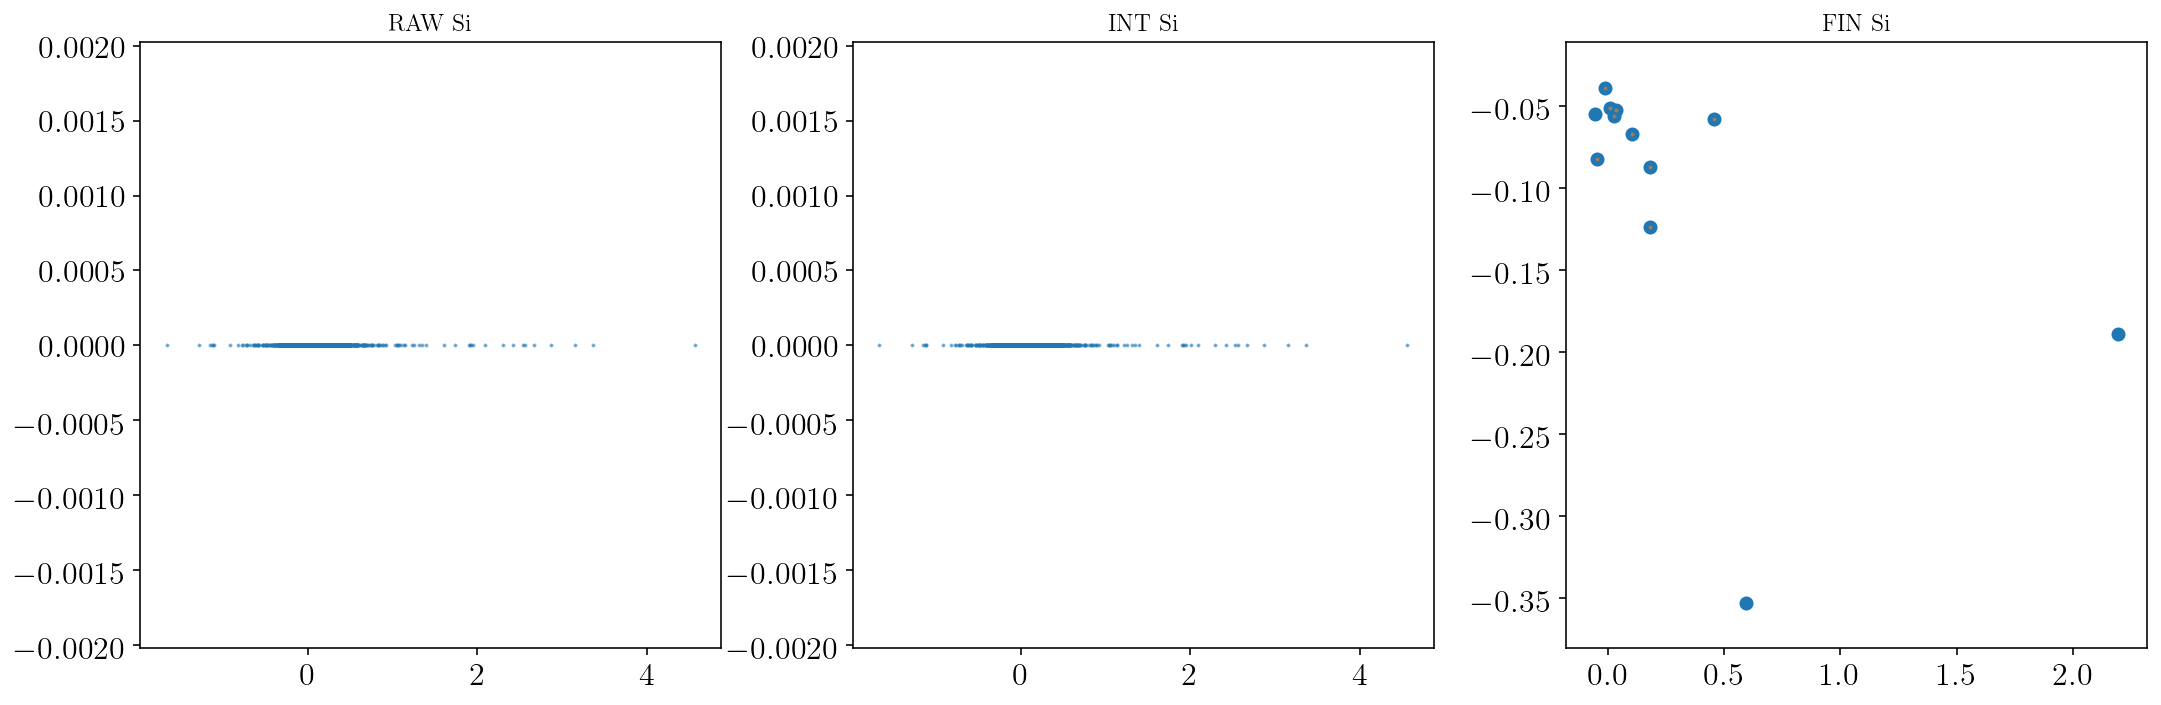

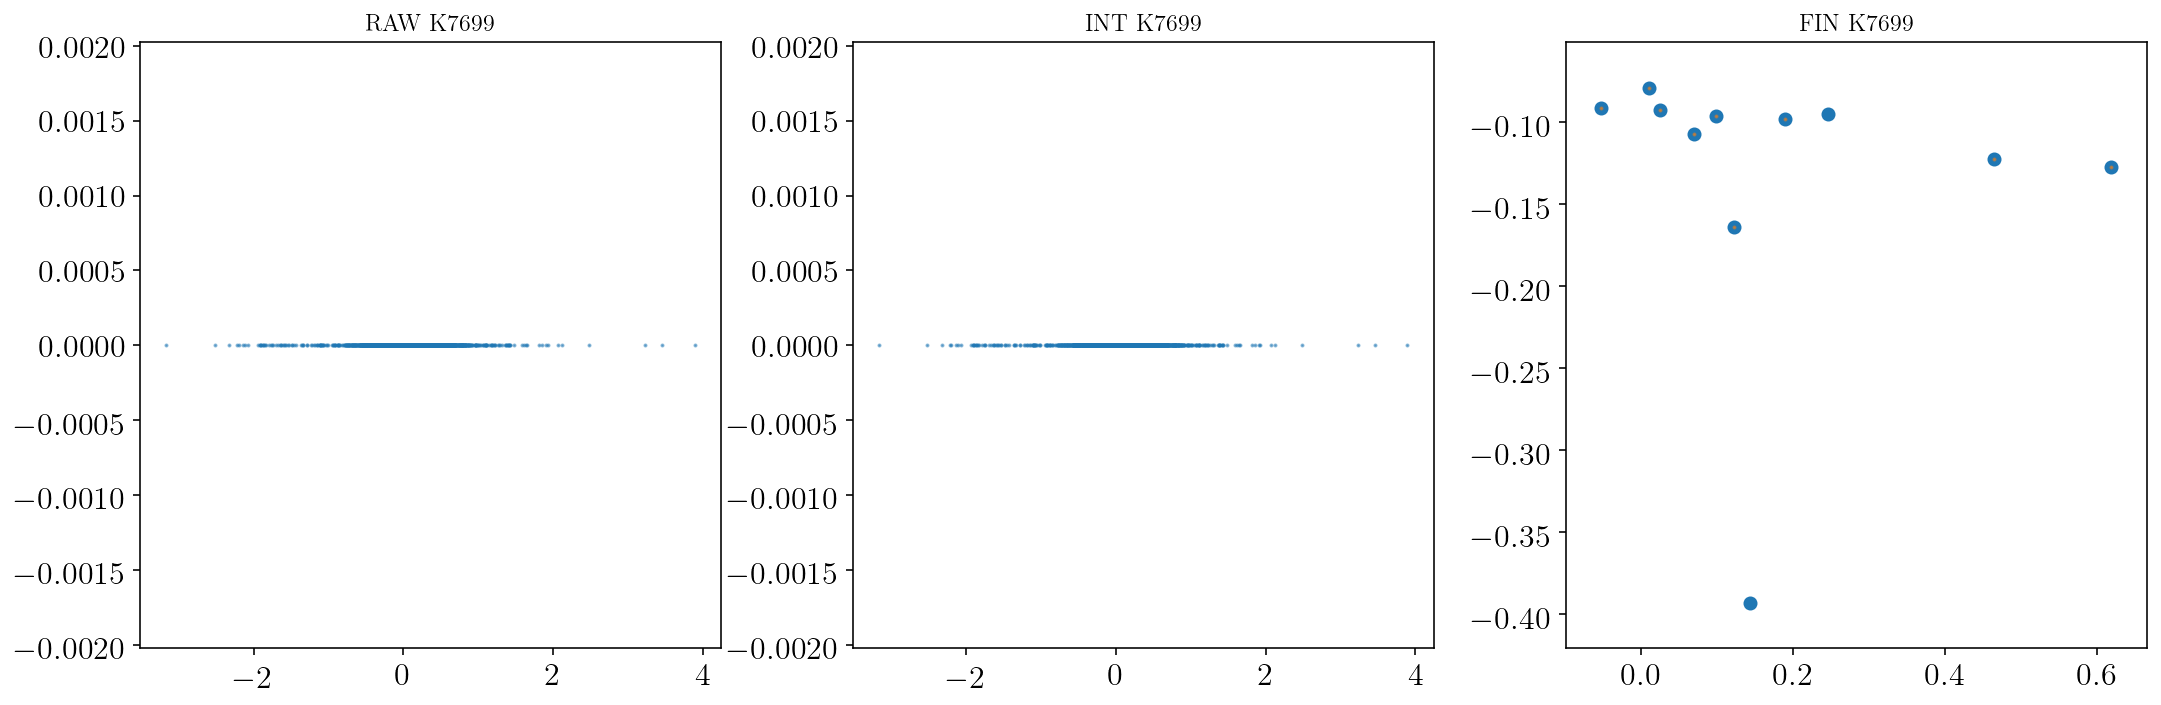

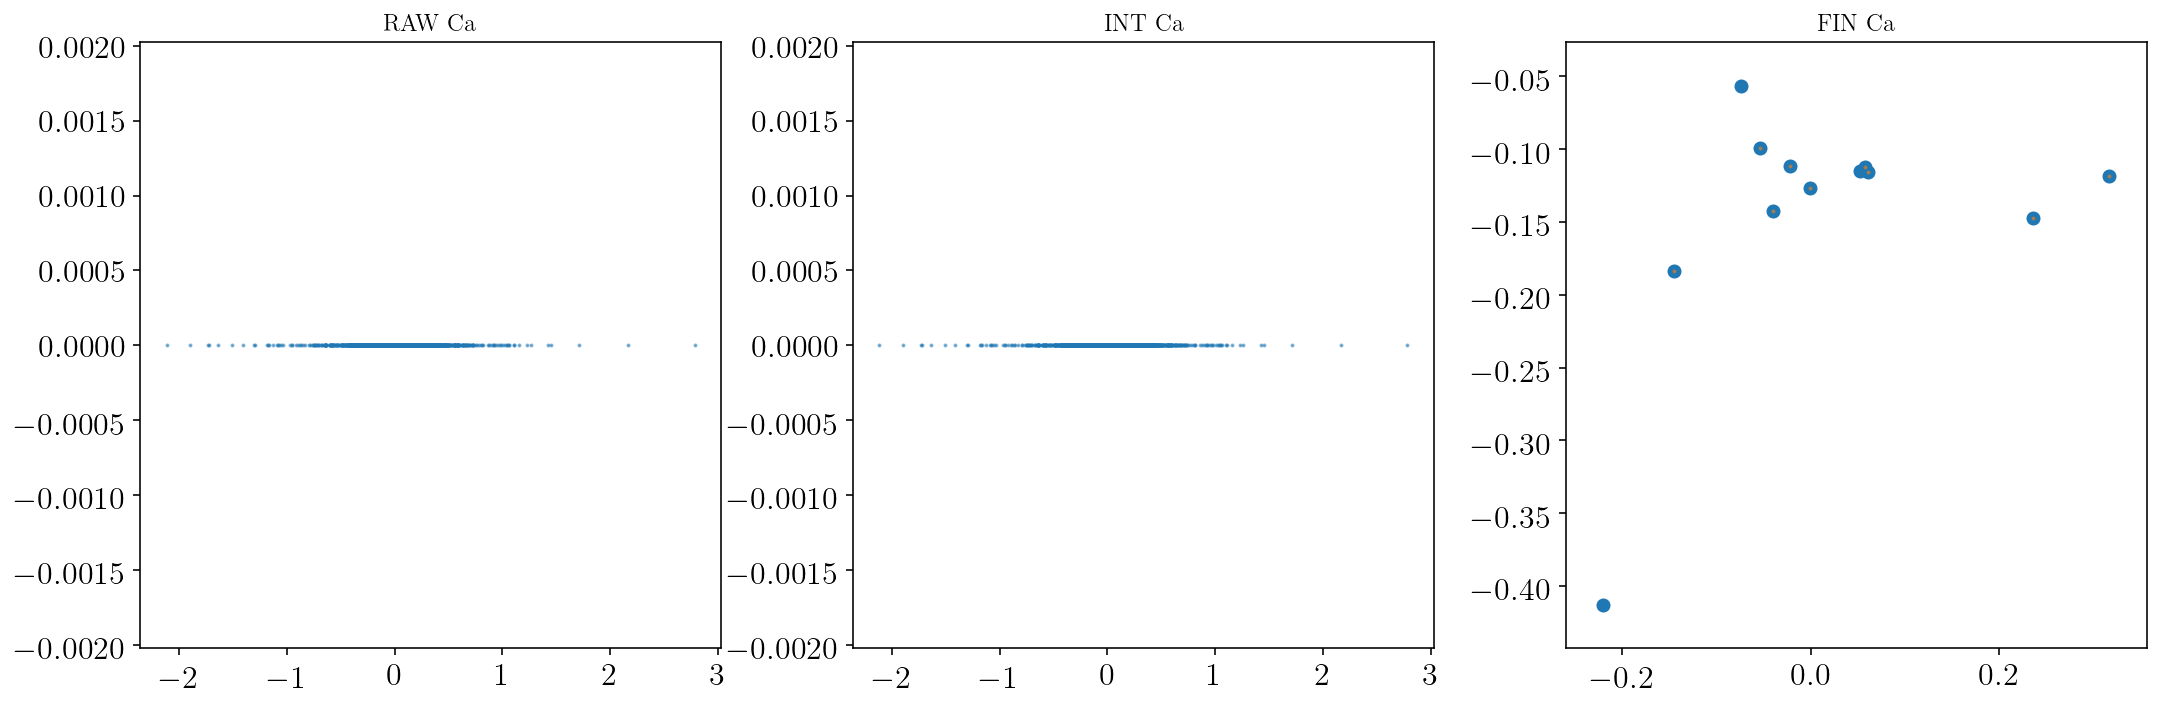

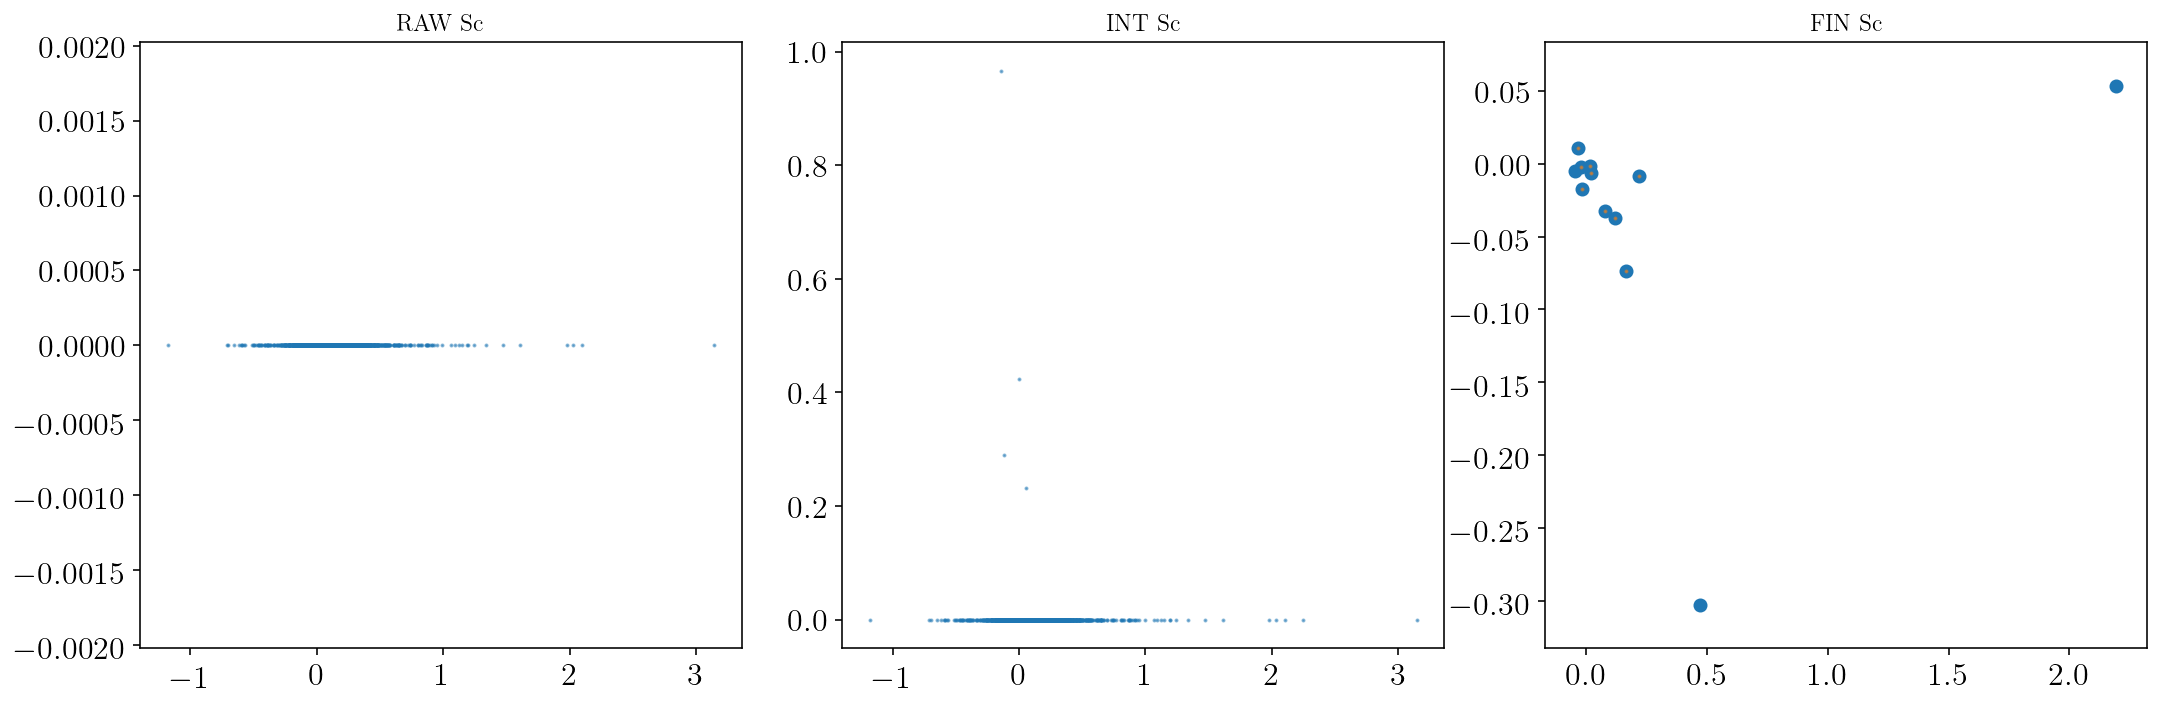

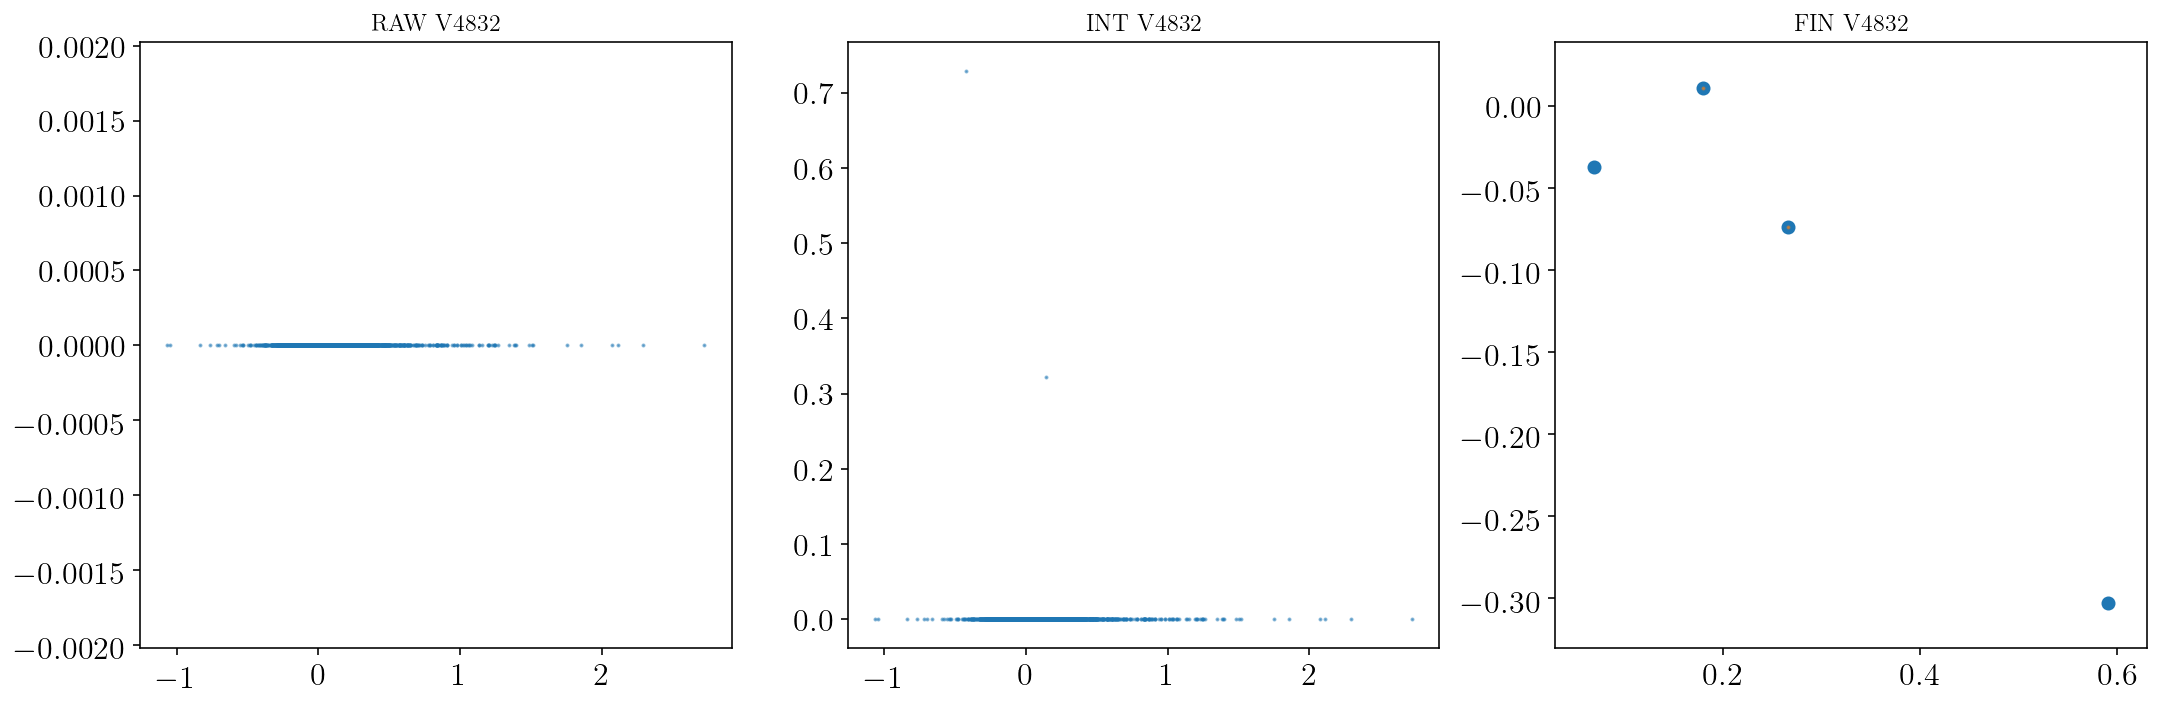

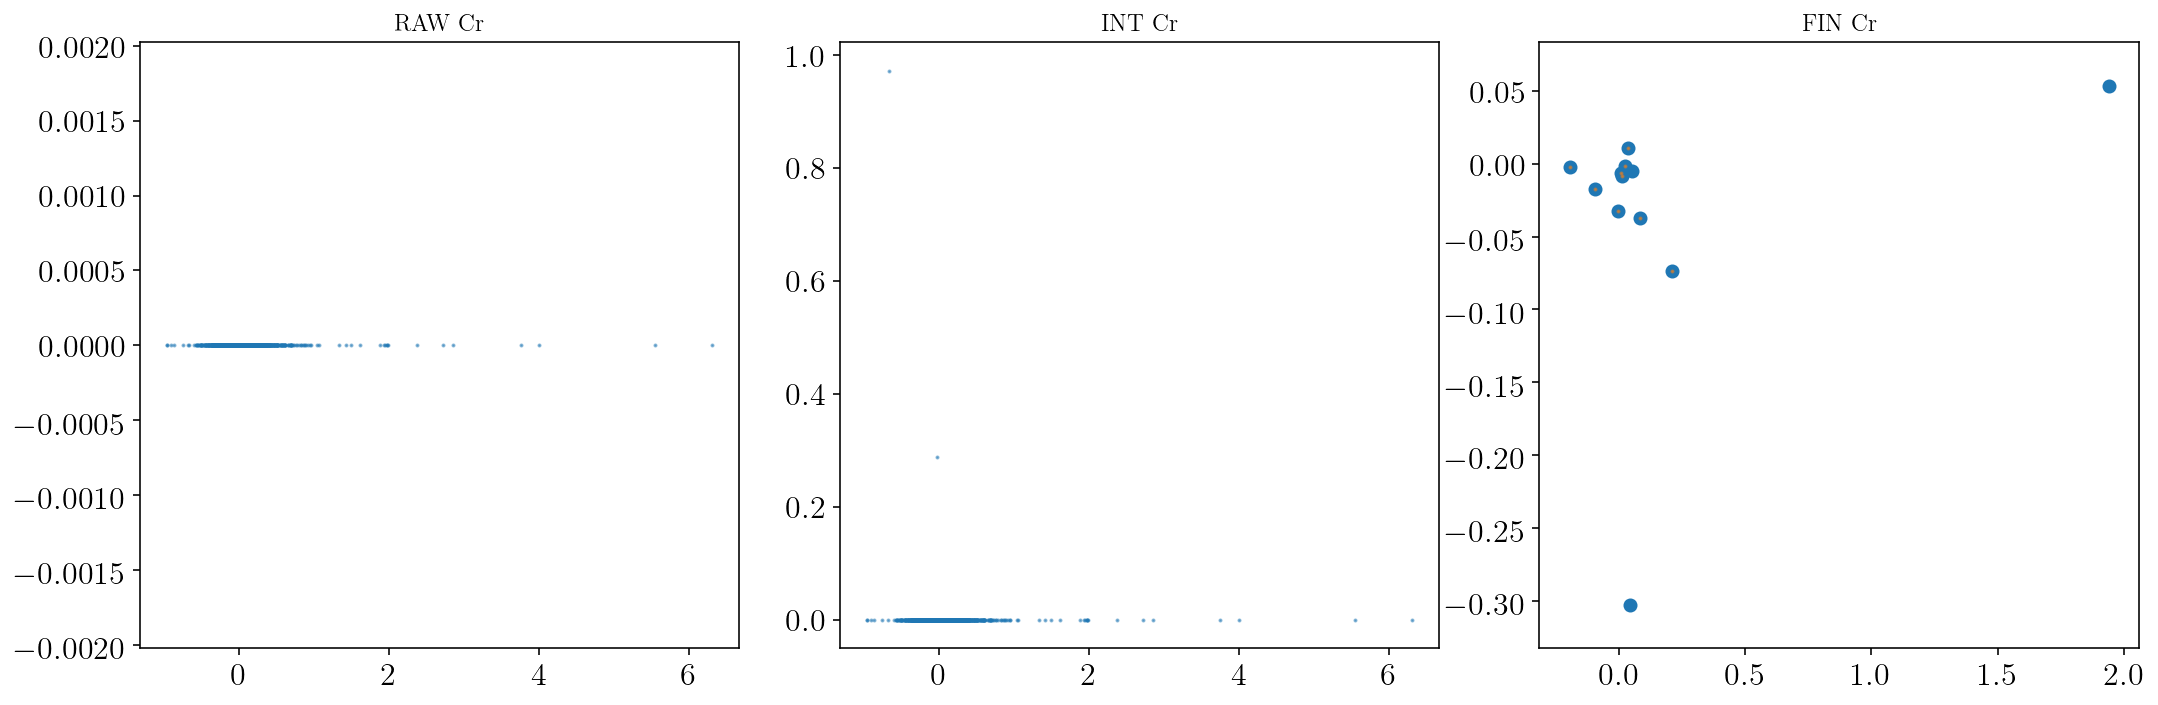

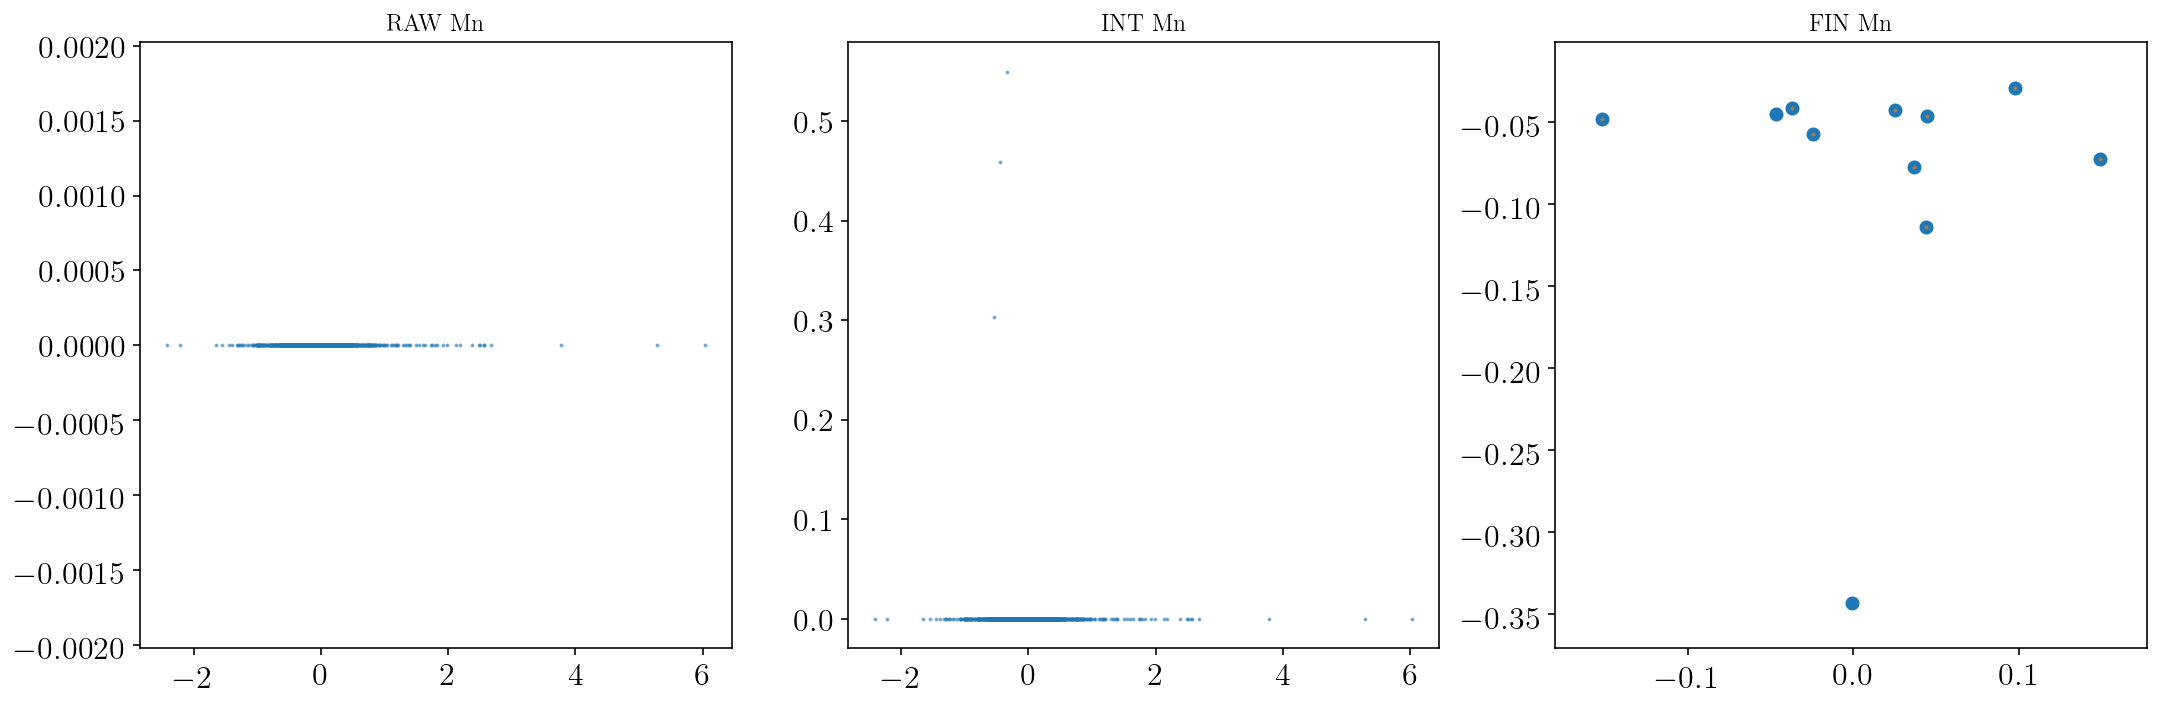

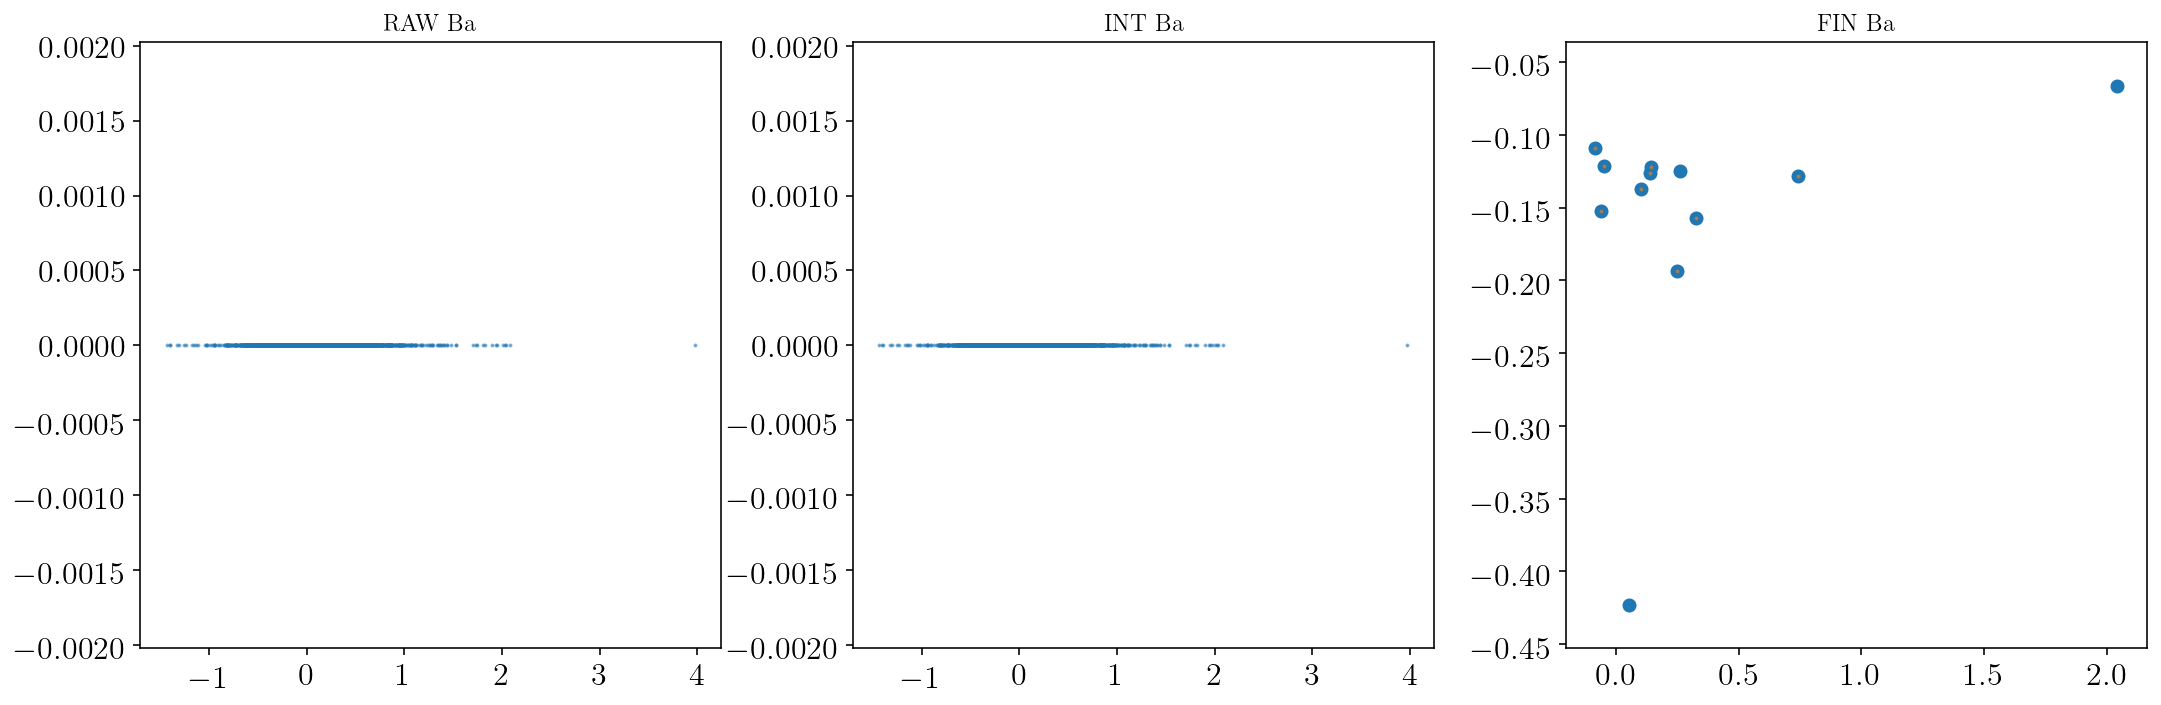

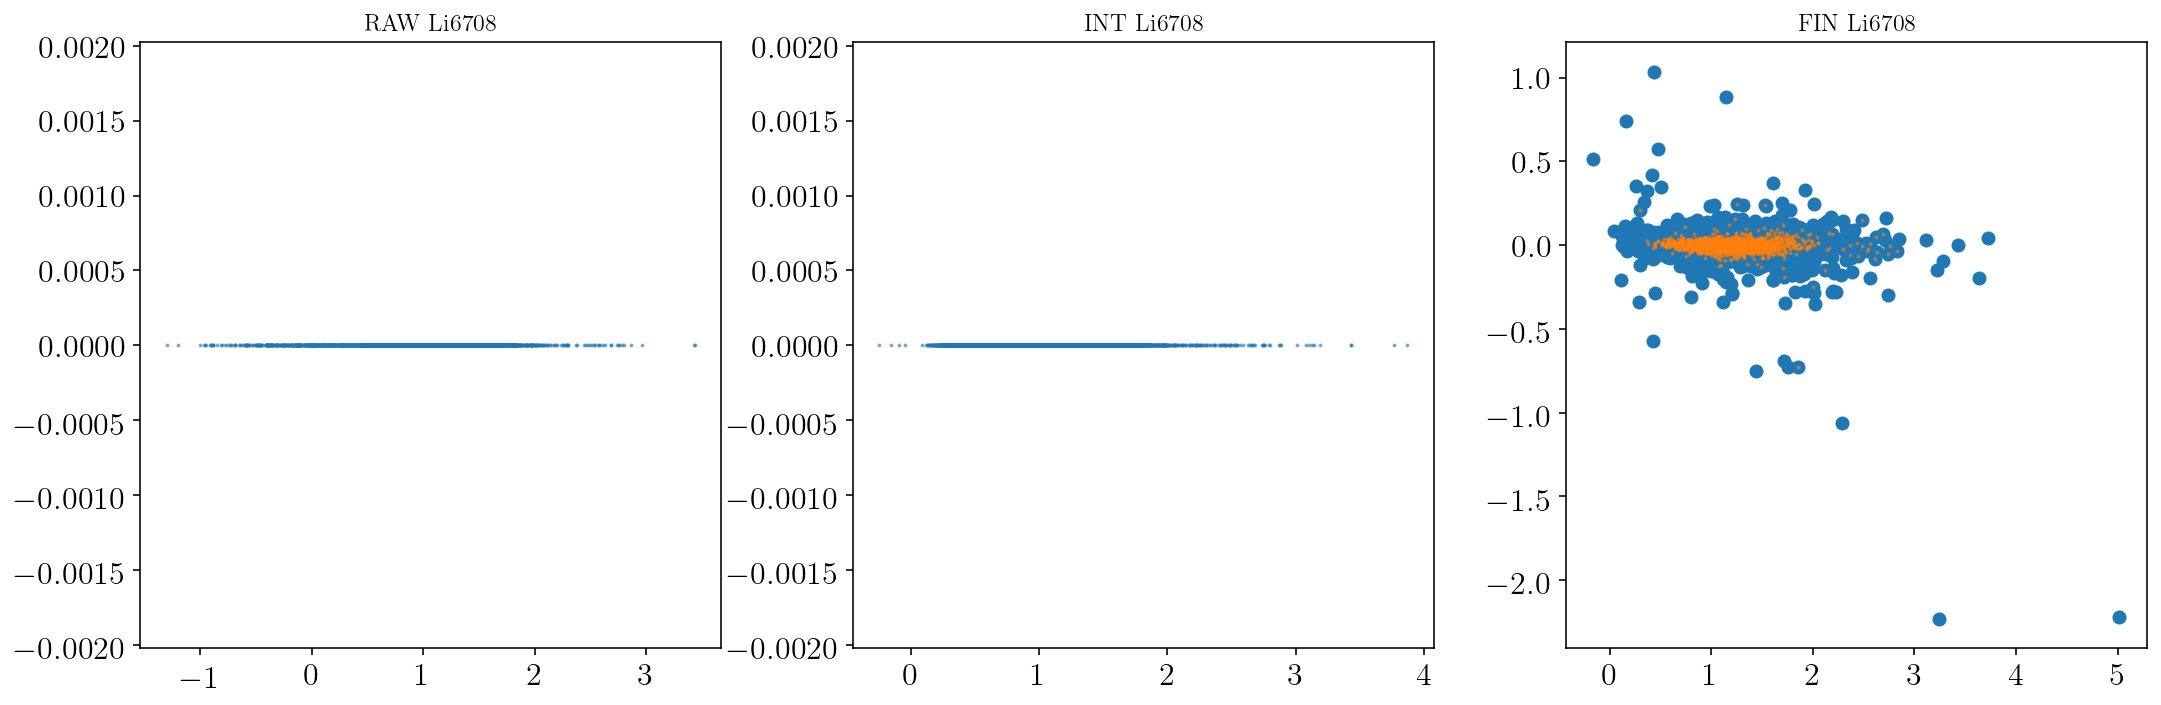

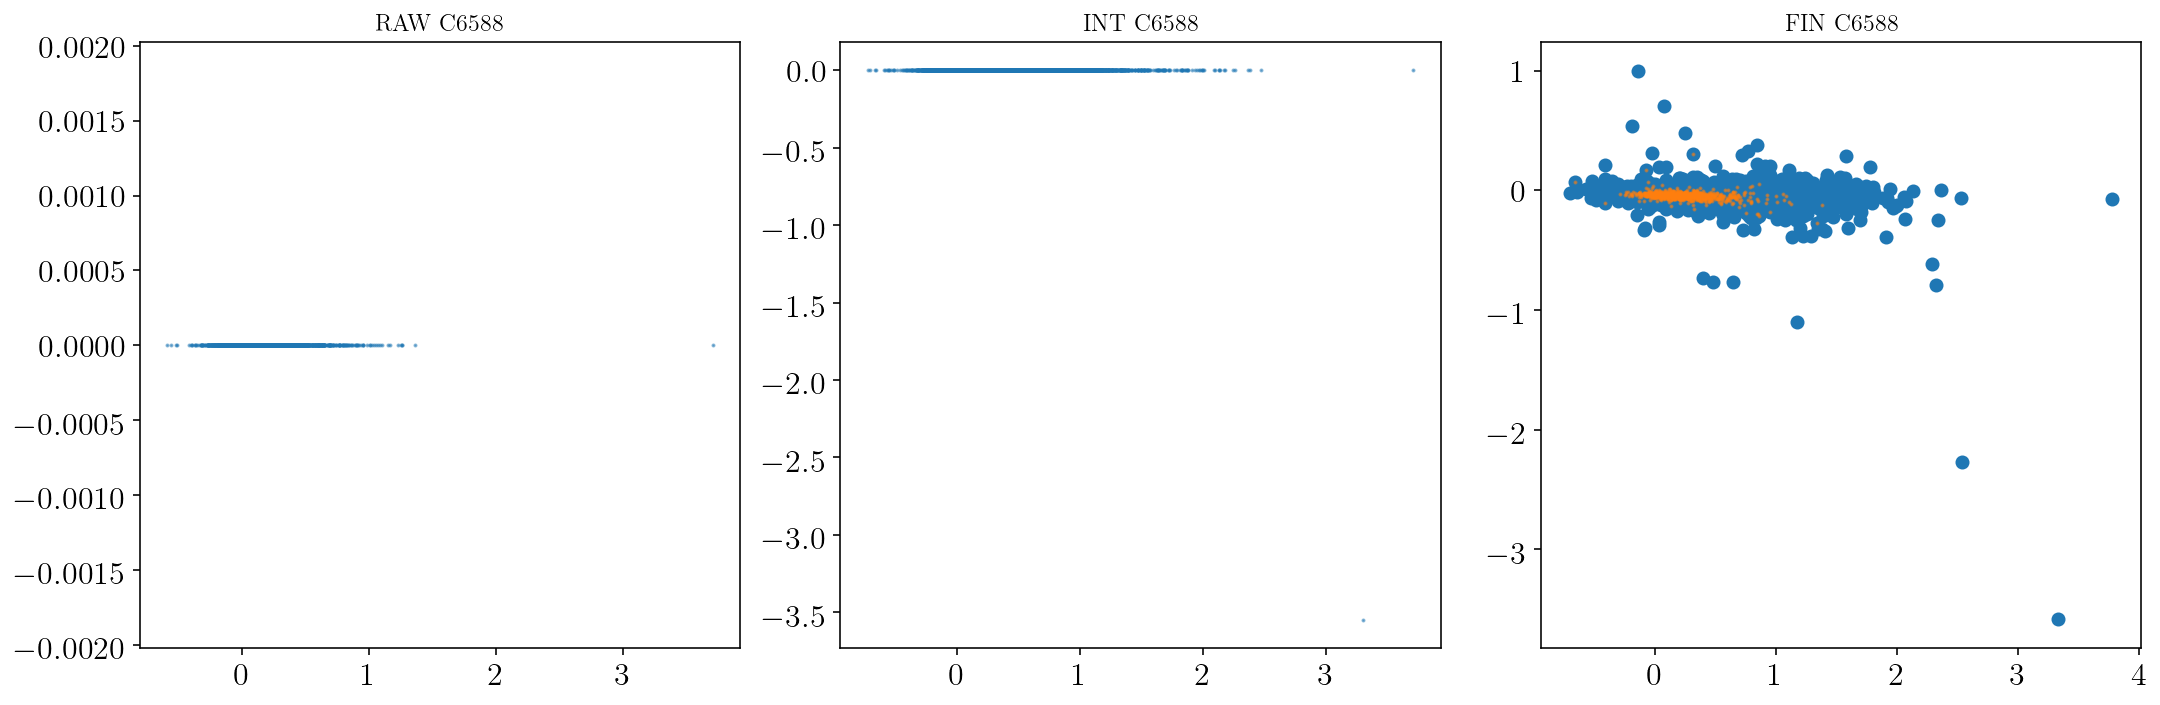

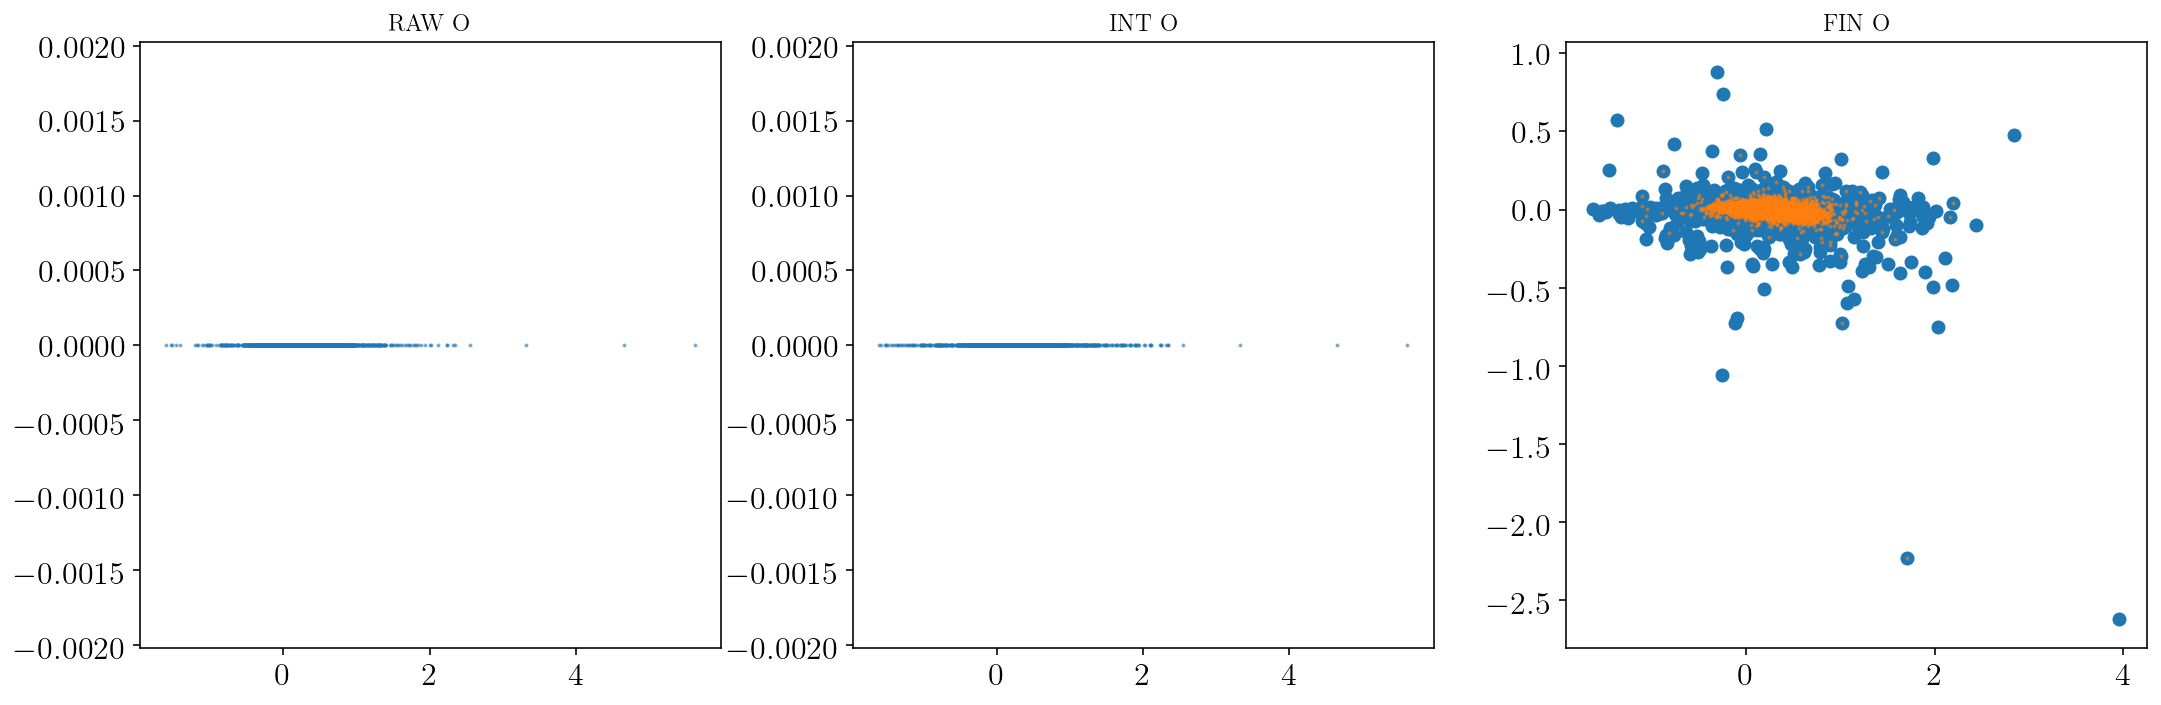

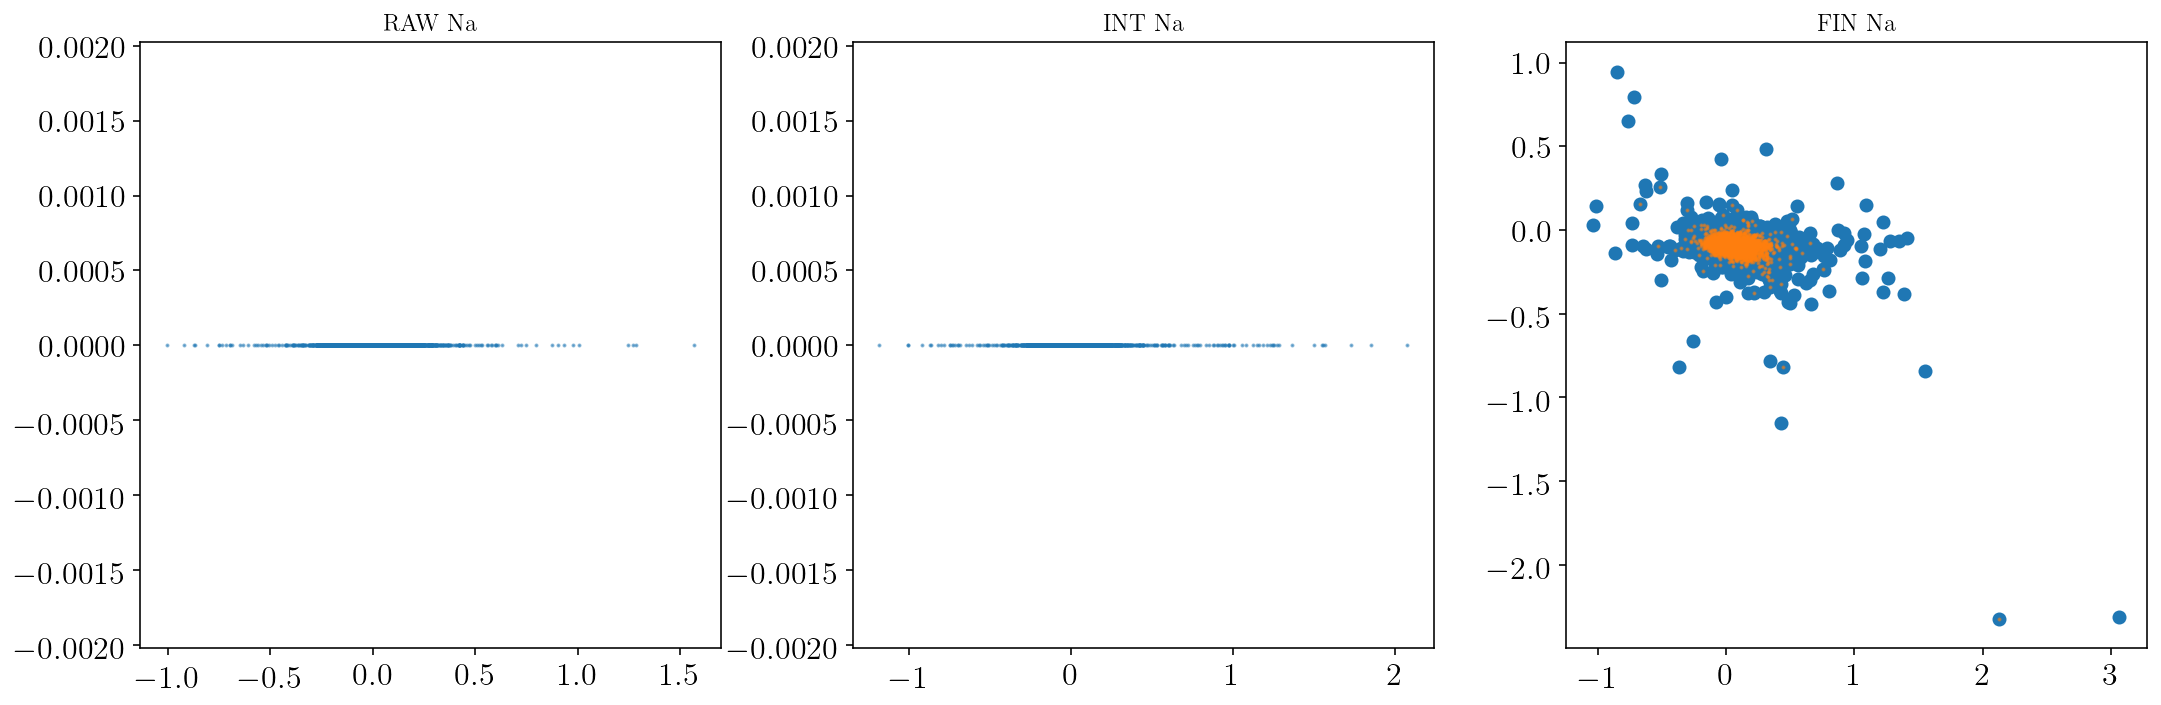

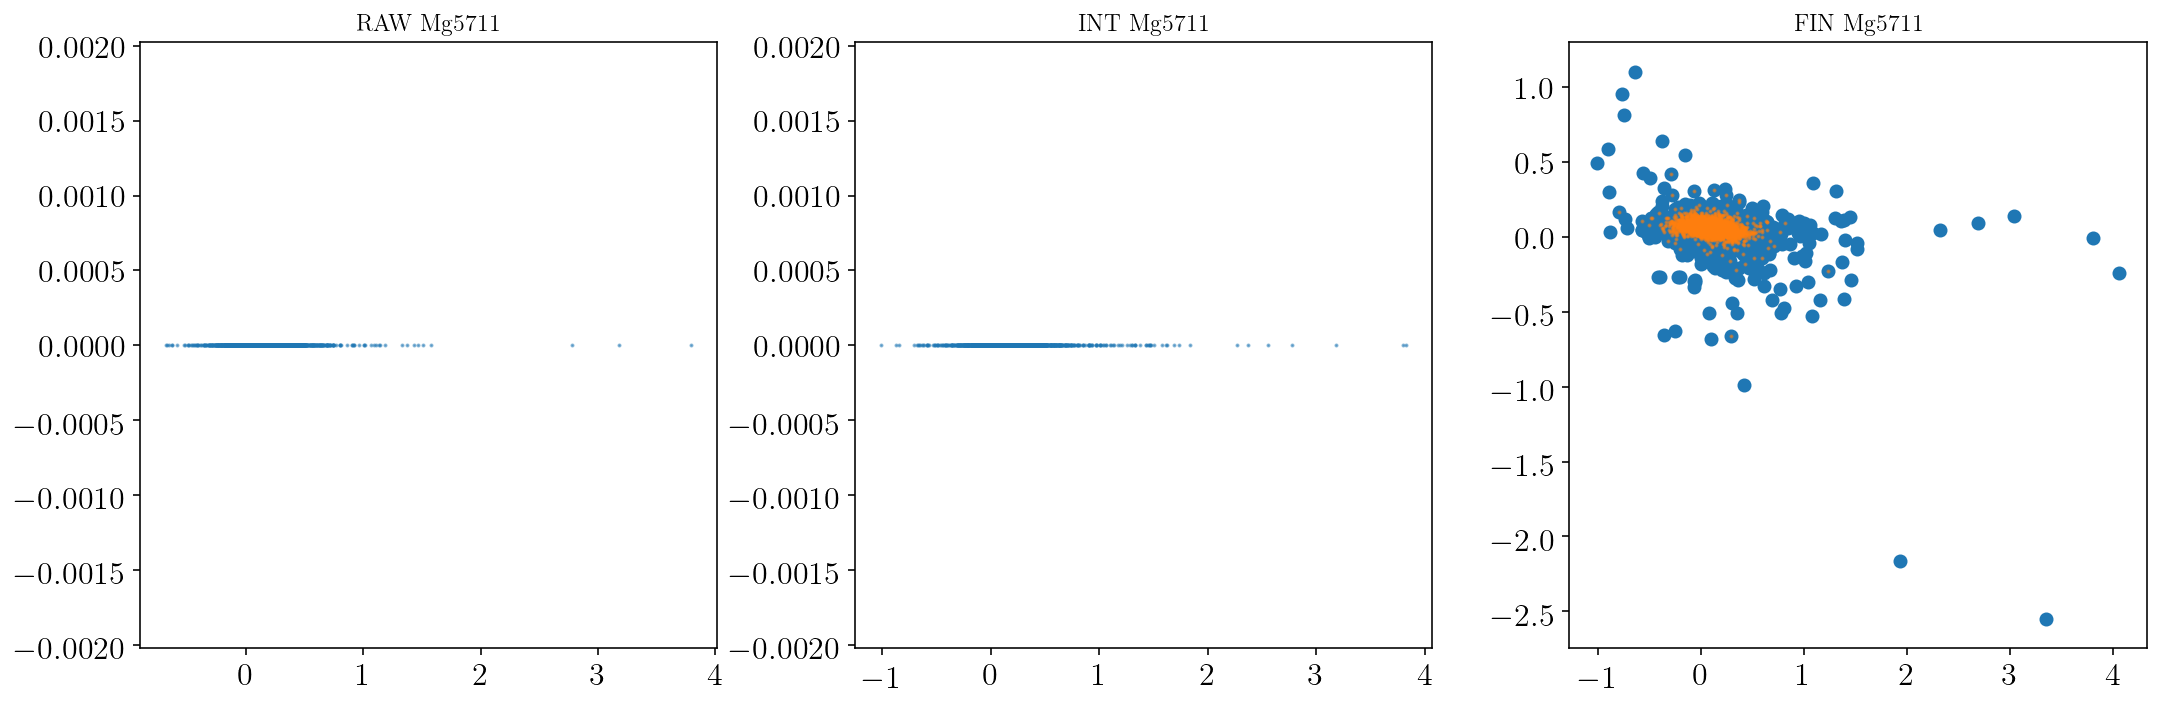

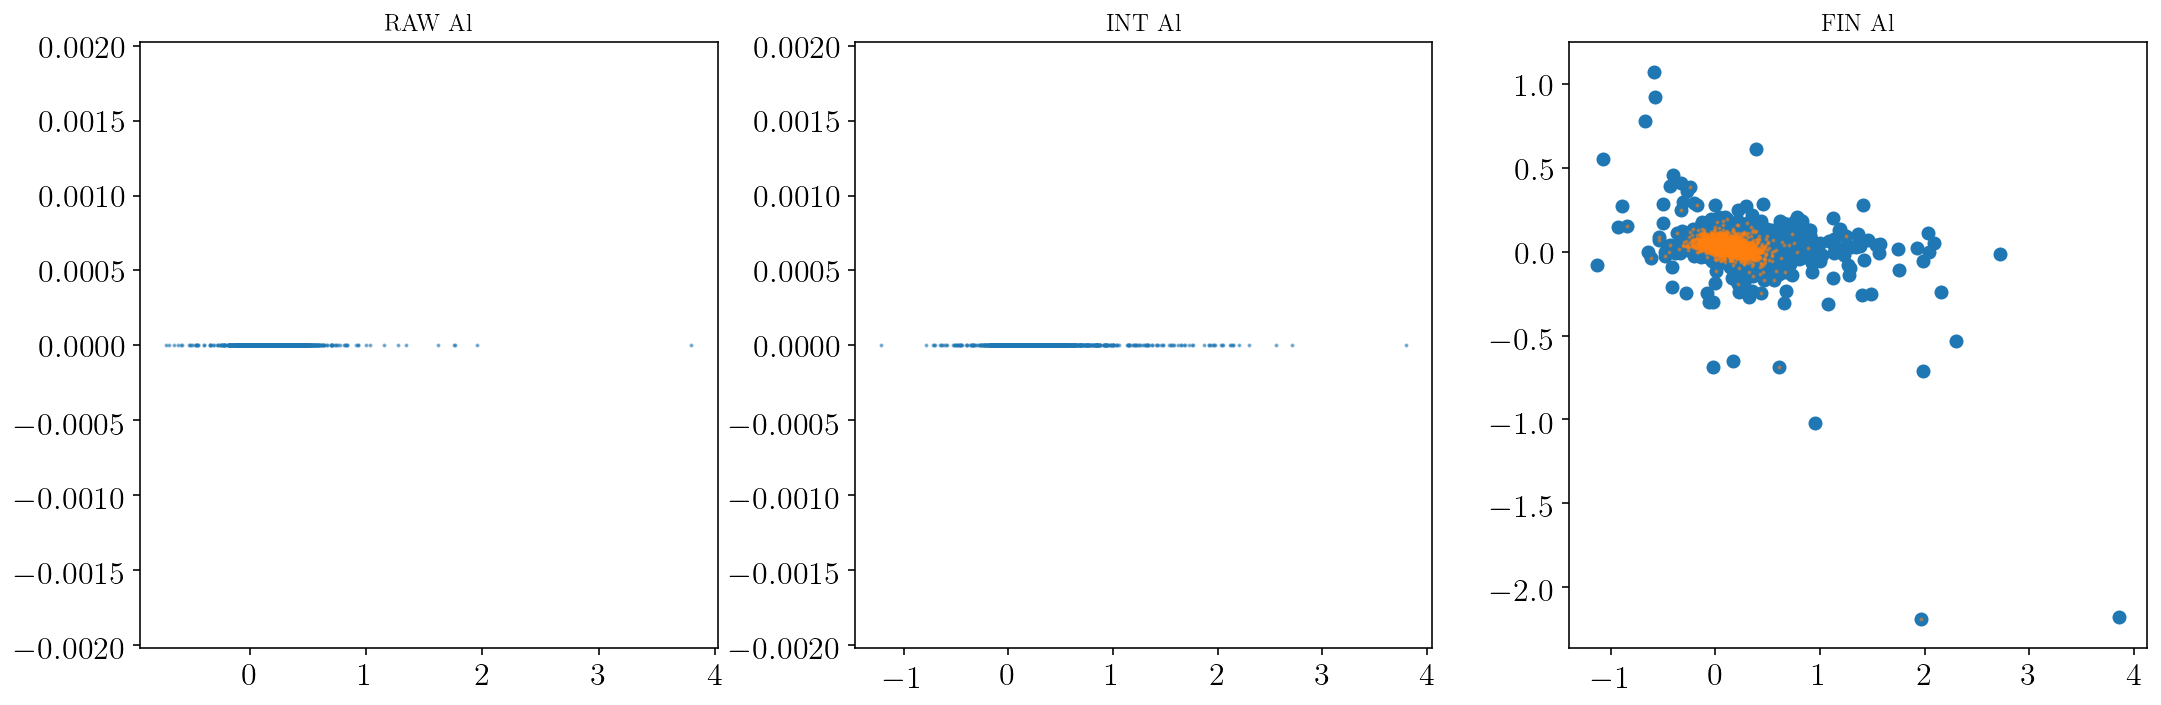

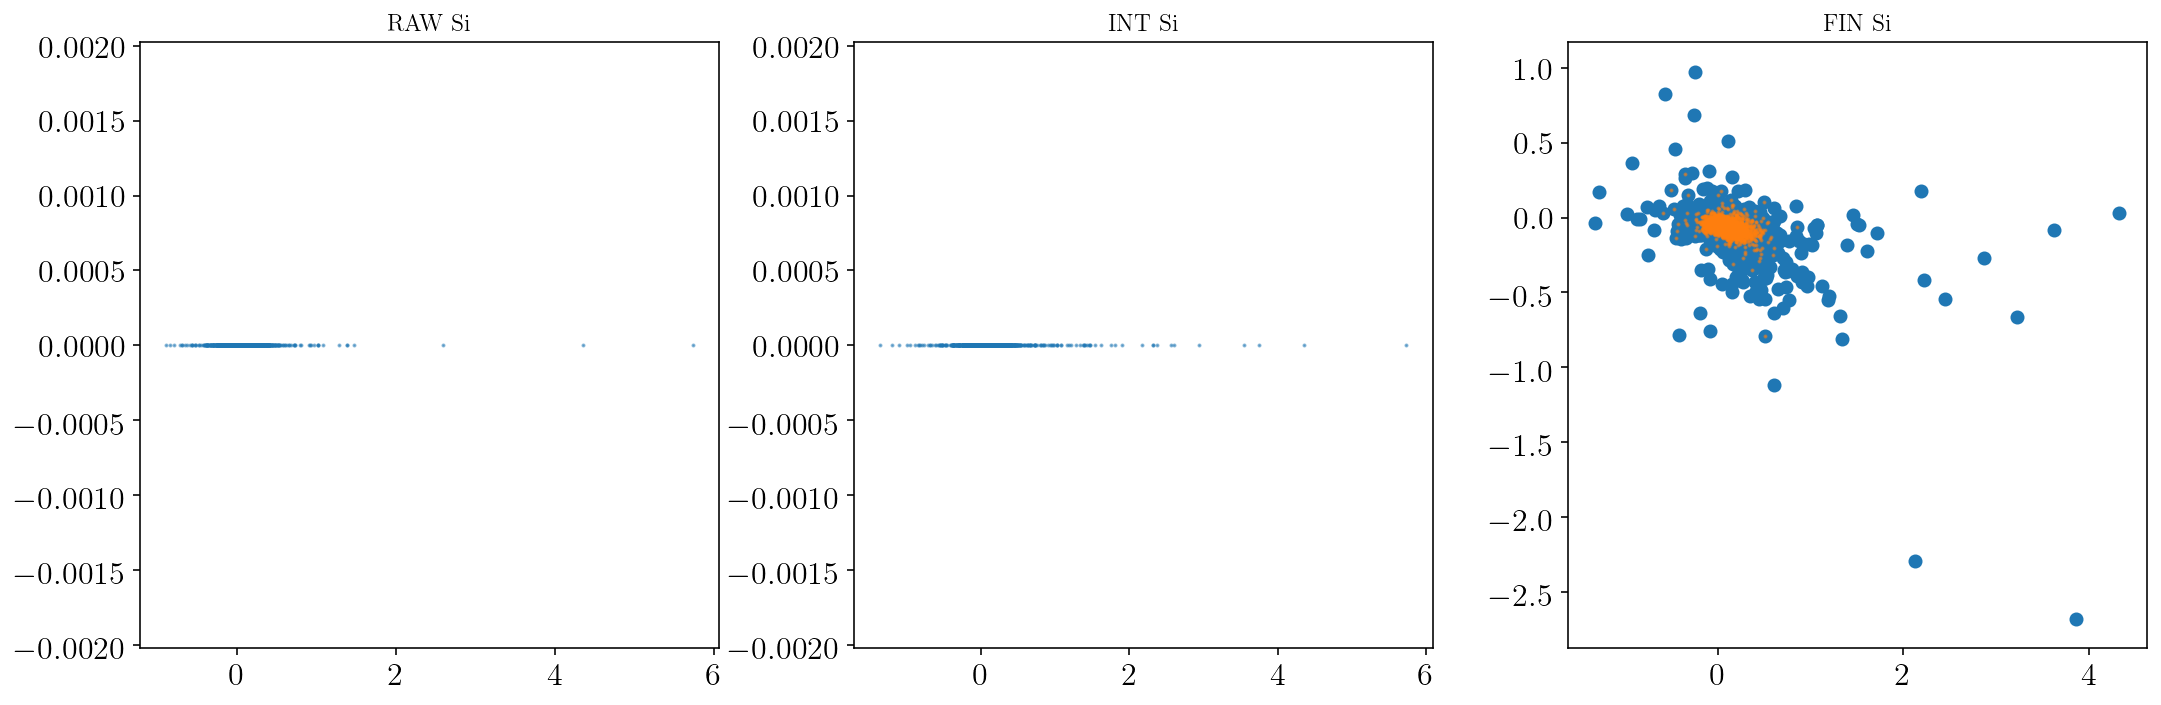

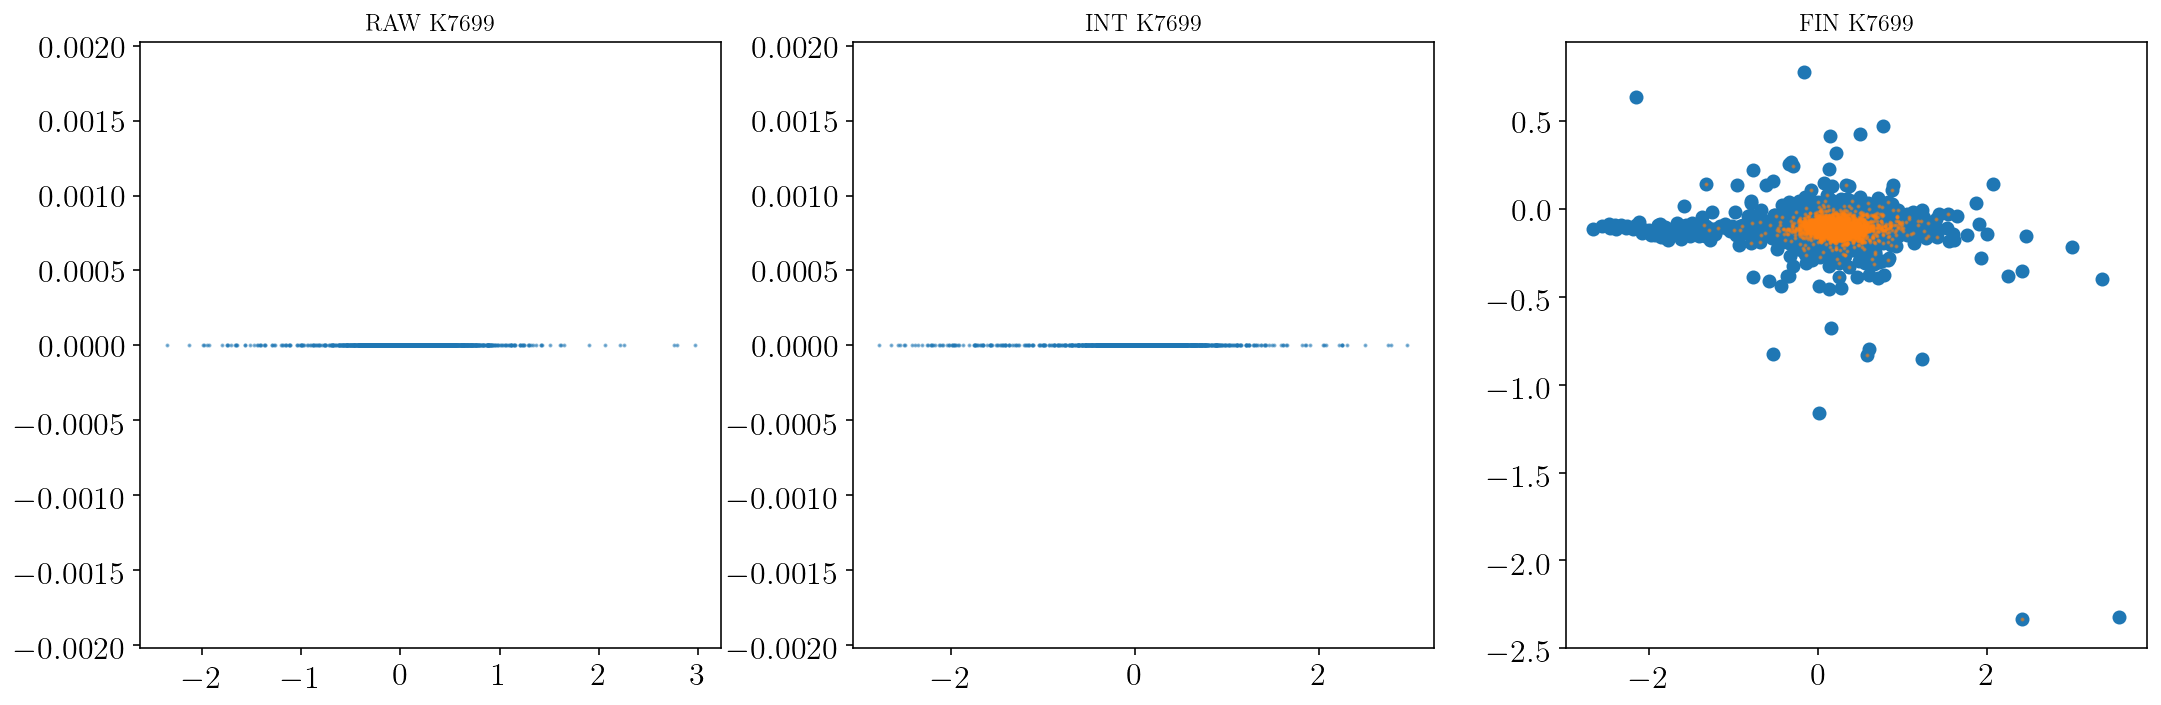

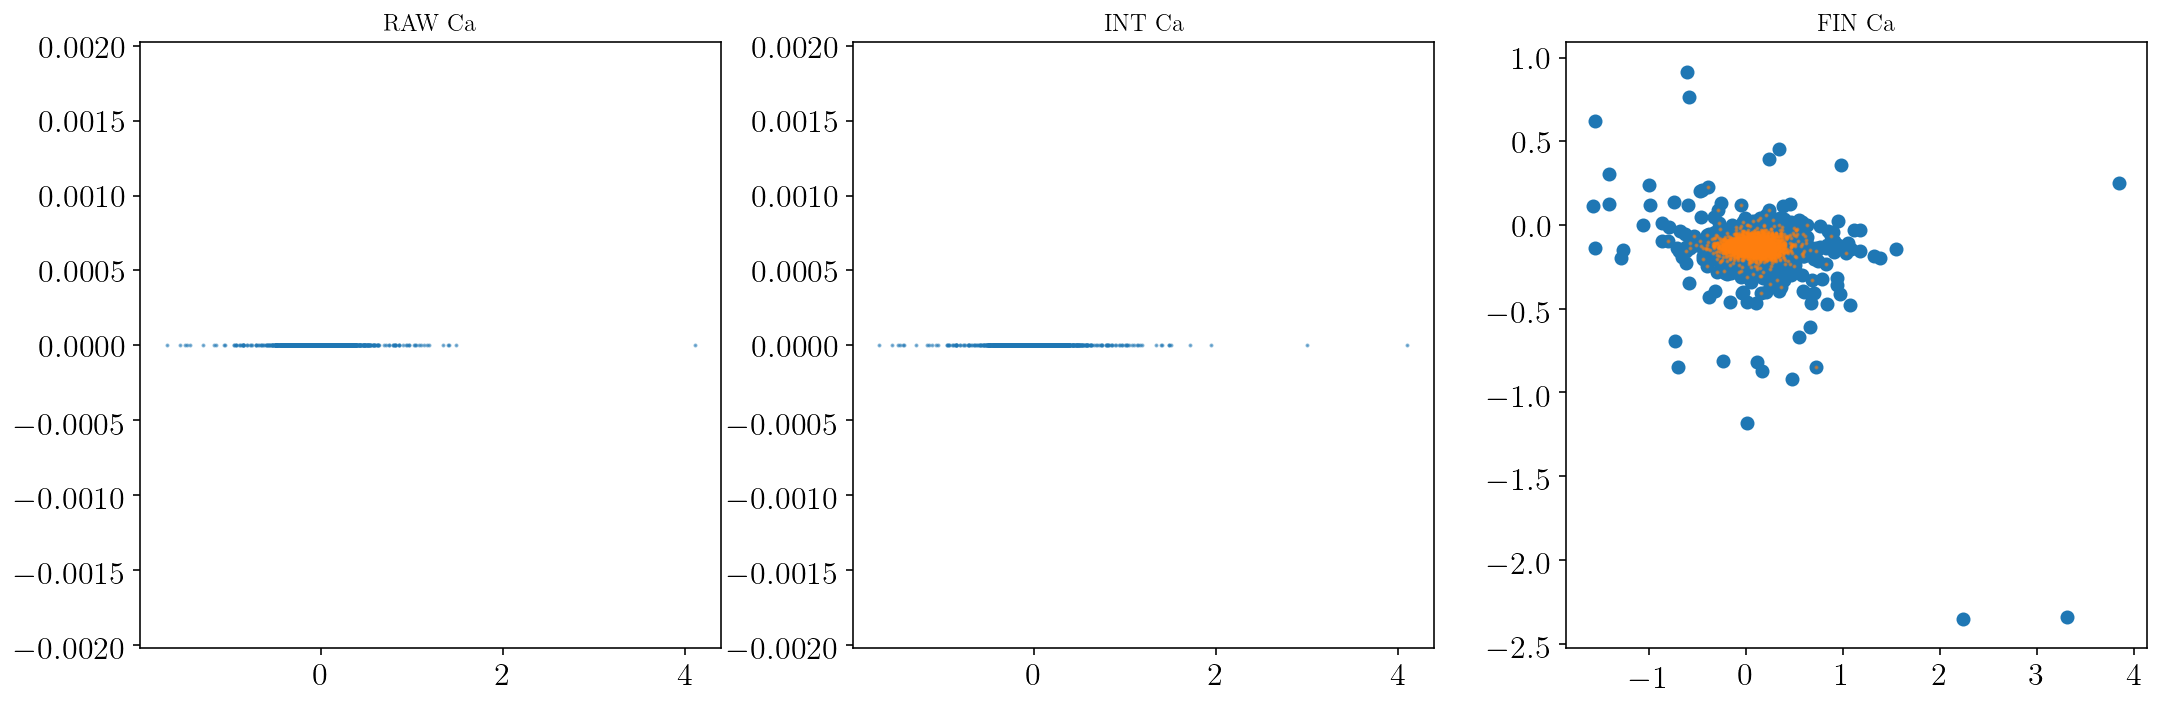

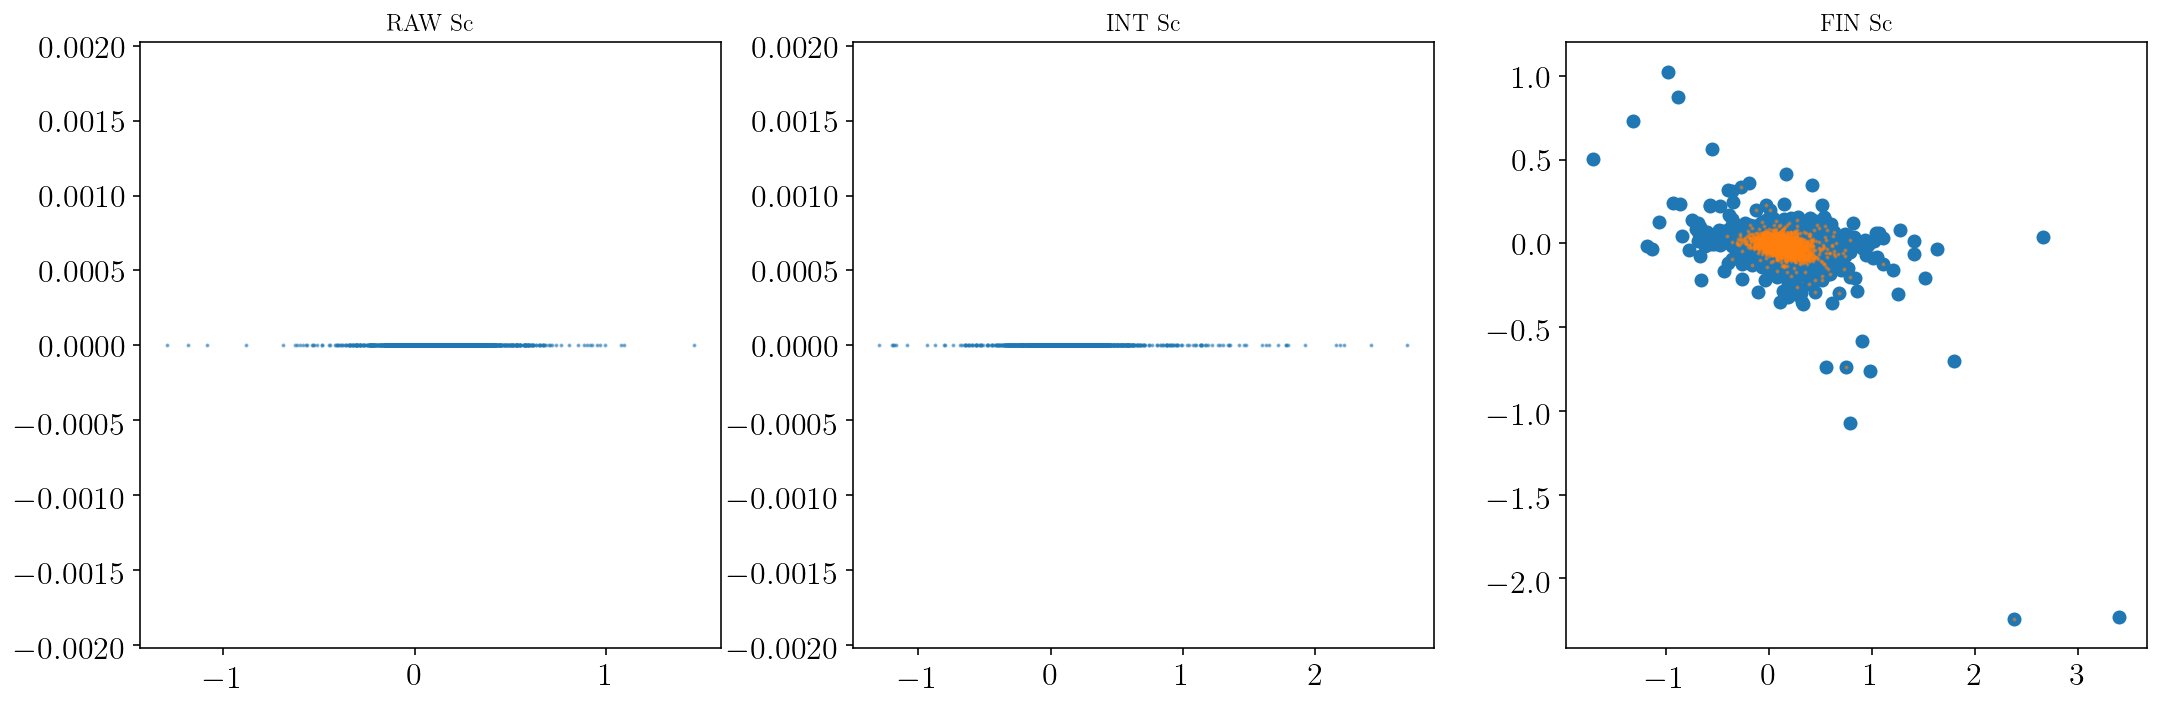

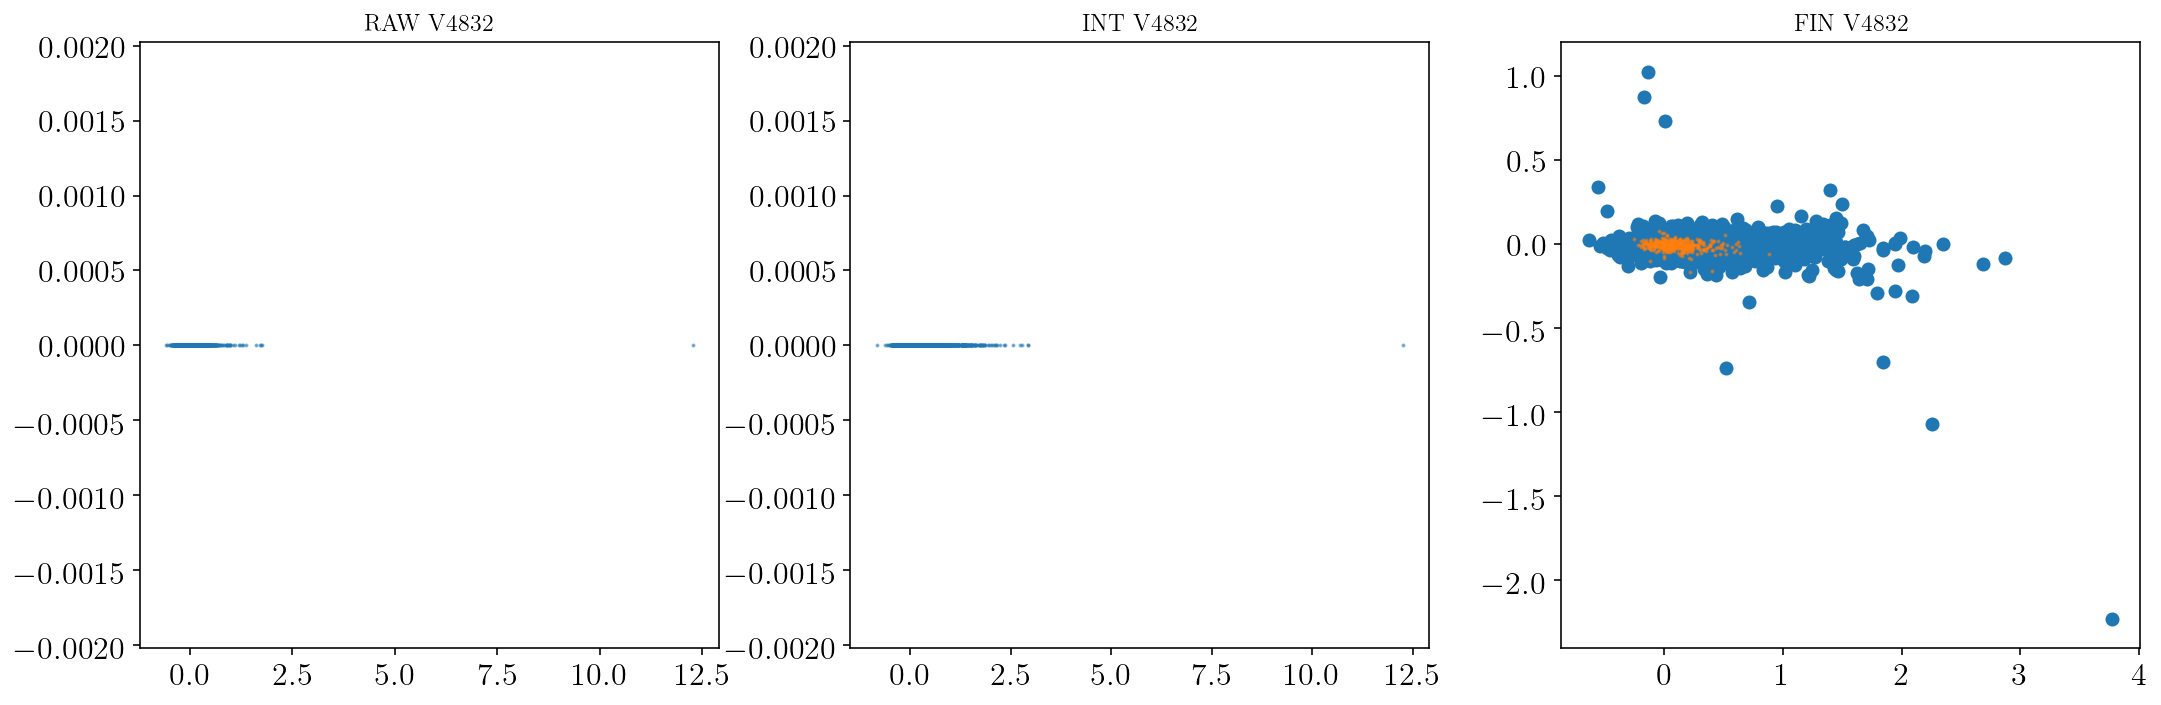

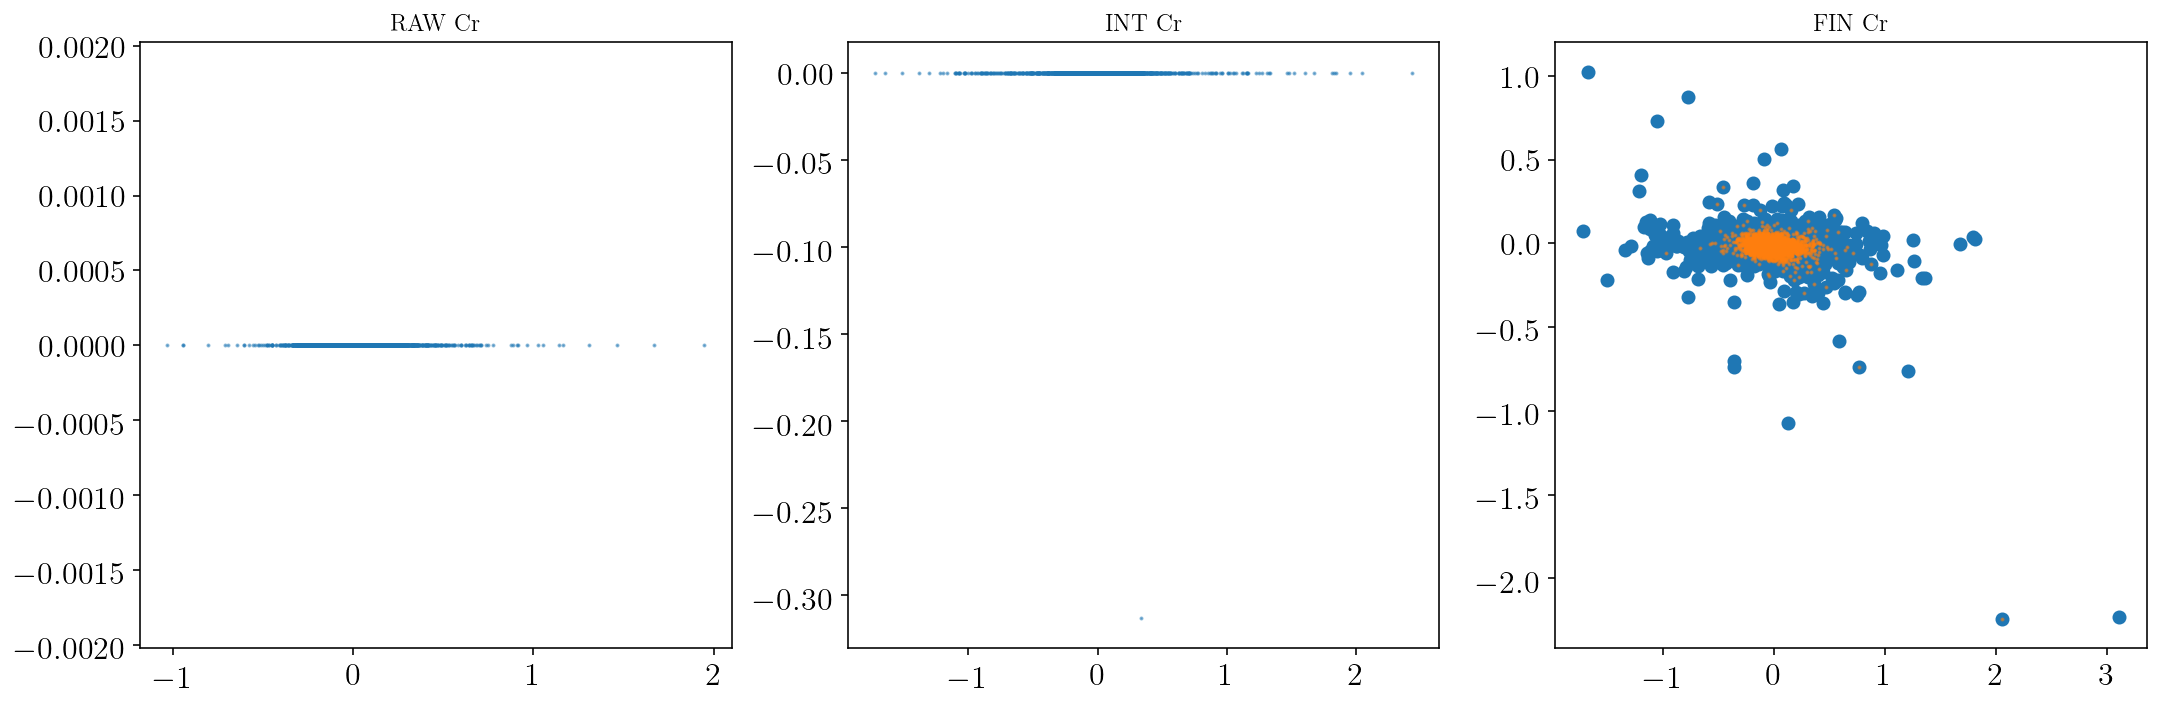

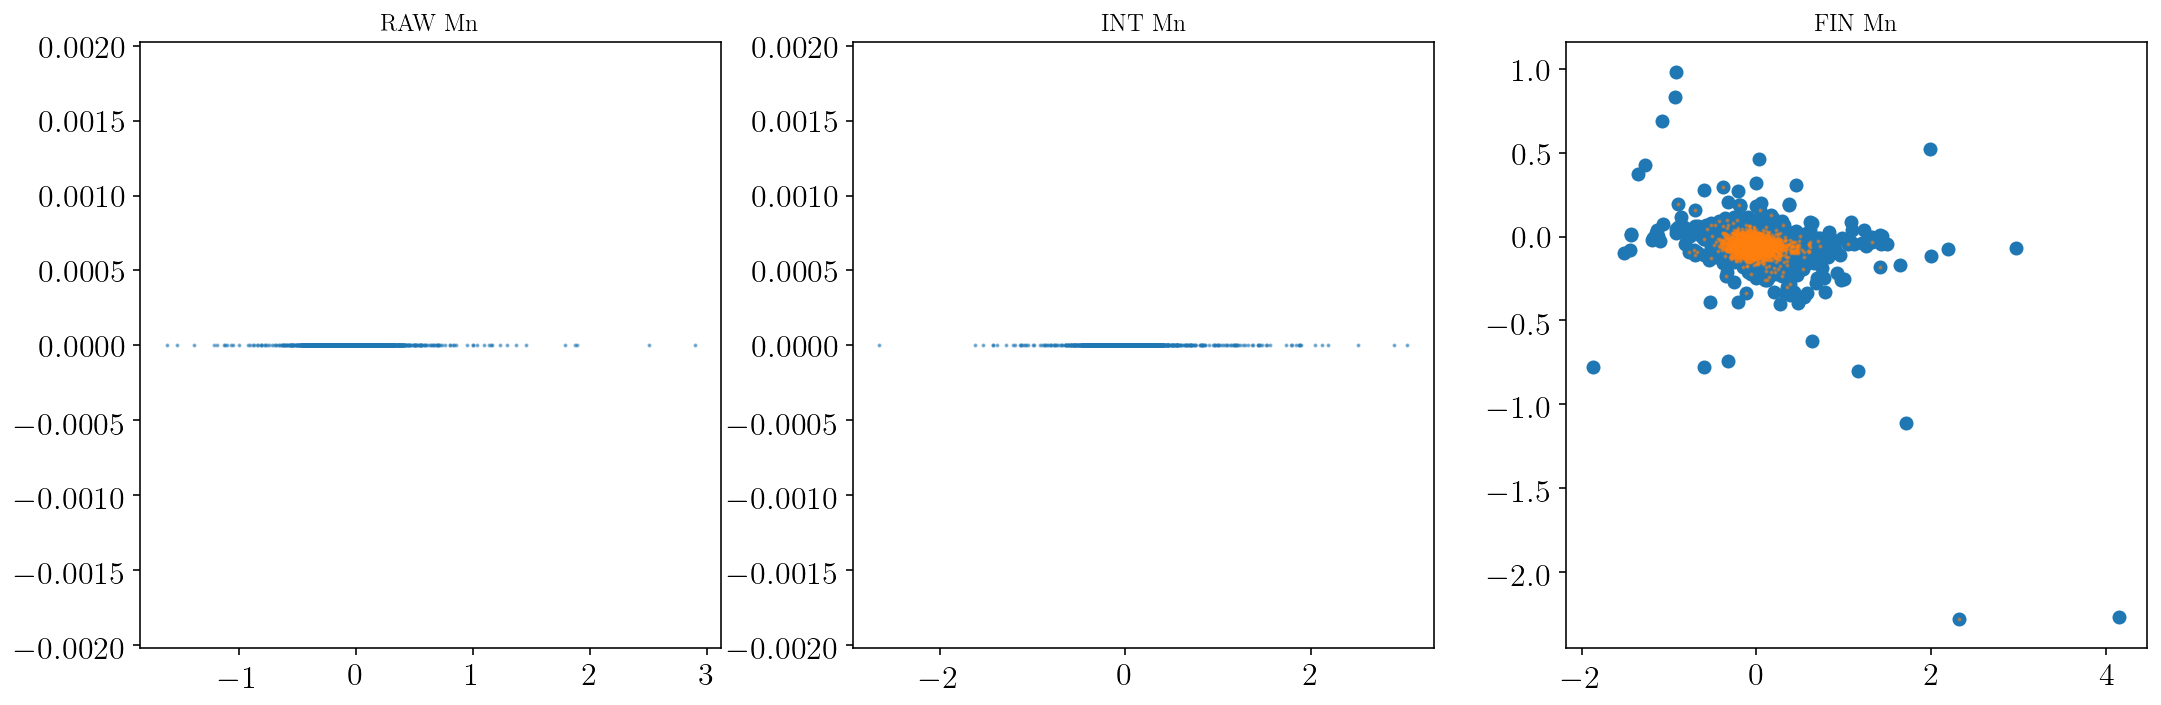

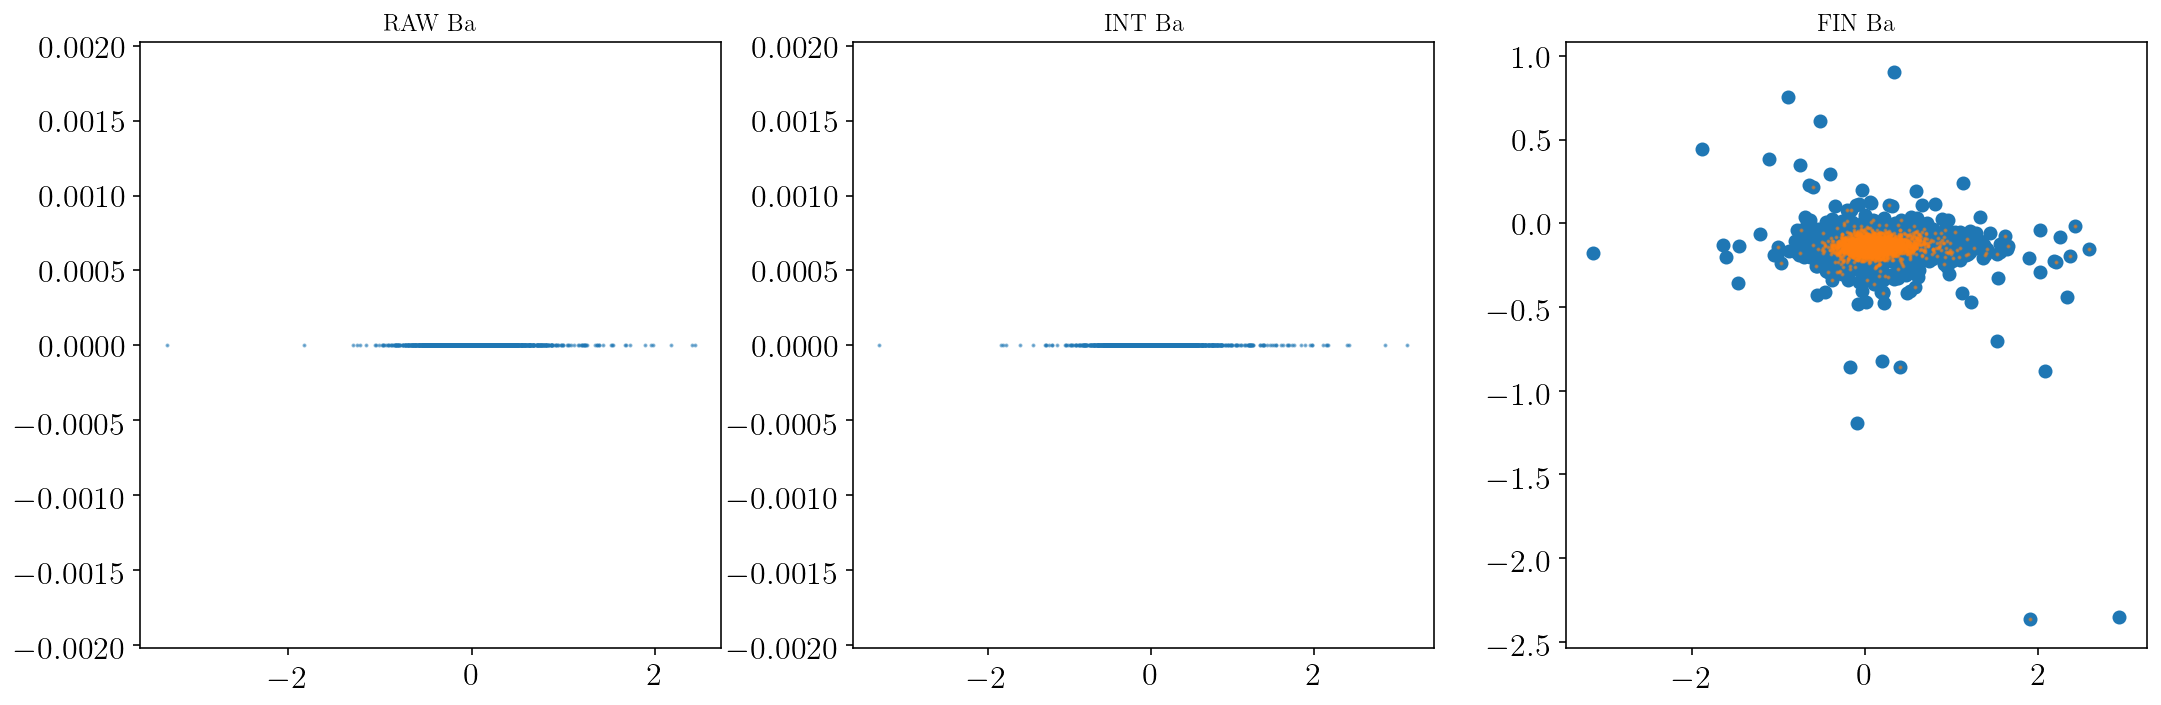

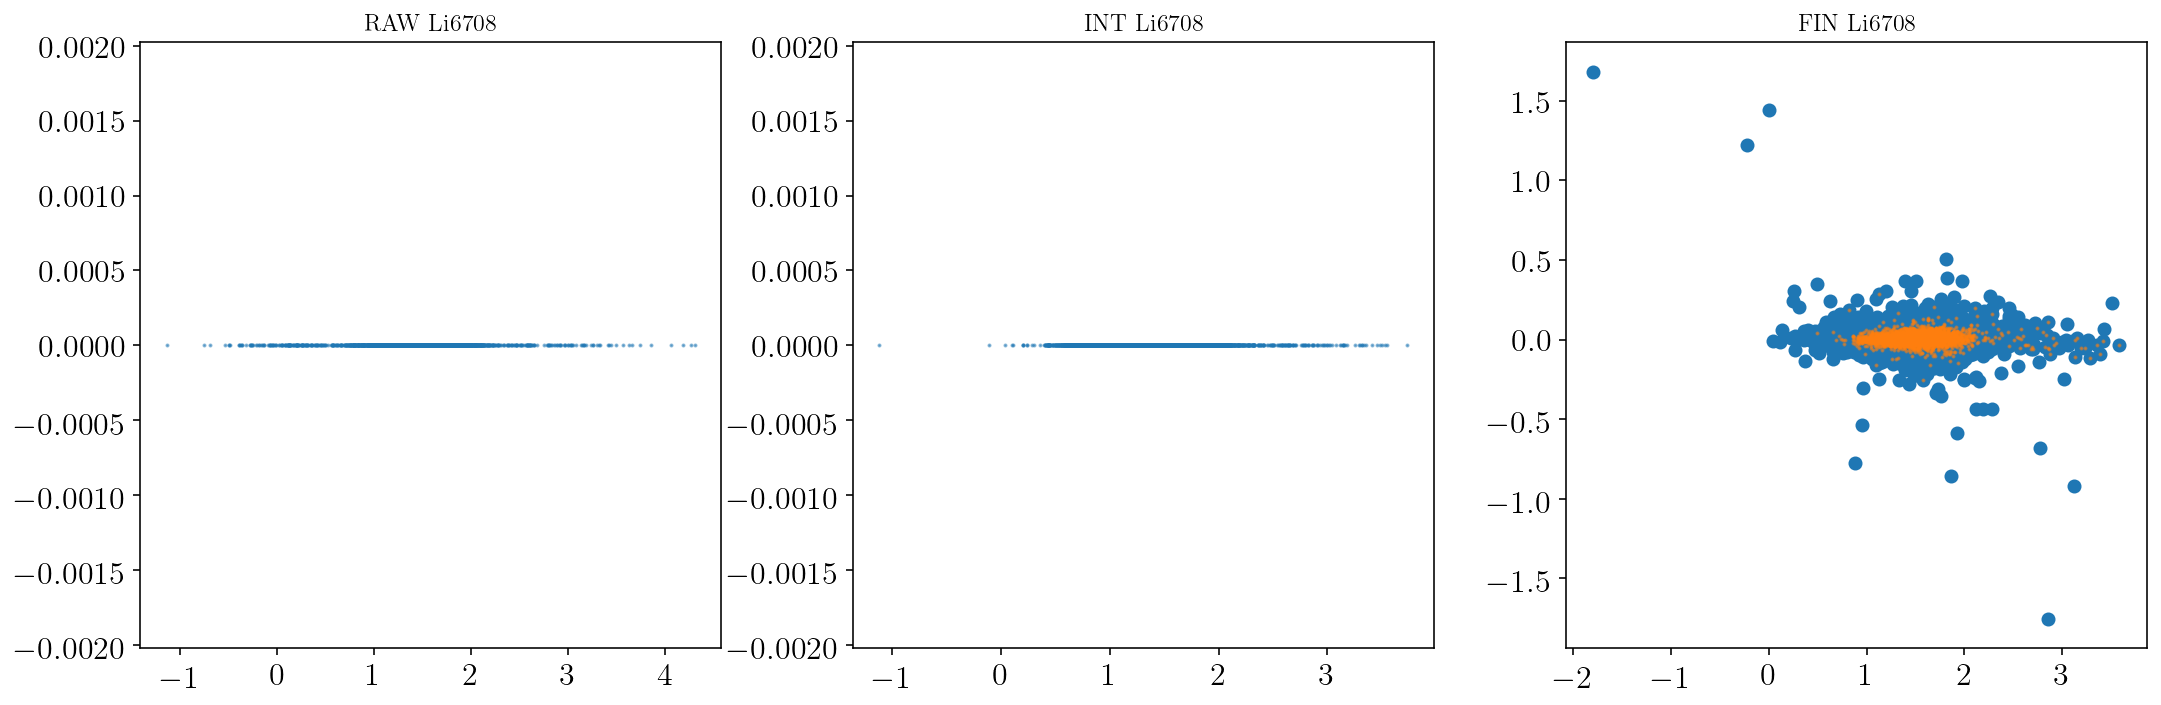

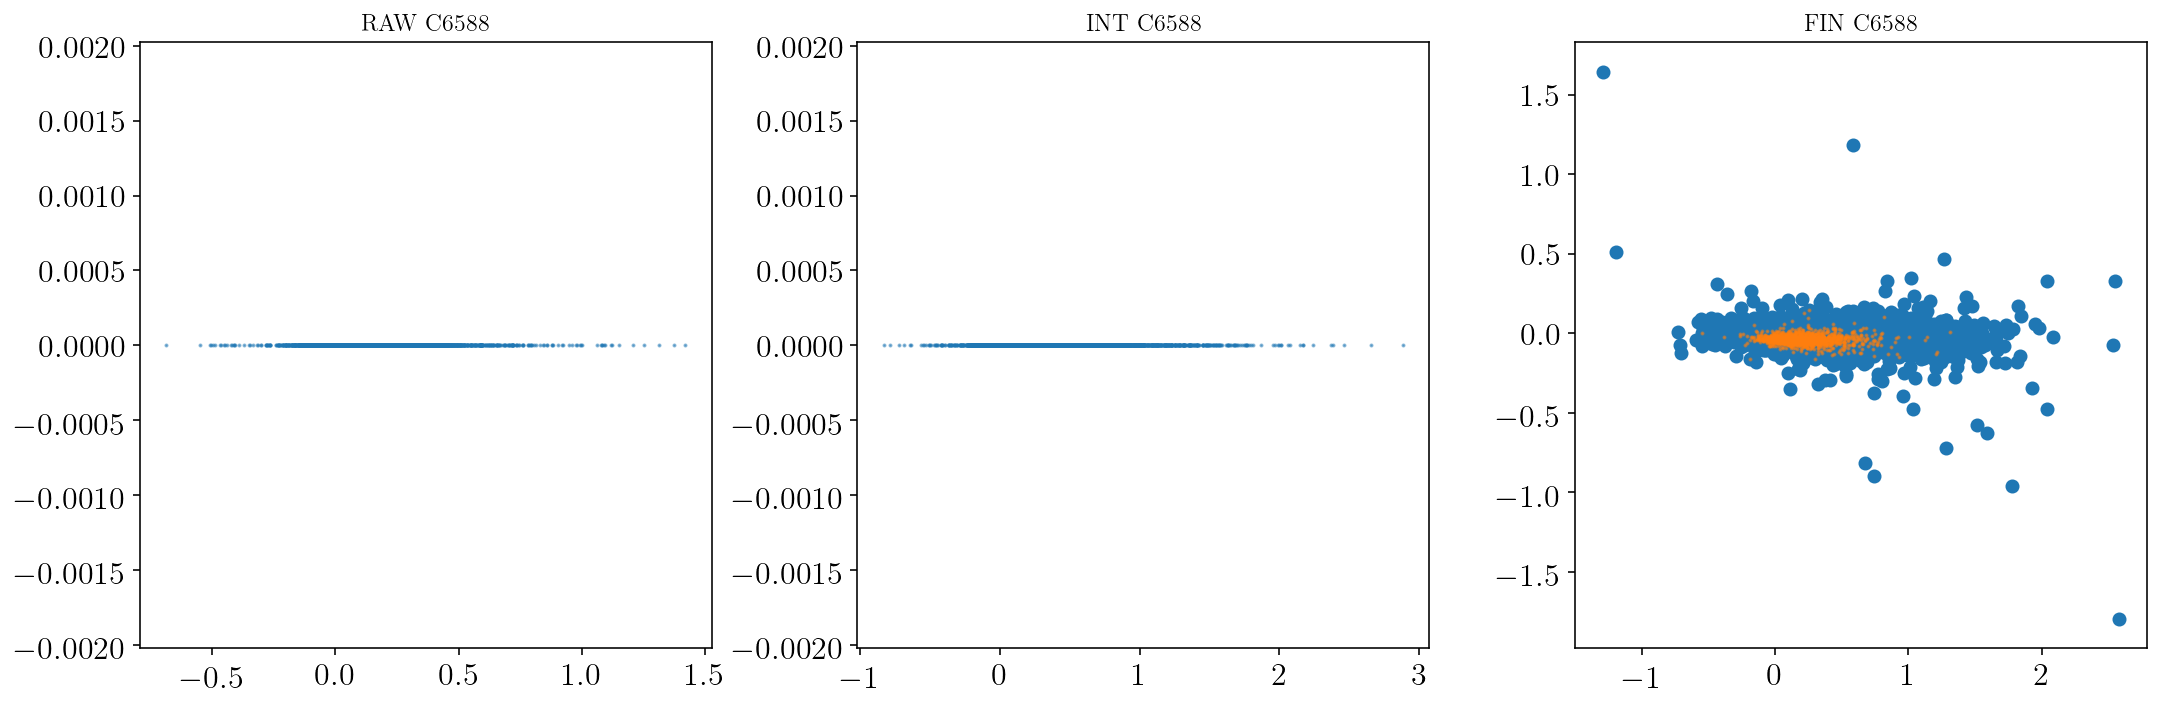

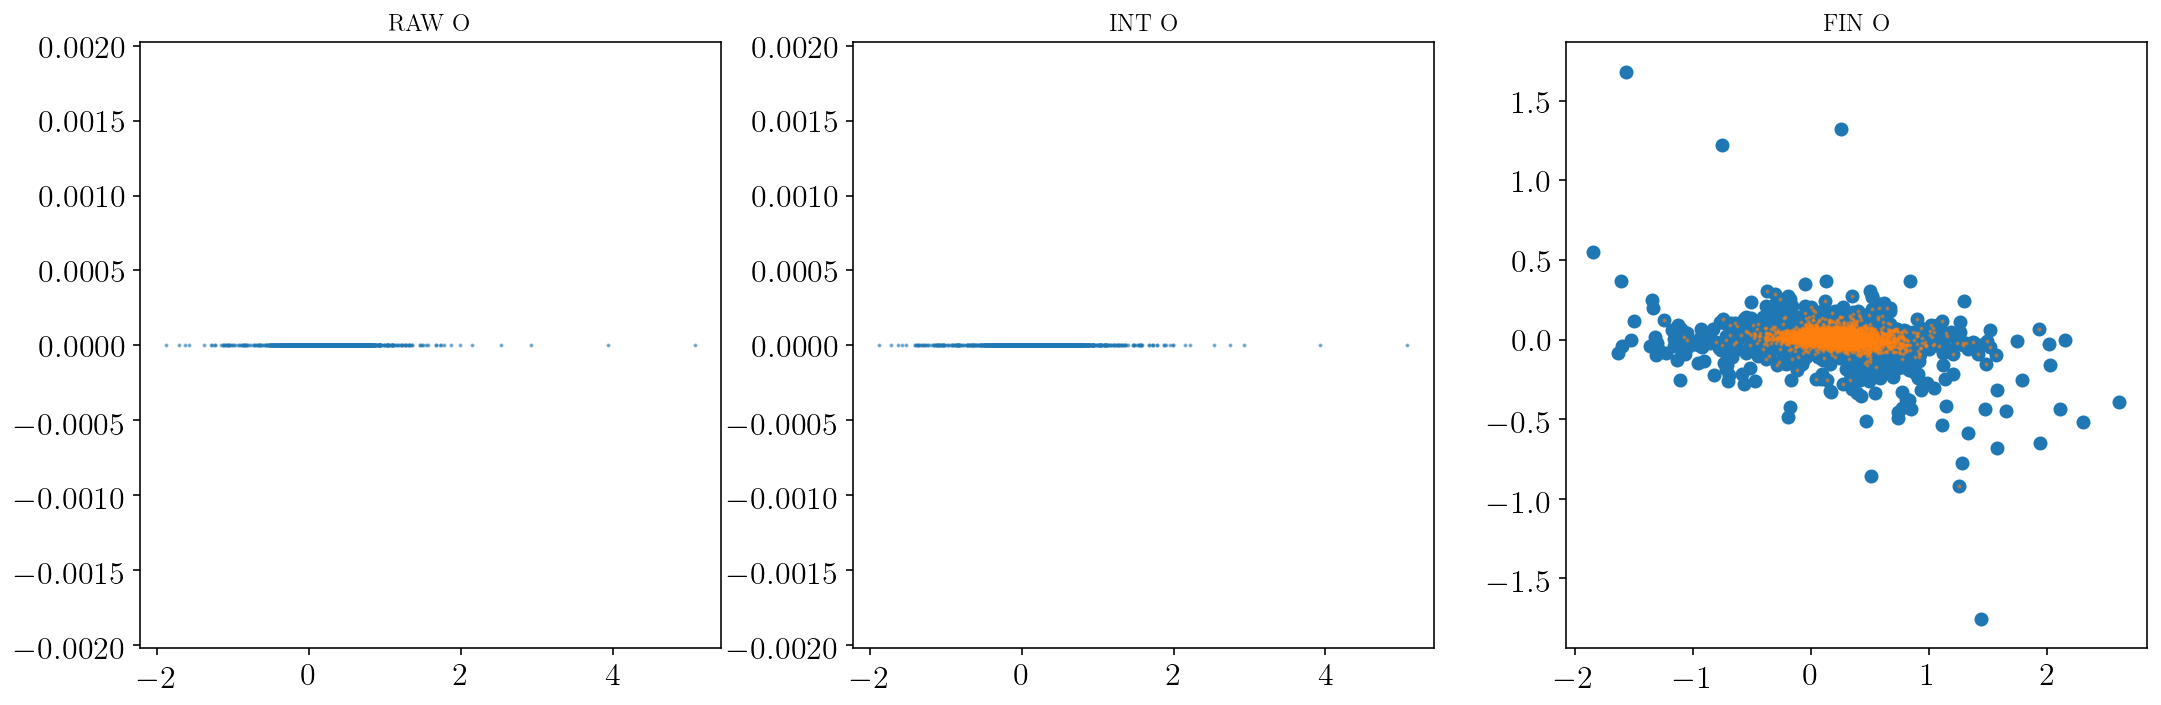

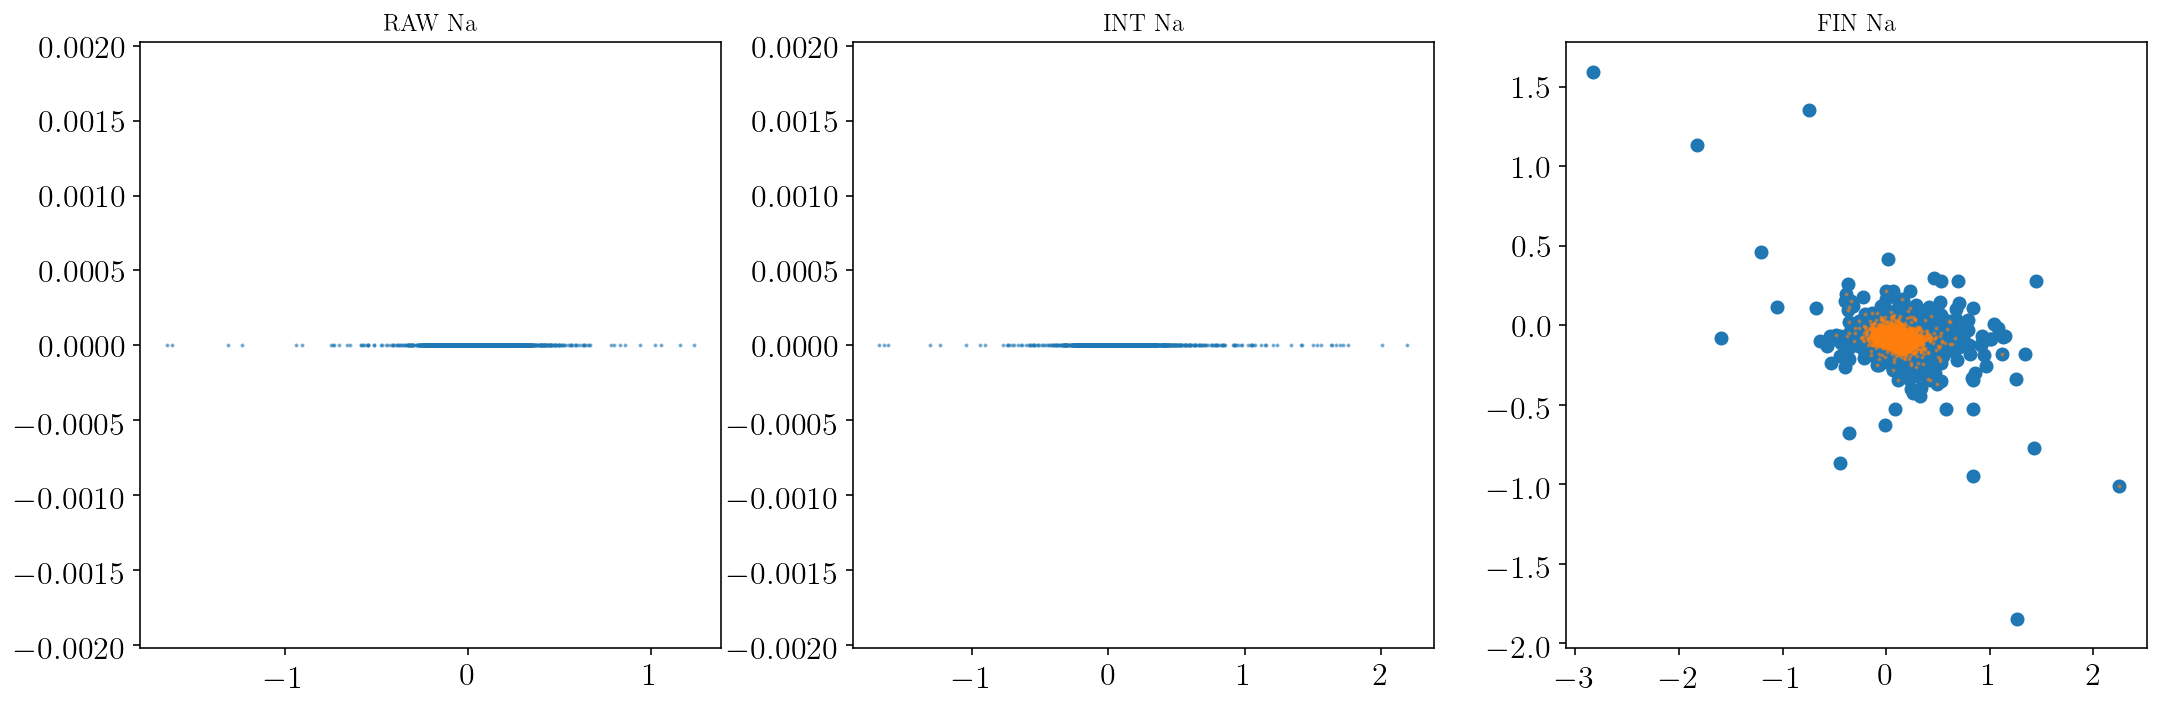

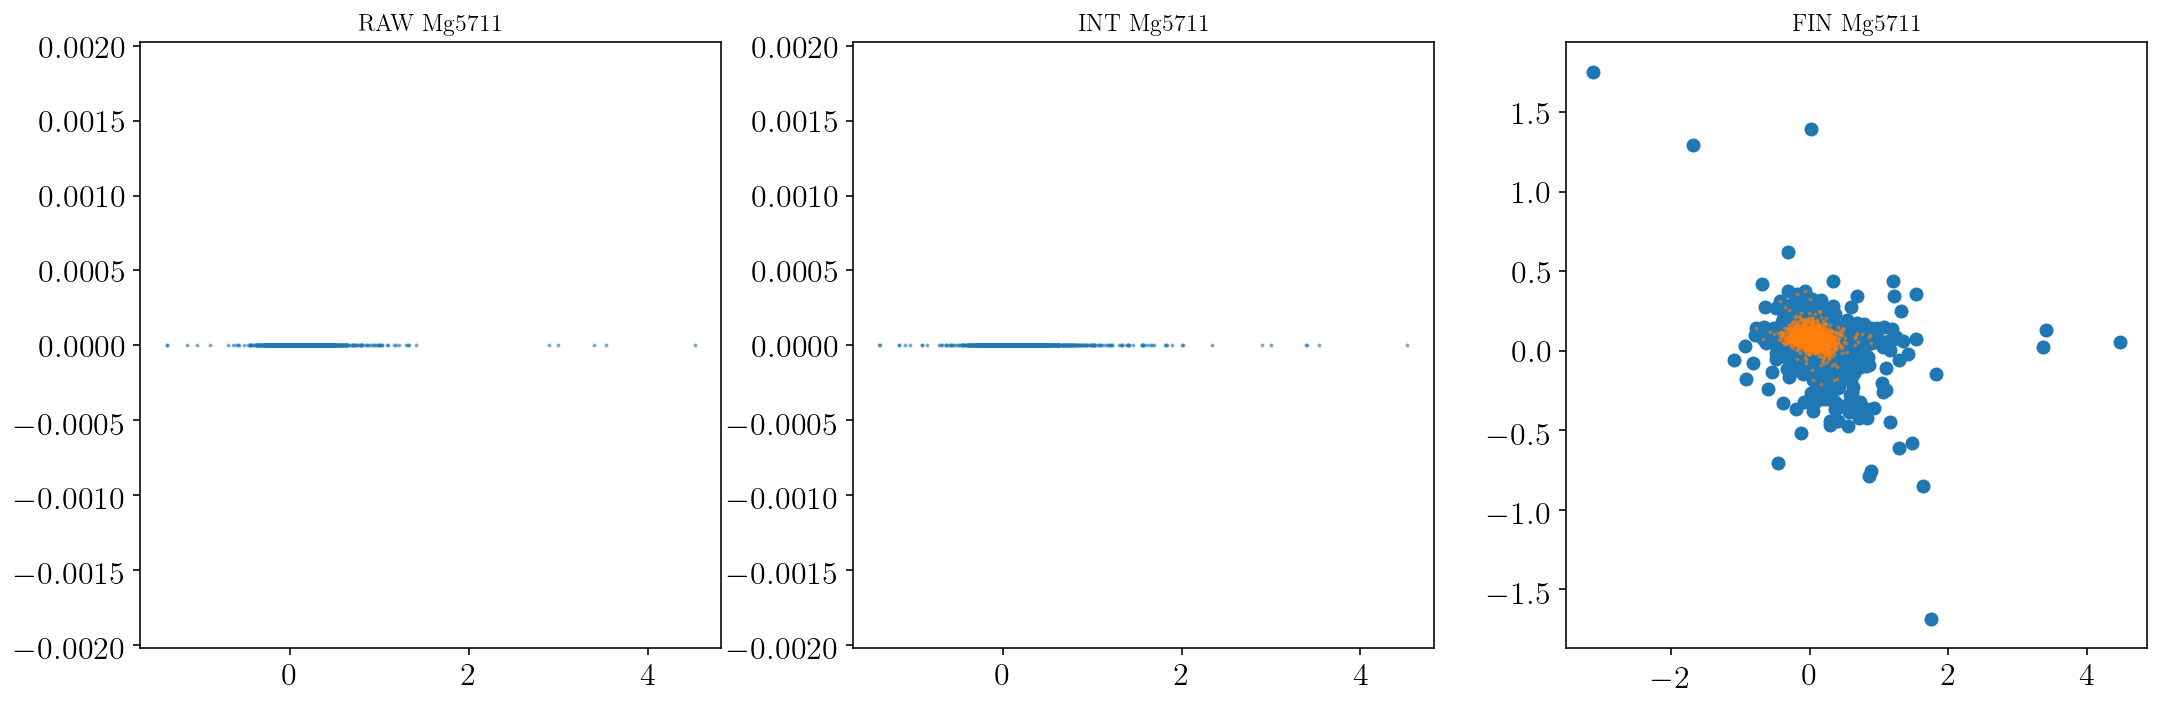

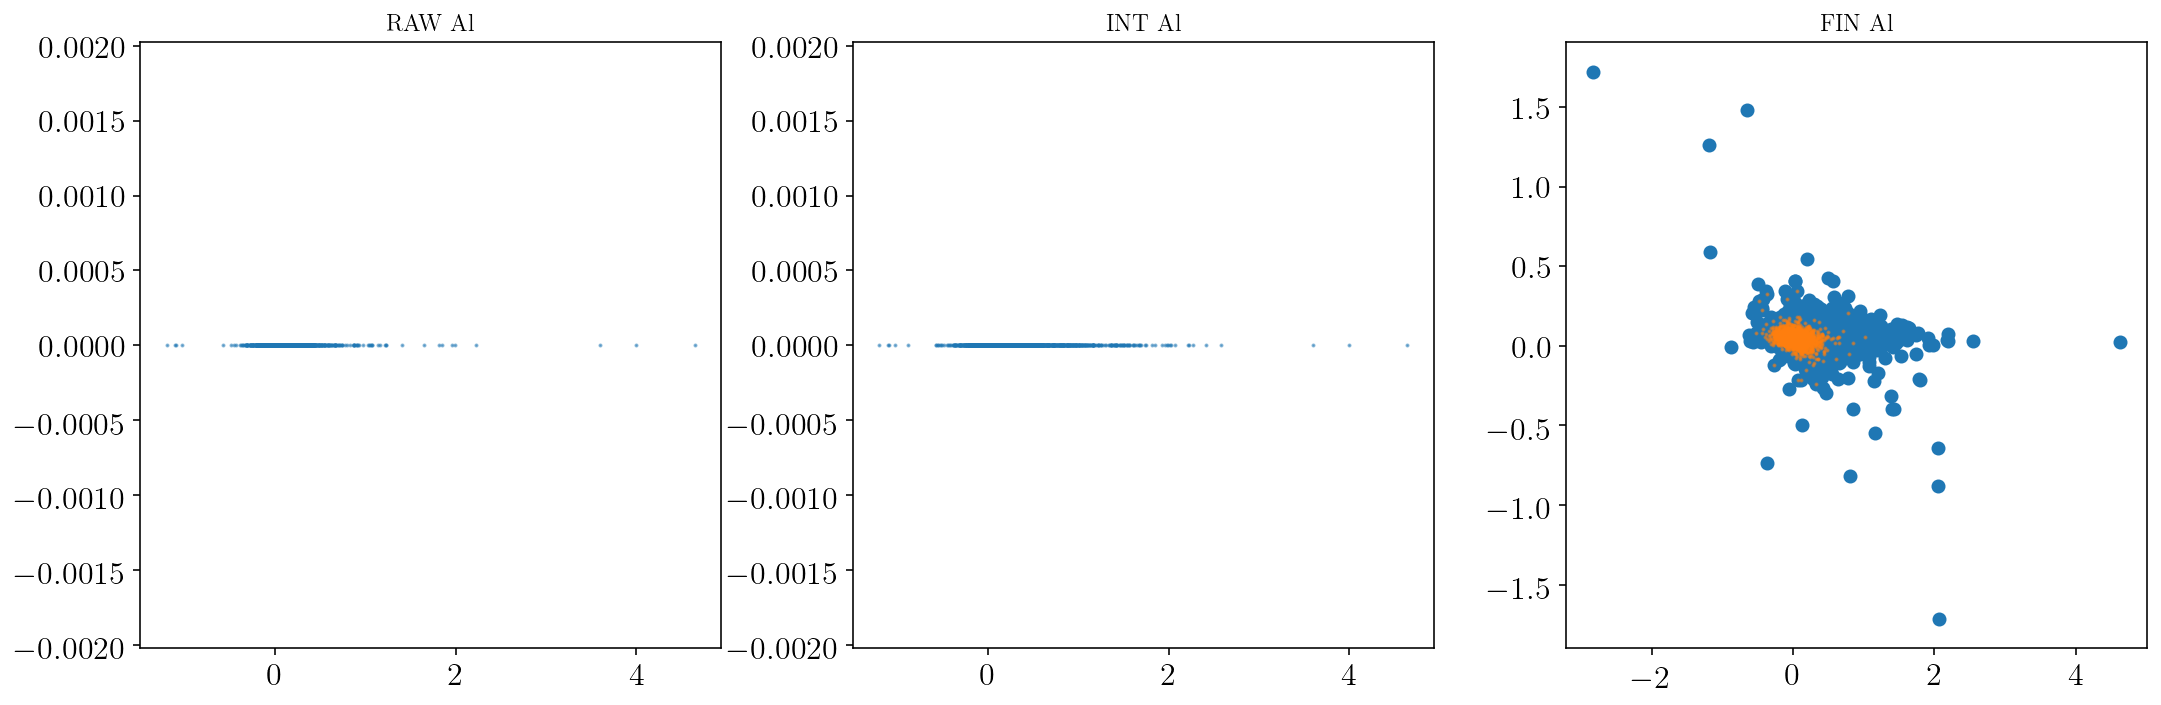

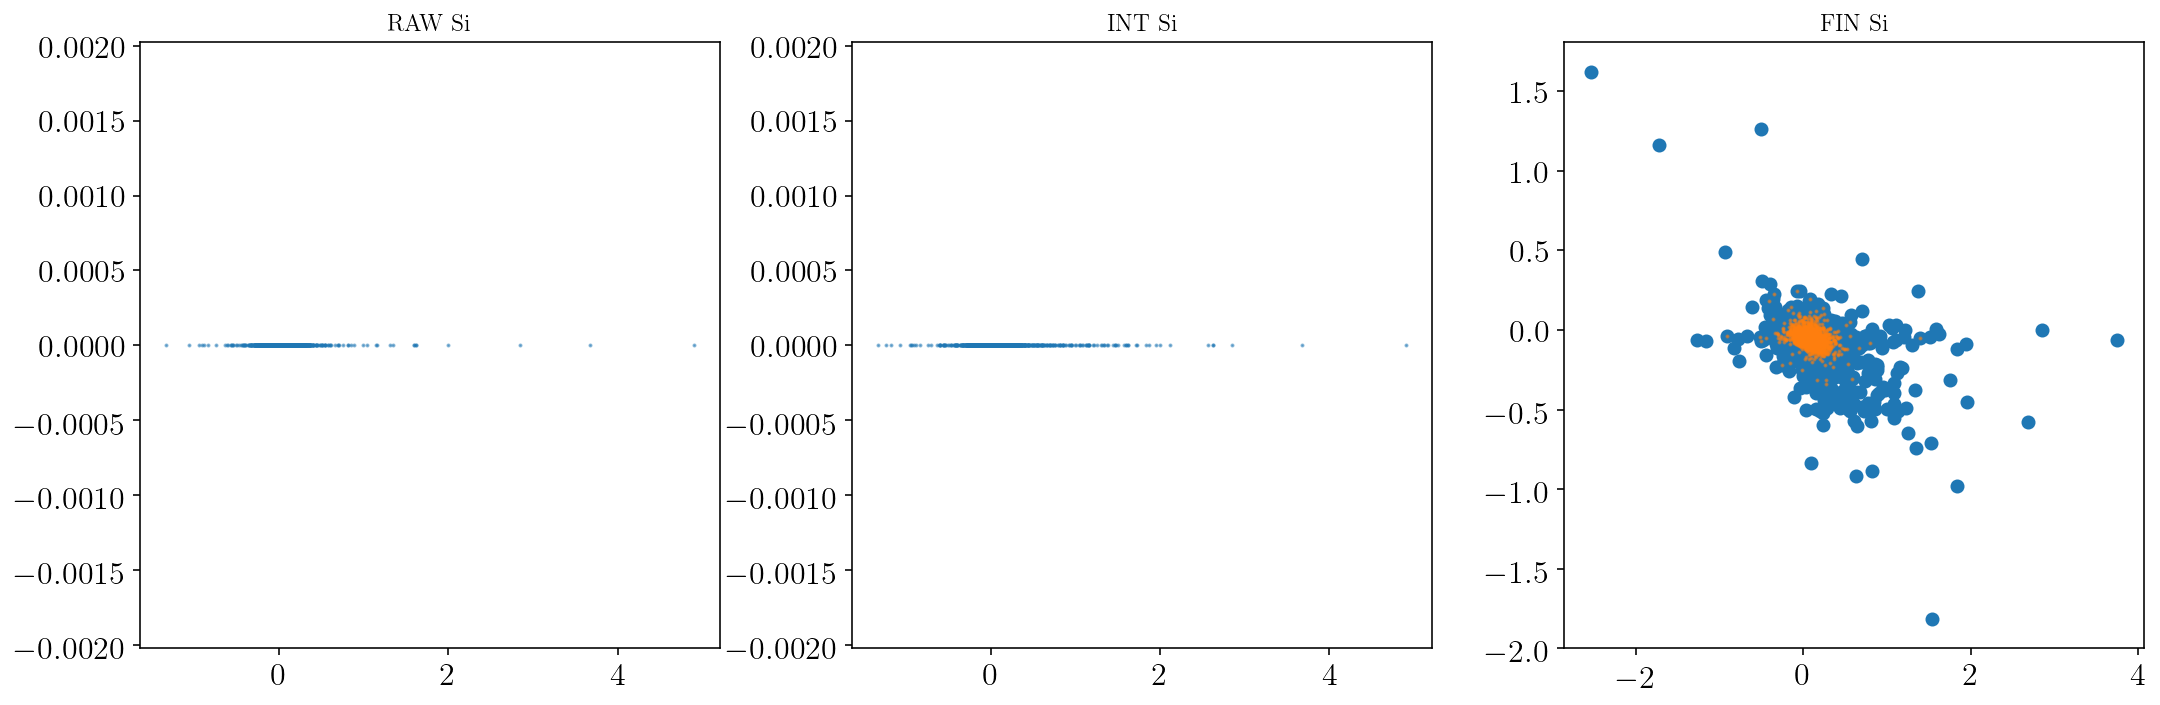

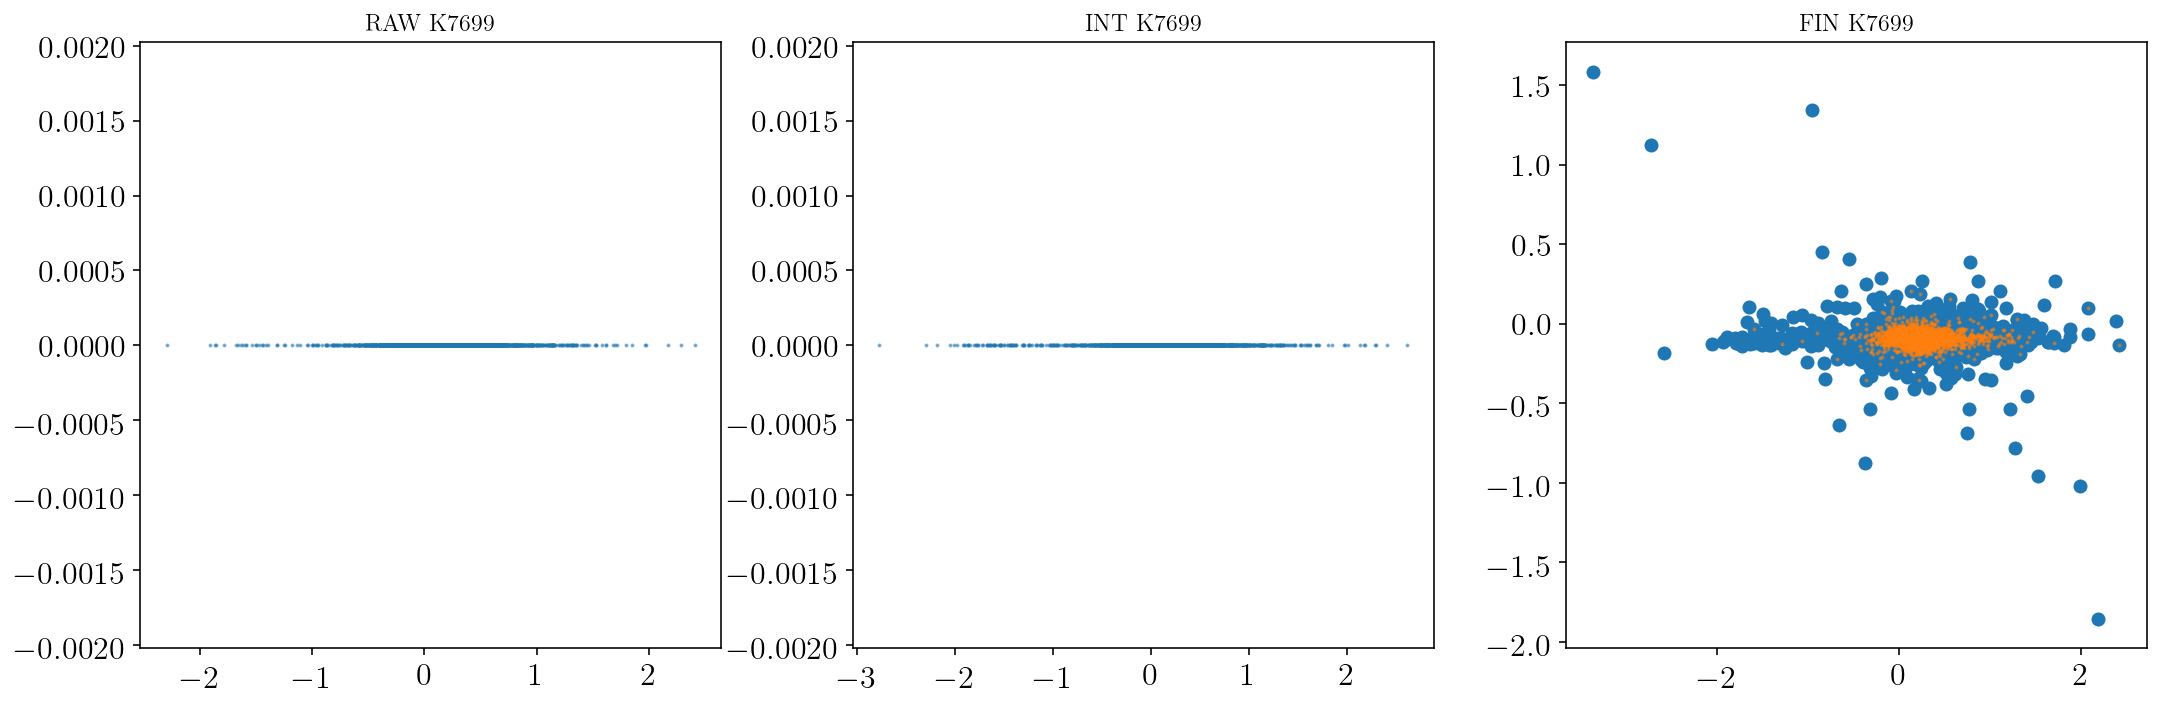

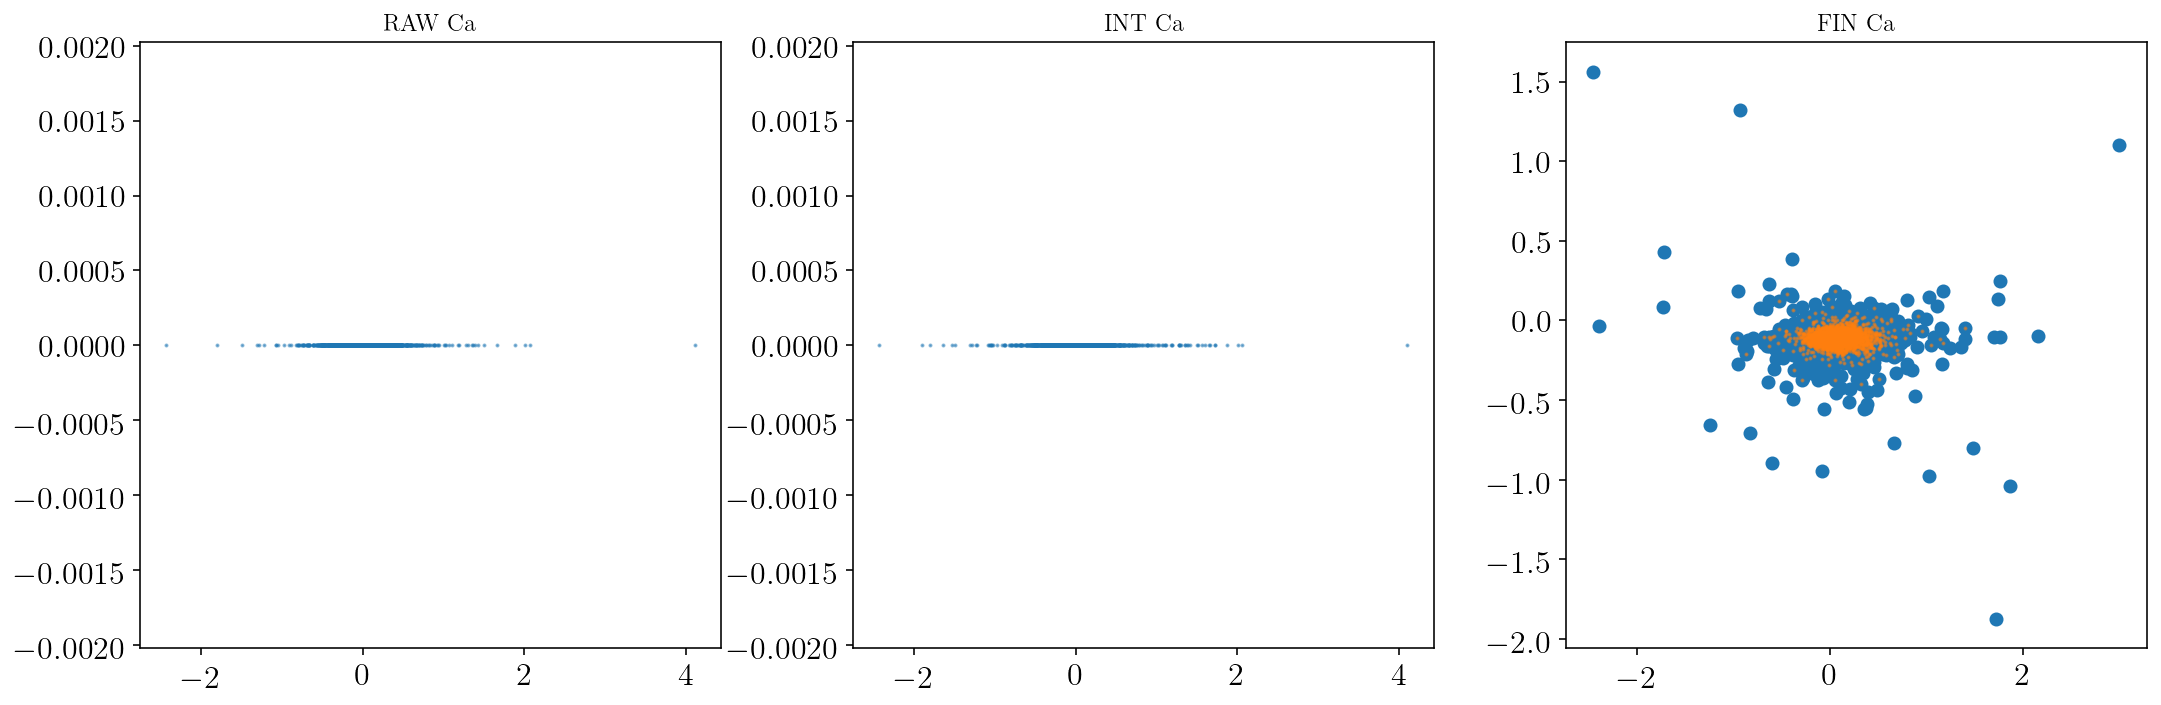

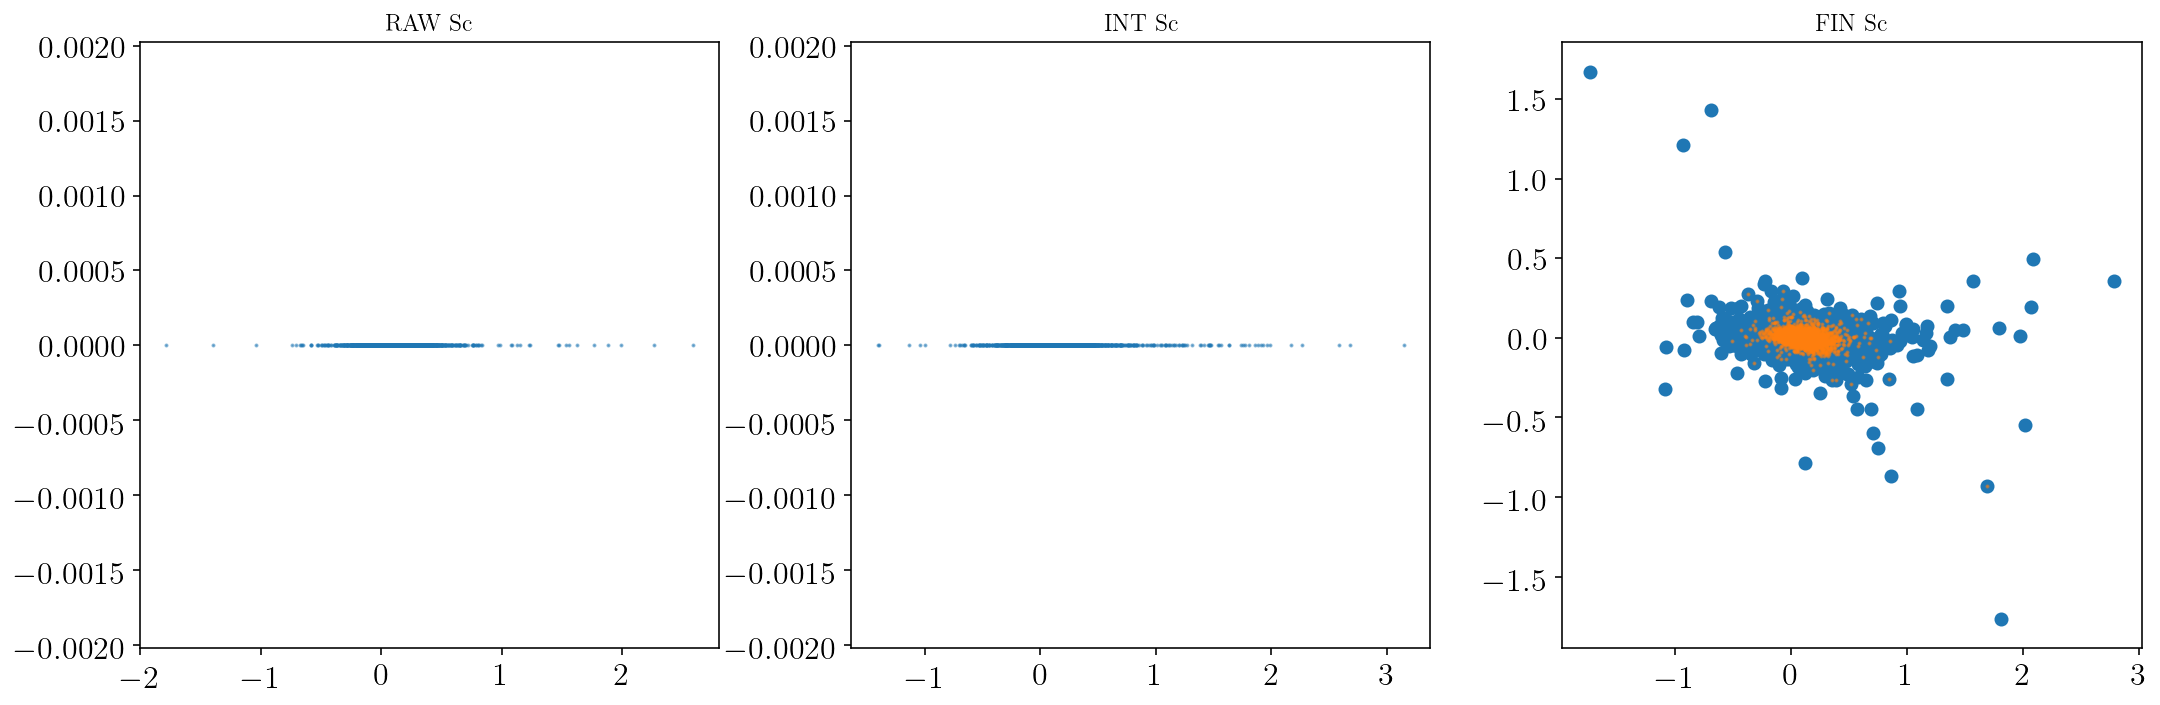

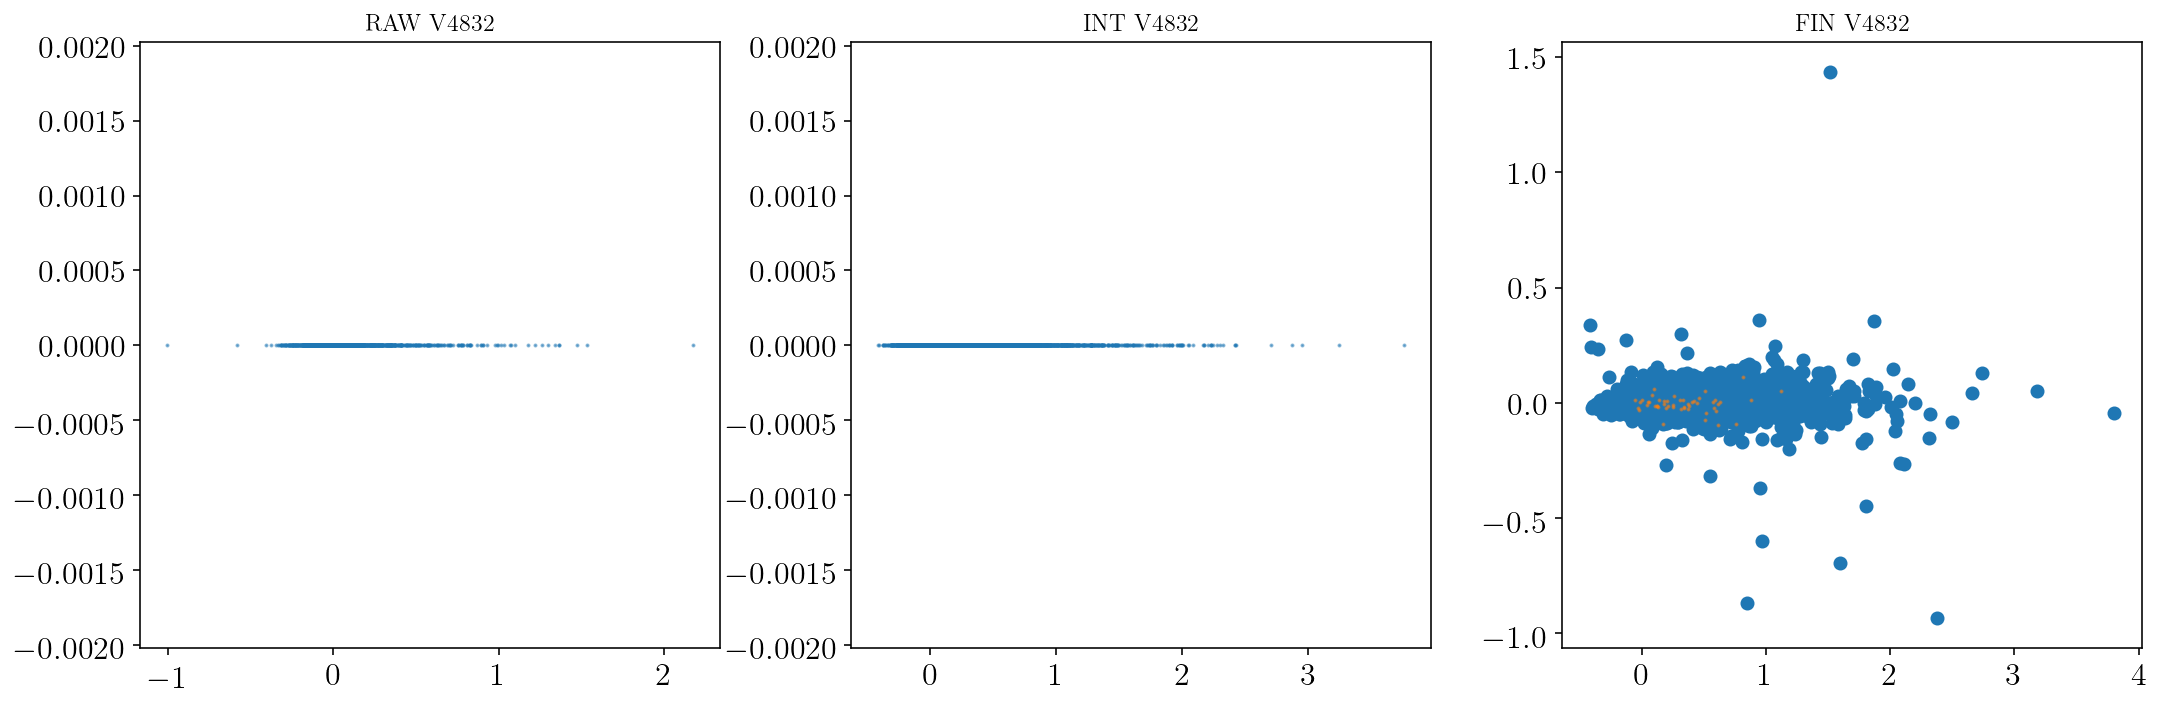

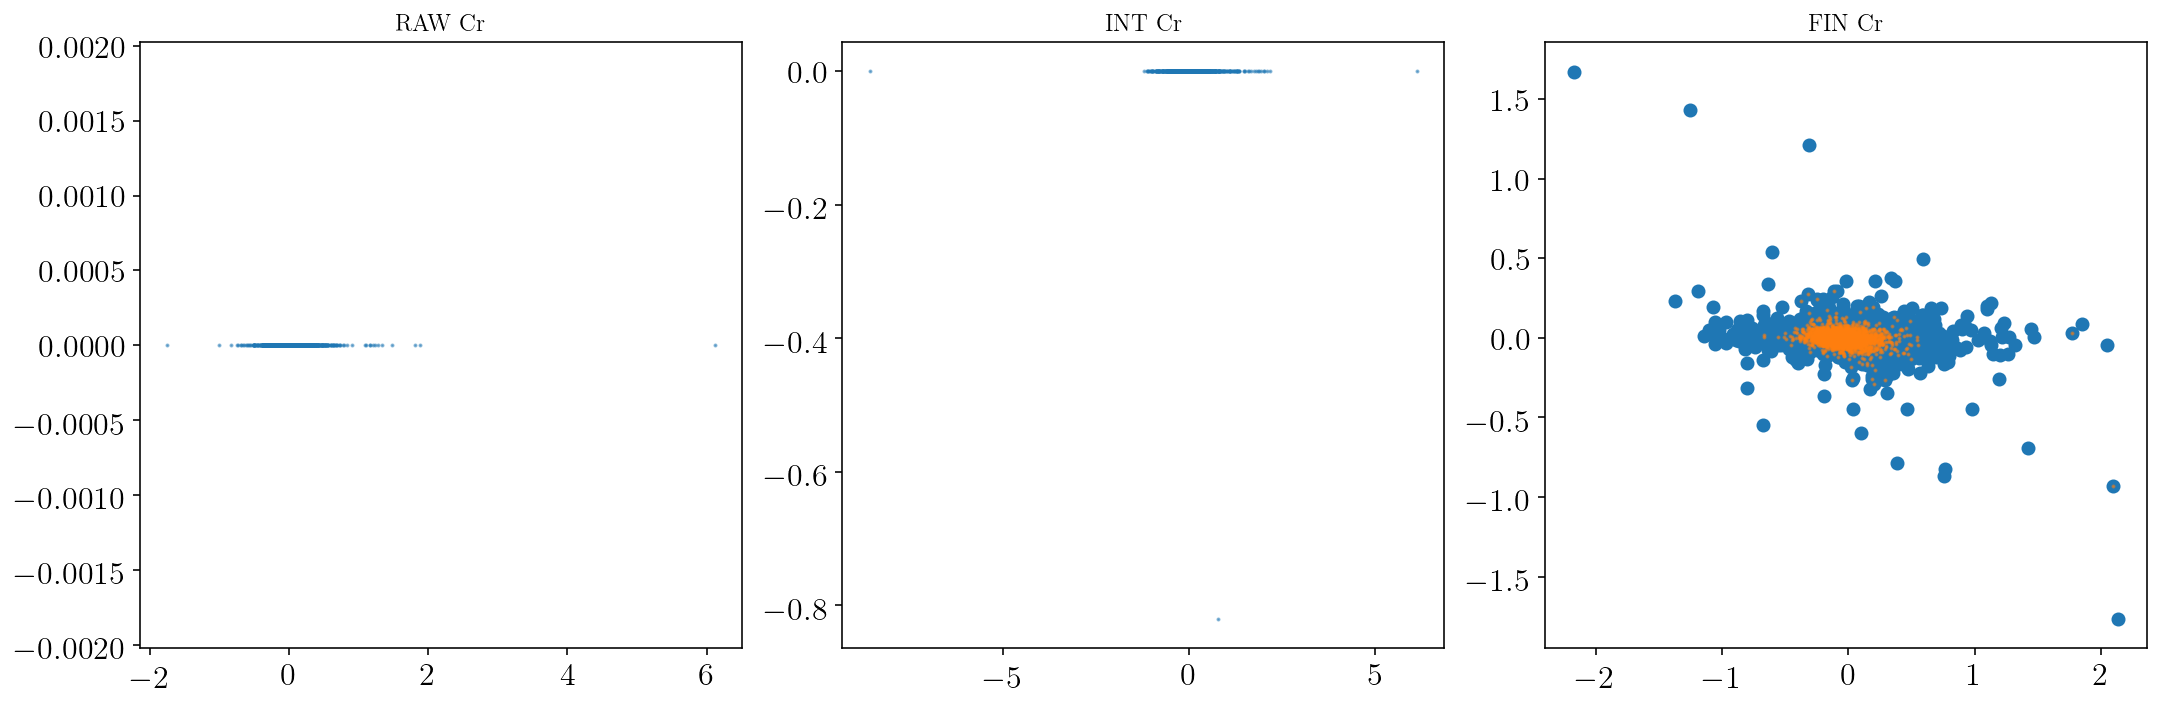

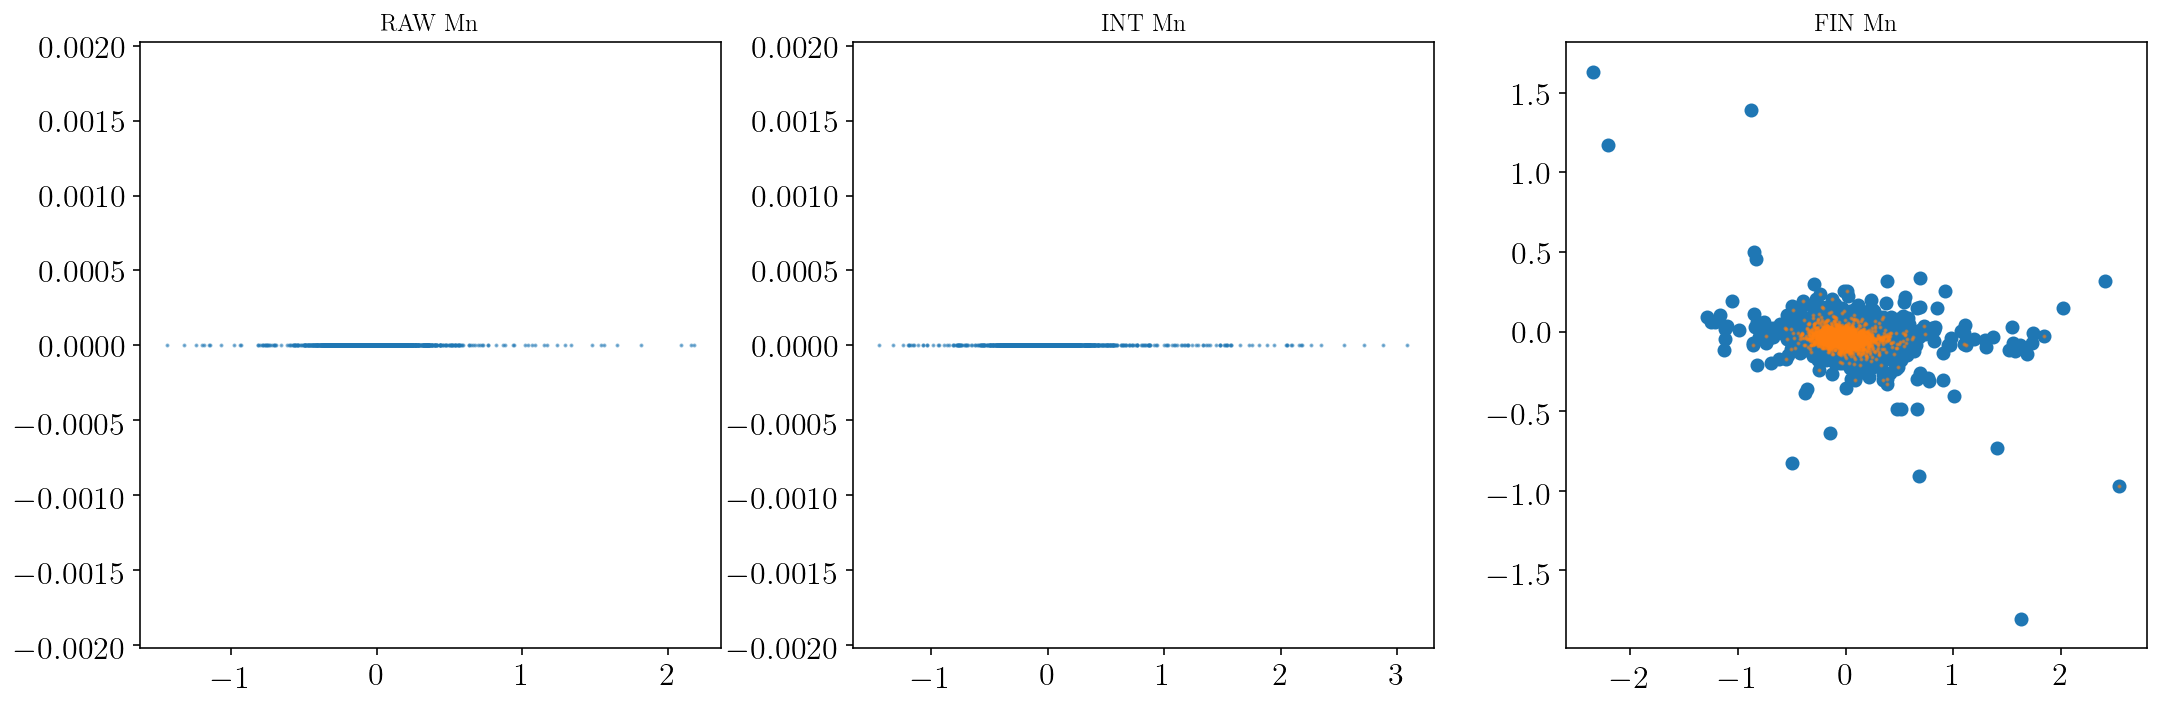

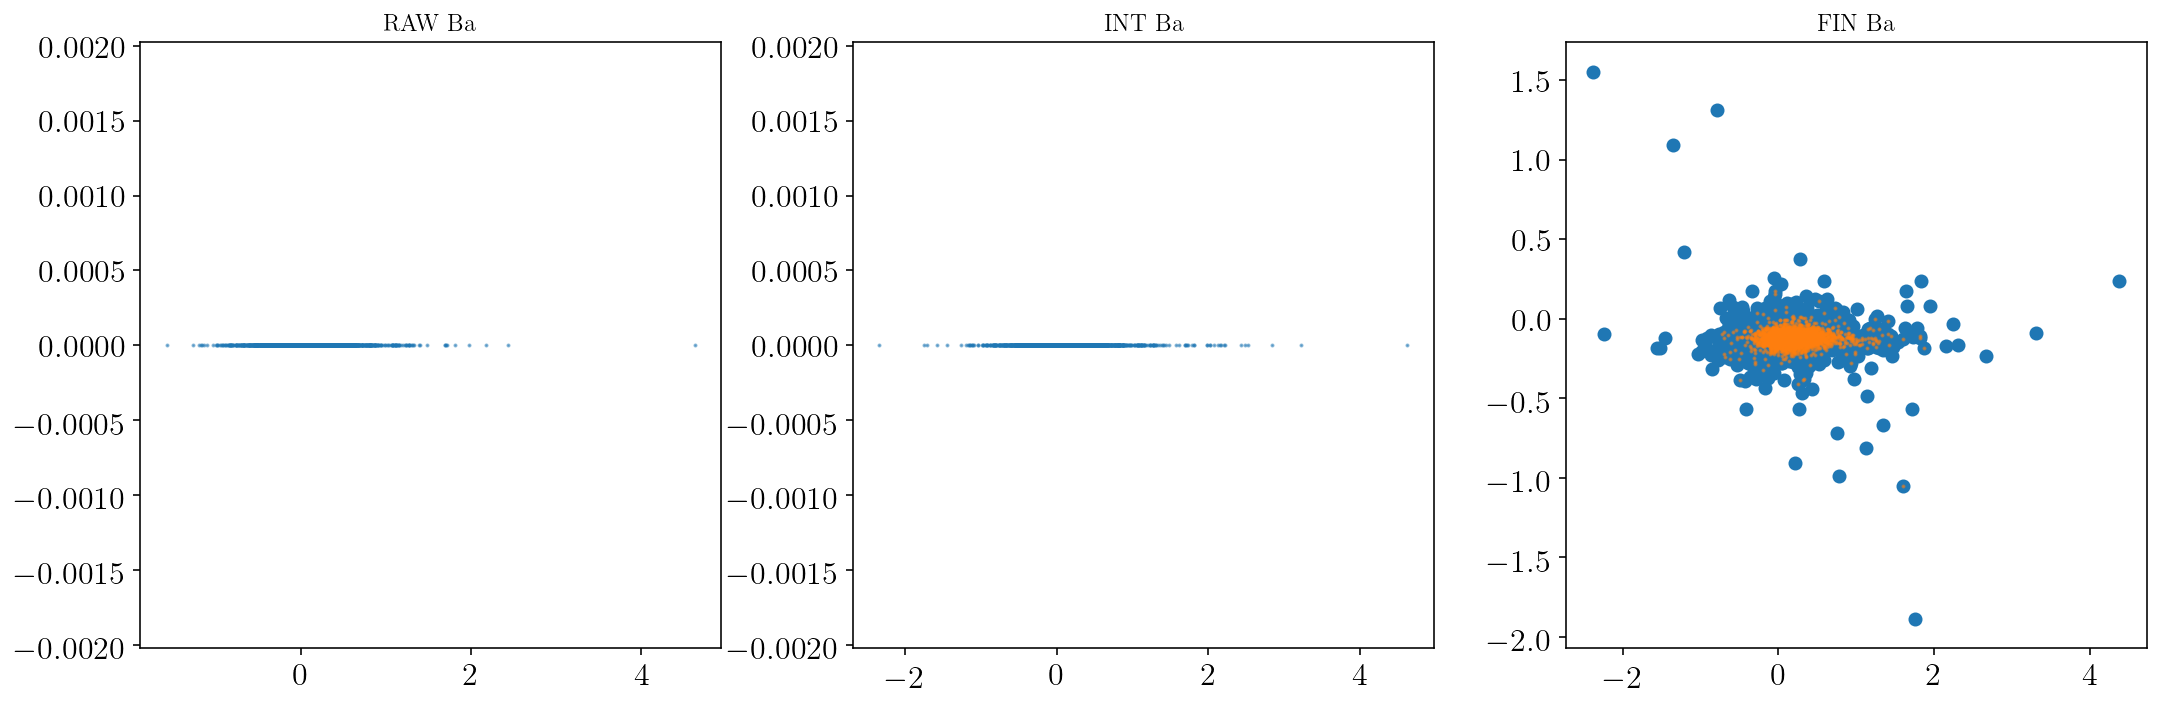

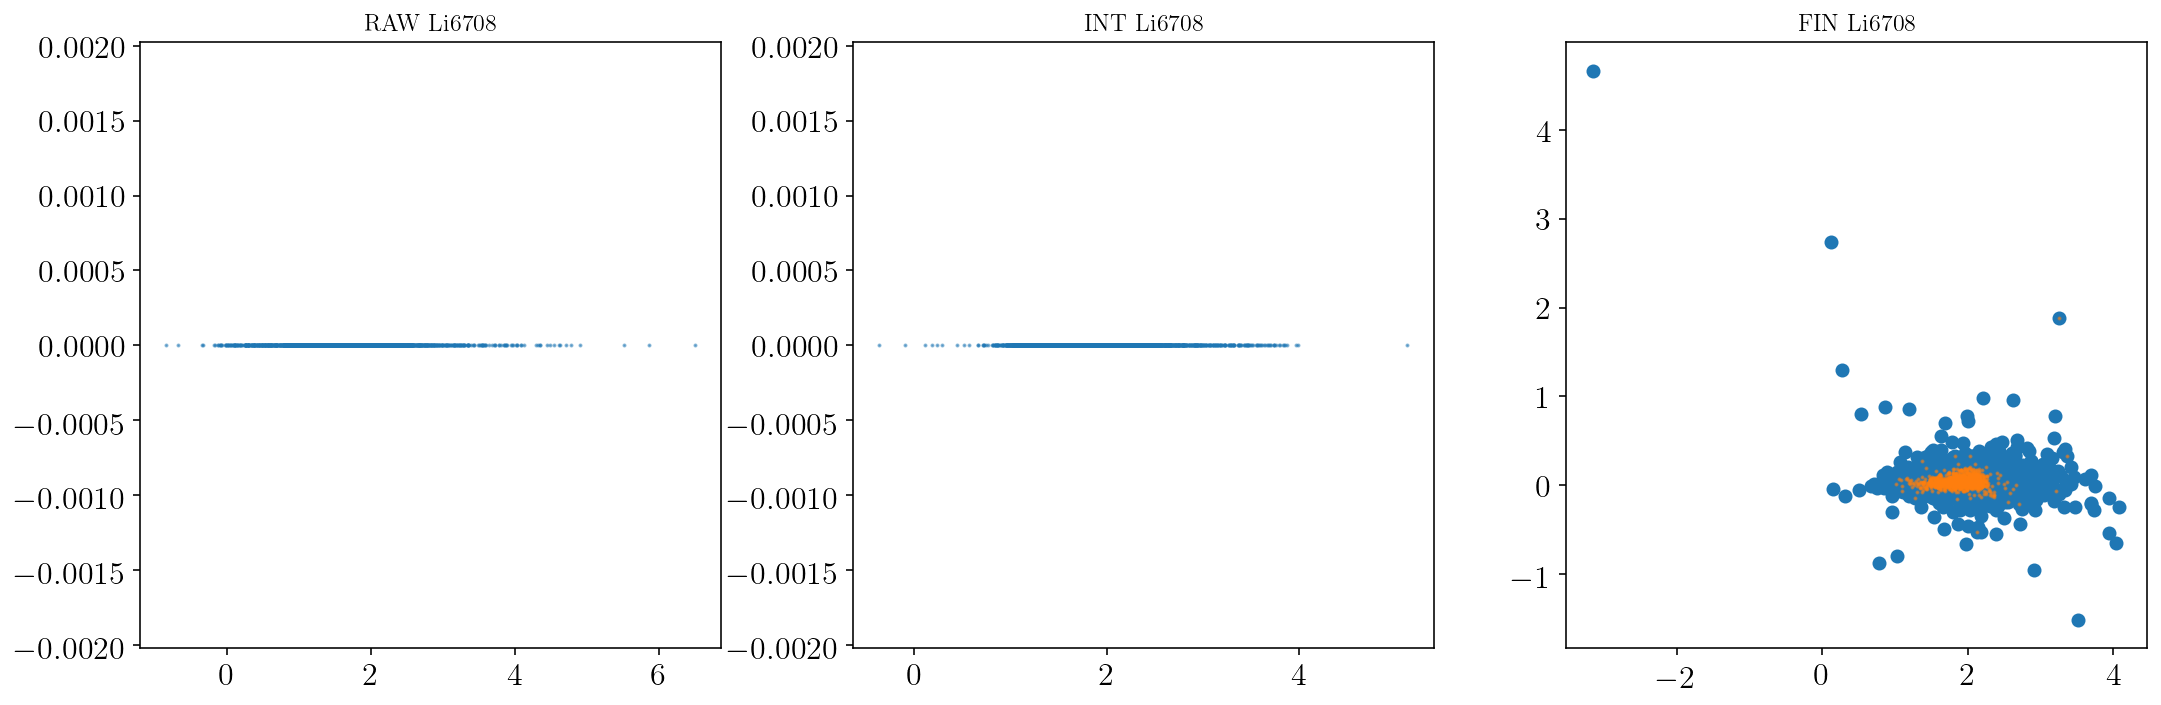

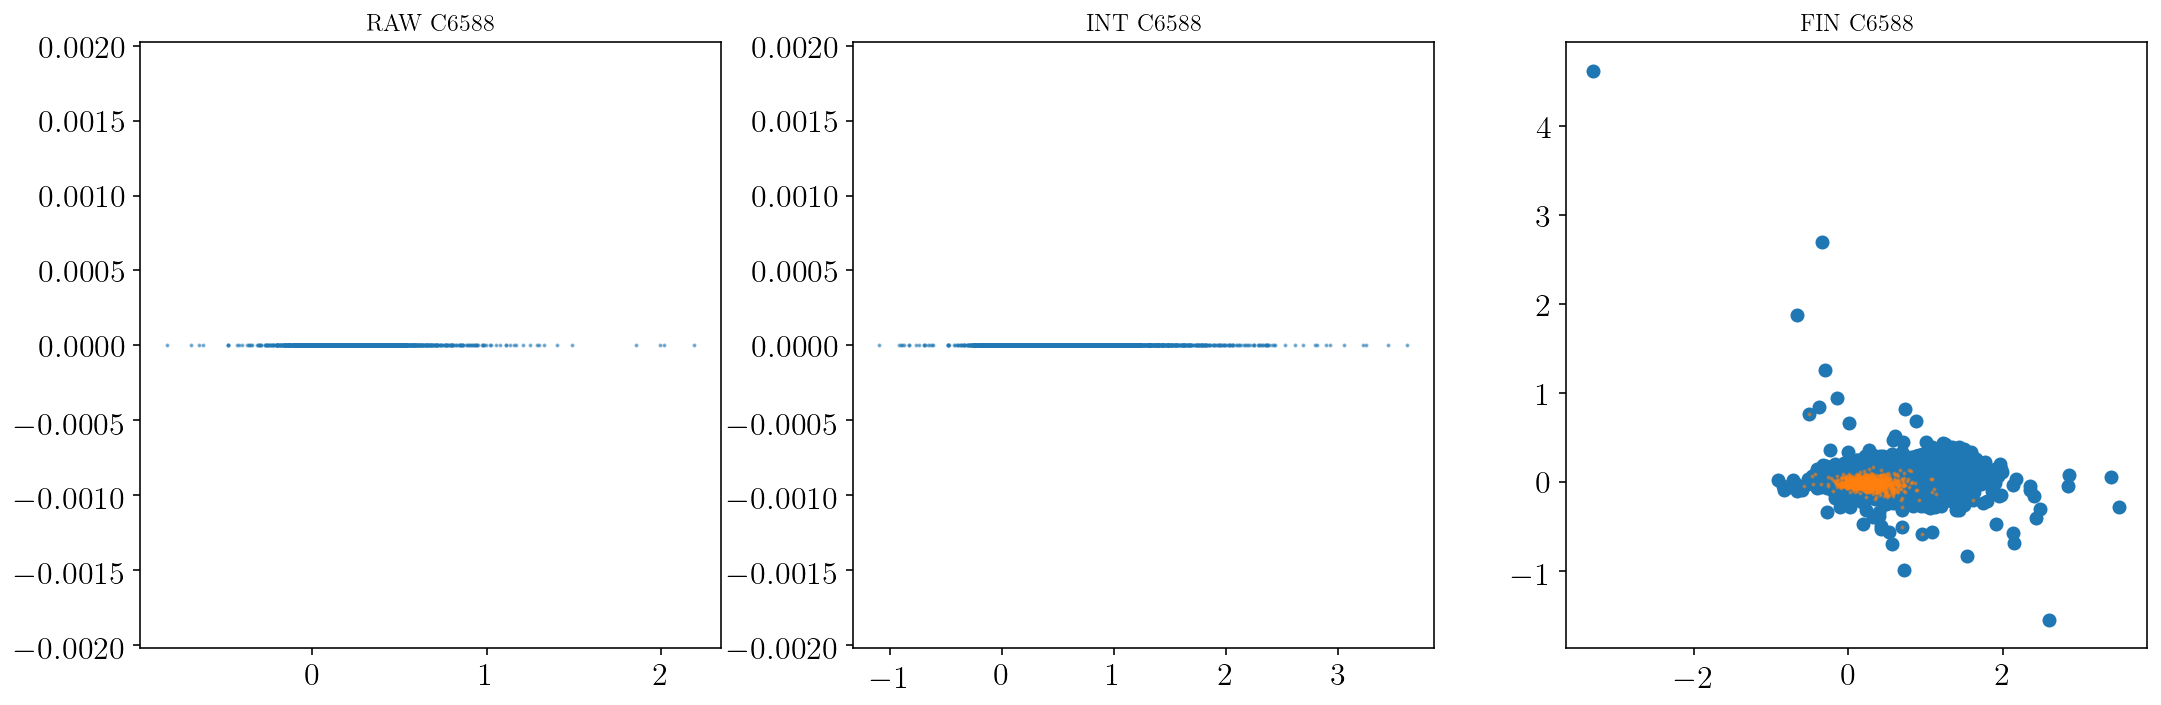

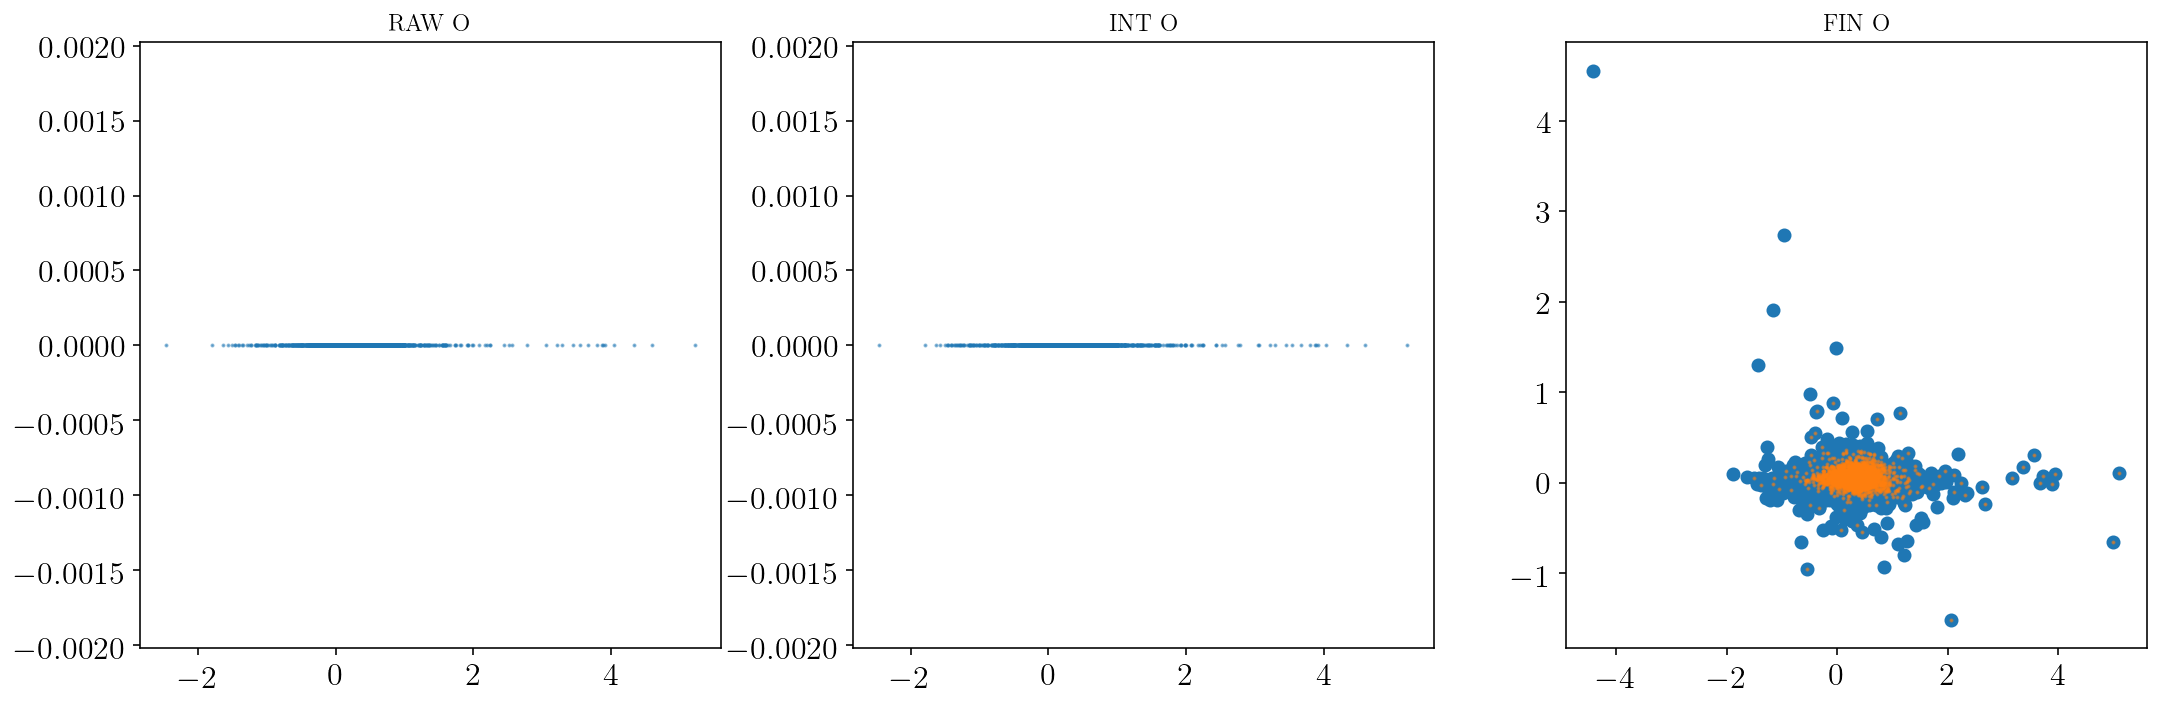

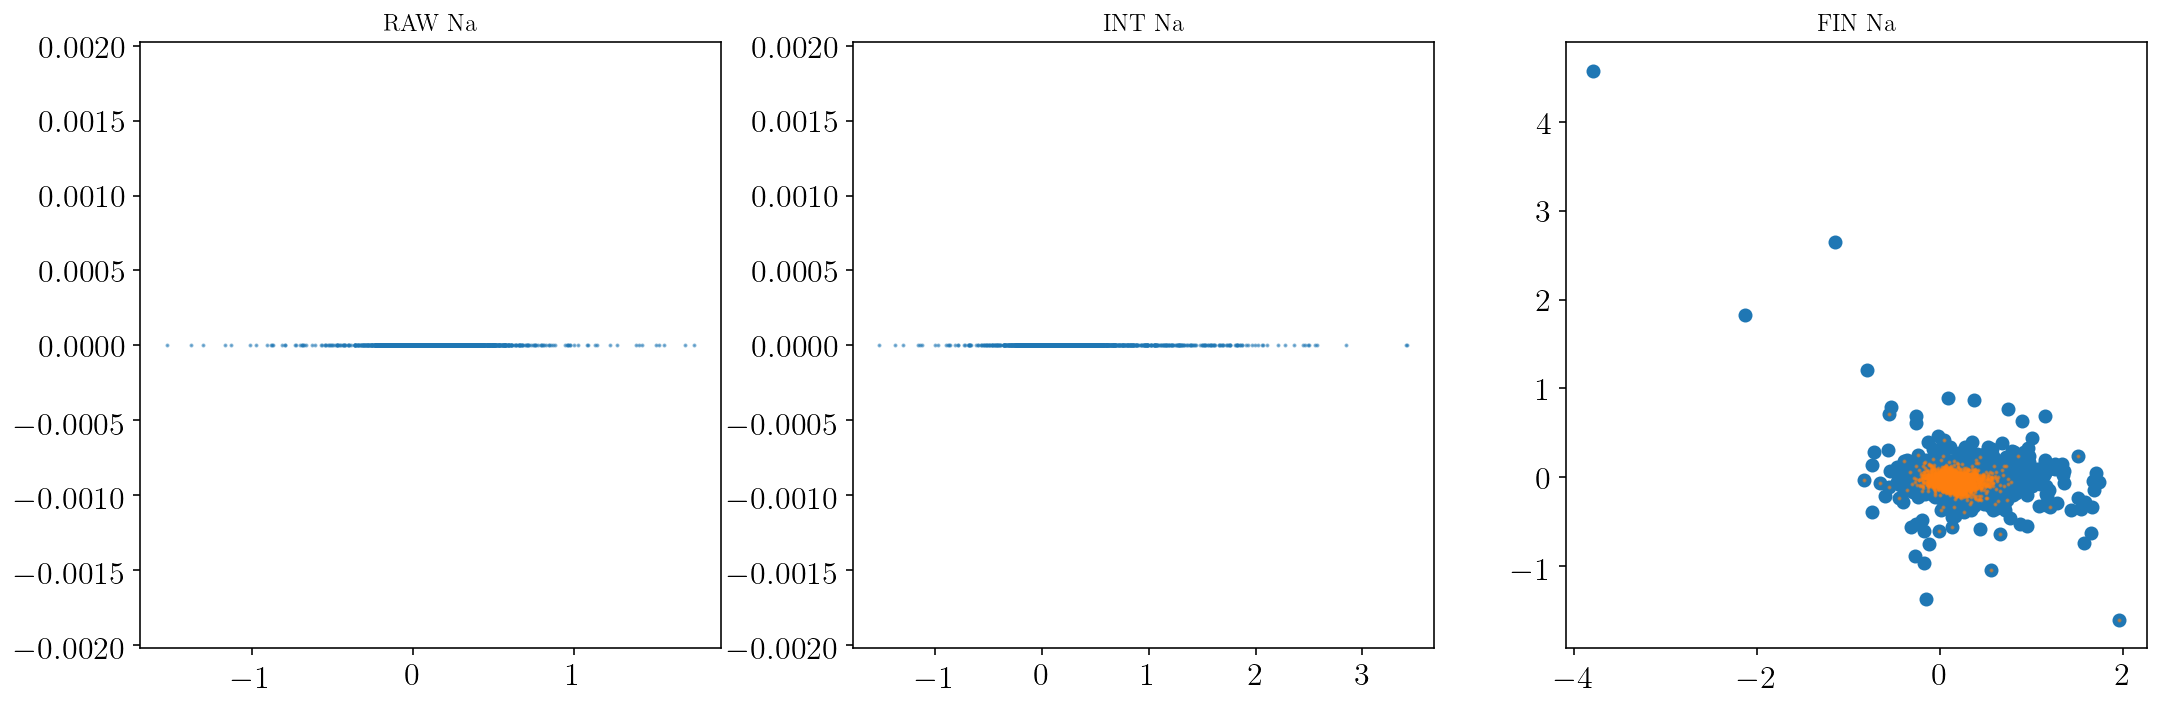

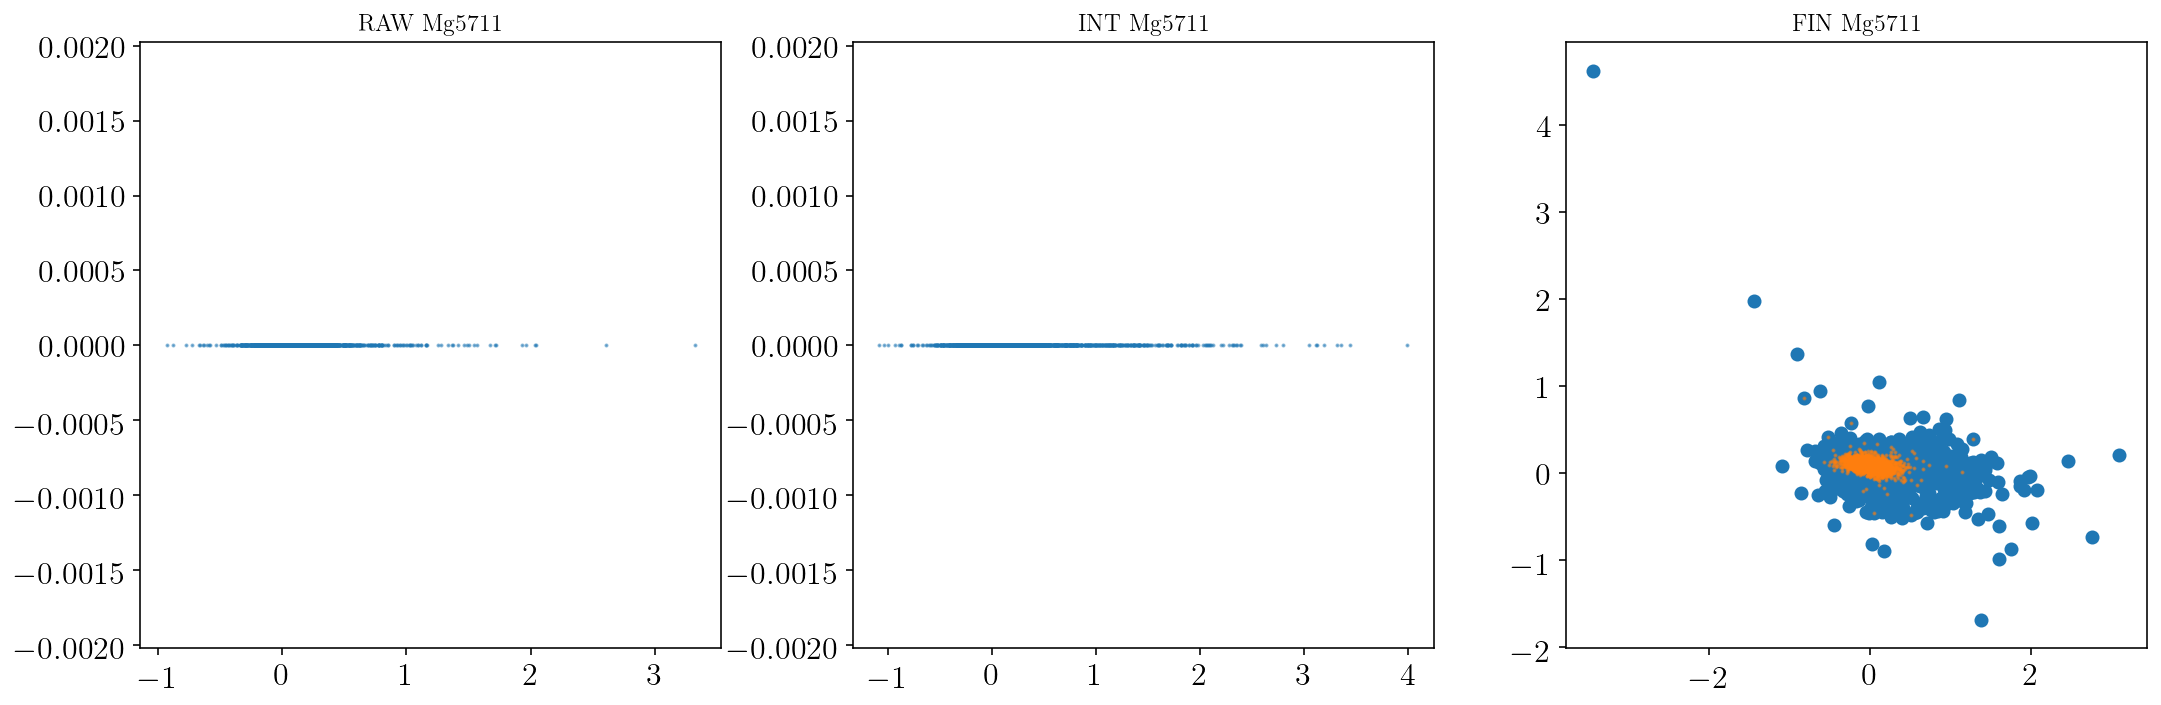

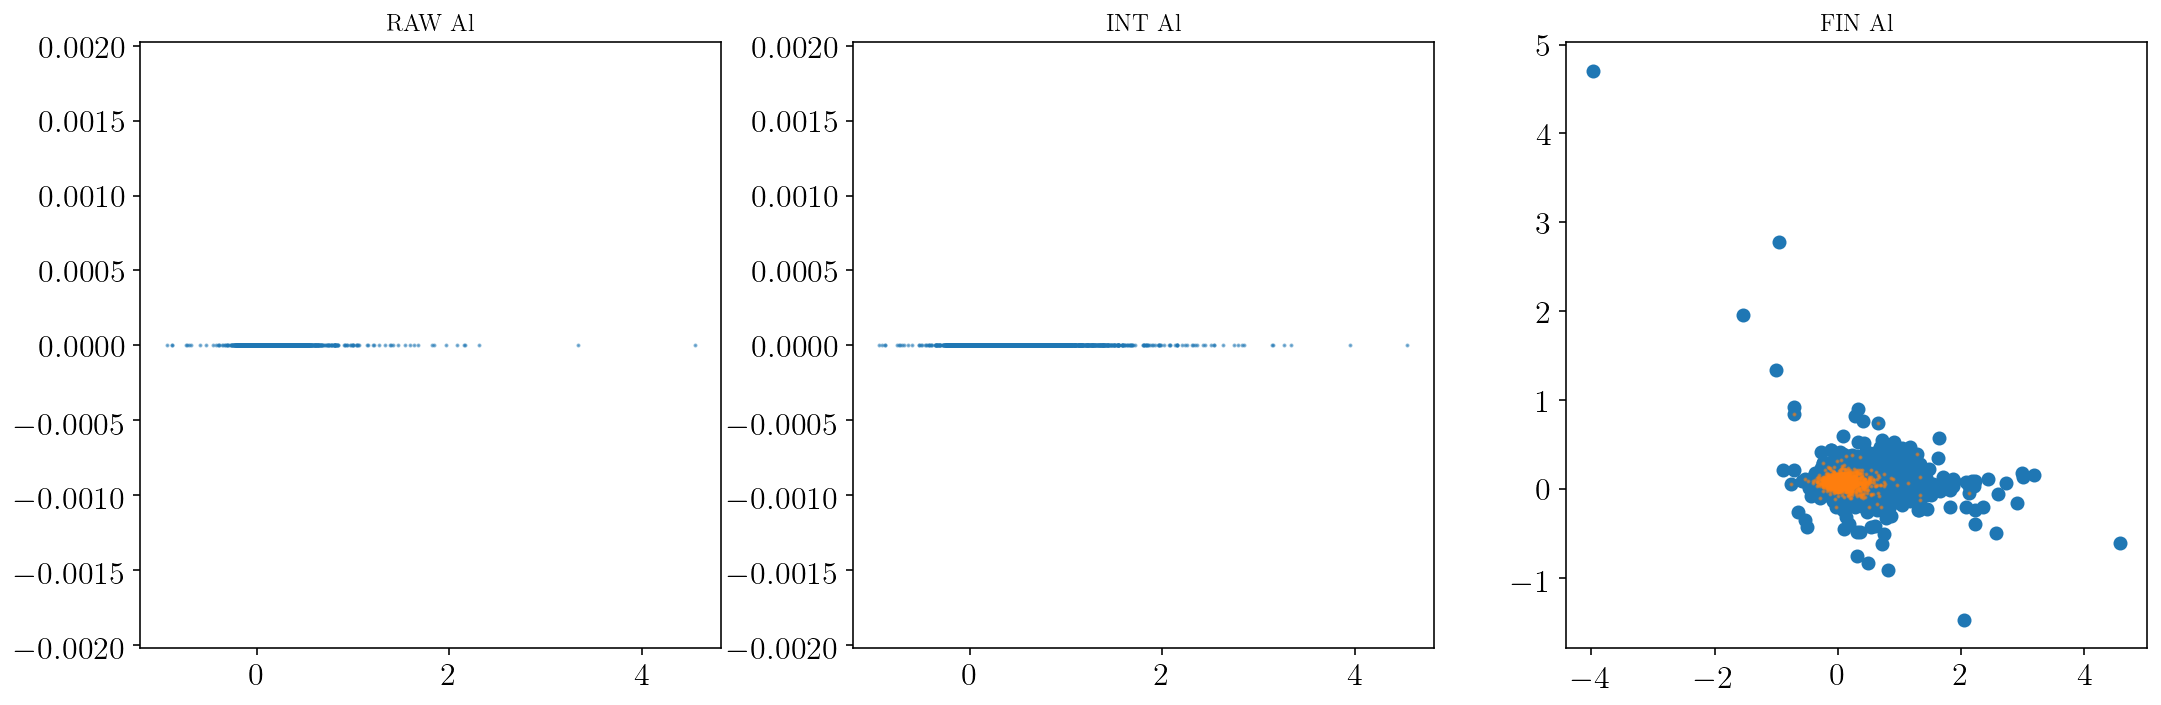

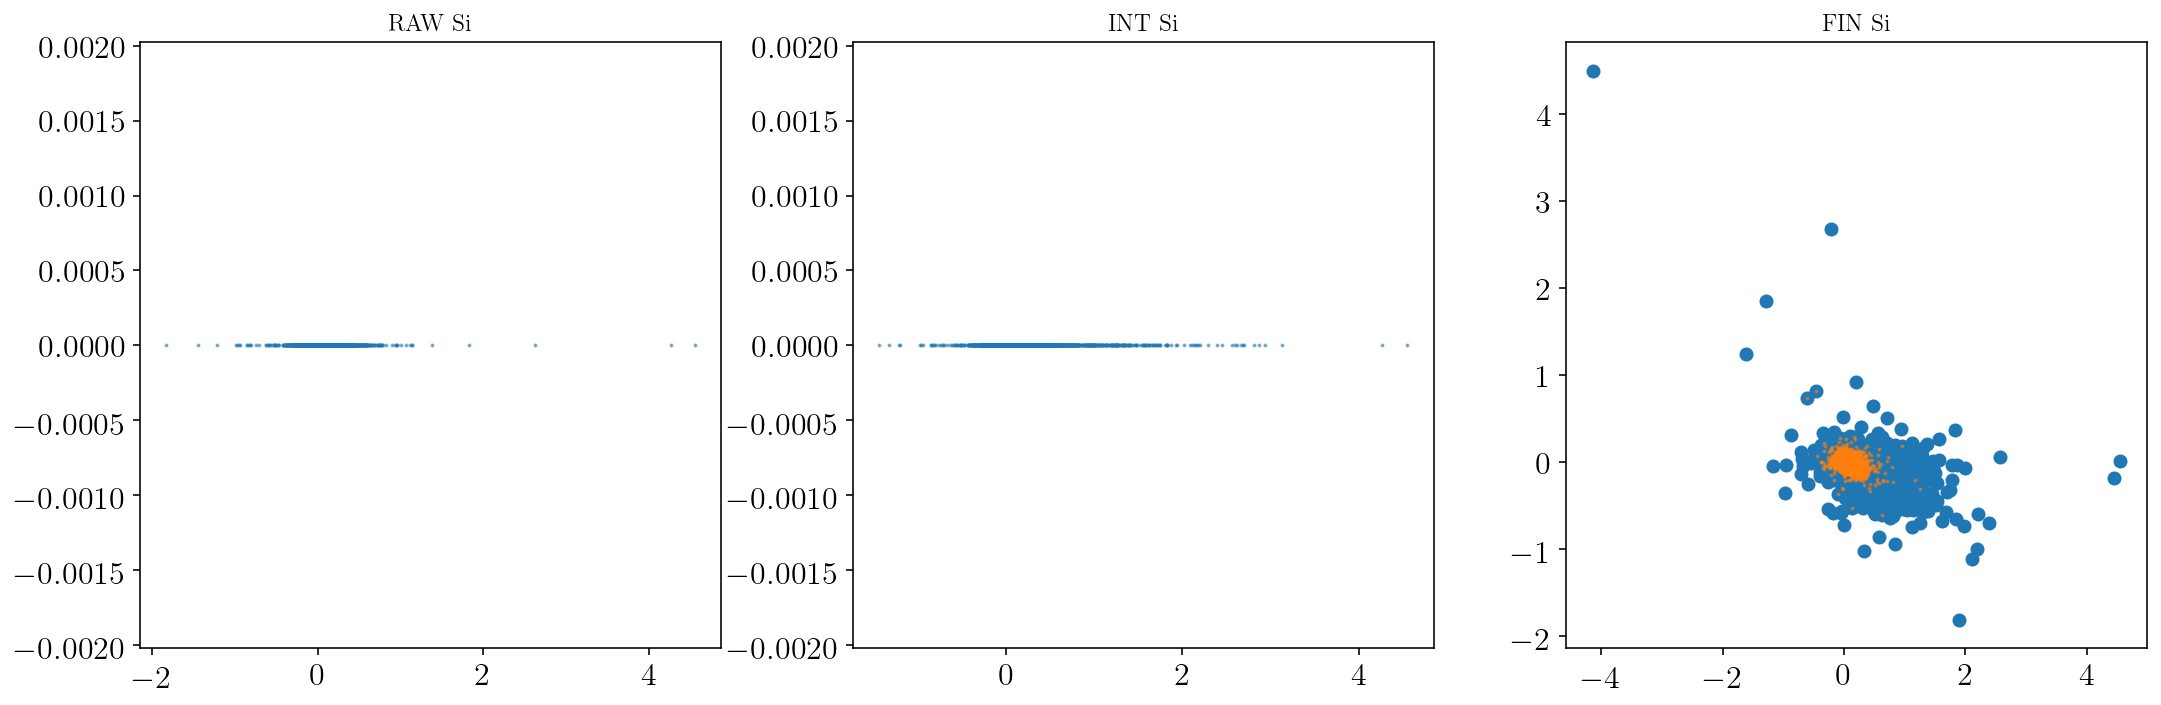

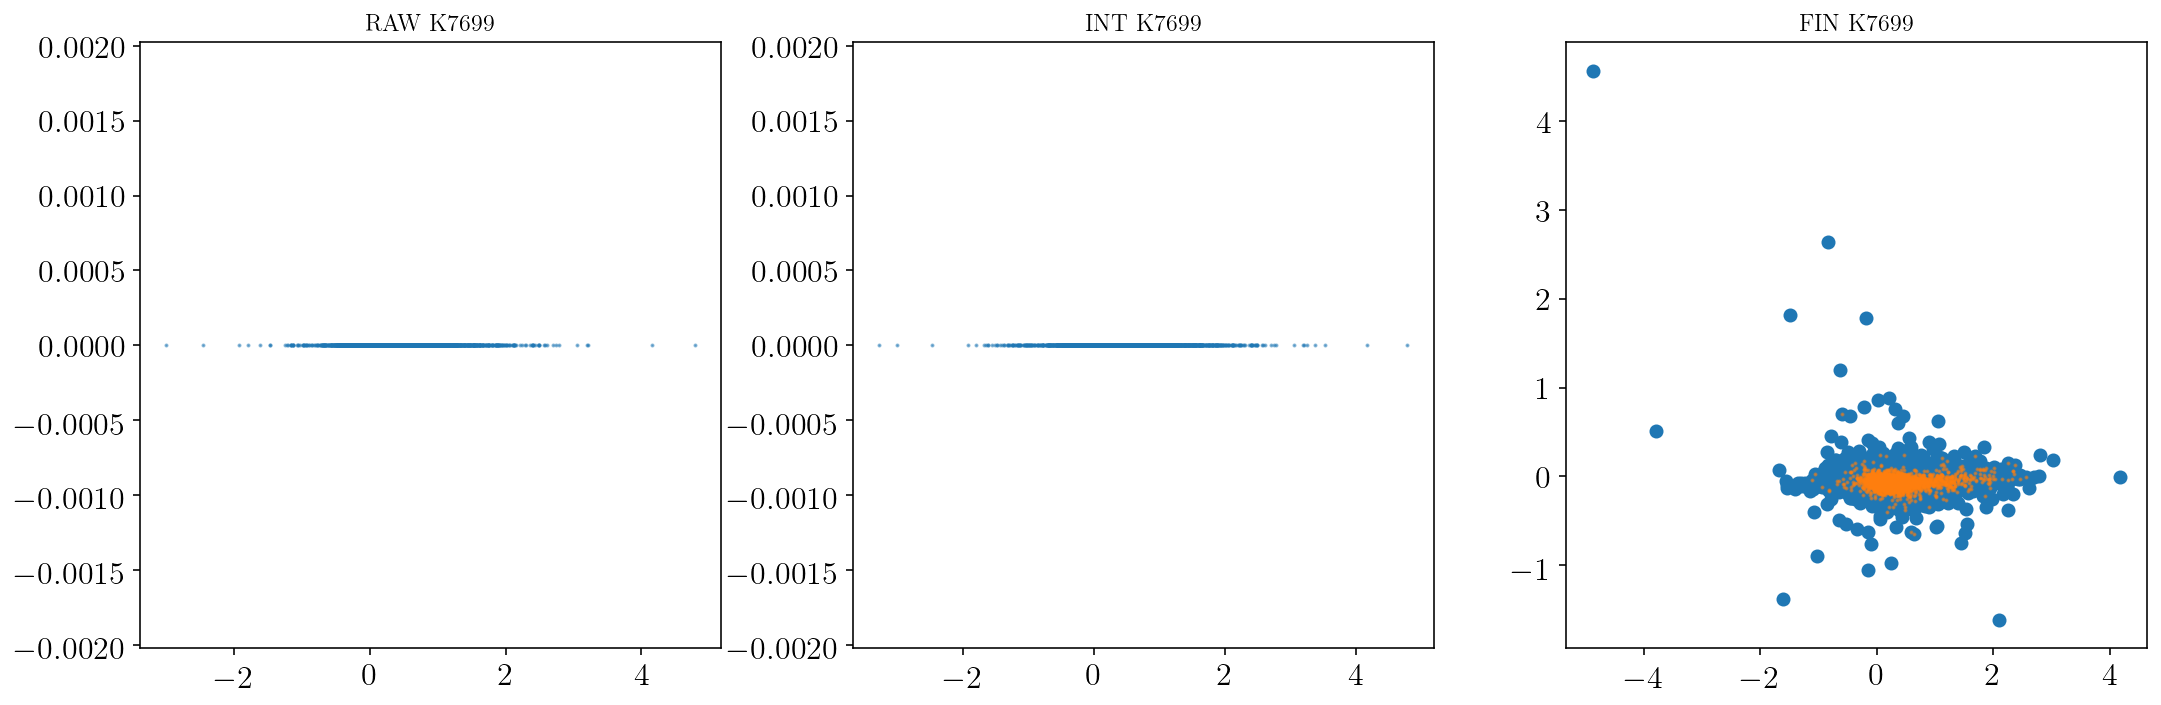

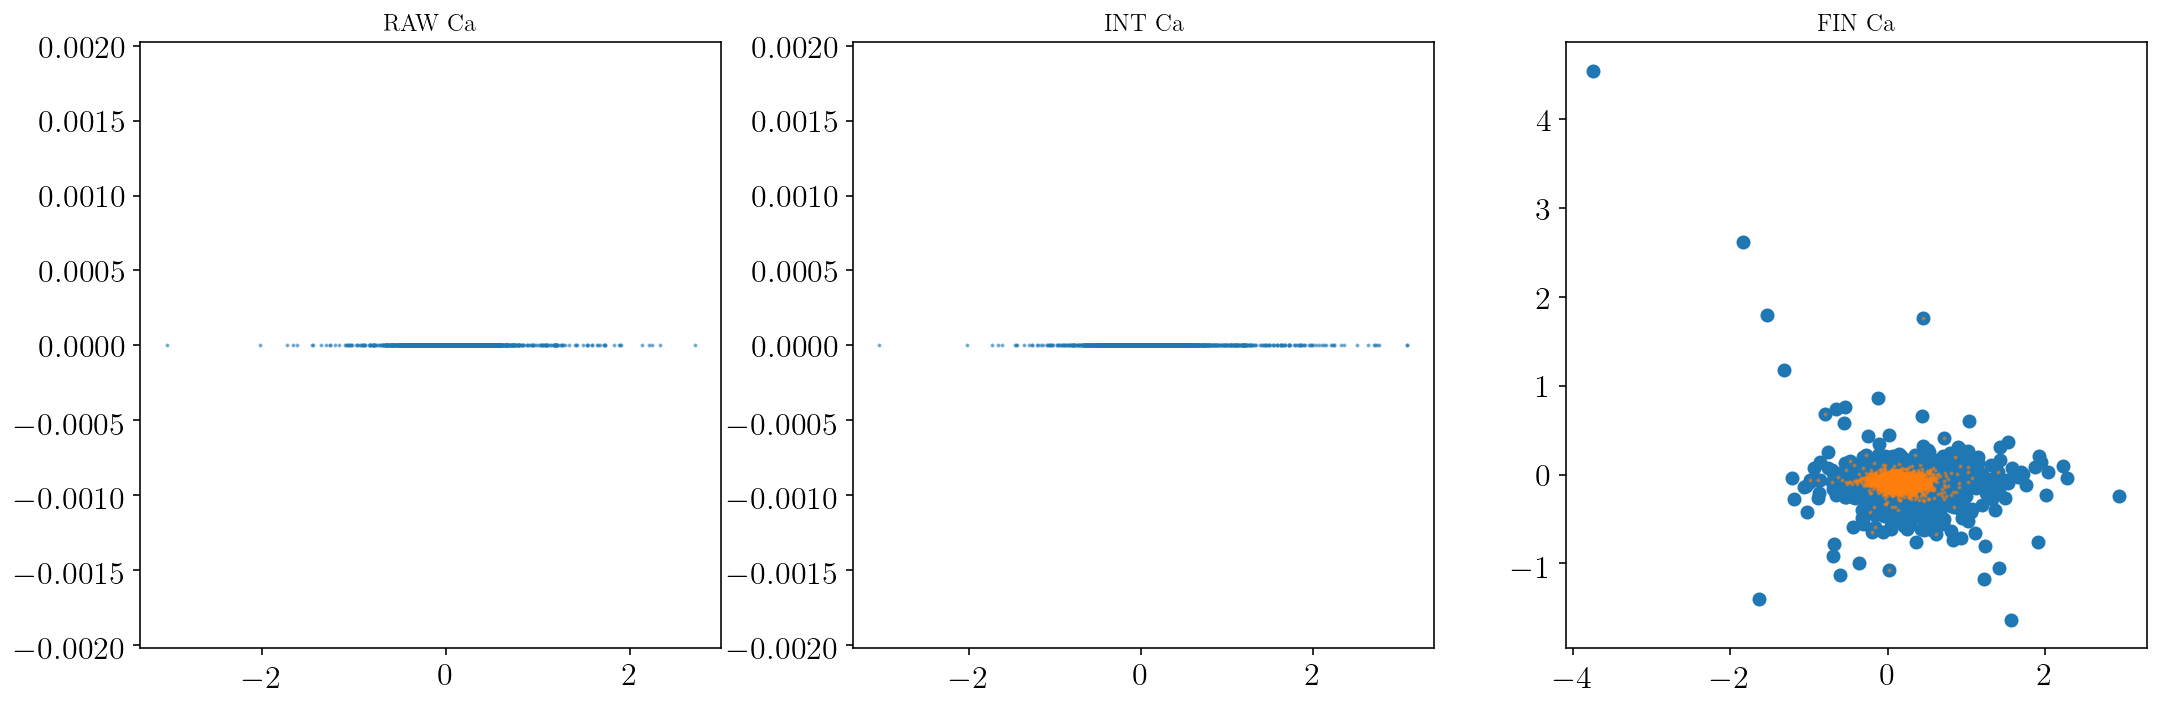

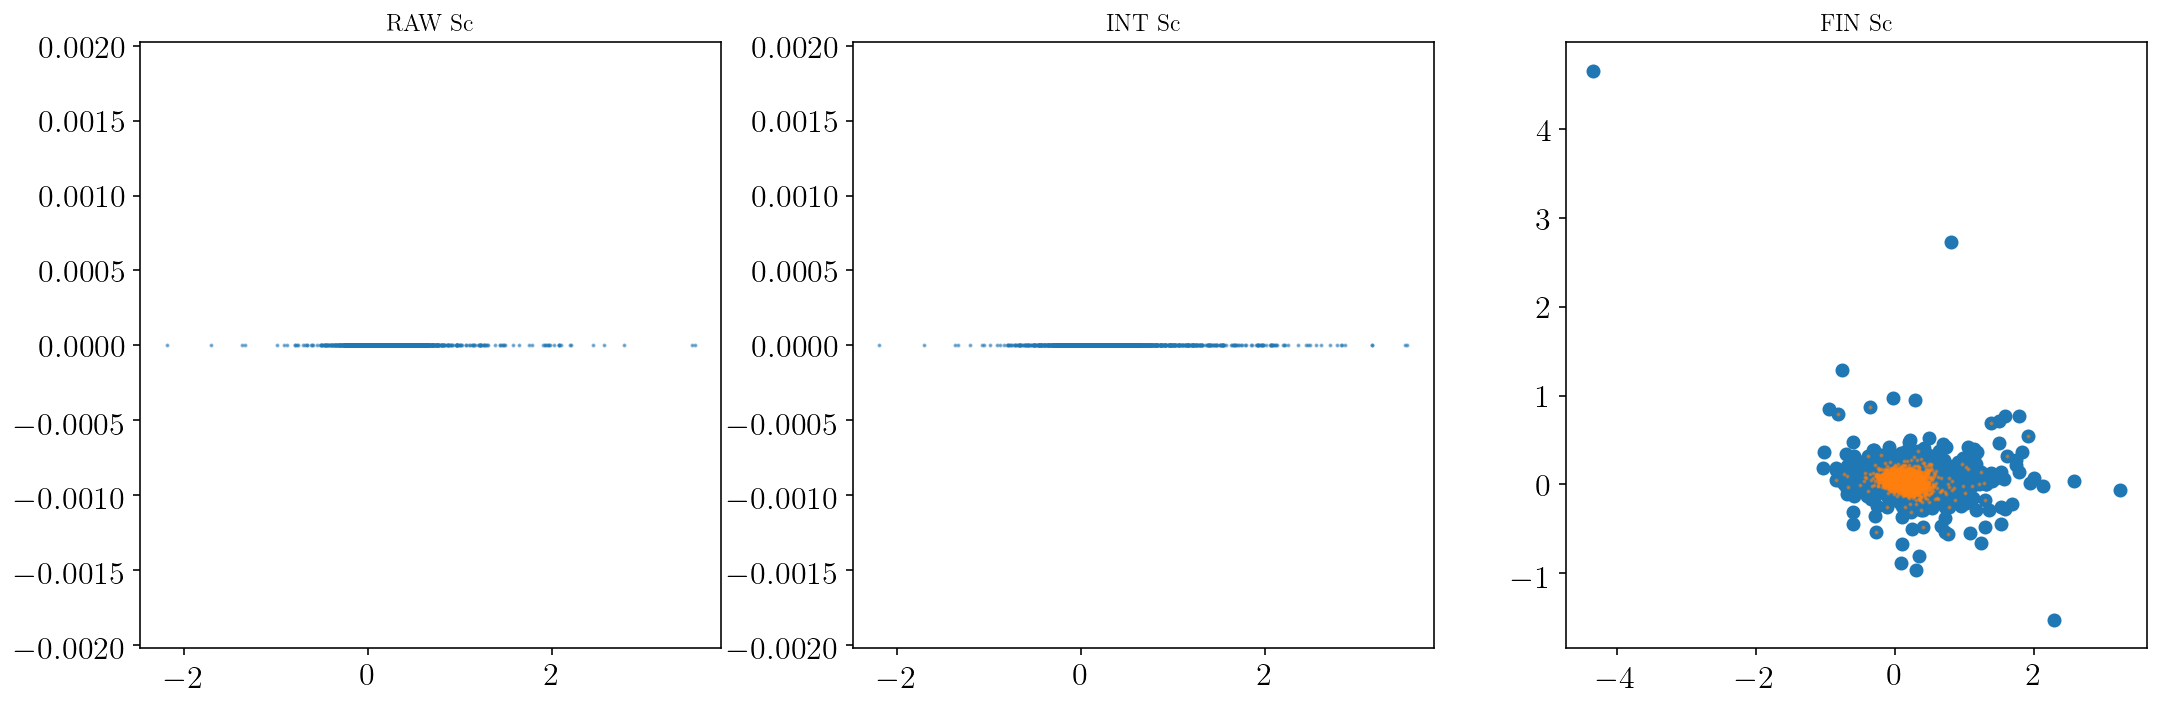

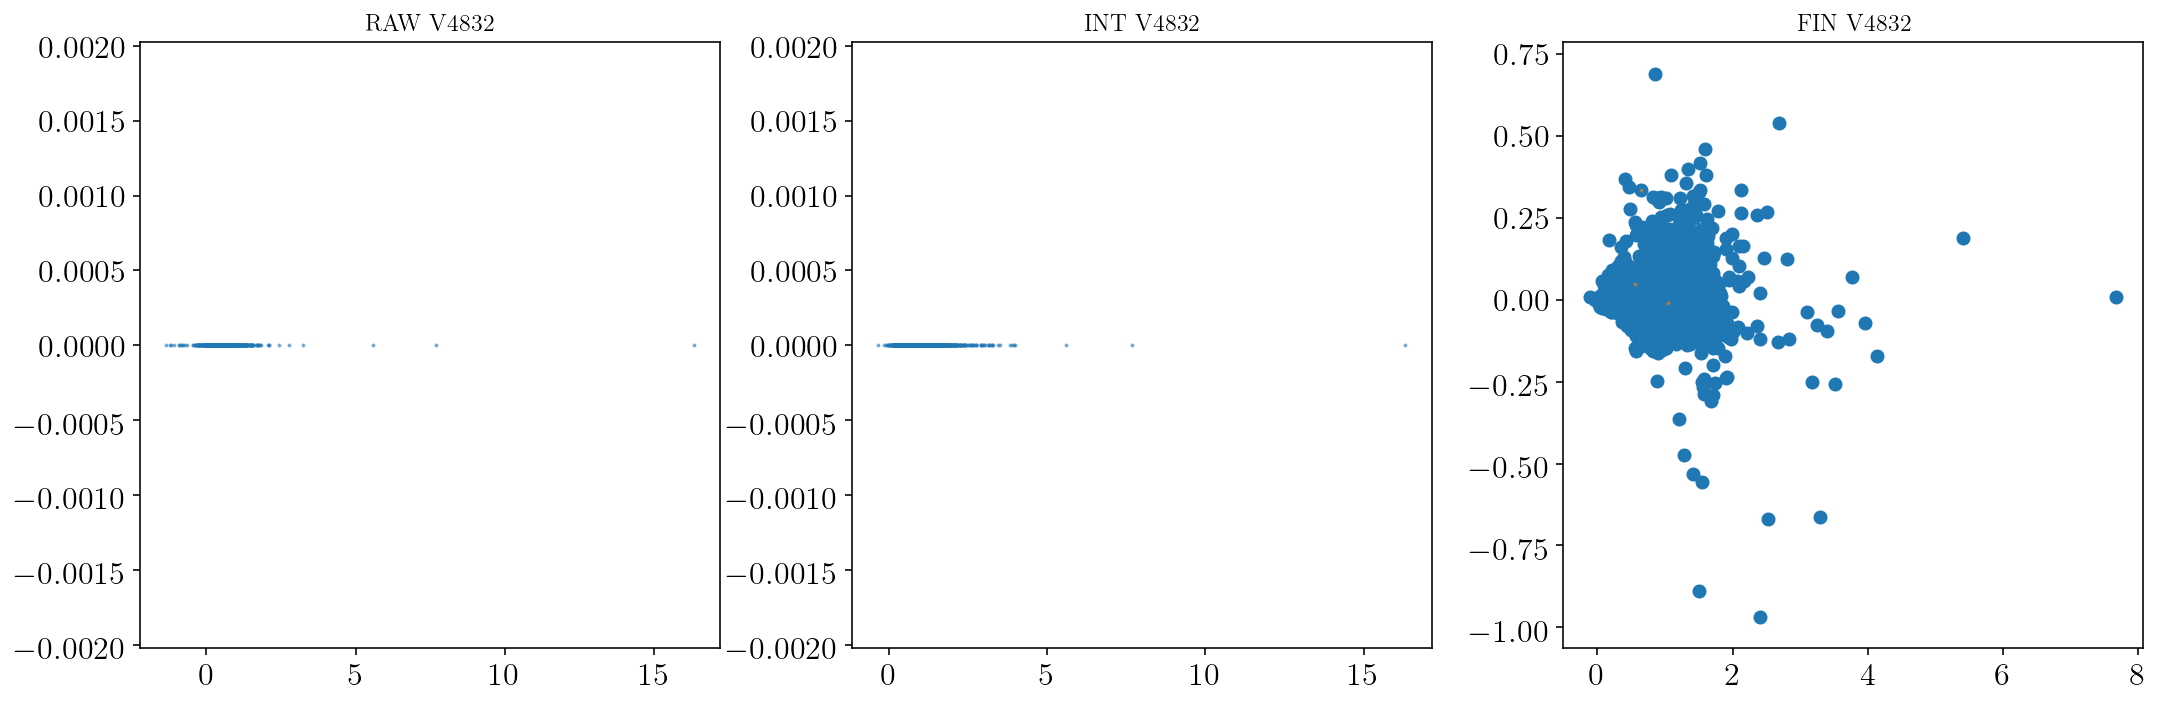

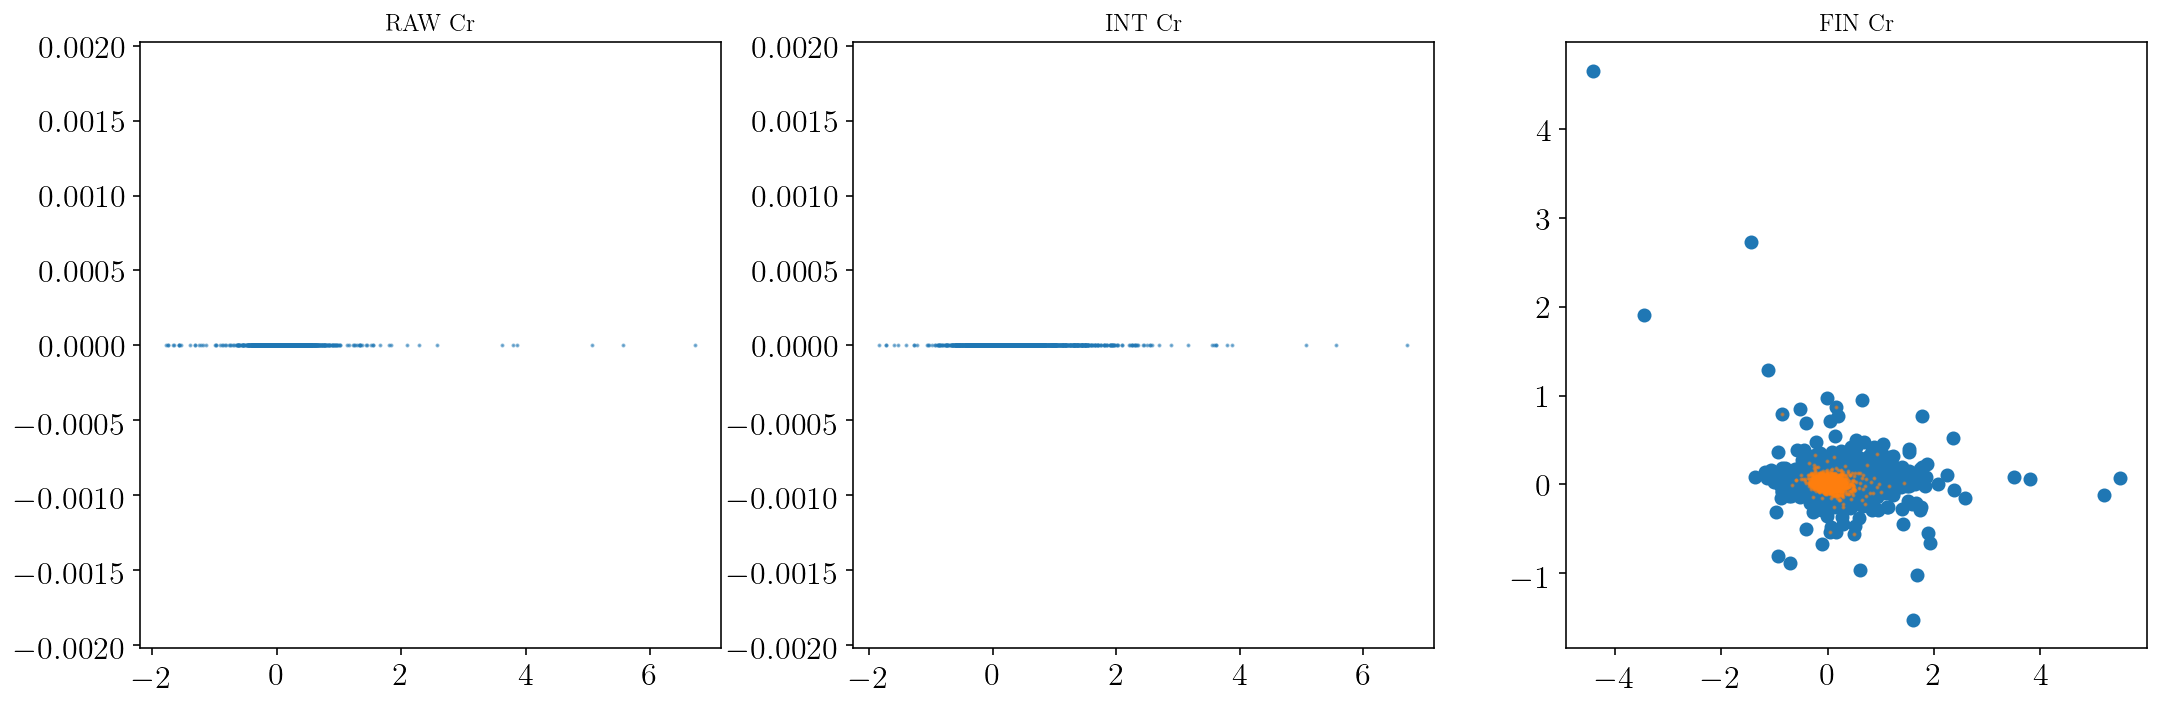

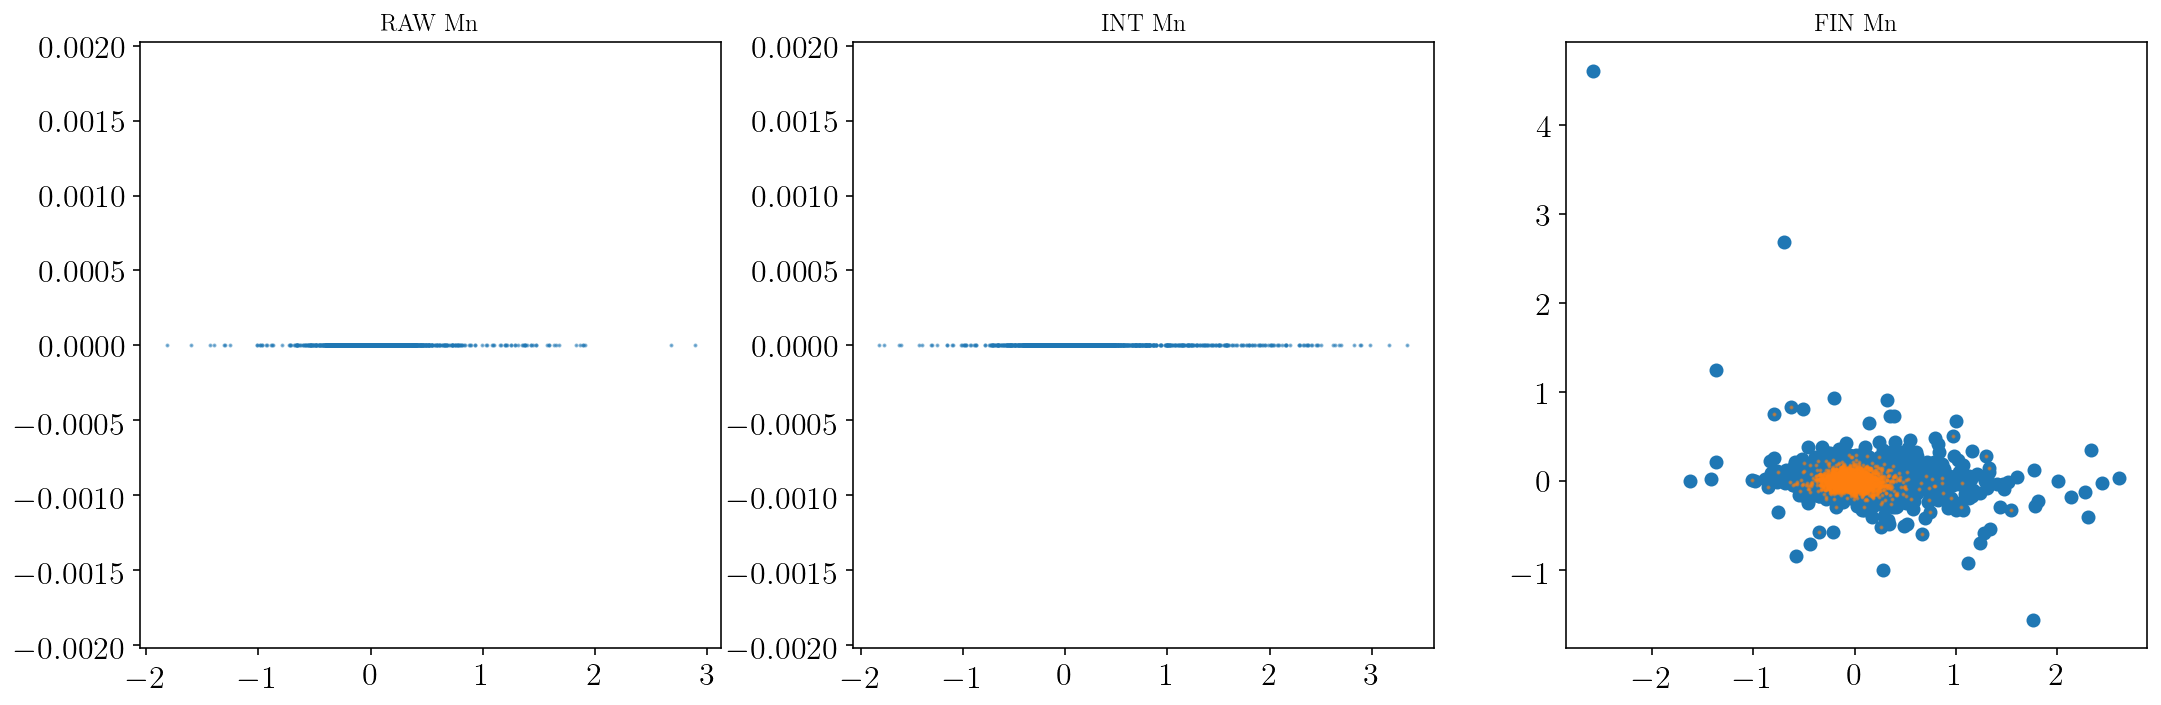

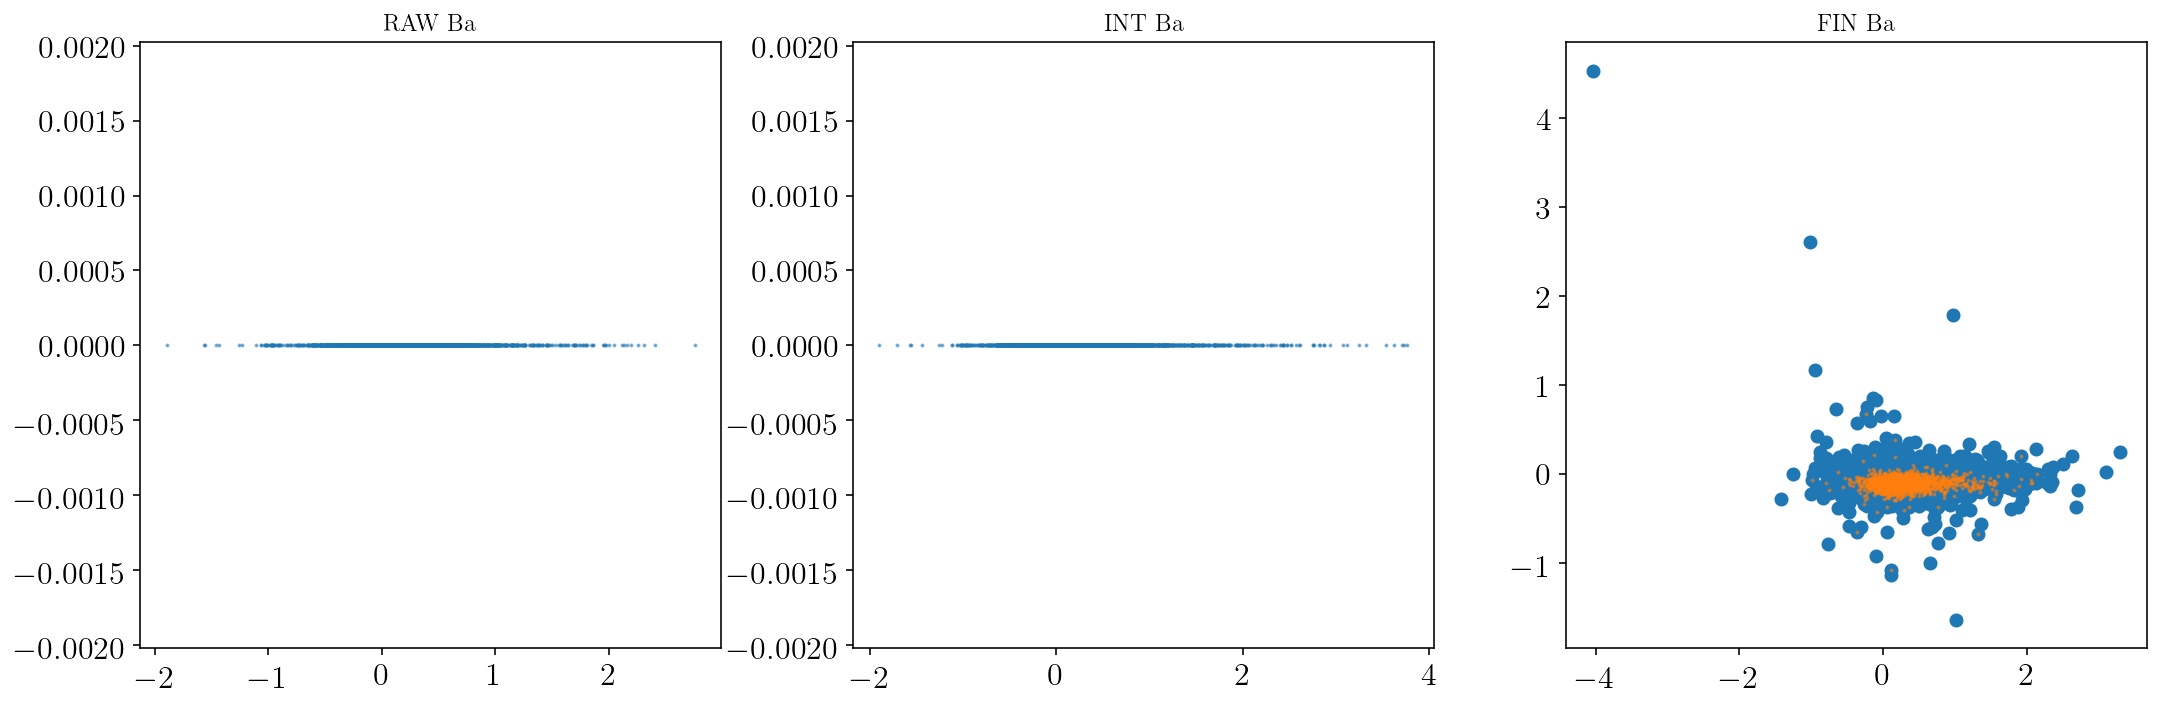

In [140]:
for subset in [0,10,20,30,40,50,60]:
    for mode in ['Li6708', 'C6588', 'O', 'Na', 'Mg5711', 'Al', 'Si', 'K7699', 'Ca', 'Sc', 'V4832', 'Cr', 'Mn', 'Ba']:
        compare_subset(subset,mode=mode)